<a href="https://colab.research.google.com/github/tannisthaghosh142005-sketch/ShadowFox/blob/main/Copy_of_AIR_QUALITY_INDEX_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pygwalker

In [5]:
#STEP1: IMPORTING ALL REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,silhouette_score,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import pygwalker as pyg

# New Section

In [6]:
#STEP-1:COLLECTING DATA
df=pd.read_csv("/content/city_day.csv")
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [7]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
#STEP-2:DATA ANALYSIS
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [9]:
# # SCALING THE FEATURES
# from sklearn.preprocessing import StandardScaler
# # Assuming df is your DataFrame
# scaler = StandardScaler()
# # Select the columns you want to scale
# columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [12]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [13]:
df["City"].nunique()

26

In [14]:
#STEP-3: EXPLORATORY DATA ANALYSIS

In [15]:
df["PM2.5"].unique()

array([  nan, 73.24, 83.13, ..., 33.17, 25.4 , 24.38])

In [16]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [17]:
df["PM10"].unique()

array([   nan, 141.54, 122.41, ...,  58.54,  32.27,  66.  ])

In [18]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [19]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [20]:
#APPLYING IMPUTATION TO FILL THE MISSING VALUES
numerical_cols = ['NO','PM2.5','PM10', 'NOx','NO2', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
# Mode imputation for categorical columns
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)

/tmp/ipython-input-640836014.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-640836014.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [21]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [22]:
df["AQI_Bucket"].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [23]:
df

City        Date      PM2.5        PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...         ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3  Benzene    Toluene    Xylene  \
0      23.483476   0.92  27.64  133.36  0.00000   0.020000  0.000000   
1      23.483476   0.97  24.55   34.06  3.68000   5.500000  3.770000   
2      23.483476  17.40  29.07   30.70  6.80000  16.400000  2.250000   
3      23.483476   1.70  18.59   36.08  4.43000  10.140000  1.000000   
4      23.483476  22.10  39.33   39.31  7.01000  18.890000  2.780000   
...          ...    ...    ...     ...      ...        ...       ...   
29526  12.470000   0.47   8.55   23.30  2.24000  12.070000  0.730000   
29527  11.990000   0.52  12.72   30.14  0.74000   2.210000  0.380000   
29528  10.710000   0.48   8.42   30.96  0.01000   0.010000  0.000000   
29529  10.030000   0.52   9.84   28.30  0.00000   0.000000  0.000000   
29530   5.200000   0.59   2.10   17.05  3.28084   8.700972  3.070128   

              AQI    AQI_Bucket  
0      166.463581      Moderate  
1      166.463581      Moderate  
2      166.463581      Moderate  
3      166.463581      Moderate  
4      166.463581      Moderate  
...           ...           ...  
29526   41.000000          Good  
29527   70.000000  Satisfactory  
29528   68.000000  Satisfactory  
29529   54.000000  Satisfactory  
29530   50.000000          Good  

[29531 rows x 16 columns]

In [24]:
df.isnull().sum() #HENCE ALL NULL VALUES ARE DROPPED

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [25]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [26]:
df

City        Date     PM2.5          PM10        NO       NO2  \
0          Ahmedabad  2015-01-01  0.000000 -1.987539e-16 -0.779757 -0.450757   
1          Ahmedabad  2015-01-02  0.000000 -1.987539e-16 -0.777417 -0.561041   
2          Ahmedabad  2015-01-03  0.000000 -1.987539e-16 -0.008181 -0.403679   
3          Ahmedabad  2015-01-04  0.000000 -1.987539e-16 -0.743239 -0.439423   
4          Ahmedabad  2015-01-05  0.000000 -1.987539e-16  0.211869 -0.311266   
...              ...         ...       ...           ...       ...       ...   
29526  Visakhapatnam  2020-06-27 -0.882470 -9.396831e-01 -0.463261 -0.152596   
29527  Visakhapatnam  2020-06-28 -0.724930 -6.159058e-01 -0.662710 -0.109006   
29528  Visakhapatnam  2020-06-29 -0.749671 -7.328293e-01 -0.661305  0.042254   
29529  Visakhapatnam  2020-06-30 -0.855203 -9.532496e-01 -0.633214  0.030485   
29530  Visakhapatnam  2020-07-01 -0.882806 -7.290530e-01 -0.804103 -0.074569   

            NOx           NH3        CO       SO2        O3       Benzene  \
0     -0.517068 -1.715374e-16 -0.197836  0.775219  4.903440 -2.306208e-01   
1     -0.540604 -1.715374e-16 -0.190391  0.592474 -0.021397  2.805822e-02   
2     -0.088996 -1.715374e-16  2.256137  0.859790 -0.188038  2.473731e-01   
3     -0.489099 -1.715374e-16 -0.081690  0.239995  0.078786  8.077814e-02   
4      0.185926 -1.715374e-16  2.955996  1.466575  0.238980  2.621347e-01   
...         ...           ...       ...       ...       ...           ...   
29526 -0.435547 -5.317689e-01 -0.264844 -0.353779 -0.555045 -7.316402e-02   
29527 -0.538216 -5.549450e-01 -0.257399 -0.107162 -0.215812 -1.786039e-01   
29528 -0.476819 -6.167478e-01 -0.263355 -0.361467 -0.175143 -2.299179e-01   
29529 -0.460788 -6.495806e-01 -0.257399 -0.277487 -0.307067 -2.306208e-01   
29530 -0.622808 -8.827898e-01 -0.246975 -0.735237 -0.865017 -3.121646e-17   

        Toluene        Xylene           AQI    AQI_Bucket  
0     -0.509612 -7.807344e-01  2.202172e-16      Moderate  
1     -0.187911  1.779777e-01  2.202172e-16      Moderate  
2      0.451967 -2.085587e-01  2.202172e-16      Moderate  
3      0.084477 -5.264341e-01  2.202172e-16      Moderate  
4      0.598141 -7.377959e-02  2.202172e-16      Moderate  
...         ...           ...           ...           ...  
29526  0.197777 -5.950952e-01 -9.721175e-01          Good  
29527 -0.381049 -6.841003e-01 -7.474195e-01  Satisfactory  
29528 -0.510199 -7.807344e-01 -7.629159e-01  Satisfactory  
29529 -0.510786 -7.807344e-01 -8.713908e-01  Satisfactory  
29530  0.000000  1.129320e-16 -9.023836e-01          Good  

[29531 rows x 16 columns]

In [27]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04   
mean  -7.699491e-18 -6.929542e-17 -6.544568e-17  1.539898e-17 -1.308914e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.134601e+00 -1.651993e+00 -8.218946e-01 -1.244544e+00 -1.102044e+00   
25%   -5.941511e-01 -5.428286e-01 -5.320851e-01 -6.791722e-01 -6.016597e-01   
50%   -1.585596e-01 -1.987539e-16 -2.830081e-01 -1.447499e-01 -1.623308e-01   
75%    8.414627e-02 -1.987539e-16 -1.663344e-16  2.660926e-01  1.264052e-01   
max    1.485420e+01  1.233393e+01  1.746841e+01  1.454402e+01  1.484853e+01   

                NH3            CO           SO2            O3       Benzene  \
count  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04  2.953100e+04   
mean  -1.231919e-16 -6.159593e-17 -6.159593e-17  1.597644e-16  0.000000e+00   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.133381e+00 -3.348301e-01 -8.588413e-01 -1.710125e+00 -2.306208e-01   
25%   -5.525308e-01 -2.544208e-01 -4.992653e-01 -6.820097e-01 -2.137505e-01   
50%   -1.715374e-16 -1.933693e-01 -2.396372e-01  3.523975e-16 -1.012813e-01   
75%   -1.715374e-16 -8.020059e-02  0.000000e+00  4.085963e-01 -3.121646e-17   
max    1.590489e+01  2.584436e+01  1.060560e+01  1.107164e+01  3.175490e+01   

            Toluene        Xylene           AQI  
count  29531.000000  2.953100e+04  2.953100e+04  
mean       0.000000  1.308914e-16  1.424406e-16  
std        1.000017  1.000017e+00  1.000017e+00  
min       -0.510786 -7.807344e-01 -1.189067e+00  
25%       -0.435644 -2.721338e-01 -6.079519e-01  
50%       -0.103964  1.129320e-16 -2.205416e-01  
75%        0.000000  1.129320e-16  9.713473e-02  
max       26.190938  4.254440e+01  1.458628e+01

In [28]:
#CHECKING FOR DUPLICATE VALUES
df.duplicated().sum()

np.int64(0)

In [29]:
df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [30]:
df1_NEWDEL=df[df["City"]=="Delhi"]
df1_NEWDEL

City        Date     PM2.5      PM10        NO       NO2       NOx  \
10229  Delhi  2015-01-01  4.136594  6.851114  2.415170  0.341287  2.670113   
10230  Delhi  2015-01-02  1.998359  2.117810  2.084160  0.187847  1.904357   
10231  Delhi  2015-01-03  0.332070  0.192629  0.381821  0.076255  0.533501   
10232  Delhi  2015-01-04  1.420375  1.730257  0.348112  0.363954  0.556354   
10233  Delhi  2015-01-05  1.332180  1.412633 -0.166897  0.277208  0.202640   
...      ...         ...       ...       ...       ...       ...       ...   
12233  Delhi  2020-06-27 -0.465392  0.528854 -0.313440 -0.309523 -0.335606   
12234  Delhi  2020-06-28 -0.133481  2.664665 -0.229634 -0.303420 -0.288194   
12235  Delhi  2020-06-29 -0.380227  0.922981 -0.331232 -0.304728 -0.353684   
12236  Delhi  2020-06-30 -0.465392 -0.365695 -0.542385 -0.462090 -0.575396   
12237  Delhi  2020-07-01 -0.226221  0.147314 -0.526467 -0.327395 -0.528666   

            NH3        CO       SO2        O3   Benzene   Toluene    Xylene  \
10229  0.500532  1.928544 -0.312380  0.356521  0.778790  0.948607  1.721580   
10230  0.402999  1.085735 -0.466146 -0.224243  0.510973  0.668587  0.310214   
10231  2.224252  1.245064 -0.702710 -0.733093  0.044226  0.089761 -0.274677   
10232  5.160370  1.383547 -0.585611 -0.452878  0.068828  0.059234  0.068629   
10233  4.799210  1.035107 -0.662494 -0.560005 -0.033800 -0.146231 -0.028006   
...         ...       ...       ...       ...       ...       ...       ...   
12233  0.383686 -0.205282 -0.245551 -0.774257 -0.111825  0.662716 -0.671385   
12234  0.279393 -0.194858 -0.226626 -0.815422 -0.110419  0.964457 -0.338252   
12235  0.216625 -0.203793 -0.174582 -0.390884 -0.080896  0.886380 -0.493375   
12236  0.241250 -0.209749 -0.237863  0.138797 -0.120260  0.450206 -0.656127   
12237  0.269254 -0.190391 -0.200013 -0.236146 -0.087926  0.872878 -0.615439   

            AQI AQI_Bucket  
10229  2.367359     Severe  
10230  2.227891     Severe  
10231 -0.181801   Moderate  
10232  1.181883  Very Poor  
10233  1.228373  Very Poor  
...         ...        ...  
12233 -0.421995   Moderate  
12234  0.228854   Moderate  
12235  0.515538       Poor  
12236 -0.406499   Moderate  
12237 -0.507225   Moderate  

[2009 rows x 16 columns]

In [31]:
df1_NEWKOLKATA=df[df["City"]=="Kolkata"]
df1_NEWKOLKATA

City        Date     PM2.5      PM10            NO       NO2  \
19032  Kolkata  2018-04-10 -0.556618 -0.854928 -1.663344e-16  0.540932   
19033  Kolkata  2018-04-11 -0.647169 -0.940662 -6.702011e-01  0.238413   
19034  Kolkata  2018-04-12 -0.770037 -1.050173 -6.594327e-01  0.476418   
19035  Kolkata  2018-04-13 -0.746642 -1.001921 -6.500689e-01  0.194822   
19036  Kolkata  2018-04-14 -0.772393 -1.063320 -6.912696e-01 -0.084595   
...        ...         ...       ...       ...           ...       ...   
19841  Kolkata  2020-06-27 -1.002476 -1.306258 -5.774995e-01 -0.841766   
19842  Kolkata  2020-06-28 -0.957200 -1.294649 -5.447262e-01 -0.694429   
19843  Kolkata  2020-06-29 -0.890717 -1.198985 -5.690721e-01 -0.548400   
19844  Kolkata  2020-06-30 -0.899637 -1.150733 -5.302123e-01 -0.709250   
19845  Kolkata  2020-07-01 -0.958042 -1.210453 -5.302123e-01 -0.808637   

            NOx       NH3        CO       SO2            O3       Benzene  \
19032  0.000000 -1.012190 -0.185924  0.646292  3.523975e-16 -3.121646e-17   
19033  0.442770 -0.960526 -0.188902 -0.249100 -1.736553e-01  9.553971e-02   
19034  0.348969 -0.951835 -0.226129  0.000000  4.576959e-01  1.440420e-01   
19035  0.150452 -0.946524 -0.188902  0.000000  3.550331e-01  2.459672e-01   
19036 -0.098205 -0.930108 -0.185924  0.000000  4.750544e-01  1.271717e-01   
...         ...       ...       ...       ...           ...           ...   
19841 -0.606776 -0.728765 -0.282713 -0.520556 -5.629804e-01 -1.125282e-01   
19842 -0.466928 -0.799742 -0.278246 -0.509319 -3.338490e-01 -1.378338e-01   
19843 -0.370398 -0.767392 -0.267822 -0.444856 -1.910138e-01 -7.088390e-03   
19844 -0.483982 -0.668411 -0.279735 -0.524696 -4.910668e-01 -5.769951e-02   
19845 -0.546403 -0.512456 -0.290158 -0.603944 -9.408984e-01 -1.026872e-01   

        Toluene        Xylene           AQI    AQI_Bucket  
19032  0.000000  1.129320e-16  2.202172e-16      Moderate  
19033 -0.459126  1.129320e-16 -7.241749e-01  Satisfactory  
19034 -0.407466  1.129320e-16 -8.249016e-01  Satisfactory  
19035 -0.379875  1.129320e-16 -7.164267e-01  Satisfactory  
19036 -0.374004  1.129320e-16 -6.466929e-01  Satisfactory  
...         ...           ...           ...           ...  
19841  0.153162 -7.197023e-01 -1.003110e+00          Good  
19842  0.139073 -6.942723e-01 -9.566211e-01          Good  
19843  0.063344 -6.942723e-01 -9.178800e-01          Good  
19844  0.120287 -7.120733e-01 -9.256282e-01          Good  
19845  0.090935 -7.349603e-01 -9.411246e-01          Good  

[814 rows x 16 columns]

In [ ]:
#CHECKING FOR OUTLIERS

In [32]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
#df1=df[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
 #      'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']]

In [33]:
#df1

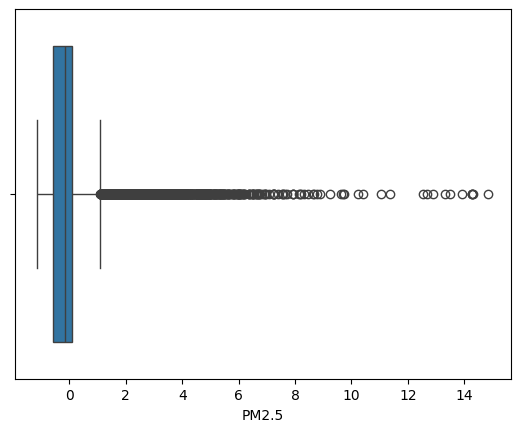

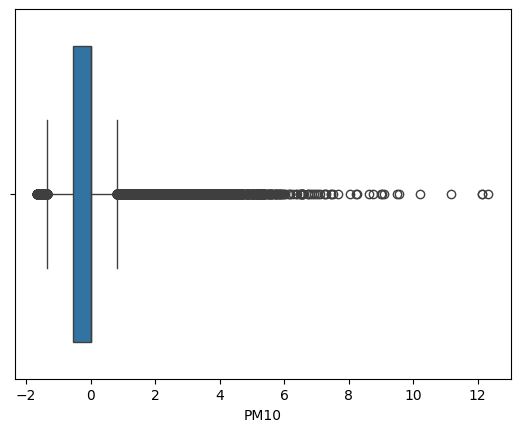

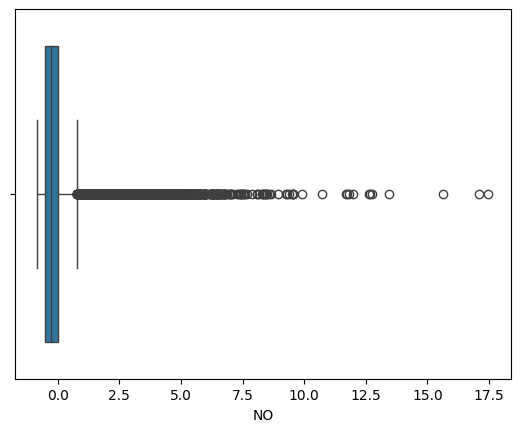

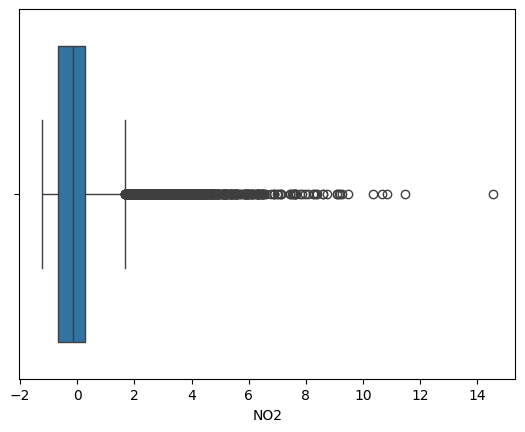

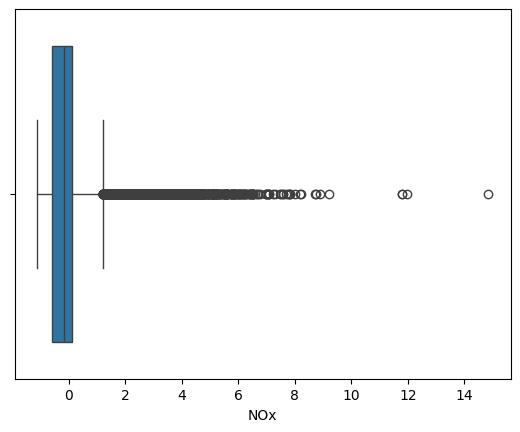

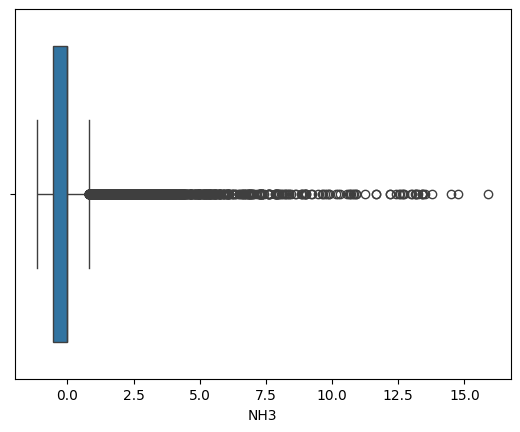

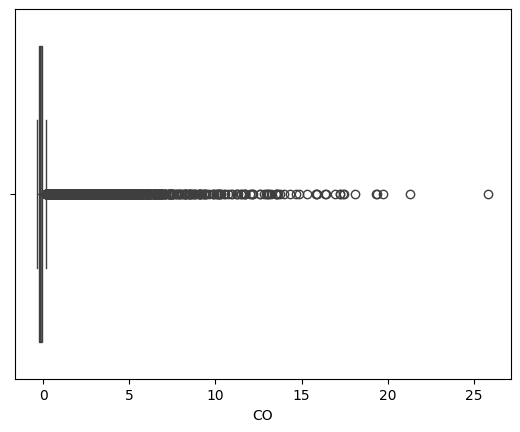

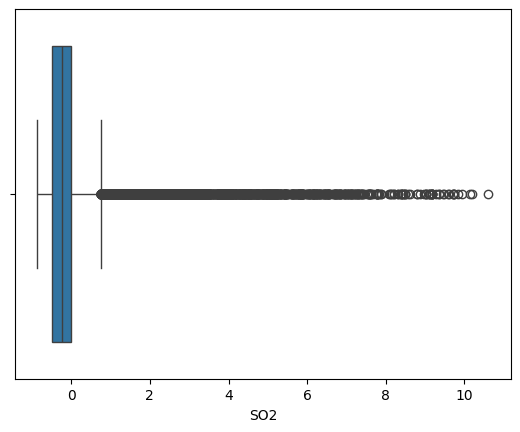

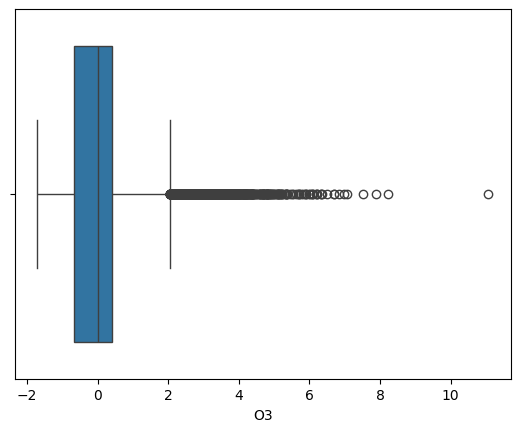

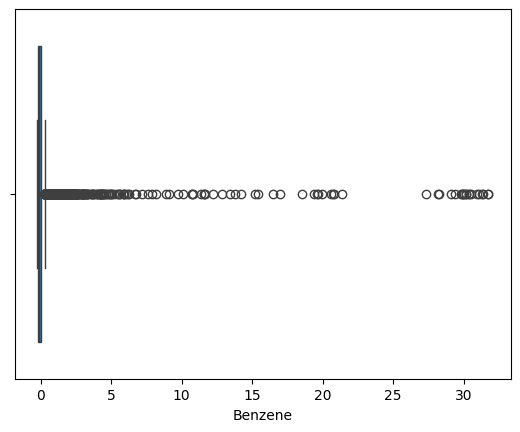

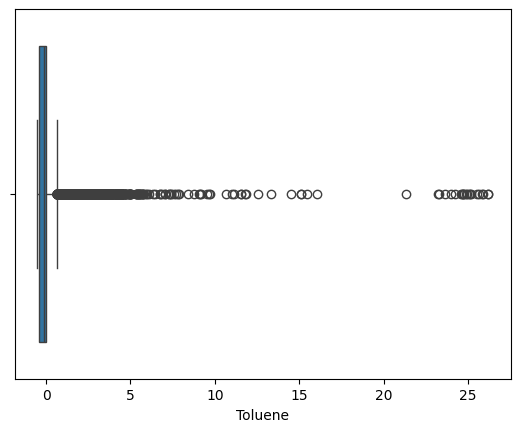

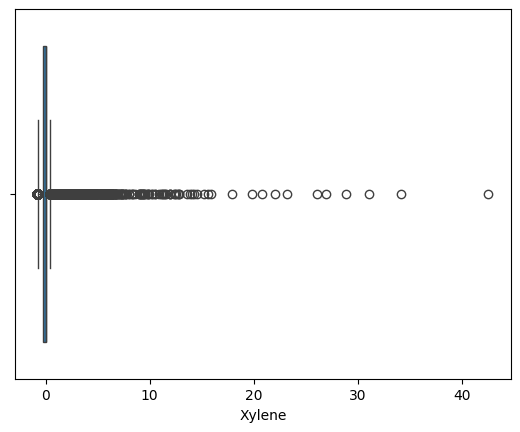

In [34]:
#PLOT-2:BOX PLOT: TO CHECK FOR ANY OUTLIERS ARE PRESENT OR NOT
columns1=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
for col in columns1:
    sns.boxplot(x=df[col])
    plt.show()

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


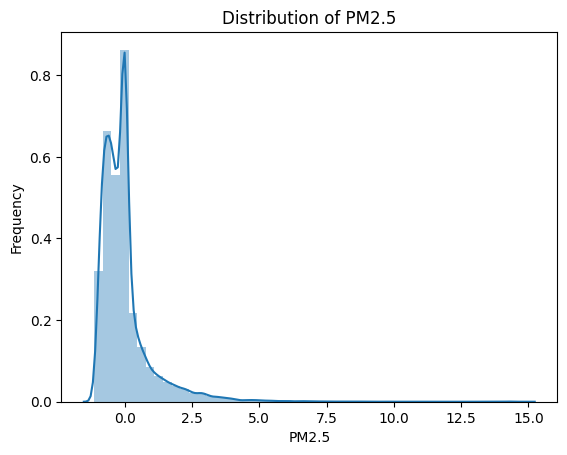

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


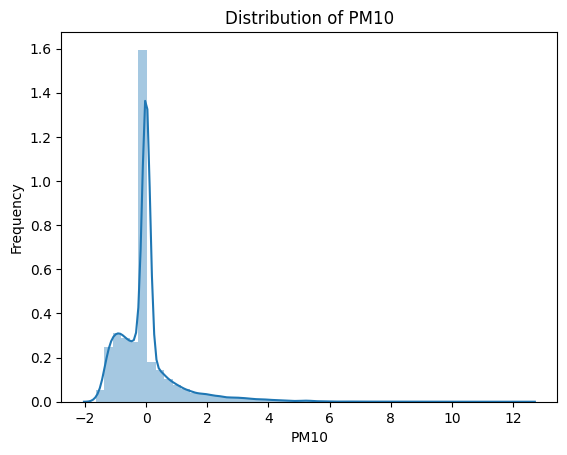

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


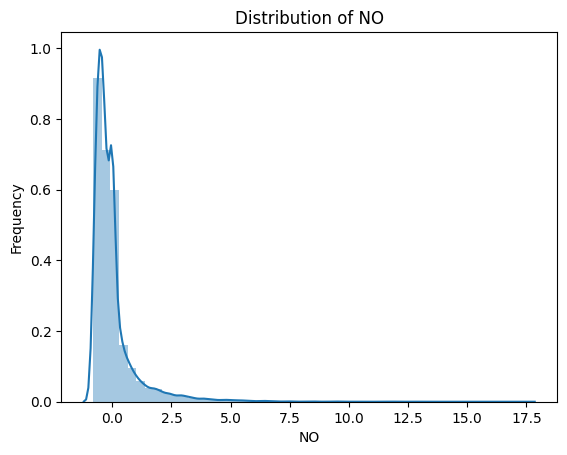

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


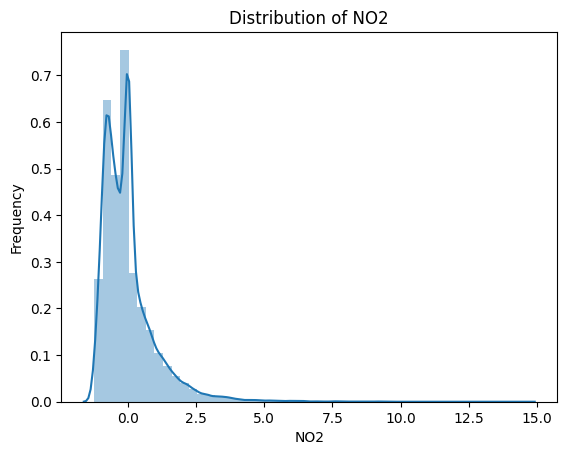

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


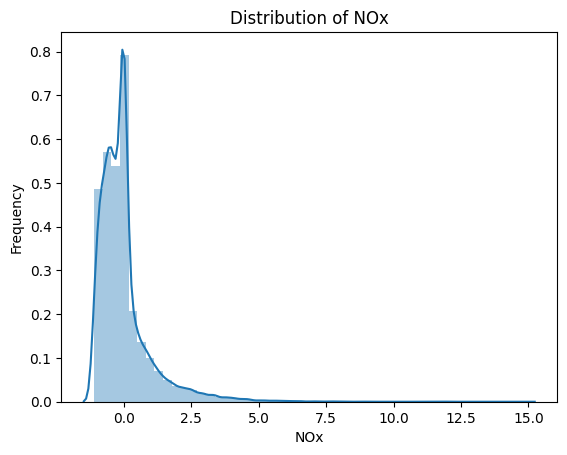

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


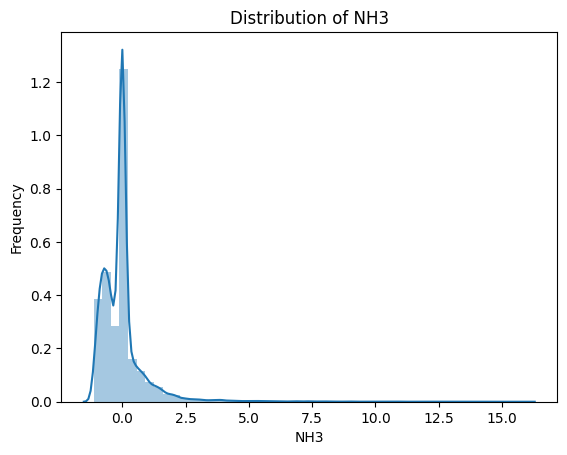

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


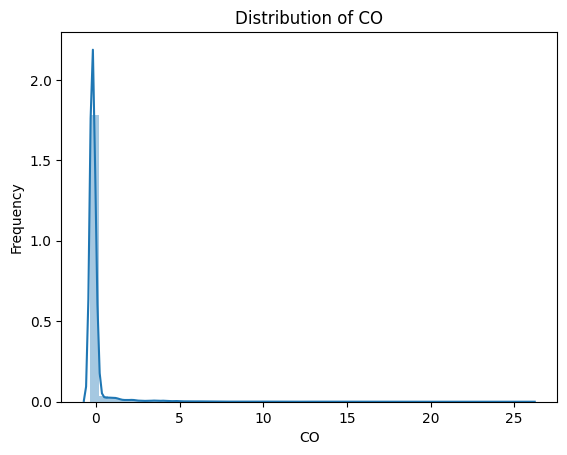

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


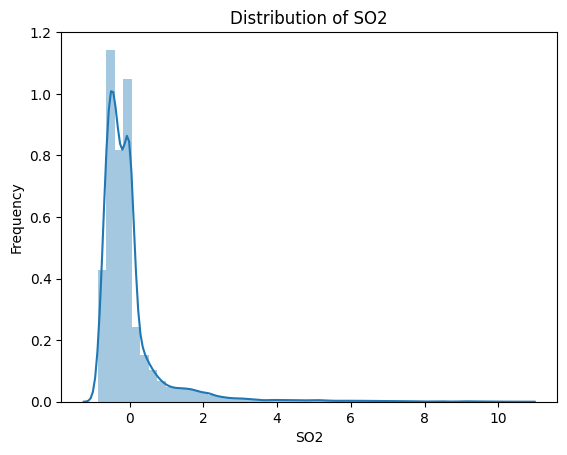

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


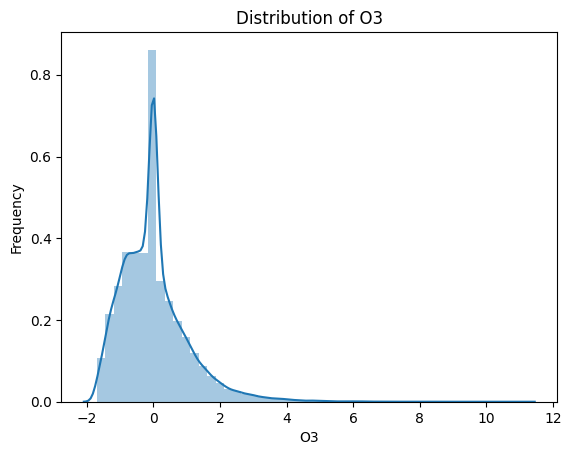

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


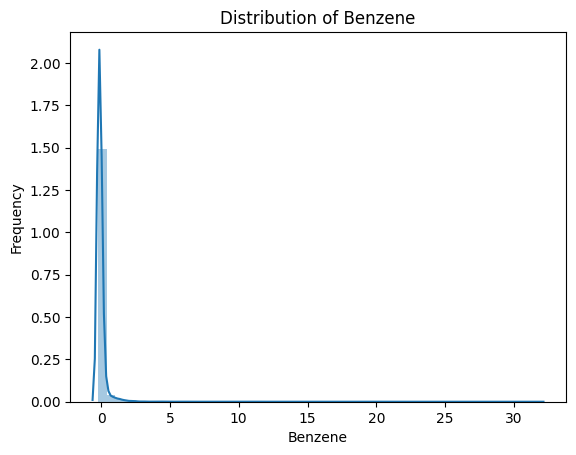

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


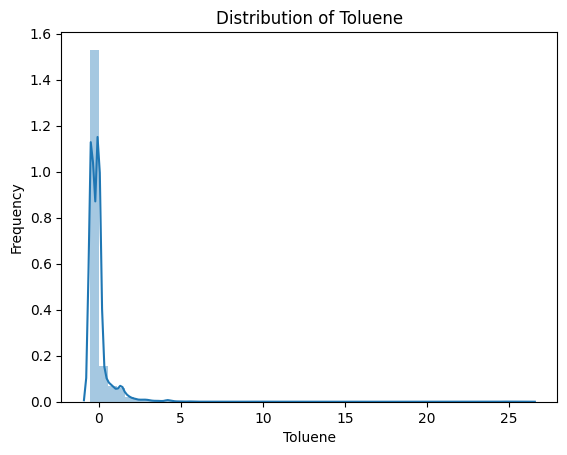

/tmp/ipython-input-1446959843.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate


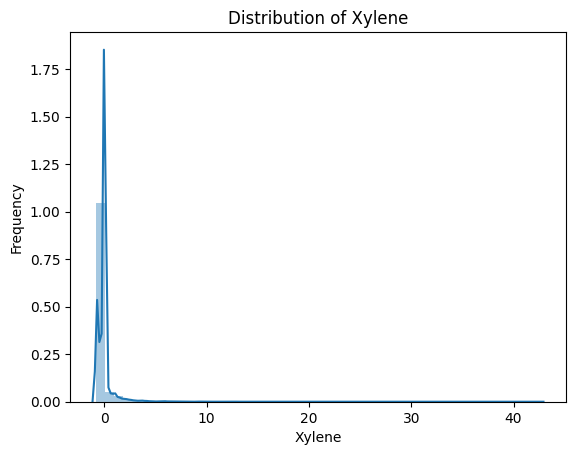

In [35]:
#DISTRIBUTION PLOT FOR THE ABOVE COLUMNS
columns1 = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
for col in columns1:
    sns.distplot(df[col], kde=True)  # Use kde=True for Kernel Density Estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [36]:
columns1 = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [37]:
df["PM2.5"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
29526   -0.882470
29527   -0.724930
29528   -0.749671
29529   -0.855203
29530   -0.882806
Name: PM2.5, Length: 29531, dtype: float64

<Axes: ylabel='PM2.5'>

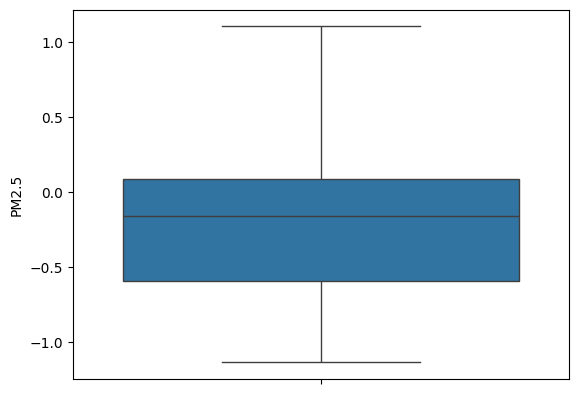

In [38]:
#REMOVING OUTLIERS
Q1_PM2=df["PM2.5"].quantile(0.25)
Q3_PM2=df["PM2.5"].quantile(0.75)
IQR=Q3_PM2-Q1_PM2
MIN_PM2=Q1_PM2-(1.5*IQR)
MAX_PM2=Q3_PM2+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["PM2.5"]=np.where(df["PM2.5"]>MAX_PM2,MAX_PM2,np.where(df["PM2.5"]<MIN_PM2,MIN_PM2,df["PM2.5"]))
sns.boxplot(df["PM2.5"])

In [39]:
df["PM2.5"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
29526   -0.882470
29527   -0.724930
29528   -0.749671
29529   -0.855203
29530   -0.882806
Name: PM2.5, Length: 29531, dtype: float64

In [40]:
df["PM2.5"].unique()

array([ 0.        ,  0.09744292,  0.26390349, ..., -0.57698327,
       -0.70776169, -0.72492951])

<Axes: ylabel='PM10'>

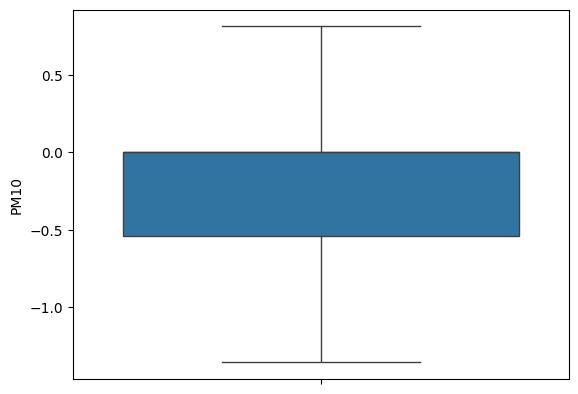

In [41]:
Q1_PM10=df["PM10"].quantile(0.25)
Q3_PM10=df["PM10"].quantile(0.75)
IQR=Q3_PM10-Q1_PM10
MIN_PM10=Q1_PM10-(1.5*IQR)
MAX_PM10=Q3_PM10+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["PM10"]=np.where(df["PM10"]>MAX_PM10,MAX_PM10,np.where(df["PM10"]<MIN_PM10,MIN_PM10,df["PM10"]))
sns.boxplot(df["PM10"])

In [42]:
df["PM10"]

0       -1.987539e-16
1       -1.987539e-16
2       -1.987539e-16
3       -1.987539e-16
4       -1.987539e-16
             ...     
29526   -9.396831e-01
29527   -6.159058e-01
29528   -7.328293e-01
29529   -9.532496e-01
29530   -7.290530e-01
Name: PM10, Length: 29531, dtype: float64

<Axes: ylabel='NO2'>

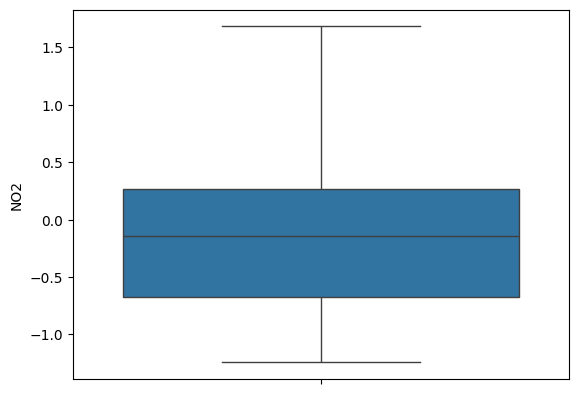

In [43]:
Q1_NO2=df["NO2"].quantile(0.25)
Q3_NO2=df["NO2"].quantile(0.75)
IQR=Q3_NO2-Q1_NO2
MIN_NO2=Q1_NO2-(1.5*IQR)
MAX_NO2=Q3_NO2+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["NO2"]=np.where(df["NO2"]>MAX_NO2,MAX_NO2,np.where(df["NO2"]<MIN_NO2,MIN_NO2,df["NO2"]))
sns.boxplot(df["NO2"])

<Axes: ylabel='NOx'>

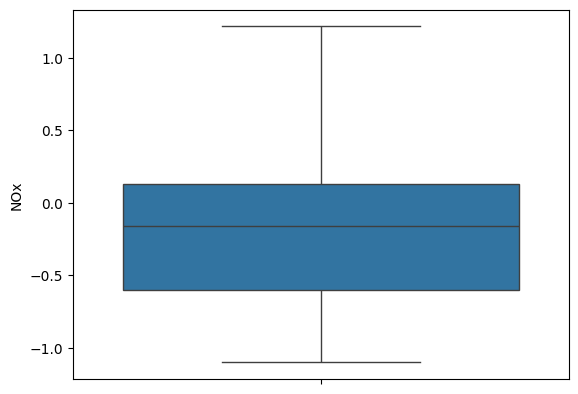

In [44]:
Q1_NOx=df["NOx"].quantile(0.25)
Q3_NOx=df["NOx"].quantile(0.75)
IQR=Q3_NOx-Q1_NOx
MIN_NOx=Q1_NOx-(1.5*IQR)
MAX_NOx=Q3_NOx+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["NOx"]=np.where(df["NOx"]>MAX_NOx,MAX_NOx,np.where(df["NOx"]<MIN_NOx,MIN_NOx,df["NOx"]))
sns.boxplot(df["NOx"])

<Axes: ylabel='NH3'>

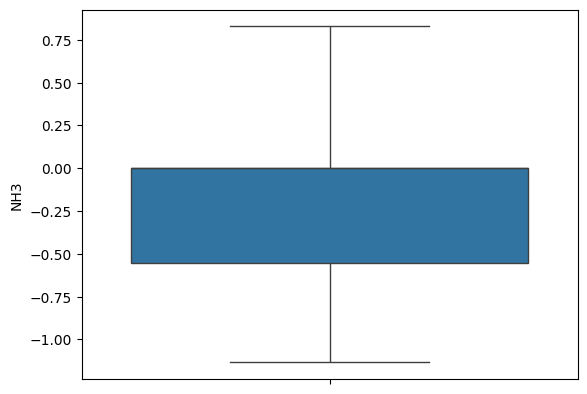

In [45]:
Q1_NH3=df["NH3"].quantile(0.25)
Q3_NH3=df["NH3"].quantile(0.75)
IQR=Q3_NH3-Q1_NH3
MIN_NH3=Q1_NH3-(1.5*IQR)
MAX_NH3=Q3_NH3+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["NH3"]=np.where(df["NH3"]>MAX_NH3,MAX_NH3,np.where(df["NH3"]<MIN_NH3,MIN_NH3,df["NH3"]))
sns.boxplot(df["NH3"])

<Axes: ylabel='CO'>

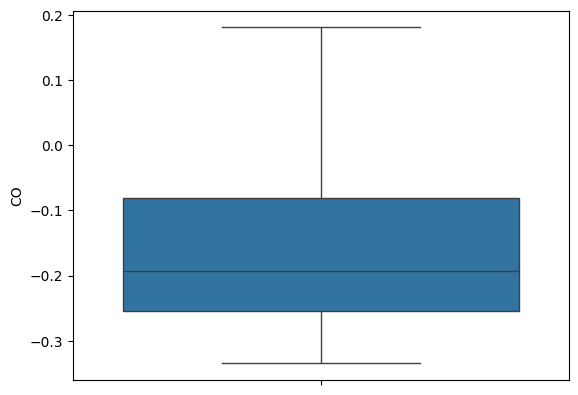

In [46]:
Q1_CO=df["CO"].quantile(0.25)
Q3_CO=df["CO"].quantile(0.75)
IQR=Q3_CO-Q1_CO
MIN_CO=Q1_CO-(1.5*IQR)
MAX_CO=Q3_CO+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["CO"]=np.where(df["CO"]>MAX_CO,MAX_CO,np.where(df["CO"]<MIN_CO,MIN_CO,df["CO"]))
sns.boxplot(df["CO"])

<Axes: ylabel='SO2'>

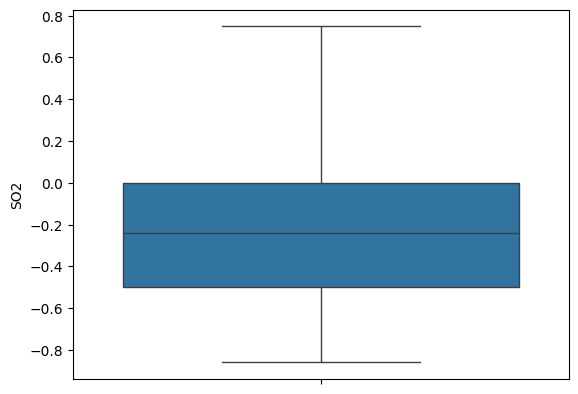

In [47]:
Q1_SO2=df["SO2"].quantile(0.25)
Q3_SO2=df["SO2"].quantile(0.75)
IQR=Q3_SO2-Q1_SO2
MIN_SO2=Q1_SO2-(1.5*IQR)
MAX_SO2=Q3_SO2+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["SO2"]=np.where(df["SO2"]>MAX_SO2,MAX_SO2,np.where(df["SO2"]<MIN_SO2,MIN_SO2,df["SO2"]))
sns.boxplot(df["SO2"])

<Axes: ylabel='O3'>

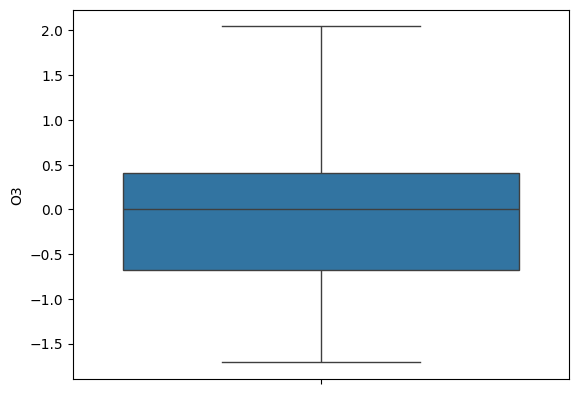

In [48]:
Q1_O3=df["O3"].quantile(0.25)
Q3_O3=df["O3"].quantile(0.75)
IQR=Q3_O3-Q1_O3
MIN_O3=Q1_O3-(1.5*IQR)
MAX_O3=Q3_O3+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["O3"]=np.where(df["O3"]>MAX_O3,MAX_O3,np.where(df["O3"]<MIN_O3,MIN_O3,df["O3"]))
sns.boxplot(df["O3"])

<Axes: ylabel='Benzene'>

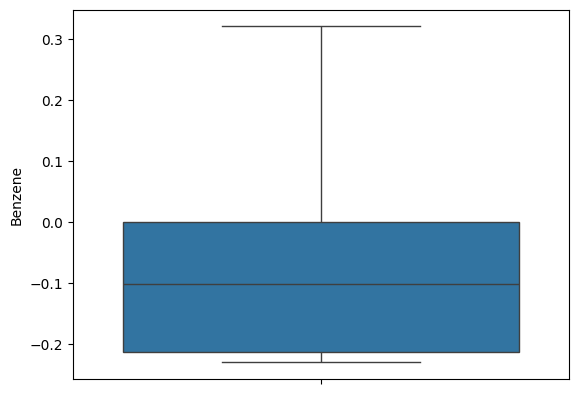

In [49]:
Q1_Benzene=df["Benzene"].quantile(0.25)
Q3_Benzene=df["Benzene"].quantile(0.75)
IQR=Q3_Benzene-Q1_Benzene
MIN_Benzene=Q1_Benzene-(1.5*IQR)
MAX_Benzene=Q3_Benzene+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["Benzene"]=np.where(df["Benzene"]>MAX_Benzene,MAX_Benzene,np.where(df["Benzene"]<MIN_Benzene,MIN_Benzene,df["Benzene"]))
sns.boxplot(df["Benzene"])

<Axes: ylabel='Toluene'>

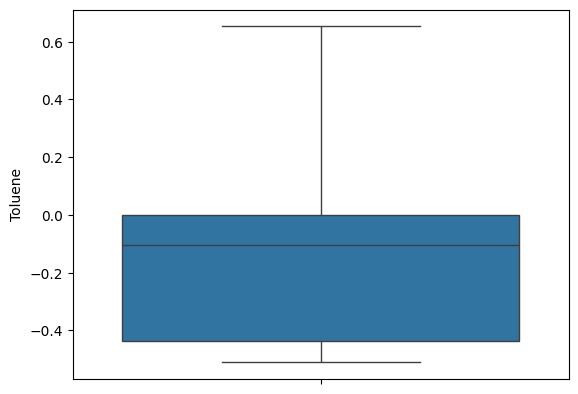

In [50]:
Q1_Toluene=df["Toluene"].quantile(0.25)
Q3_Toluene=df["Toluene"].quantile(0.75)
IQR=Q3_Toluene-Q1_Toluene
MIN_Toluene=Q1_Toluene-(1.5*IQR)
MAX_Toluene=Q3_Toluene+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["Toluene"]=np.where(df["Toluene"]>MAX_Toluene,MAX_Toluene,np.where(df["Toluene"]<MIN_Toluene,MIN_Toluene,df["Toluene"]))
sns.boxplot(df["Toluene"])

<Axes: ylabel='Xylene'>

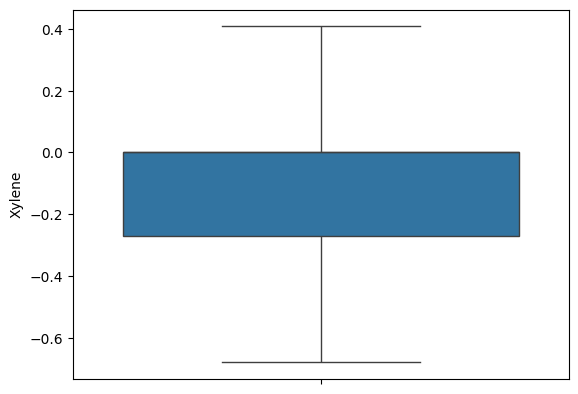

In [51]:
Q1_Xylene=df["Xylene"].quantile(0.25)
Q3_Xylene=df["Xylene"].quantile(0.75)
IQR=Q3_Xylene-Q1_Xylene
MIN_Xylene=Q1_Xylene-(1.5*IQR)
MAX_Xylene=Q3_Xylene+(1.5*IQR)
#df[(df["PM2.5"]<MIN_PM2) | (df["PM2.5"]>MAX_PM2)]
df["Xylene"]=np.where(df["Xylene"]>MAX_Xylene,MAX_Xylene,np.where(df["Xylene"]<MIN_Xylene,MIN_Xylene,df["Xylene"]))
sns.boxplot(df["Xylene"])

In [52]:
le=LabelEncoder()
df["AQI_Bucket"]=le.fit_transform(df["AQI_Bucket"])

In [53]:
df1=df.drop(["City","Date","AQI_Bucket"],axis=1)
df1

PM2.5          PM10        NO       NO2       NOx           NH3  \
0      0.000000 -1.987539e-16 -0.779757 -0.450757 -0.517068 -1.715374e-16   
1      0.000000 -1.987539e-16 -0.777417 -0.561041 -0.540604 -1.715374e-16   
2      0.000000 -1.987539e-16 -0.008181 -0.403679 -0.088996 -1.715374e-16   
3      0.000000 -1.987539e-16 -0.743239 -0.439423 -0.489099 -1.715374e-16   
4      0.000000 -1.987539e-16  0.211869 -0.311266  0.185926 -1.715374e-16   
...         ...           ...       ...       ...       ...           ...   
29526 -0.882470 -9.396831e-01 -0.463261 -0.152596 -0.435547 -5.317689e-01   
29527 -0.724930 -6.159058e-01 -0.662710 -0.109006 -0.538216 -5.549450e-01   
29528 -0.749671 -7.328293e-01 -0.661305  0.042254 -0.476819 -6.167478e-01   
29529 -0.855203 -9.532496e-01 -0.633214  0.030485 -0.460788 -6.495806e-01   
29530 -0.882806 -7.290530e-01 -0.804103 -0.074569 -0.622808 -8.827898e-01   

             CO       SO2        O3       Benzene   Toluene        Xylene  \
0     -0.197836  0.748898  2.044505 -2.306208e-01 -0.509612 -6.803345e-01   
1     -0.190391  0.592474 -0.021397  2.805822e-02 -0.187911  1.779777e-01   
2      0.181130  0.748898 -0.188038  2.473731e-01  0.451967 -2.085587e-01   
3     -0.081690  0.239995  0.078786  8.077814e-02  0.084477 -5.264341e-01   
4      0.181130  0.748898  0.238980  2.621347e-01  0.598141 -7.377959e-02   
...         ...       ...       ...           ...       ...           ...   
29526 -0.264844 -0.353779 -0.555045 -7.316402e-02  0.197777 -5.950952e-01   
29527 -0.257399 -0.107162 -0.215812 -1.786039e-01 -0.381049 -6.803345e-01   
29528 -0.263355 -0.361467 -0.175143 -2.299179e-01 -0.510199 -6.803345e-01   
29529 -0.257399 -0.277487 -0.307067 -2.306208e-01 -0.510786 -6.803345e-01   
29530 -0.246975 -0.735237 -0.865017 -3.121646e-17  0.000000  1.129320e-16   

                AQI  
0      2.202172e-16  
1      2.202172e-16  
2      2.202172e-16  
3      2.202172e-16  
4      2.202172e-16  
...             ...  
29526 -9.721175e-01  
29527 -7.474195e-01  
29528 -7.629159e-01  
29529 -8.713908e-01  
29530 -9.023836e-01  

[29531 rows x 13 columns]

In [54]:
#STEP-6:CHECKING COLLINEARITY
corre=df1.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.675593  0.407595  0.436076  0.434471  0.338228  0.299084   
PM10     0.675593  1.000000  0.332229  0.421199  0.420906  0.358488  0.244187   
NO       0.407595  0.332229  1.000000  0.435922  0.633605  0.237696  0.241295   
NO2      0.436076  0.421199  0.435922  1.000000  0.602880  0.361261  0.225996   
NOx      0.434471  0.420906  0.633605  0.602880  1.000000  0.246804  0.272556   
NH3      0.338228  0.358488  0.237696  0.361261  0.246804  1.000000  0.160798   
CO       0.299084  0.244187  0.241295  0.225996  0.272556  0.160798  1.000000   
SO2      0.257631  0.297238  0.260012  0.298309  0.287530  0.060975  0.299532   
O3       0.208712  0.223841 -0.011973  0.308860  0.057416  0.149557  0.040019   
Benzene  0.172375  0.178905  0.209281  0.253733  0.249209  0.014599  0.223971   
Toluene  0.196428  0.205240  0.195029  0.325645  0.274576  0.055525  0.328570   
Xylene   0.050087  0.047033  0.043720  0.054867  0.059547 -0.035816  0.166456   
AQI      0.668385  0.470799  0.430600  0.461283  0.438008  0.254680  0.497267   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.257631  0.208712  0.172375  0.196428  0.050087  0.668385  
PM10     0.297238  0.223841  0.178905  0.205240  0.047033  0.470799  
NO       0.260012 -0.011973  0.209281  0.195029  0.043720  0.430600  
NO2      0.298309  0.308860  0.253733  0.325645  0.054867  0.461283  
NOx      0.287530  0.057416  0.249209  0.274576  0.059547  0.438008  
NH3      0.060975  0.149557  0.014599  0.055525 -0.035816  0.254680  
CO       0.299532  0.040019  0.223971  0.328570  0.166456  0.497267  
SO2      1.000000  0.202088  0.155857  0.324499  0.064991  0.376846  
O3       0.202088  1.000000  0.081834  0.154748  0.042275  0.179884  
Benzene  0.155857  0.081834  1.000000  0.617177  0.344152  0.224680  
Toluene  0.324499  0.154748  0.617177  1.000000  0.281294  0.328004  
Xylene   0.064991  0.042275  0.344152  0.281294  1.000000  0.065584  
AQI      0.376846  0.179884  0.224680  0.328004  0.065584  1.000000

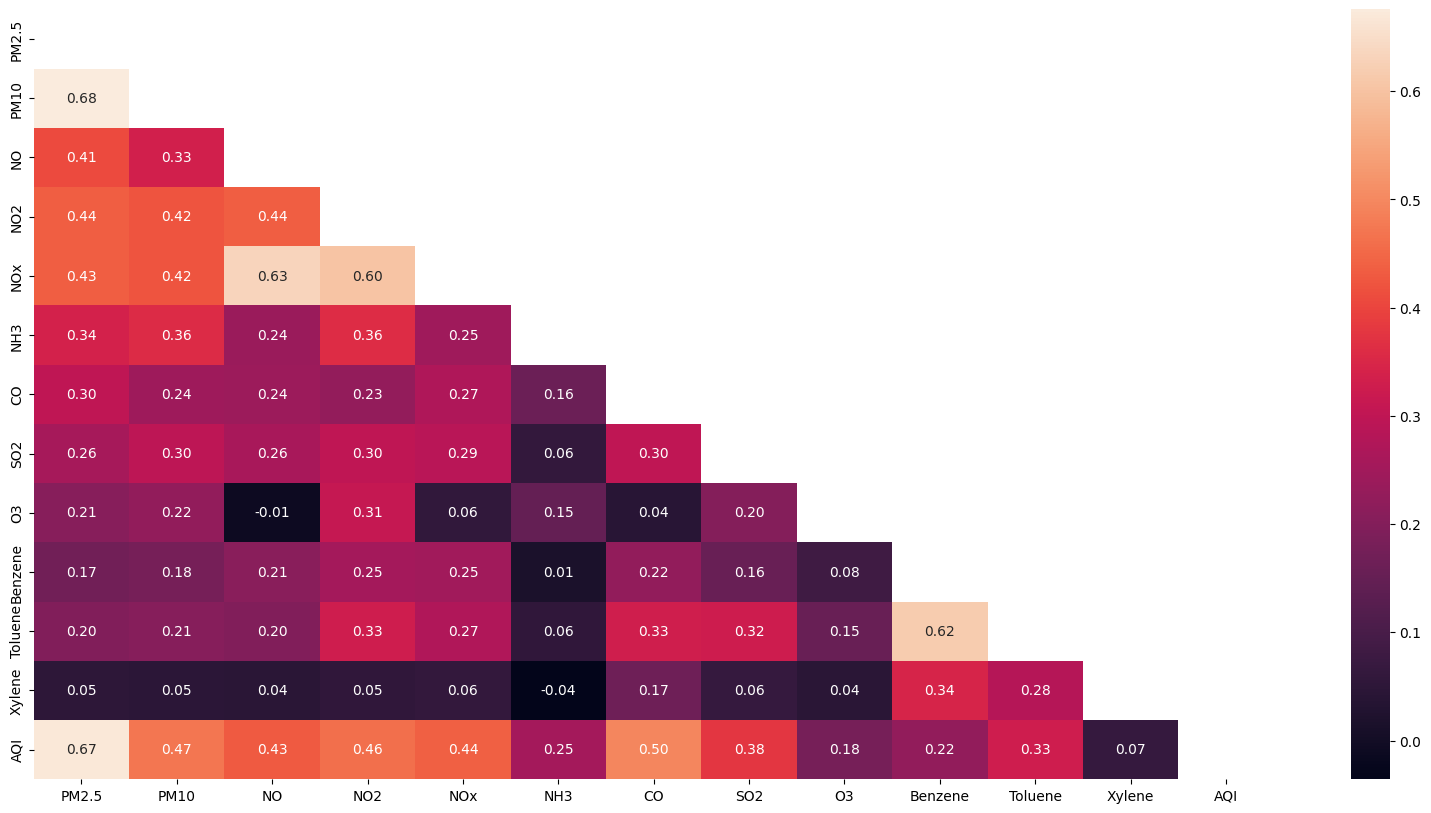

In [55]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
#HENCE FROM THE ABOVE CORRELATION VISUALISATION WE SEE THAT THE THE INPUT COLUMNS DOSENT HAVE CORRELATION MORE THAN 80% AND NEITHER
#THE INPUT COLUMNS ARE CORRELATED TO "AQI"

In [ ]:
# This indicates that most of the predicted values (y_pred) are very close to the actual values (y_test), which suggests a high level
#of accuracy for your model in predicting the Air Quality Index (AQI).

In [56]:
df

City        Date     PM2.5          PM10        NO       NO2  \
0          Ahmedabad  2015-01-01  0.000000 -1.987539e-16 -0.779757 -0.450757   
1          Ahmedabad  2015-01-02  0.000000 -1.987539e-16 -0.777417 -0.561041   
2          Ahmedabad  2015-01-03  0.000000 -1.987539e-16 -0.008181 -0.403679   
3          Ahmedabad  2015-01-04  0.000000 -1.987539e-16 -0.743239 -0.439423   
4          Ahmedabad  2015-01-05  0.000000 -1.987539e-16  0.211869 -0.311266   
...              ...         ...       ...           ...       ...       ...   
29526  Visakhapatnam  2020-06-27 -0.882470 -9.396831e-01 -0.463261 -0.152596   
29527  Visakhapatnam  2020-06-28 -0.724930 -6.159058e-01 -0.662710 -0.109006   
29528  Visakhapatnam  2020-06-29 -0.749671 -7.328293e-01 -0.661305  0.042254   
29529  Visakhapatnam  2020-06-30 -0.855203 -9.532496e-01 -0.633214  0.030485   
29530  Visakhapatnam  2020-07-01 -0.882806 -7.290530e-01 -0.804103 -0.074569   

            NOx           NH3        CO       SO2        O3       Benzene  \
0     -0.517068 -1.715374e-16 -0.197836  0.748898  2.044505 -2.306208e-01   
1     -0.540604 -1.715374e-16 -0.190391  0.592474 -0.021397  2.805822e-02   
2     -0.088996 -1.715374e-16  0.181130  0.748898 -0.188038  2.473731e-01   
3     -0.489099 -1.715374e-16 -0.081690  0.239995  0.078786  8.077814e-02   
4      0.185926 -1.715374e-16  0.181130  0.748898  0.238980  2.621347e-01   
...         ...           ...       ...       ...       ...           ...   
29526 -0.435547 -5.317689e-01 -0.264844 -0.353779 -0.555045 -7.316402e-02   
29527 -0.538216 -5.549450e-01 -0.257399 -0.107162 -0.215812 -1.786039e-01   
29528 -0.476819 -6.167478e-01 -0.263355 -0.361467 -0.175143 -2.299179e-01   
29529 -0.460788 -6.495806e-01 -0.257399 -0.277487 -0.307067 -2.306208e-01   
29530 -0.622808 -8.827898e-01 -0.246975 -0.735237 -0.865017 -3.121646e-17   

        Toluene        Xylene           AQI  AQI_Bucket  
0     -0.509612 -6.803345e-01  2.202172e-16           1  
1     -0.187911  1.779777e-01  2.202172e-16           1  
2      0.451967 -2.085587e-01  2.202172e-16           1  
3      0.084477 -5.264341e-01  2.202172e-16           1  
4      0.598141 -7.377959e-02  2.202172e-16           1  
...         ...           ...           ...         ...  
29526  0.197777 -5.950952e-01 -9.721175e-01           0  
29527 -0.381049 -6.803345e-01 -7.474195e-01           3  
29528 -0.510199 -6.803345e-01 -7.629159e-01           3  
29529 -0.510786 -6.803345e-01 -8.713908e-01           3  
29530  0.000000  1.129320e-16 -9.023836e-01           0  

[29531 rows x 16 columns]

In [57]:
df_Kolkata=df[df["City"]=="Kolkata"]
df_Kolkatanew=df_Kolkata.drop(["City","Date"],axis=1)
df_Kolkatanew

PM2.5      PM10            NO       NO2       NOx       NH3  \
19032 -0.556618 -0.854928 -1.663344e-16  0.540932  0.000000 -1.012190   
19033 -0.647169 -0.940662 -6.702011e-01  0.238413  0.442770 -0.960526   
19034 -0.770037 -1.050173 -6.594327e-01  0.476418  0.348969 -0.951835   
19035 -0.746642 -1.001921 -6.500689e-01  0.194822  0.150452 -0.946524   
19036 -0.772393 -1.063320 -6.912696e-01 -0.084595 -0.098205 -0.930108   
...         ...       ...           ...       ...       ...       ...   
19841 -1.002476 -1.306258 -5.774995e-01 -0.841766 -0.606776 -0.728765   
19842 -0.957200 -1.294649 -5.447262e-01 -0.694429 -0.466928 -0.799742   
19843 -0.890717 -1.198985 -5.690721e-01 -0.548400 -0.370398 -0.767392   
19844 -0.899637 -1.150733 -5.302123e-01 -0.709250 -0.483982 -0.668411   
19845 -0.958042 -1.210453 -5.302123e-01 -0.808637 -0.546403 -0.512456   

             CO       SO2            O3       Benzene   Toluene        Xylene  \
19032 -0.185924  0.646292  3.523975e-16 -3.121646e-17  0.000000  1.129320e-16   
19033 -0.188902 -0.249100 -1.736553e-01  9.553971e-02 -0.459126  1.129320e-16   
19034 -0.226129  0.000000  4.576959e-01  1.440420e-01 -0.407466  1.129320e-16   
19035 -0.188902  0.000000  3.550331e-01  2.459672e-01 -0.379875  1.129320e-16   
19036 -0.185924  0.000000  4.750544e-01  1.271717e-01 -0.374004  1.129320e-16   
...         ...       ...           ...           ...       ...           ...   
19841 -0.282713 -0.520556 -5.629804e-01 -1.125282e-01  0.153162 -6.803345e-01   
19842 -0.278246 -0.509319 -3.338490e-01 -1.378338e-01  0.139073 -6.803345e-01   
19843 -0.267822 -0.444856 -1.910138e-01 -7.088390e-03  0.063344 -6.803345e-01   
19844 -0.279735 -0.524696 -4.910668e-01 -5.769951e-02  0.120287 -6.803345e-01   
19845 -0.290158 -0.603944 -9.408984e-01 -1.026872e-01  0.090935 -6.803345e-01   

                AQI  AQI_Bucket  
19032  2.202172e-16           1  
19033 -7.241749e-01           3  
19034 -8.249016e-01           3  
19035 -7.164267e-01           3  
19036 -6.466929e-01           3  
...             ...         ...  
19841 -1.003110e+00           0  
19842 -9.566211e-01           0  
19843 -9.178800e-01           0  
19844 -9.256282e-01           0  
19845 -9.411246e-01           0  

[814 rows x 14 columns]

In [58]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Kolkatanew[columns_to_scale] = scaler.fit_transform(df_Kolkatanew[columns_to_scale])

In [59]:
corre=df_Kolkatanew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.957705  0.755307  0.853854  0.805137  0.699519   
PM10        0.957705  1.000000  0.684334  0.838663  0.814677  0.693517   
NO          0.755307  0.684334  1.000000  0.705422  0.672477  0.582647   
NO2         0.853854  0.838663  0.705422  1.000000  0.944872  0.714215   
NOx         0.805137  0.814677  0.672477  0.944872  1.000000  0.679742   
NH3         0.699519  0.693517  0.582647  0.714215  0.679742  1.000000   
CO          0.568641  0.518907  0.648024  0.642155  0.651306  0.438890   
SO2         0.731094  0.726758  0.540643  0.622134  0.579379  0.604207   
O3          0.338578  0.380719  0.101162  0.190001  0.149886  0.285688   
Benzene     0.409496  0.408349  0.433735  0.423029  0.490995  0.437002   
Toluene     0.448104  0.463637  0.519489  0.454887  0.522161  0.498468   
Xylene      0.427530  0.454736  0.366128  0.540304  0.560090  0.217436   
AQI         0.956906  0.894589  0.805216  0.824319  0.761212  0.696927   
AQI_Bucket  0.380086  0.252647  0.408301  0.327626  0.263400  0.268266   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.568641  0.731094  0.338578  0.409496  0.448104  0.427530   
PM10        0.518907  0.726758  0.380719  0.408349  0.463637  0.454736   
NO          0.648024  0.540643  0.101162  0.433735  0.519489  0.366128   
NO2         0.642155  0.622134  0.190001  0.423029  0.454887  0.540304   
NOx         0.651306  0.579379  0.149886  0.490995  0.522161  0.560090   
NH3         0.438890  0.604207  0.285688  0.437002  0.498468  0.217436   
CO          1.000000  0.259799 -0.000940  0.334710  0.424572  0.412149   
SO2         0.259799  1.000000  0.471993  0.243500  0.270629  0.143852   
O3         -0.000940  0.471993  1.000000  0.060098  0.051584 -0.138088   
Benzene     0.334710  0.243500  0.060098  1.000000  0.717898  0.357855   
Toluene     0.424572  0.270629  0.051584  0.717898  1.000000  0.215762   
Xylene      0.412149  0.143852 -0.138088  0.357855  0.215762  1.000000   
AQI         0.568328  0.744305  0.311443  0.384928  0.440945  0.368575   
AQI_Bucket  0.362215  0.201564  0.044854  0.131866  0.183118  0.180046   

                 AQI  AQI_Bucket  
PM2.5       0.956906    0.380086  
PM10        0.894589    0.252647  
NO          0.805216    0.408301  
NO2         0.824319    0.327626  
NOx         0.761212    0.263400  
NH3         0.696927    0.268266  
CO          0.568328    0.362215  
SO2         0.744305    0.201564  
O3          0.311443    0.044854  
Benzene     0.384928    0.131866  
Toluene     0.440945    0.183118  
Xylene      0.368575    0.180046  
AQI         1.000000    0.439819  
AQI_Bucket  0.439819    1.000000

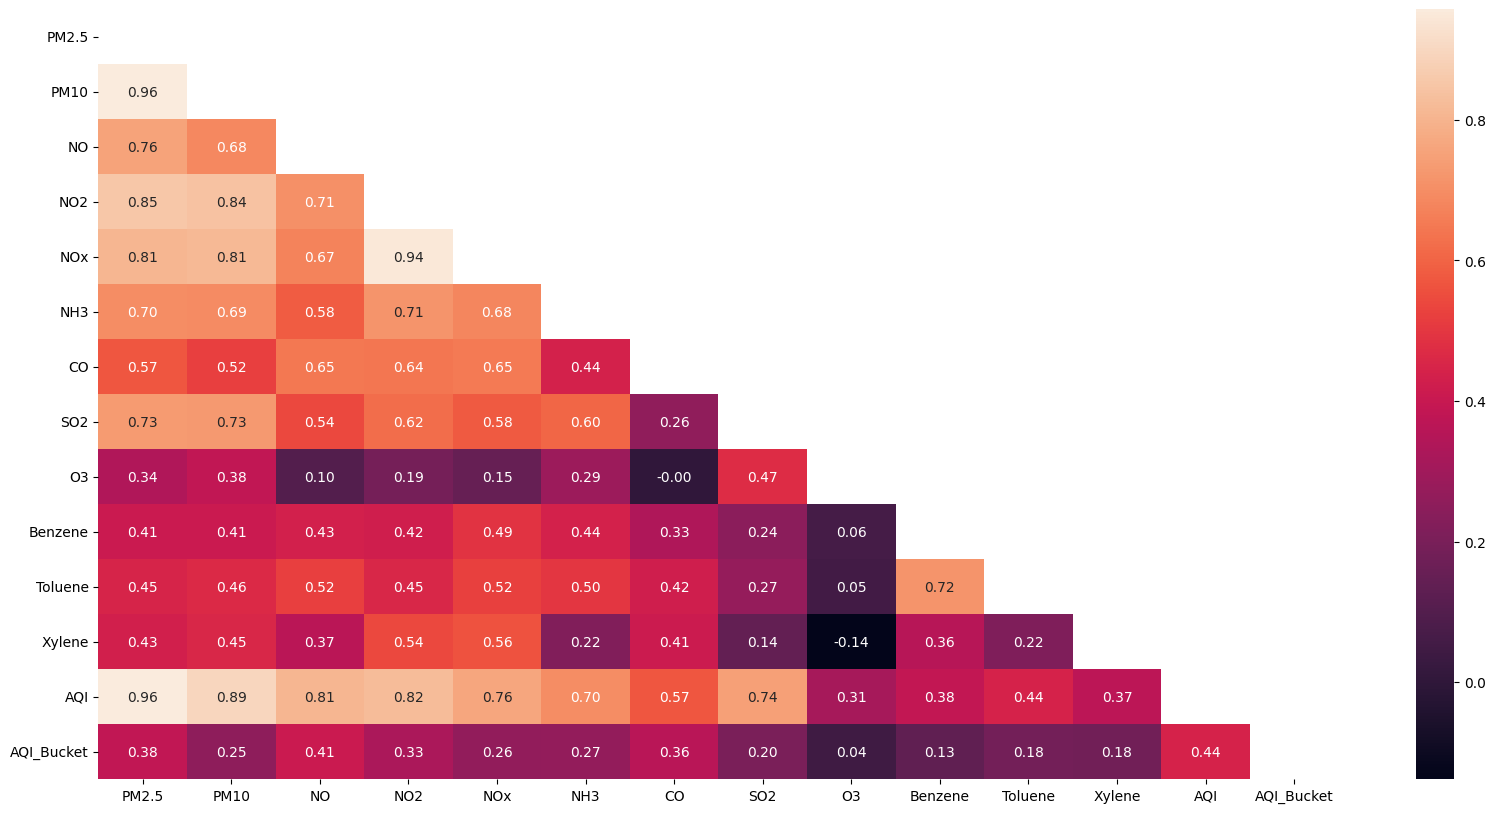

In [60]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
#PCA OF KOLKATA

In [61]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
            'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
from sklearn.decomposition import PCA
pca=PCA()

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Concatenate

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Kolkatanew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Bengalurunew:")
print(feature_importance)


Top Features by LDA Importance for df_Bengalurunew:
    Feature  LDA Importance
0     PM2.5           12.65
1      PM10            5.95
4       NOx            3.15
2        NO            2.70
3       NO2            2.37
7       SO2            0.98
5       NH3            0.93
8        O3            0.73
10  Toluene            0.60
6        CO            0.55
11   Xylene            0.53
9   Benzene            0.36


In [64]:
x=df_Kolkatanew[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO','SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y=df_Kolkatanew["AQI"]
#from sklearn.ensemble import RandomForestRegressor
#x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=42)
#x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [65]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=42)  # 0.25 of 0.8 = 0.2 overall

Explained variance ratio by each principal component:
 [0.55312545 0.13250263 0.09022092 0.05779089 0.04645918 0.03488705
 0.02353898 0.0213008  0.01825914 0.01537899 0.0043463  0.00218968]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.361494  0.352688  0.318250  0.355580  0.350433  0.304640  0.259885   
PC2   0.134897  0.156361 -0.095735 -0.027207 -0.097356  0.143088 -0.285464   
PC3  -0.119401 -0.098661 -0.041657 -0.203064 -0.133002  0.130340 -0.222534   
PC4   0.009581  0.130899 -0.380476  0.049416  0.103757 -0.156417 -0.482870   
PC5  -0.061237 -0.035548 -0.083820 -0.052544 -0.011841 -0.267510  0.581684   
PC6  -0.165643 -0.087330 -0.528503  0.232006  0.247017  0.670859  0.068516   
PC7   0.165113  0.290569 -0.383197  0.165602  0.278009 -0.468398 -0.071770   
PC8  -0.211267 -0.236620 -0.329329  0.138058  0.265446 -0.245754  0.303095   
PC9  -0.320493 -0.226998 -0.074057 -0.158298 -0.109982  0

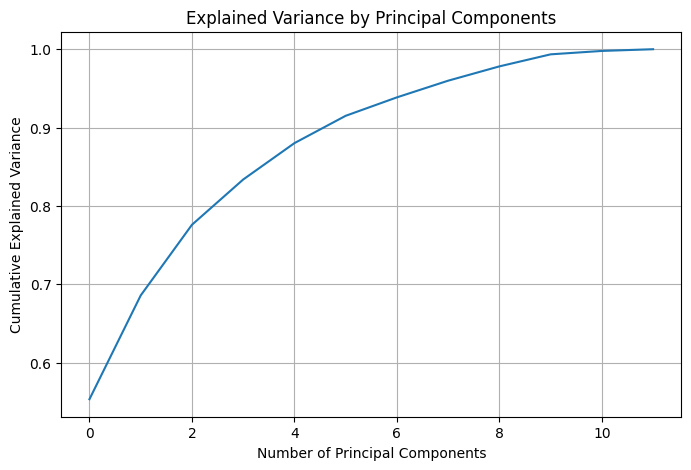

In [66]:
pca.fit(xtrain)

# Extract variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)

# Create DataFrame to view feature importance in each principal component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=xtrain.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)

# Plot cumulative variance explained
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratios))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

In [67]:
df_Delhi=df[df["City"]=="Delhi"]
df_Delhinew=df_Delhi.drop(["City","Date"],axis=1)
df_Delhinew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
10229  1.101592  0.814243  2.415170  0.341287  1.218503  0.500532  0.181130   
10230  1.101592  0.814243  2.084160  0.187847  1.218503  0.402999  0.181130   
10231  0.332070  0.192629  0.381821  0.076255  0.533501  0.828796  0.181130   
10232  1.101592  0.814243  0.348112  0.363954  0.556354  0.828796  0.181130   
10233  1.101592  0.814243 -0.166897  0.277208  0.202640  0.828796  0.181130   
...         ...       ...       ...       ...       ...       ...       ...   
12233 -0.465392  0.528854 -0.313440 -0.309523 -0.335606  0.383686 -0.205282   
12234 -0.133481  0.814243 -0.229634 -0.303420 -0.288194  0.279393 -0.194858   
12235 -0.380227  0.814243 -0.331232 -0.304728 -0.353684  0.216625 -0.203793   
12236 -0.465392 -0.365695 -0.542385 -0.462090 -0.575396  0.241250 -0.209749   
12237 -0.226221  0.147314 -0.526467 -0.327395 -0.528666  0.269254 -0.190391   

            SO2        O3   Benzene   Toluene    Xylene       AQI  AQI_Bucket  
10229 -0.312380  0.356521  0.320626  0.653466  0.408201  2.367359           4  
10230 -0.466146 -0.224243  0.320626  0.653466  0.310214  2.227891           4  
10231 -0.702710 -0.733093  0.044226  0.089761 -0.274677 -0.181801           1  
10232 -0.585611 -0.452878  0.068828  0.059234  0.068629  1.181883           5  
10233 -0.662494 -0.560005 -0.033800 -0.146231 -0.028006  1.228373           5  
...         ...       ...       ...       ...       ...       ...         ...  
12233 -0.245551 -0.774257 -0.111825  0.653466 -0.671385 -0.421995           1  
12234 -0.226626 -0.815422 -0.110419  0.653466 -0.338252  0.228854           1  
12235 -0.174582 -0.390884 -0.080896  0.653466 -0.493375  0.515538           2  
12236 -0.237863  0.138797 -0.120260  0.450206 -0.656127 -0.406499           1  
12237 -0.200013 -0.236146 -0.087926  0.653466 -0.615439 -0.507225           1  

[2009 rows x 14 columns]

In [68]:
#MODEL BUILDING WITH 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3'# 'CO', 'SO2', 'O3','Benzene'
x1=df_Kolkatanew[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene']]
y1=df_Kolkatanew['AQI']
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2)

In [69]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(xtrain1, ytrain1, test_size=0.4, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)

In [71]:
#DECISION TREE WITH PM2.5,PM10,'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene'
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train1, y_train1)
y_val1_pred_dt = dt_model.predict(X_val1)
y_test1_pred_dt = dt_model.predict(X_test1)

# Metrics for Decision Tree
mse_dt_val1 = mean_squared_error(y_val1, y_val1_pred_dt)
rmse_dt_val1 = np.sqrt(mse_dt_val1)
r2_dt_val1 = r2_score(y_val1, y_val1_pred_dt)

mse_dt_test1 = mean_squared_error(y_test1, y_test1_pred_dt)
rmse_dt_test1 = np.sqrt(mse_dt_test1)
r2_dt_test1 = r2_score(y_test1, y_test1_pred_dt)

print(f"Decision Tree - Validation: MSE={mse_dt_val1}, RMSE={rmse_dt_val1}, R²={r2_dt_val1}")
print(f"Decision Tree - Test: MSE={mse_dt_test1}, RMSE={rmse_dt_test1}, R²={r2_dt_test1}")

Decision Tree - Validation: MSE=0.08373234074402076, RMSE=0.2893654104139276, R²=0.9255817438029637
Decision Tree - Test: MSE=0.06799098954877736, RMSE=0.26075081888419327, R²=0.916840673934568


In [72]:
#SVM WITH PM2.5,PM10,'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene'
svm_model = SVR()
svm_model.fit(X_train1, y_train1)
y_val1_pred_svm = svm_model.predict(X_val1)
y_test1_pred_svm = svm_model.predict(X_test1)

# Metrics for SVM
mse_svm_val1 = mean_squared_error(y_val1, y_val1_pred_svm)
rmse_svm_val1 = np.sqrt(mse_svm_val1)
r2_svm_val1 = r2_score(y_val1, y_val1_pred_svm)

mse_svm_test1 = mean_squared_error(y_test1, y_test1_pred_svm)
rmse_svm_test1 = np.sqrt(mse_svm_test1)
r2_svm_test1 = r2_score(y_test1, y_test1_pred_svm)

print(f"SVM - Validation: MSE={mse_svm_val1}, RMSE={rmse_svm_val1}, R²={r2_svm_val1}")
print(f"SVM - Test: MSE={mse_svm_test1}, RMSE={rmse_svm_test1}, R²={r2_svm_test1}")

SVM - Validation: MSE=0.05494161806438927, RMSE=0.2343962842375904, R²=0.9511698900011056
SVM - Test: MSE=0.05970890209732289, RMSE=0.24435405070782618, R²=0.926970439885155


In [73]:
#XGBOOSTS WITH PM2.,PM10,'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene'
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
xgb_model = XGBRegressor()
xgb_model.fit(X_train1, y_train1)
xgb_predictions1 = xgb_model.predict(X_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)

print("XGBoost Model VALIDATION Evaluation:")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")

XGBoost Model VALIDATION Evaluation:
MSE: 0.0436
RMSE: 0.2088
R²: 0.9612


In [74]:
xgb_test1_predictions = xgb_model.predict(X_test1)
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test1_predictions)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test1_predictions)
print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")


XGBoost Test Set Evaluation:
MSE: 0.0541
RMSE: 0.2325
R²: 0.9339


In [75]:
#RANDOM FOREST WITH PM2.,PM10,'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene'
rf_model = RandomForestRegressor()
rf_model.fit(X_train1, y_train1)
rf_predictions1 = rf_model.predict(X_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)

print("\nRandom Forest Validation set Evaluation:")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")


Random Forest Validation set Evaluation:
MSE: 0.0466
RMSE: 0.2159
R²: 0.9586


In [76]:
rf_test1_predictions = rf_model.predict(X_test1)

In [77]:
mse_rf_test1 = mean_squared_error(y_test1, rf_test1_predictions)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test1_predictions)

print("\nRandom Forest Test Set Evaluation:")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Test Set Evaluation:
MSE: 0.0513
RMSE: 0.2264
R²: 0.9373


In [78]:
#LINEAR REGRESSIONS:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train1, y_train1)

# Predicting
y_train_pred = lr.predict(X_train1)
y_val_pred = lr.predict(X_val1)
y_test_pred = lr.predict(X_test1)

# Evaluate
train_r2 = r2_score(y_train1, y_train_pred)
val_r2 = r2_score(y_val1, y_val_pred)
test_r2 = r2_score(y_test1, y_test_pred)

mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)

# Compute MSE and RMSE for Test Set
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)

In [79]:
print(f"Train R²: {train_r2:.4f}, Validation R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")

Train R²: 0.9498, Validation R²: 0.9334, Test R²: 0.9174


In [80]:
print(f"Validation MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}")
print(f"Test MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")

Validation MSE: 0.0749, RMSE: 0.2737
Test MSE: 0.0675, RMSE: 0.2598


In [81]:
#LSTM MODEL
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Reshape data for LSTM input
X_train1 = X_train1.to_numpy().reshape((X_train1.shape[0], 1, X_train1.shape[1]))
X_val1 = X_val1.to_numpy().reshape((X_val1.shape[0], 1, X_val1.shape[1]))
X_test1 = X_test1.to_numpy().reshape((X_test1.shape[0], 1, X_test1.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train1.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train1, y_train1, epochs=50, validation_data=(X_val1, y_val1), batch_size=16)

# Predictions
y_val_pred = model.predict(X_val1)
y_test_pred = model.predict(X_test1)

# Calculate metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)

mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)

# Print results
print(f"Validation MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")
print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.8369 - val_loss: 0.9148
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7243 - val_loss: 0.2855
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2159 - val_loss: 0.1276
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1326 - val_loss: 0.1101
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1047 - val_loss: 0.1024
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1022 - val_loss: 0.0935
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0976 - val_loss: 0.0931
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0900 - val_loss: 0.0800
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0824 - val_loss: 0.0796
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0610 - val_loss: 0.0683
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0544 - val_loss: 0.0661
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0546 -

In [ ]:
#FOR DELHI CITY
df_Delhinew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
10229  1.101592  0.814243  2.415170  0.341287  1.218503  0.500532  0.181130   
10230  1.101592  0.814243  2.084160  0.187847  1.218503  0.402999  0.181130   
10231  0.332070  0.192629  0.381821  0.076255  0.533501  0.828796  0.181130   
10232  1.101592  0.814243  0.348112  0.363954  0.556354  0.828796  0.181130   
10233  1.101592  0.814243 -0.166897  0.277208  0.202640  0.828796  0.181130   
...         ...       ...       ...       ...       ...       ...       ...   
12233 -0.465392  0.528854 -0.313440 -0.309523 -0.335606  0.383686 -0.205282   
12234 -0.133481  0.814243 -0.229634 -0.303420 -0.288194  0.279393 -0.194858   
12235 -0.380227  0.814243 -0.331232 -0.304728 -0.353684  0.216625 -0.203793   
12236 -0.465392 -0.365695 -0.542385 -0.462090 -0.575396  0.241250 -0.209749   
12237 -0.226221  0.147314 -0.526467 -0.327395 -0.528666  0.269254 -0.190391   

            SO2        O3   Benzene   Toluene    Xylene       AQI  AQI_Bucket  
10229 -0.312380  0.356521  0.320626  0.653466  0.408201  2.367359           4  
10230 -0.466146 -0.224243  0.320626  0.653466  0.310214  2.227891           4  
10231 -0.702710 -0.733093  0.044226  0.089761 -0.274677 -0.181801           1  
10232 -0.585611 -0.452878  0.068828  0.059234  0.068629  1.181883           5  
10233 -0.662494 -0.560005 -0.033800 -0.146231 -0.028006  1.228373           5  
...         ...       ...       ...       ...       ...       ...         ...  
12233 -0.245551 -0.774257 -0.111825  0.653466 -0.671385 -0.421995           1  
12234 -0.226626 -0.815422 -0.110419  0.653466 -0.338252  0.228854           1  
12235 -0.174582 -0.390884 -0.080896  0.653466 -0.493375  0.515538           2  
12236 -0.237863  0.138797 -0.120260  0.450206 -0.656127 -0.406499           1  
12237 -0.200013 -0.236146 -0.087926  0.653466 -0.615439 -0.507225           1  

[2009 rows x 14 columns]

In [ ]:
#MODEL BUILDING 1 FOR DELHI
x=df_Delhinew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]#"SO2","NO2"]]
y=df_Delhinew["AQI"]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train, x_temp, y_train, y_temp= train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

Explained variance ratio by each principal component:
 [0.6056333  0.16587853 0.07406945 0.04676461 0.03065935 0.02481377
 0.01657073 0.0144729  0.01109717 0.00713948 0.00199576 0.00090495]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.255704  0.169172  0.843123  0.306483  0.233205  0.074494  0.021955   
PC2   0.153140  0.208398 -0.391572  0.227184  0.337014  0.031362  0.031958   
PC3  -0.515608 -0.392271  0.316469 -0.184725 -0.308994 -0.143502 -0.048889   
PC4  -0.316444 -0.334585  0.028817 -0.159062  0.749025 -0.049050  0.070243   
PC5   0.233406  0.217606  0.086557 -0.538031 -0.174180 -0.065311  0.025081   
PC6  -0.274642 -0.098308 -0.128857  0.603197 -0.160486 -0.063370 -0.119979   
PC7  -0.042784  0.309576 -0.040139 -0.132856 -0.005097 -0.592050  0.014661   
PC8  -0.447262  0.520585  0.067142 -0.115498  0.265585 -0.181395 -0.146538   
PC9   0.425358 -0.485610 -0.041754 -0.119860  0.194593 -0

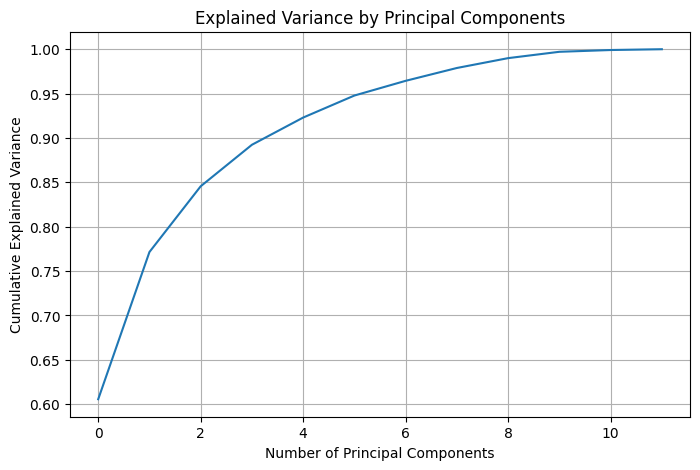

In [ ]:
pca.fit(x_train)
# Extract variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Create DataFrame to view feature importance in each principal component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Plot cumulative variance explained
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratios))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Delhinew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Bengalurunew:")
print(feature_importance)


Top Features by LDA Importance for df_Bengalurunew:
    Feature  LDA Importance
0     PM2.5            4.51
6        CO            1.03
1      PM10            0.87
4       NOx            0.72
2        NO            0.62
3       NO2            0.56
8        O3            0.50
9   Benzene            0.46
10  Toluene            0.43
11   Xylene            0.34
7       SO2            0.21
5       NH3            0.11


In [ ]:
x1=df_Delhinew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y1=df_Delhinew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)

# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)

# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")

# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.1717
Root Mean Squared Error (RMSE): 0.4144
R-squared (R2): 0.8011

Test Set Performance:
Mean Squared Error (MSE): 0.1485
Root Mean Squared Error (RMSE): 0.3853
R-squared (R2): 0.8305


In [ ]:
#XGBOOSTS
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train1, y_train1)

xgb_predictions1 = xgboost_model.predict(x_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)

print("XGBoost Model validation Evaluation For Model3")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")

XGBoost Model validation Evaluation For Model3
MSE: 0.1248
RMSE: 0.3533
R²: 0.8457


In [ ]:
xgb_test_predictions1 = xgboost_model.predict(x_test1)

In [ ]:
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test_predictions1)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test_predictions1)

print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")


XGBoost Test Set Evaluation:
MSE: 0.1187
RMSE: 0.3446
R²: 0.8645


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)


In [ ]:
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)

print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1133
RMSE: 0.3367
R²: 0.8599


In [ ]:
rf_test_predictions1 = rf_model.predict(x_test1)

In [ ]:
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)

print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Test Set Evaluation for Model3
MSE: 0.1066
RMSE: 0.3265
R²: 0.8783


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1205, 12)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.2642 - val_loss: 0.5395
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4906 - val_loss: 0.2713
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3255 - val_loss: 0.2254
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2481 - val_loss: 0.2007
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2306 - val_loss: 0.1646
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1897 - val_loss: 0.1457
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1888 - val_loss: 0.1428
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1884 - val_loss: 0.1351
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1565 - val_loss: 0.1320
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1560 - val_loss: 0.1375
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1749 - val_loss: 0.1302
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1539 - val_loss: 

AHMEDABAD

In [ ]:
df_Ahmedabad=df[df["City"]=="Ahmedabad"]
df_Ahmedabadnew=df_Ahmedabad.drop(["City","Date"],axis=1)
df_Ahmedabadnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0     0.210056  0.255176 -0.779757 -0.504202 -0.625212  0.248973 -0.304207   
1     0.210056  0.255176 -0.777417 -0.650014 -0.661766  0.248973 -0.251115   
2     0.210056  0.255176 -0.008181 -0.441958  0.039651  0.248973  2.398162   
3     0.210056  0.255176 -0.743239 -0.489218 -0.581771  0.248973  0.524024   
4     0.210056  0.255176  0.211869 -0.319776  0.466646  0.248973  2.398162   
...        ...       ...       ...       ...       ...       ...       ...   
2004  0.057203  0.268294 -0.393033  1.693352 -0.481644  0.248973 -0.760796   
2005 -0.818813  0.255176 -0.524594 -0.171659 -0.664945  0.248973 -0.728941   
2006 -0.871001  0.493253 -0.398651 -0.104804 -0.531443  0.248973 -0.569666   
2007 -0.576511  0.327011 -0.490884  1.841470  0.236196  0.248973 -0.505956   
2008 -0.645044  0.255176 -0.615891  0.465188 -0.465221  0.248973 -0.983781   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
0     2.110922  2.375834 -1.029804 -1.130847 -1.825460  7.777662e-17   
1     1.746105  0.019298  0.654182 -0.205477  0.969233  7.777662e-17   
2     2.110922 -0.170786  2.081910  1.635132 -0.289342  7.777662e-17   
3     0.924040  0.133575  0.997386  0.578048 -1.324355  7.777662e-17   
4     2.110922  0.316305  2.178007  2.055601  0.149503  7.777662e-17   
...        ...       ...       ...       ...       ...           ...   
2004  0.075769  1.942204 -0.425766  2.214743 -0.810989 -5.769590e-01   
2005 -0.121471 -0.417443 -0.402885  2.214743 -1.042831 -6.544411e-01   
2006  0.028873  0.071911 -0.393733  2.214743 -1.498237 -7.164267e-01   
2007  0.620594  0.448119 -0.476102  2.214743 -1.034551 -5.304698e-01   
2008  0.346112 -1.359379 -0.238148  2.214743 -0.603986 -3.677575e-01   

      AQI_Bucket  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
2004           3  
2005           3  
2006           3  
2007           3  
2008           1  

[2009 rows x 14 columns]

In [ ]:
corre=df_Ahmedabadnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx  NH3        CO  \
PM2.5       1.000000  0.309546  0.356358  0.209242  0.304444  NaN  0.215561   
PM10        0.309546  1.000000  0.216960  0.126244  0.227943  NaN  0.250325   
NO          0.356358  0.216960  1.000000  0.475829  0.657654  NaN  0.294786   
NO2         0.209242  0.126244  0.475829  1.000000  0.773636  NaN  0.430551   
NOx         0.304444  0.227943  0.657654  0.773636  1.000000  NaN  0.454451   
NH3              NaN       NaN       NaN       NaN       NaN  NaN       NaN   
CO          0.215561  0.250325  0.294786  0.430551  0.454451  NaN  1.000000   
SO2         0.234511  0.033751  0.277450  0.625483  0.476887  NaN  0.496668   
O3          0.174835  0.007278  0.083675  0.432438  0.266788  NaN  0.001727   
Benzene     0.185856 -0.019853  0.174513  0.413267  0.343676  NaN  0.218376   
Toluene     0.040054 -0.037966  0.240470  0.631423  0.422570  NaN  0.298753   
Xylene      0.444310  0.025472  0.227494  0.407969  0.260173  NaN  0.114857   
AQI         0.437900  0.190247  0.753615  0.606212  0.651675  NaN  0.486655   
AQI_Bucket  0.205889  0.096144  0.352262  0.596891  0.548185  NaN  0.578431   

                 SO2        O3   Benzene   Toluene    Xylene       AQI  \
PM2.5       0.234511  0.174835  0.185856  0.040054  0.444310  0.437900   
PM10        0.033751  0.007278 -0.019853 -0.037966  0.025472  0.190247   
NO          0.277450  0.083675  0.174513  0.240470  0.227494  0.753615   
NO2         0.625483  0.432438  0.413267  0.631423  0.407969  0.606212   
NOx         0.476887  0.266788  0.343676  0.422570  0.260173  0.651675   
NH3              NaN       NaN       NaN       NaN       NaN       NaN   
CO          0.496668  0.001727  0.218376  0.298753  0.114857  0.486655   
SO2         1.000000  0.360230  0.418009  0.607859  0.296569  0.487328   
O3          0.360230  1.000000  0.154172  0.283662  0.332249  0.183092   
Benzene     0.418009  0.154172  1.000000  0.703460  0.553913  0.309636   
Toluene     0.607859  0.283662  0.703460  1.000000  0.411833  0.431470   
Xylene      0.296569  0.332249  0.553913  0.411833  1.000000  0.330009   
AQI         0.487328  0.183092  0.309636  0.431470  0.330009  1.000000   
AQI_Bucket  0.594001  0.166821  0.377238  0.555346  0.217320  0.633334   

            AQI_Bucket  
PM2.5         0.205889  
PM10          0.096144  
NO            0.352262  
NO2           0.596891  
NOx           0.548185  
NH3                NaN  
CO            0.578431  
SO2           0.594001  
O3            0.166821  
Benzene       0.377238  
Toluene       0.555346  
Xylene        0.217320  
AQI           0.633334  
AQI_Bucket    1.000000

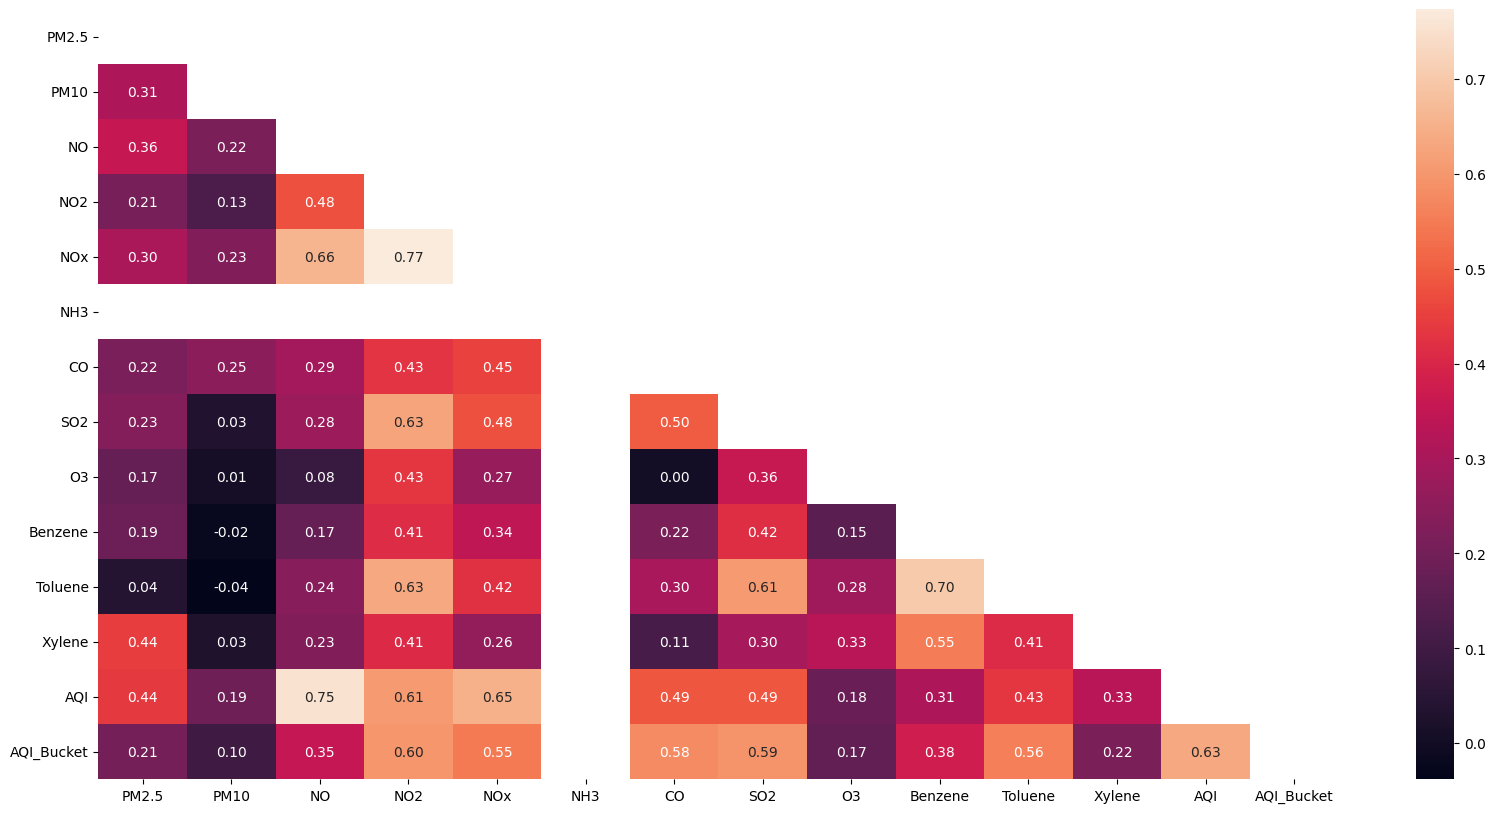

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Ahmedabadnew, col))
df_Ahmedabadnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Ahmedabadnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Ahmedabadnew[columns_to_scale] = scaler.fit_transform(df_Ahmedabadnew[columns_to_scale])

Explained variance ratio by each principal component:
 [4.52610489e-01 1.45778794e-01 1.18456989e-01 9.75919850e-02
 5.81948212e-02 4.04819659e-02 3.19325126e-02 2.83727075e-02
 2.07686142e-02 5.81112267e-03 8.90161002e-18 5.04279216e-18]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   1.567495e-01  1.110223e-16  2.854719e-01  4.074127e-01  3.329771e-01   
PC2   6.314509e-01 -5.551115e-17 -1.521771e-01 -6.578673e-02 -1.135081e-01   
PC3   2.590705e-02 -1.994932e-17  6.042602e-01  1.769961e-01  4.989105e-01   
PC4  -1.160792e-01 -1.023487e-16 -1.254285e-01  2.103985e-01  1.391091e-02   
PC5   6.828885e-01 -0.000000e+00  6.947490e-03 -1.311432e-01  1.828534e-01   
PC6  -3.492142e-02 -4.336809e-16  1.261329e-01  1.319064e-01 -5.312387e-02   
PC7  -4.095119e-02 -3.955170e-16 -4.984929e-01 -1.413800e-01  6.271986e-01   
PC8   1.648612e-01  3.608225e-16  4.187472e-01 -3.905915e-01 -2.945380e-01   
PC9   2.

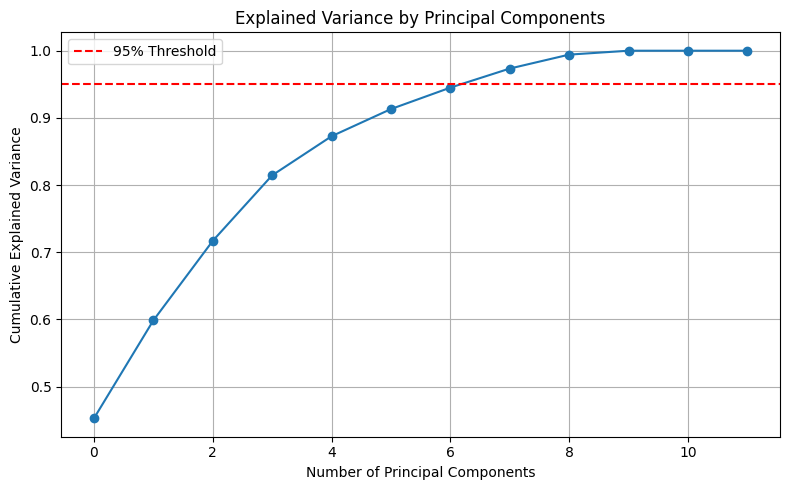

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Ahmedabadnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Ahmedabadnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# Assume df_Ahmedabadnew is already loaded and preprocessed
# (e.g., outlier capping, log transformation already applied to features within df_Ahmedabadnew)
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Ahmedabadnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
if y.nunique() < 2:
    print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
# This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for Ahmedabad:")
print(feature_importance)


Top Features by LDA Importance for Ahmedabad:
    Feature  LDA Importance
6        CO            4.55
2        NO            1.89
10  Toluene            1.64
3       NO2            1.30
0     PM2.5            1.03
9   Benzene            0.78
7       SO2            0.65
11   Xylene            0.59
4       NOx            0.36
8        O3            0.22
1      PM10            0.00
5       NH3            0.00


In [ ]:
x1=df_Ahmedabadnew[['CO', 'NO', 'Toluene', 'NO2', 'PM2.5', 'Benzene', 'SO2', 'Xylene', 'NOx', 'O3']]
y1=df_Ahmedabadnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3034
Root Mean Squared Error (RMSE): 0.5508
R-squared (R2): 0.7338

Test Set Performance:
Mean Squared Error (MSE): 0.1196
Root Mean Squared Error (RMSE): 0.3459
R-squared (R2): 0.8087


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2033
RMSE: 0.4509
R²: 0.7803

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1195
RMSE: 0.3457
R²: 0.8090


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.1728
RMSE: 0.4157
R²: 0.8133

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1464
RMSE: 0.3826
R²: 0.7660


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1796
RMSE: 0.4238
R²: 0.8059

Random Forest Test Set Evaluation for Model3
MSE: 0.1258
RMSE: 0.3546
R²: 0.7989


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")


Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1716
RMSE: 0.4142
R²: 0.8146

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1416
RMSE: 0.3763
R²: 0.7736


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1532
RMSE: 0.3914
R²: 0.8345
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1122
RMSE: 0.3350
R²: 0.8206


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (694, 10)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 1.1291 - val_loss: 0.3415
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4704 - val_loss: 0.1817
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2444 - val_loss: 0.1795
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2223 - val_loss: 0.1668
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2289 - val_loss: 0.1595
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2734 - val_loss: 0.1656
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2297 - val_loss: 0.1632
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2032 - val_loss: 0.1672
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2347 - val_loss: 0.1675
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2608 - val_loss: 0.1730
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2077 - val_loss: 0.1686
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2563 - val_loss: 0.17

AIZWAL

In [ ]:
df_Aizawl=df[df["City"]=="Aizawl"]
df_Aizawlnew=df_Aizawl.drop(["City","Date"],axis=1)
df_Aizawlnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
2009 -0.786697 -1.441490 -0.495566 -1.390025 -0.901753  0.547585 -0.643994   
2010 -0.829136 -1.664999 -0.485734 -1.481085 -0.969564  0.452038 -0.686468   
2011 -0.623251 -1.471211 -0.486202 -1.501833 -0.984397  0.785981 -0.675849   
2012 -0.484465 -1.370933 -0.488543 -1.492612 -0.978570  0.766115 -0.675849   
2013 -0.754295 -1.607732 -0.490884 -1.533532 -1.018302  0.715030 -0.771414   
...        ...       ...       ...       ...       ...       ...       ...   
2117 -1.719490 -2.089380 -0.275517 -1.550245 -0.717392  0.148367 -1.259858   
2118 -1.717196 -2.089380 -0.281604 -1.551398 -0.731696  0.435010 -1.259858   
2119 -1.716049 -2.089380 -0.259130 -1.546787 -0.688255  0.745302 -1.153675   
2120 -1.669882 -2.089380 -0.265217 -1.548516 -0.699380  0.740572 -1.164293   
2121 -1.595328 -2.089380 -0.287222 -1.550245 -0.733286 -0.136383 -1.259858   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
2009 -1.015259 -1.654123 -1.016076 -1.083565  0.389732  7.777662e-17   
2010 -1.058018 -1.748599 -1.025228 -1.120715  0.389732 -8.868872e-01   
2011 -1.024915 -1.897385 -1.029804 -1.134224  0.389732 -8.249016e-01   
2012 -1.015259 -1.884373 -1.029804 -1.134224  0.389732 -8.094052e-01   
2013 -1.001466 -1.890596 -1.029804 -1.134224  0.389732 -7.474195e-01   
...        ...       ...       ...       ...       ...           ...   
2117 -1.491119 -1.834589  0.471525  0.335050  0.389732 -1.142578e+00   
2118 -1.449740 -1.828366  0.471525  0.335050  0.389732 -1.142578e+00   
2119 -1.360085 -1.853824  0.471525  0.335050  0.389732 -1.134830e+00   
2120 -1.332499 -1.841944  0.471525  0.335050  0.389732 -1.134830e+00   
2121 -1.354568 -1.715787  0.471525  0.335050  0.389732 -1.134830e+00   

      AQI_Bucket  
2009           1  
2010           3  
2011           3  
2012           3  
2013           3  
...          ...  
2117           0  
2118           0  
2119           0  
2120           0  
2121           0  

[113 rows x 14 columns]

In [ ]:
corre=df_Aizawlnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.635033 -0.701447  0.252132 -0.696119  0.404480   
PM10        0.635033  1.000000 -0.643285  0.177608 -0.635203  0.357405   
NO         -0.701447 -0.643285  1.000000 -0.170368  0.995281 -0.371059   
NO2         0.252132  0.177608 -0.170368  1.000000 -0.116687  0.089988   
NOx        -0.696119 -0.635203  0.995281 -0.116687  1.000000 -0.366130   
NH3         0.404480  0.357405 -0.371059  0.089988 -0.366130  1.000000   
CO          0.695745  0.545335 -0.596501  0.576646 -0.556353  0.387197   
SO2        -0.085987 -0.086061  0.195982 -0.105376  0.187370 -0.392657   
O3         -0.054016  0.192226 -0.087453 -0.053519 -0.093691  0.015240   
Benzene    -0.306295 -0.296243  0.369562 -0.188170  0.355709 -0.190927   
Toluene    -0.278261 -0.239246  0.350173 -0.200272  0.333001 -0.129860   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.804775  0.568044 -0.604357  0.378759 -0.577991  0.383324   
AQI_Bucket  0.757276  0.674996 -0.761902  0.223686 -0.750364  0.421415   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.695745 -0.085987 -0.054016 -0.306295 -0.278261     NaN   
PM10        0.545335 -0.086061  0.192226 -0.296243 -0.239246     NaN   
NO         -0.596501  0.195982 -0.087453  0.369562  0.350173     NaN   
NO2         0.576646 -0.105376 -0.053519 -0.188170 -0.200272     NaN   
NOx        -0.556353  0.187370 -0.093691  0.355709  0.333001     NaN   
NH3         0.387197 -0.392657  0.015240 -0.190927 -0.129860     NaN   
CO          1.000000  0.071520  0.028143 -0.307655 -0.335716     NaN   
SO2         0.071520  1.000000  0.221940  0.084624  0.045710     NaN   
O3          0.028143  0.221940  1.000000 -0.030619 -0.014642     NaN   
Benzene    -0.307655  0.084624 -0.030619  1.000000  0.908267     NaN   
Toluene    -0.335716  0.045710 -0.014642  0.908267  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.625711 -0.084249 -0.043345 -0.349446 -0.339801     NaN   
AQI_Bucket  0.688469 -0.197655  0.013634 -0.343182 -0.288701     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.804775    0.757276  
PM10        0.568044    0.674996  
NO         -0.604357   -0.761902  
NO2         0.378759    0.223686  
NOx        -0.577991   -0.750364  
NH3         0.383324    0.421415  
CO          0.625711    0.688469  
SO2        -0.084249   -0.197655  
O3         -0.043345    0.013634  
Benzene    -0.349446   -0.343182  
Toluene    -0.339801   -0.288701  
Xylene           NaN         NaN  
AQI         1.000000    0.683602  
AQI_Bucket  0.683602    1.000000

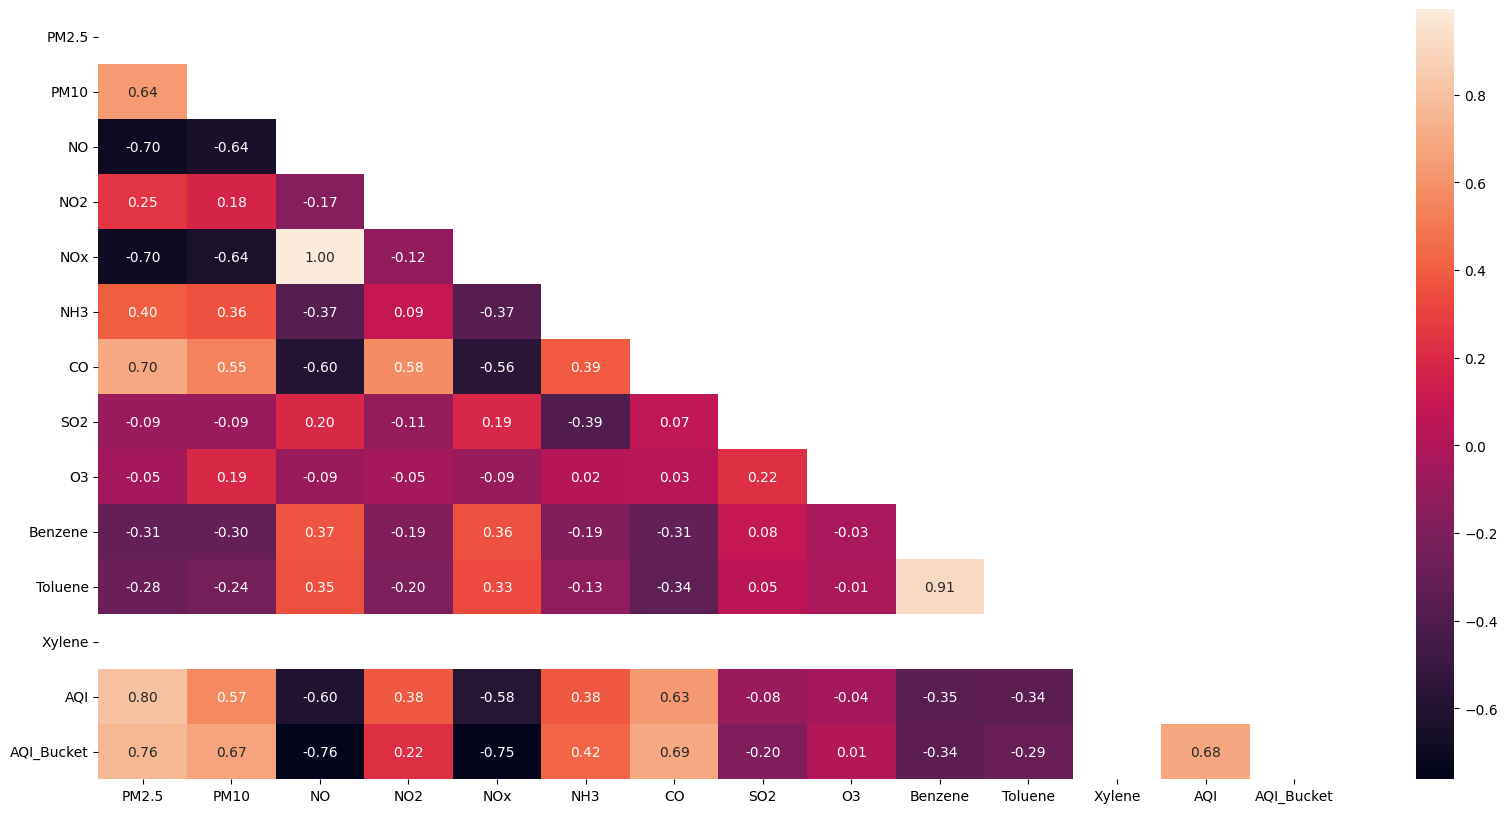

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Aizawlnew, col))

df_Aizawlnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Aizawlnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Aizawlnew[columns_to_scale] = scaler.fit_transform(df_Aizawlnew[columns_to_scale])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# (e.g., outlier capping, log transformation already applied to features within df_Aizawlnew)
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Aizawlnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
if y.nunique() < 2:
    print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Aizawlnew:")
print(feature_importance)


Top Features by LDA Importance for df_Aizawlnew:
    Feature  LDA Importance
4       NOx           45.29
2        NO           36.95
1      PM10            9.68
8        O3            4.98
6        CO            4.96
0     PM2.5            2.62
10  Toluene            2.29
3       NO2            1.89
7       SO2            1.63
9   Benzene            1.50
5       NH3            0.10
11   Xylene            0.00


In [ ]:
df_Aizawlnew.isna().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Explained variance ratio by each principal component:
 [4.47925289e-01 1.78898487e-01 1.36816303e-01 8.52109058e-02
 5.38376115e-02 3.85673179e-02 3.29870233e-02 1.21738769e-02
 8.02868047e-03 5.48035455e-03 7.41506138e-05 0.00000000e+00]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1  -0.340323 -0.406443  0.413704 -0.048967  0.410970 -0.184797 -0.336382   
PC2   0.030951 -0.132753  0.173158  0.412542  0.191537 -0.325372  0.223249   
PC3   0.255048  0.081077  0.024853  0.431791  0.034700 -0.052353  0.353466   
PC4   0.019282  0.056512  0.234576  0.406781  0.256788  0.709818  0.148709   
PC5  -0.358639 -0.089510 -0.106196  0.586956 -0.085059 -0.255706 -0.190609   
PC6   0.531206  0.254720  0.060881  0.113704  0.045122 -0.474323 -0.115017   
PC7   0.587570 -0.241121  0.219806  0.016110  0.162167  0.170368 -0.472027   
PC8  -0.243182  0.764092  0.266350 -0.022153  0.267231 -0.049330 -0.176809   
PC9  -0.

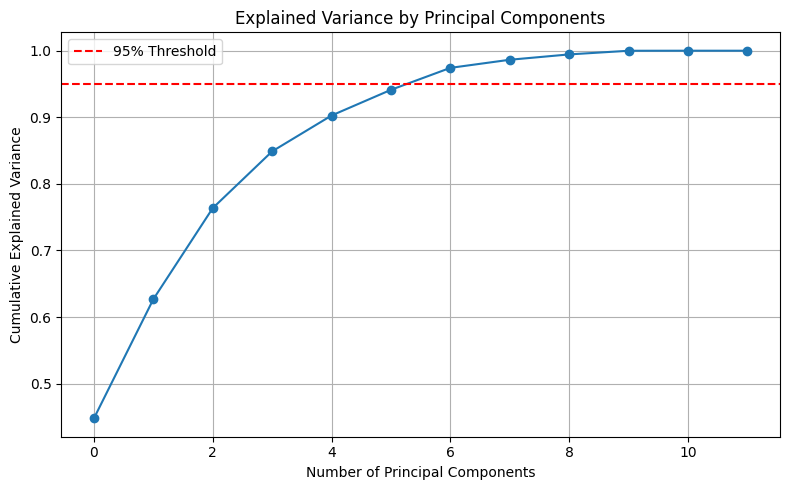

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Aizawlnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Aizawlnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
x1=df_Aizawlnew[['NOx', 'NO', 'PM10', 'O3', 'CO',
                     'PM2.5', 'Toluene', 'NO2', 'SO2', 'Benzene']]
y1=df_Aizawlnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)PM2.5, NOx, NO, PM10, NO2, CO
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2084
Root Mean Squared Error (RMSE): 0.4566
R-squared (R2): 0.8200

Test Set Performance:
Mean Squared Error (MSE): 0.5027
Root Mean Squared Error (RMSE): 0.7090
R-squared (R2): 0.5089


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.1485
RMSE: 0.3853
R²: 0.6814

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2217
RMSE: 0.4709
R²: 0.7834


In [ ]:
#XGBOOSTS
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train1, y_train1)
xgb_predictions1 = xgboost_model.predict(x_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)
print("XGBoost Model validation Evaluation For Model3")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")
xgb_test_predictions1 = xgboost_model.predict(x_test1)
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test_predictions1)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test_predictions1)
print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")

XGBoost Model validation Evaluation For Model3
MSE: 0.0237
RMSE: 0.1540
R²: 0.9491

XGBoost Test Set Evaluation:
MSE: 0.0647
RMSE: 0.2543
R²: 0.9368


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0767
RMSE: 0.2770
R²: 0.8354

Random Forest Test Set Evaluation for Model3
MSE: 0.0669
RMSE: 0.2587
R²: 0.9346


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0833
RMSE: 0.2886
R²: 0.8213

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1102
RMSE: 0.3320
R²: 0.8923


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.0328
RMSE: 0.1811
R²: 0.9296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.0899
RMSE: 0.2998
R²: 0.9122


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (55, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - loss: 1.0882 - val_loss: 0.4804
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.4463 - val_loss: 0.4588
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.3306 - val_loss: 0.4366
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2943 - val_loss: 0.4137
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9585 - val_loss: 0.3886
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7548 - val_loss: 0.3617
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8361 - val_loss: 0.3342
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.1688 - val_loss: 0.3055
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7795 - val_loss: 0.2768
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6242 - val_loss: 0.2502
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.0059 - val_loss: 0.2282
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6270 - val_loss: 0.2115


AMARAVATI

In [ ]:
df_Amaravati=df[df["City"]=="Amaravati"]
df_Amaravatinew=df_Amaravati.drop(["City","Date"],axis=1)
df_Amaravatinew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
2122  0.322158  0.197738 -0.740898 -0.364154 -0.876854 -0.819406 -1.174912   
2123  0.610054  0.409165 -0.755412 -0.372799 -0.893806 -0.958470 -1.153675   
2124  0.521735  0.519349 -0.763839 -0.055816 -0.747060 -1.000095 -1.132438   
2125  0.821100  0.670610 -0.513826  0.223705 -0.380458 -0.751293 -1.164293   
2126  0.116273 -0.084005 -0.702974  0.063485 -0.632629 -0.892249 -1.185530   
...        ...       ...       ...       ...       ...       ...       ...   
3068 -1.308293 -2.008840 -0.751198 -1.177935 -1.283718 -1.124023 -0.697086   
3069 -1.246642 -1.910255 -0.755880 -1.074771 -1.237628 -1.048341 -0.580284   
3070 -1.123053 -1.812394 -0.745580 -1.003882 -1.193127 -0.619797 -0.580284   
3071 -1.112157 -1.749570 -0.741366 -0.938181 -1.157632 -0.706830 -0.580284   
3072 -1.093231 -1.777599 -0.752602 -0.996390 -1.194716 -1.173215 -0.654613   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
2122 -0.155954  2.375834 -0.952011 -0.134554 -1.825460  7.777662e-17   
2123  0.461974  2.375834 -0.938283 -0.036613 -1.825460  1.358758e-01   
2124  2.078517  2.375834 -0.929131  0.208238 -1.825460  2.366024e-01   
2125  2.110922  2.375834 -0.897099  0.154202 -1.825460  2.443506e-01   
2126  0.980592  2.375834 -0.952011 -0.286531 -1.825460  1.668686e-01   
...        ...       ...       ...       ...       ...           ...   
3068  0.256458  0.002326 -1.002348 -1.088631 -1.825460 -9.643693e-01   
3069 -0.142161  0.204857 -0.984044 -1.061613 -1.825460 -9.101318e-01   
3070  0.399905  0.541464 -0.974892 -1.017708 -1.825460 -8.558944e-01   
3071  0.370940  0.656307 -0.965739 -0.894438 -1.825460 -8.171534e-01   
3072 -0.139402 -0.258474 -0.984044 -1.049792  0.389732 -8.713908e-01   

      AQI_Bucket  
2122           1  
2123           1  
2124           1  
2125           1  
2126           1  
...          ...  
3068           0  
3069           0  
3070           3  
3071           3  
3072           3  

[951 rows x 14 columns]

In [ ]:
corre=df_Amaravatinew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.917367  0.367381  0.724154  0.702597  0.462291   
PM10        0.917367  1.000000  0.412670  0.747453  0.728781  0.422019   
NO          0.367381  0.412670  1.000000  0.460557  0.707016  0.374223   
NO2         0.724154  0.747453  0.460557  1.000000  0.936924  0.255762   
NOx         0.702597  0.728781  0.707016  0.936924  1.000000  0.299241   
NH3         0.462291  0.422019  0.374223  0.255762  0.299241  1.000000   
CO          0.193213  0.182919  0.445548  0.136836  0.295545  0.236845   
SO2         0.280633  0.263661  0.022520  0.285012  0.224473 -0.006607   
O3          0.378695  0.379575 -0.145370  0.123746  0.026865  0.138376   
Benzene     0.102114  0.098228  0.295858 -0.058574  0.072121  0.226501   
Toluene     0.311884  0.288745  0.269423  0.054823  0.128957  0.322437   
Xylene     -0.121376 -0.121965  0.159324 -0.122592 -0.022670  0.092790   
AQI         0.842149  0.833418  0.411094  0.692143  0.694646  0.393505   
AQI_Bucket -0.012144 -0.017183 -0.063201 -0.034108 -0.038195 -0.004498   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.193213  0.280633  0.378695  0.102114  0.311884 -0.121376   
PM10        0.182919  0.263661  0.379575  0.098228  0.288745 -0.121965   
NO          0.445548  0.022520 -0.145370  0.295858  0.269423  0.159324   
NO2         0.136836  0.285012  0.123746 -0.058574  0.054823 -0.122592   
NOx         0.295545  0.224473  0.026865  0.072121  0.128957 -0.022670   
NH3         0.236845 -0.006607  0.138376  0.226501  0.322437  0.092790   
CO          1.000000  0.048343 -0.211705  0.300393  0.153066  0.363005   
SO2         0.048343  1.000000  0.132026 -0.139521 -0.026382 -0.266063   
O3         -0.211705  0.132026  1.000000  0.192647  0.344285 -0.083003   
Benzene     0.300393 -0.139521  0.192647  1.000000  0.644313  0.417322   
Toluene     0.153066 -0.026382  0.344285  0.644313  1.000000  0.142410   
Xylene      0.363005 -0.266063 -0.083003  0.417322  0.142410  1.000000   
AQI         0.209030  0.185409  0.389904  0.159843  0.271196  0.008952   
AQI_Bucket -0.063737 -0.108414 -0.004924 -0.034703 -0.061266 -0.114708   

                 AQI  AQI_Bucket  
PM2.5       0.842149   -0.012144  
PM10        0.833418   -0.017183  
NO          0.411094   -0.063201  
NO2         0.692143   -0.034108  
NOx         0.694646   -0.038195  
NH3         0.393505   -0.004498  
CO          0.209030   -0.063737  
SO2         0.185409   -0.108414  
O3          0.389904   -0.004924  
Benzene     0.159843   -0.034703  
Toluene     0.271196   -0.061266  
Xylene      0.008952   -0.114708  
AQI         1.000000   -0.036633  
AQI_Bucket -0.036633    1.000000

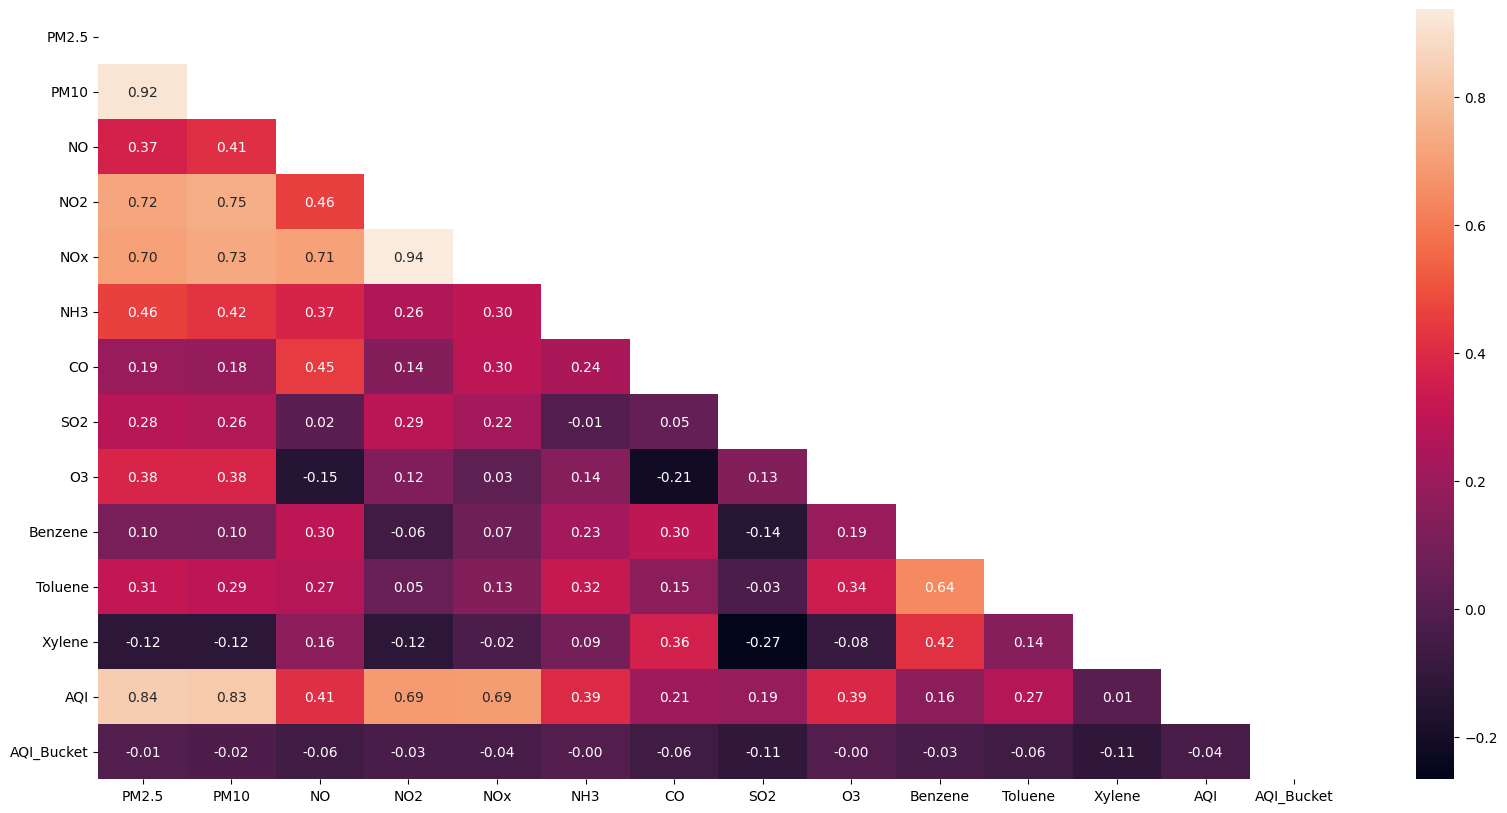

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Amaravatinew[columns_to_scale] = scaler.fit_transform(df_Amaravatinew[columns_to_scale])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df_Amaravatinew[features]
y = df_Amaravatinew["AQI_Bucket"]
# 2. Drop rows with any NaN (especially NH3)
df_clean = df_Amaravatinew.dropna(subset=features + ["AQI_Bucket"])
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# 3. Split dataset
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Standardize features
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# 5. Fit LDA model
lda = LDA()
lda.fit(x_train, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features,
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("Top Features by LDA Importance:")
print(feature_importance)

Top Features by LDA Importance:
    Feature  LDA Importance
4       NOx            5.43
3       NO2            4.42
0     PM2.5            3.56
1      PM10            1.97
2        NO            1.57
10  Toluene            0.67
6        CO            0.66
8        O3            0.65
7       SO2            0.35
5       NH3            0.35
11   Xylene            0.34
9   Benzene            0.25


Explained variance ratio by each principal component:
 [0.36413151 0.20071669 0.13330557 0.06826384 0.06195924 0.05334893
 0.03727629 0.02998536 0.02662506 0.01726379 0.00623417 0.00088954]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.408540  0.405811  0.333201  0.371756  0.413444  0.273376  0.239050   
PC2  -0.179024 -0.174331  0.162260 -0.287179 -0.161364  0.113279  0.264250   
PC3   0.151841  0.124055 -0.310052 -0.123348 -0.227635  0.059558 -0.374733   
PC4  -0.071961 -0.118835 -0.002766 -0.229372 -0.198503  0.190333  0.390901   
PC5   0.085684  0.050057  0.033387 -0.222571 -0.200682  0.810829  0.008085   
PC6   0.221573  0.169437 -0.390625 -0.040483 -0.137187  0.055252  0.337760   
PC7   0.141067  0.146454 -0.076095 -0.159862 -0.097328 -0.382267  0.622141   
PC8  -0.313926 -0.237851  0.555134 -0.064123  0.110279  0.015250  0.105030   
PC9  -0.008574 -0.002475 -0.146805  0.074715  0.035623  0

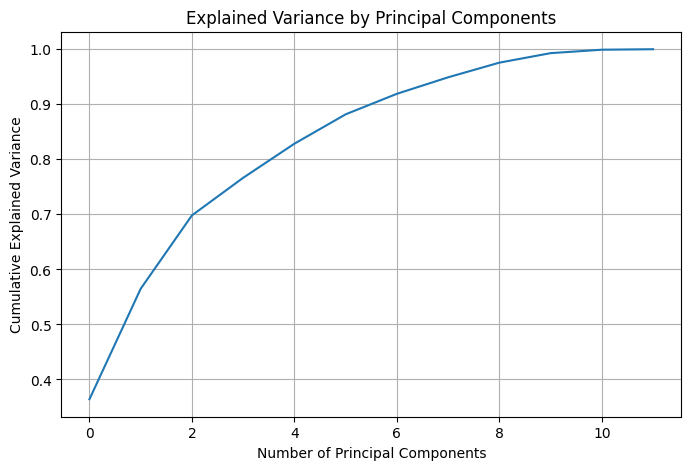

In [ ]:
#MODEL BUILDING 1 FOR Amaravati
x=df_Amaravatinew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df_Amaravatinew["AQI"]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train, x_temp, y_train, y_temp= train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

pca.fit(x_train)
# Extract variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Create DataFrame to view feature importance in each principal component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Plot cumulative variance explained
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratios))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

In [ ]:
x1=df_Amaravatinew[['NOx', 'NO2', 'NO', 'PM2.5', 'PM10', 'NH3', 'CO','O3','SO2','Toluene','Xylene','Benzene']]
y1=df_Amaravatinew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2414
Root Mean Squared Error (RMSE): 0.4914
R-squared (R2): 0.7612

Test Set Performance:
Mean Squared Error (MSE): 0.2109
Root Mean Squared Error (RMSE): 0.4592
R-squared (R2): 0.7789


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2153
RMSE: 0.4640
R²: 0.7866

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2111
RMSE: 0.4595
R²: 0.7786


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.1814
RMSE: 0.4259
R²: 0.8202

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1753
RMSE: 0.4187
R²: 0.8162


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1641
RMSE: 0.4051
R²: 0.8374

Random Forest Test Set Evaluation for Model3
MSE: 0.1973
RMSE: 0.4441
R²: 0.7932


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1632
RMSE: 0.4040
R²: 0.8382

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1791
RMSE: 0.4232
R²: 0.8122


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1867
RMSE: 0.4320
R²: 0.8150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.1803
RMSE: 0.4246
R²: 0.8109


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (570, 12)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.0066 - val_loss: 0.8601
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9030 - val_loss: 0.6388
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5654 - val_loss: 0.3877
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4021 - val_loss: 0.2858
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3396 - val_loss: 0.2462
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2495 - val_loss: 0.2326
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2321 - val_loss: 0.2274
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2596 - val_loss: 0.2238
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2300 - val_loss: 0.2185
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2383 - val_loss: 0.2156
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2031 - val_loss: 0.2132
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2154 - val_l

AMRITSAR

In [ ]:
df_Amritsar=df[df["City"]=="Amritsar"]
df_Amritsarnew=df_Amritsar.drop(["City","Date"],axis=1)
df_Amritsarnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
3073 -1.339261 -2.089380 -0.117737 -1.043649  0.177875 -1.821235 -0.421009   
3074 -1.367076 -2.089380 -0.006308 -1.090332  0.177875 -1.808937 -0.569666   
3075 -1.164345 -2.070456 -0.131315 -1.207328  0.177875 -1.832587 -0.824506   
3076  0.504243 -0.659571 -0.331700 -1.330663  0.177875 -1.850562 -0.898835   
3077 -1.159183 -1.799829 -0.358855 -1.373888  0.177875 -1.863806 -0.888216   
...        ...       ...       ...       ...       ...       ...       ...   
4289 -0.258794  0.255176  0.359348 -0.355509  0.360162 -0.641555 -0.580284   
4290 -0.426828 -1.632620  0.259156 -0.522645 -0.078488 -0.719128 -0.612139   
4291 -0.956452 -1.132685  0.440813 -0.411413  0.269042 -0.559252 -0.569666   
4292 -0.530058 -0.750907  0.208591 -0.633877  0.087330 -0.715344 -0.548429   
4293 -0.070400 -0.158910  0.713300 -0.683442  0.066139 -0.295314 -0.654613   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
3073 -0.122851 -1.174386  0.471525  0.335050  0.389732  7.777662e-17   
3074  0.575077 -1.235485  0.471525  0.335050  0.389732 -8.868872e-01   
3075  1.979207 -1.255285  0.471525  0.335050  0.389732 -1.049600e+00   
3076  1.442658 -0.850790  0.471525  0.335050  0.389732 -4.684842e-01   
3077  0.330940 -0.650523  0.471525  0.335050  0.389732 -5.304698e-01   
...        ...       ...       ...       ...       ...           ...   
4289 -1.012501 -0.975250 -0.434918 -0.948474  1.718847 -7.164267e-01   
4290 -0.920088 -0.975250 -0.498982 -0.968738  1.718847 -6.311965e-01   
4291 -0.965605 -0.975250 -0.434918 -0.948474  1.718847 -9.101318e-01   
4292 -0.995949 -0.975250 -0.434918 -0.948474  1.718847 -7.784124e-01   
4293 -1.160086 -0.975250 -0.434918 -0.948474  1.718847 -6.854339e-01   

      AQI_Bucket  
3073           1  
3074           3  
3075           0  
3076           1  
3077           3  
...          ...  
4289           3  
4290           3  
4291           0  
4292           3  
4293           3  

[1221 rows x 14 columns]

In [ ]:
corre=df_Amritsarnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.670651  0.209523  0.257358  0.309288  0.146968   
PM10        0.670651  1.000000  0.219029  0.295186  0.428106  0.155656   
NO          0.209523  0.219029  1.000000  0.487151  0.642236  0.198669   
NO2         0.257358  0.295186  0.487151  1.000000  0.806919  0.300379   
NOx         0.309288  0.428106  0.642236  0.806919  1.000000  0.228331   
NH3         0.146968  0.155656  0.198669  0.300379  0.228331  1.000000   
CO          0.267312  0.215714  0.128791  0.139183  0.094150 -0.037424   
SO2         0.015896 -0.024845  0.055124 -0.017172 -0.039043  0.132156   
O3          0.019049 -0.010301 -0.017770 -0.147129 -0.206114 -0.049000   
Benzene     0.252843  0.267882  0.274857  0.421481  0.524646  0.023851   
Toluene     0.393402  0.313015  0.164586  0.283191  0.335822  0.194132   
Xylene      0.130271  0.158011  0.144442  0.238641  0.311736 -0.056132   
AQI         0.757865  0.690758  0.233121  0.250358  0.333258  0.152702   
AQI_Bucket  0.120409 -0.101367  0.086494 -0.044925  0.003650  0.046119   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.267312  0.015896  0.019049  0.252843  0.393402  0.130271   
PM10        0.215714 -0.024845 -0.010301  0.267882  0.313015  0.158011   
NO          0.128791  0.055124 -0.017770  0.274857  0.164586  0.144442   
NO2         0.139183 -0.017172 -0.147129  0.421481  0.283191  0.238641   
NOx         0.094150 -0.039043 -0.206114  0.524646  0.335822  0.311736   
NH3        -0.037424  0.132156 -0.049000  0.023851  0.194132 -0.056132   
CO          1.000000  0.113385  0.341676 -0.138775  0.224324  0.153953   
SO2         0.113385  1.000000  0.100527 -0.048506 -0.192295 -0.046178   
O3          0.341676  0.100527  1.000000 -0.301862 -0.041765 -0.039321   
Benzene    -0.138775 -0.048506 -0.301862  1.000000  0.268911  0.346410   
Toluene     0.224324 -0.192295 -0.041765  0.268911  1.000000  0.064330   
Xylene      0.153953 -0.046178 -0.039321  0.346410  0.064330  1.000000   
AQI         0.342233 -0.001196  0.012864  0.149682  0.336386  0.088586   
AQI_Bucket  0.056696  0.026554 -0.064605 -0.047581  0.083256 -0.009905   

                 AQI  AQI_Bucket  
PM2.5       0.757865    0.120409  
PM10        0.690758   -0.101367  
NO          0.233121    0.086494  
NO2         0.250358   -0.044925  
NOx         0.333258    0.003650  
NH3         0.152702    0.046119  
CO          0.342233    0.056696  
SO2        -0.001196    0.026554  
O3          0.012864   -0.064605  
Benzene     0.149682   -0.047581  
Toluene     0.336386    0.083256  
Xylene      0.088586   -0.009905  
AQI         1.000000    0.163765  
AQI_Bucket  0.163765    1.000000

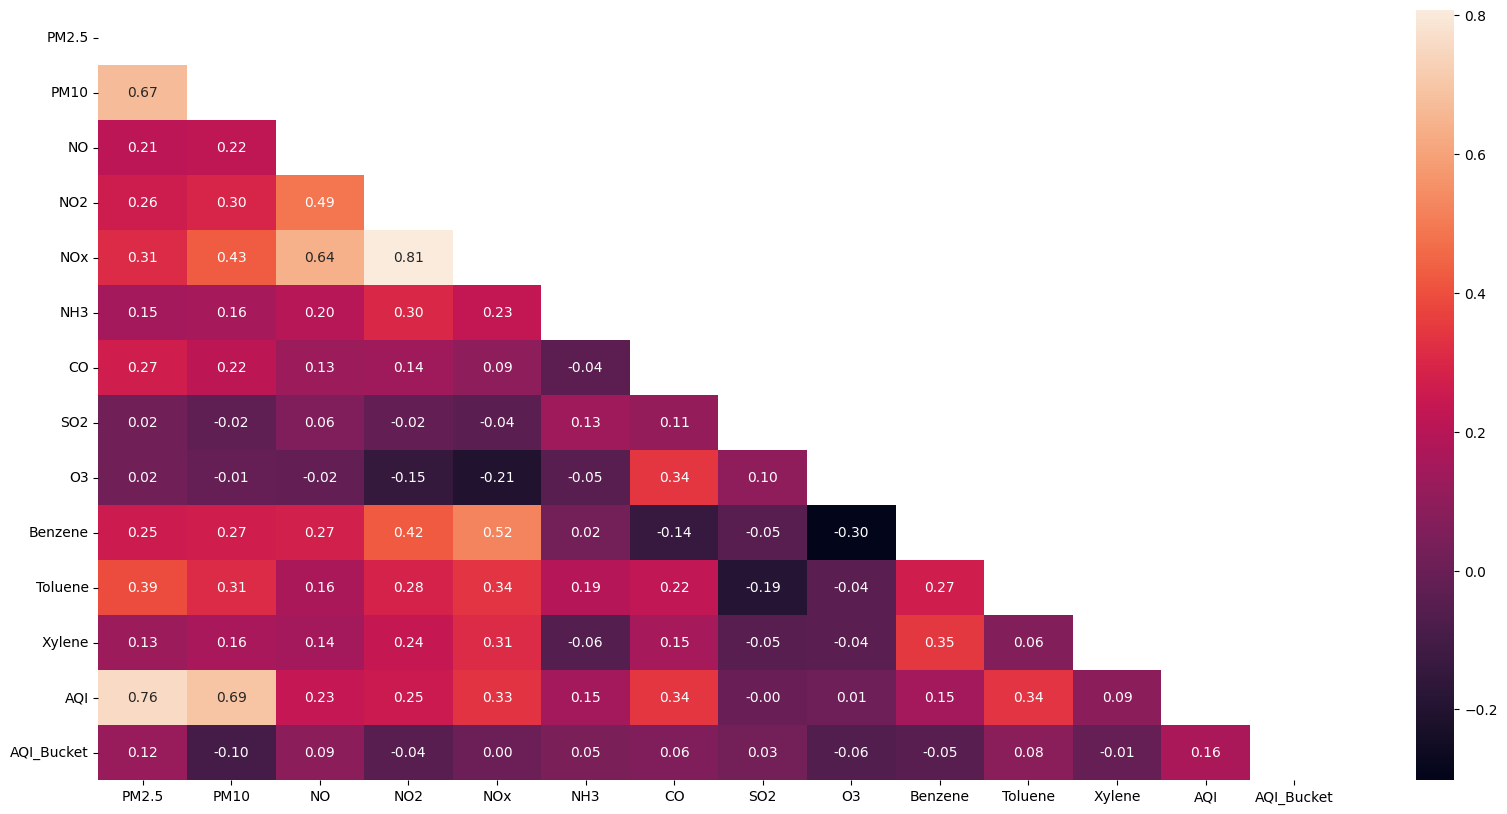

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [0.29852561 0.13390487 0.10749117 0.09716679 0.08130863 0.06362656
 0.06016646 0.05275202 0.03667626 0.03098299 0.02615221 0.01124643]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.313684  0.332483  0.349528  0.419463  0.465380  0.185794  0.103732   
PC2   0.340575  0.294021 -0.031299 -0.126830 -0.132515  0.003648  0.586224   
PC3  -0.358811 -0.316087  0.378268  0.272902  0.192056  0.258735  0.090530   
PC4  -0.140100 -0.078567  0.013416 -0.021662  0.065675 -0.611719  0.198337   
PC5   0.284945  0.286478 -0.214642 -0.179129 -0.107088  0.027371 -0.231884   
PC6  -0.178843 -0.242846 -0.363706 -0.060147 -0.145727  0.510036  0.047136   
PC7  -0.088073 -0.297060  0.047988 -0.012634 -0.005970 -0.382013  0.342834   
PC8   0.014090 -0.023490  0.110462 -0.075815  0.008420 -0.149810 -0.459162   
PC9   0.176419 -0.124044  0.683433 -0.533299 -0.186940  0

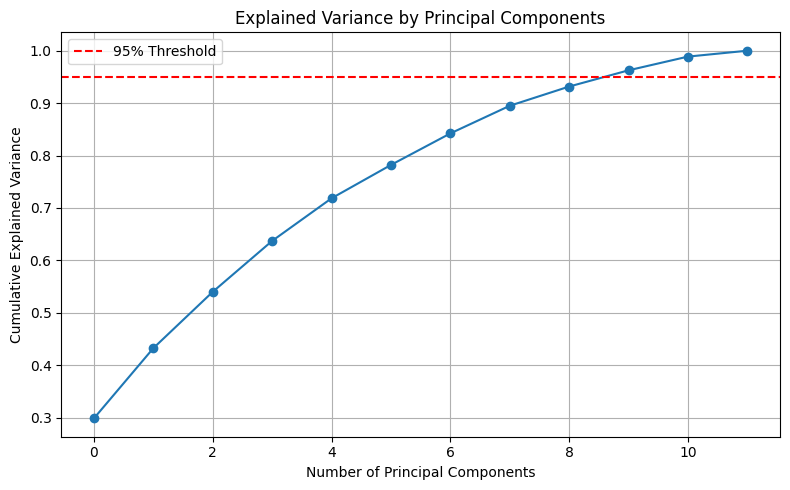

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Amritsarnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Amritsarnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Amritsarnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
if y.nunique() < 2:
    print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
# This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Amritsarnew:")
print(feature_importance)


Top Features by LDA Importance for df_Amritsarnew:
    Feature  LDA Importance
0     PM2.5            2.87
1      PM10            1.92
4       NOx            0.69
3       NO2            0.64
6        CO            0.64
9   Benzene            0.44
8        O3            0.36
2        NO            0.31
11   Xylene            0.31
10  Toluene            0.30
5       NH3            0.22
7       SO2            0.13


In [ ]:
x1=df_Amritsarnew[["PM2.5", "PM10", "NO", "NO2", "NOx",  "CO",  "O3", "Benzene"]]
y1=df_Amritsarnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.1462
Root Mean Squared Error (RMSE): 0.3823
R-squared (R2): 0.6274

Test Set Performance:
Mean Squared Error (MSE): 0.0664
Root Mean Squared Error (RMSE): 0.2576
R-squared (R2): 0.7423


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")


Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.0711
RMSE: 0.2666
R²: 0.7160

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.0652
RMSE: 0.2553
R²: 0.7470


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.0722
RMSE: 0.2687
R²: 0.7117

XGBoost Test Set Evaluation (Tuned):
MSE: 0.0682
RMSE: 0.2611
R²: 0.7354


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0656
RMSE: 0.2562
R²: 0.7378

Random Forest Test Set Evaluation for Model3
MSE: 0.0638
RMSE: 0.2526
R²: 0.7523


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")


Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0561
RMSE: 0.2368
R²: 0.7759

Random Forest Test Set Evaluation (Tuned):
MSE: 0.0526
RMSE: 0.2294
R²: 0.7957


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.0528
RMSE: 0.2299
R²: 0.7889
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.0613
RMSE: 0.2476
R²: 0.7620


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (732, 8)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.4556 - val_loss: 0.2754
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4943 - val_loss: 0.1575
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2410 - val_loss: 0.1130
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2114 - val_loss: 0.0928
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1358 - val_loss: 0.0766
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1351 - val_loss: 0.0666
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1042 - val_loss: 0.0601
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1051 - val_loss: 0.0572
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0968 - val_loss: 0.0555
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1164 - val_loss: 0.0560
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1766 - val_loss: 0.0547
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1158 - val_loss: 0.0559

BENGALURU


In [ ]:
#for Bengaluru
df_Bengaluru=df[df["City"]=="Bengaluru"]
df_Bengalurunew=df_Bengaluru.drop(["City","Date"],axis=1)
df_Bengalurunew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
4294  0.210056  0.255176 -0.670201 -0.555496 -0.957379 -0.046512 -0.930690   
4295  0.210056  0.255176 -0.539576 -0.417176 -0.784673  0.273241  0.152382   
4296  0.210056  0.255176 -0.265217 -0.408531 -0.436084 -1.563919  2.398162   
4297  0.210056  0.255176 -0.474030 -0.308826 -0.639516 -1.890294  2.398162   
4298  0.210056  0.255176 -0.377114 -0.276551 -0.380988  0.995996  0.662063   
...        ...       ...       ...       ...       ...       ...       ...   
6298 -1.248075 -1.886817 -0.679565 -0.765857 -0.841359 -1.321740 -0.569666   
6299 -1.137964 -1.962689 -0.696888 -0.958928 -0.973272 -1.350120 -0.580284   
6300 -0.901683 -1.891891 -0.653346 -0.855765 -0.848246 -1.329308 -0.686468   
6301 -1.309153 -2.012948 -0.606995 -0.822914 -0.739113 -1.327416 -0.686468   
6302 -1.222268 -1.862653 -0.637896 -0.790639 -0.748119 -1.270655 -0.707704   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
4294 -1.151810 -1.300543 -0.773545 -0.350699  0.389732  7.777662e-17   
4295 -1.092500 -0.619408 -0.732361 -0.237561  0.389732  7.777662e-17   
4296  0.237147 -1.226999 -0.787274  2.116392  0.389732  7.777662e-17   
4297 -0.740778 -0.906231 -0.778121  0.127184  0.389732  7.777662e-17   
4298 -0.990432 -1.187963 -0.846762 -0.397981  0.389732  7.777662e-17   
...        ...       ...       ...       ...       ...           ...   
6298 -0.634572 -1.019943 -0.933707 -0.934965  0.389732 -8.946354e-01   
6299 -0.729744 -0.912454 -0.974892 -0.975493  0.389732 -8.171534e-01   
6300 -0.766985 -0.946398 -0.952011 -0.936654  0.389732 -7.861606e-01   
6301 -0.750433 -0.997879 -0.947435 -0.989002  0.389732 -8.016570e-01   
6302 -0.721468 -1.036349 -0.906251 -1.024463  0.389732 -9.566211e-01   

      AQI_Bucket  
4294           1  
4295           1  
4296           1  
4297           1  
4298           1  
...          ...  
6298           3  
6299           3  
6300           3  
6301           3  
6302           0  

[2009 rows x 14 columns]

In [ ]:
corre=df_Bengalurunew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.363862  0.182704  0.360663  0.275390  0.133430   
PM10        0.363862  1.000000  0.091415  0.284363  0.003426  0.152539   
NO          0.182704  0.091415  1.000000  0.498870  0.489538  0.055340   
NO2         0.360663  0.284363  0.498870  1.000000  0.376592  0.250629   
NOx         0.275390  0.003426  0.489538  0.376592  1.000000 -0.161614   
NH3         0.133430  0.152539  0.055340  0.250629 -0.161614  1.000000   
CO          0.006945  0.334559 -0.109188 -0.189294 -0.042845  0.011615   
SO2         0.157263  0.095691  0.280593  0.095374  0.190730 -0.235510   
O3          0.315544  0.205847 -0.112642  0.187285  0.163250 -0.026918   
Benzene     0.176136  0.333323 -0.040764 -0.083562 -0.234999  0.036208   
Toluene     0.092306  0.063678 -0.036952 -0.130688 -0.009615 -0.085948   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.458842  0.537689  0.116134  0.172582  0.119697  0.052219   
AQI_Bucket -0.348842 -0.317852 -0.055592 -0.077068 -0.071744 -0.050006   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.006945  0.157263  0.315544  0.176136  0.092306     NaN   
PM10        0.334559  0.095691  0.205847  0.333323  0.063678     NaN   
NO         -0.109188  0.280593 -0.112642 -0.040764 -0.036952     NaN   
NO2        -0.189294  0.095374  0.187285 -0.083562 -0.130688     NaN   
NOx        -0.042845  0.190730  0.163250 -0.234999 -0.009615     NaN   
NH3         0.011615 -0.235510 -0.026918  0.036208 -0.085948     NaN   
CO          1.000000  0.065762 -0.080864  0.369534  0.336968     NaN   
SO2         0.065762  1.000000  0.034867  0.101494  0.167727     NaN   
O3         -0.080864  0.034867  1.000000 -0.079767  0.005189     NaN   
Benzene     0.369534  0.101494 -0.079767  1.000000  0.408975     NaN   
Toluene     0.336968  0.167727  0.005189  0.408975  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.532206  0.120810  0.236377  0.276198  0.208523     NaN   
AQI_Bucket -0.232725 -0.047551 -0.185244 -0.209946 -0.071905     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.458842   -0.348842  
PM10        0.537689   -0.317852  
NO          0.116134   -0.055592  
NO2         0.172582   -0.077068  
NOx         0.119697   -0.071744  
NH3         0.052219   -0.050006  
CO          0.532206   -0.232725  
SO2         0.120810   -0.047551  
O3          0.236377   -0.185244  
Benzene     0.276198   -0.209946  
Toluene     0.208523   -0.071905  
Xylene           NaN         NaN  
AQI         1.000000   -0.388075  
AQI_Bucket -0.388075    1.000000

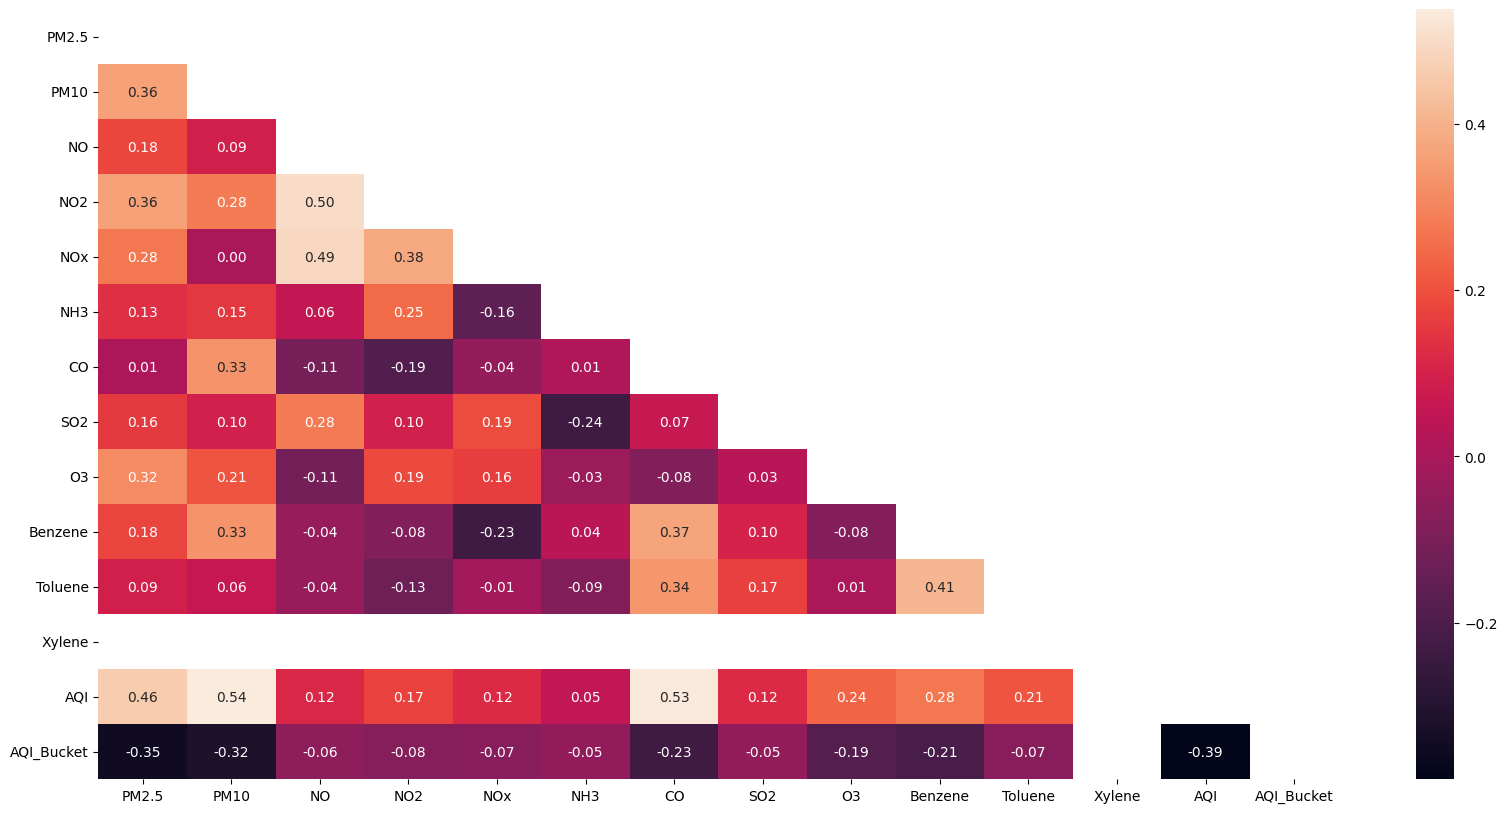

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Bengalurunew, col))

df_Bengalurunew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Bengalurunew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Bengalurunew[columns_to_scale] = scaler.fit_transform(df_Bengalurunew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.21137684 0.19099815 0.13038128 0.11066124 0.07438069 0.07016579
 0.06011961 0.05111583 0.03859449 0.03340035 0.02880572 0.        ]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   4.558817e-01  3.249933e-01  4.114840e-01  4.998396e-01  3.874533e-01   
PC2   1.401994e-01  3.615579e-01 -1.874589e-01 -1.727946e-01 -2.153354e-01   
PC3   8.584359e-02  2.677380e-01 -1.638755e-01  1.990124e-01 -3.907292e-01   
PC4   2.428947e-01  9.800281e-02 -4.912279e-01 -1.184569e-01 -5.220185e-03   
PC5  -4.802305e-02  2.707005e-01  1.106184e-02  5.535875e-02 -4.168874e-01   
PC6  -1.194684e-01  3.953117e-01  3.340836e-02 -1.131595e-01  2.873476e-01   
PC7  -3.331801e-01 -5.602864e-02 -4.699227e-02 -2.509654e-02 -9.339059e-03   
PC8   7.071322e-01 -2.459329e-01 -1.657643e-01 -3.863569e-01  9.780247e-02   
PC9  -8.185235e-02 -3.964175e-01  3.467055e-01 -2.499553e

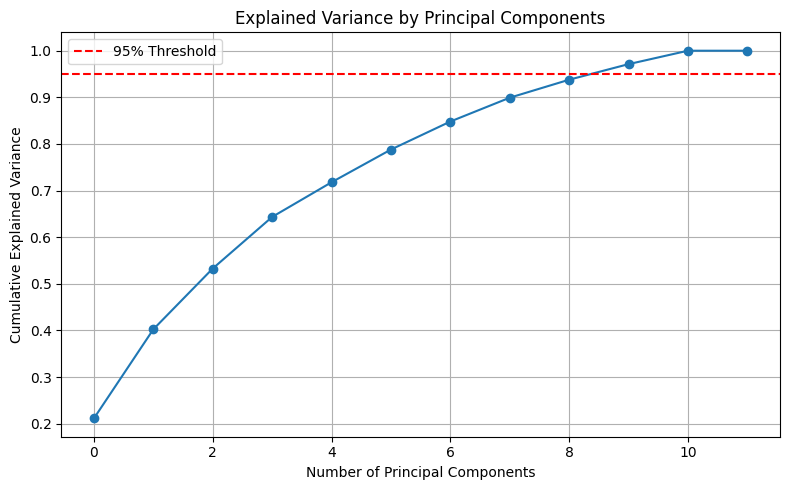

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X =df_Bengalurunew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y =df_Bengalurunew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Bengalurunew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Bengalurunew:")
print(feature_importance)


Top Features by LDA Importance for df_Bengalurunew:
    Feature  LDA Importance
6        CO            1.48
0     PM2.5            0.99
4       NOx            0.67
1      PM10            0.61
9   Benzene            0.48
2        NO            0.48
8        O3            0.39
3       NO2            0.35
5       NH3            0.29
7       SO2            0.20
10  Toluene            0.20
11   Xylene            0.00


In [ ]:
x1=df_Bengalurunew[['CO', 'PM2.5', 'NOx', 'PM10', 'Benzene', 'NO', 'O3','NO2']]
y1=df_Bengalurunew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.0469
Root Mean Squared Error (RMSE): 0.2165
R-squared (R2): 0.5474

Test Set Performance:
Mean Squared Error (MSE): 0.0361
Root Mean Squared Error (RMSE): 0.1901
R-squared (R2): 0.6214


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.0543
RMSE: 0.2331
R²: 0.5519

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.0363
RMSE: 0.1906
R²: 0.6196


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.0516
RMSE: 0.2272
R²: 0.5741

XGBoost Test Set Evaluation (Tuned):
MSE: 0.0297
RMSE: 0.1723
R²: 0.6889


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0509
RMSE: 0.2256
R²: 0.5804

Random Forest Test Set Evaluation for Model3
MSE: 0.0288
RMSE: 0.1696
R²: 0.6987


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0535
RMSE: 0.2314
R²: 0.5585

Random Forest Test Set Evaluation (Tuned):
MSE: 0.0286
RMSE: 0.1693
R²: 0.6999


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (828, 8)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.9148 - val_loss: 0.7789
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7102 - val_loss: 0.5253
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4431 - val_loss: 0.3685
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3485 - val_loss: 0.3359
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3275 - val_loss: 0.3210
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3437 - val_loss: 0.3152
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3326 - val_loss: 0.3091
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3947 - val_loss: 0.3063
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3136 - val_loss: 0.3041
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2715 - val_loss: 0.3024
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3195 - val_loss: 0.3024
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2729 - val_loss: 0.3029

BHOPAL

In [ ]:
df_Bhopal=df[df["City"]=="Bhopal"]
df_Bhopalnew=df_Bhopal.drop(["City","Date"],axis=1)
df_Bhopalnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
6303 -1.061116 -1.537176 -0.196393  0.669210  0.129712  1.303451  0.332894   
6304 -1.114737 -1.676114 -0.069982  0.624832  0.224011  1.872828  0.184237   
6305 -1.238326 -1.606283 -0.216993 -0.097312 -0.264438  1.872828 -0.272352   
6306 -1.285639 -1.557715 -0.264280 -0.052934 -0.285629  1.872828 -0.272352   
6307 -1.129075 -1.084117 -0.125228  0.226587 -0.021273  1.872828  0.216092   
...        ...       ...       ...       ...       ...       ...       ...   
6587 -1.407507 -1.952299 -0.725447 -1.119149 -1.226503 -0.756023 -0.771414   
6588 -1.334673 -1.686746 -0.739025 -1.234992 -1.295903 -0.784403 -0.845743   
6589 -1.303131 -1.557715 -0.732002 -1.080535 -1.213788 -0.761699 -0.792651   
6590 -1.308866 -1.470727 -0.728257 -1.025783 -1.183061 -0.914007 -0.750178   
6591 -1.322630 -1.874252 -0.771330 -1.259198 -1.341993 -1.211056 -0.909453   

           SO2        O3   Benzene  Toluene    Xylene           AQI  \
6303 -0.187678  0.460565  0.471525  0.33505  0.389732  7.777662e-17   
6304 -0.405608 -0.510222  0.471525  0.33505  0.389732 -6.002037e-01   
6305 -0.525607 -0.116476  0.471525  0.33505  0.389732 -6.931821e-01   
6306 -0.602848 -0.157774  0.471525  0.33505  0.389732 -7.009303e-01   
6307 -0.631813 -0.369356  0.471525  0.33505  0.389732 -6.544411e-01   
...        ...       ...       ...      ...       ...           ...   
6587 -0.332505  0.992914  0.471525  0.33505  0.389732 -7.784124e-01   
6588  0.129562  0.821499  0.471525  0.33505  0.389732 -8.636426e-01   
6589  0.191630  0.833379  0.471525  0.33505  0.389732 -8.558944e-01   
6590  0.122665  0.921633  0.471525  0.33505  0.389732 -8.326498e-01   
6591  0.077148  0.851483  0.471525  0.33505  0.389732 -7.551677e-01   

      AQI_Bucket  
6303           1  
6304           3  
6305           3  
6306           3  
6307           3  
...          ...  
6587           3  
6588           3  
6589           3  
6590           3  
6591           3  

[289 rows x 14 columns]

In [ ]:
df_Bhopalnew.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
corre=df_Bhopalnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.820302  0.480739  0.761828  0.724064  0.159479   
PM10        0.820302  1.000000  0.470322  0.738921  0.697479 -0.046784   
NO          0.480739  0.470322  1.000000  0.670752  0.855818  0.368750   
NO2         0.761828  0.738921  0.670752  1.000000  0.956091  0.271007   
NOx         0.724064  0.697479  0.855818  0.956091  1.000000  0.332327   
NH3         0.159479 -0.046784  0.368750  0.271007  0.332327  1.000000   
CO          0.686799  0.561353  0.776985  0.729860  0.826238  0.392257   
SO2         0.284685  0.355649  0.160392  0.265839  0.250546 -0.182585   
O3          0.017508  0.238077 -0.260260 -0.023145 -0.122547 -0.461271   
Benzene          NaN       NaN       NaN       NaN       NaN       NaN   
Toluene          NaN       NaN       NaN       NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.893473  0.770124  0.431430  0.677374  0.647565  0.129923   
AQI_Bucket -0.202256 -0.448347 -0.144166 -0.250891 -0.229719  0.116155   

                  CO       SO2        O3  Benzene  Toluene  Xylene       AQI  \
PM2.5       0.686799  0.284685  0.017508      NaN      NaN     NaN  0.893473   
PM10        0.561353  0.355649  0.238077      NaN      NaN     NaN  0.770124   
NO          0.776985  0.160392 -0.260260      NaN      NaN     NaN  0.431430   
NO2         0.729860  0.265839 -0.023145      NaN      NaN     NaN  0.677374   
NOx         0.826238  0.250546 -0.122547      NaN      NaN     NaN  0.647565   
NH3         0.392257 -0.182585 -0.461271      NaN      NaN     NaN  0.129923   
CO          1.000000  0.230549 -0.280067      NaN      NaN     NaN  0.617628   
SO2         0.230549  1.000000  0.252808      NaN      NaN     NaN  0.299533   
O3         -0.280067  0.252808  1.000000      NaN      NaN     NaN  0.147390   
Benzene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Toluene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Xylene           NaN       NaN       NaN      NaN      NaN     NaN       NaN   
AQI         0.617628  0.299533  0.147390      NaN      NaN     NaN  1.000000   
AQI_Bucket -0.181171 -0.118400 -0.166148      NaN      NaN     NaN -0.125878   

            AQI_Bucket  
PM2.5        -0.202256  
PM10         -0.448347  
NO           -0.144166  
NO2          -0.250891  
NOx          -0.229719  
NH3           0.116155  
CO           -0.181171  
SO2          -0.118400  
O3           -0.166148  
Benzene            NaN  
Toluene            NaN  
Xylene             NaN  
AQI          -0.125878  
AQI_Bucket    1.000000

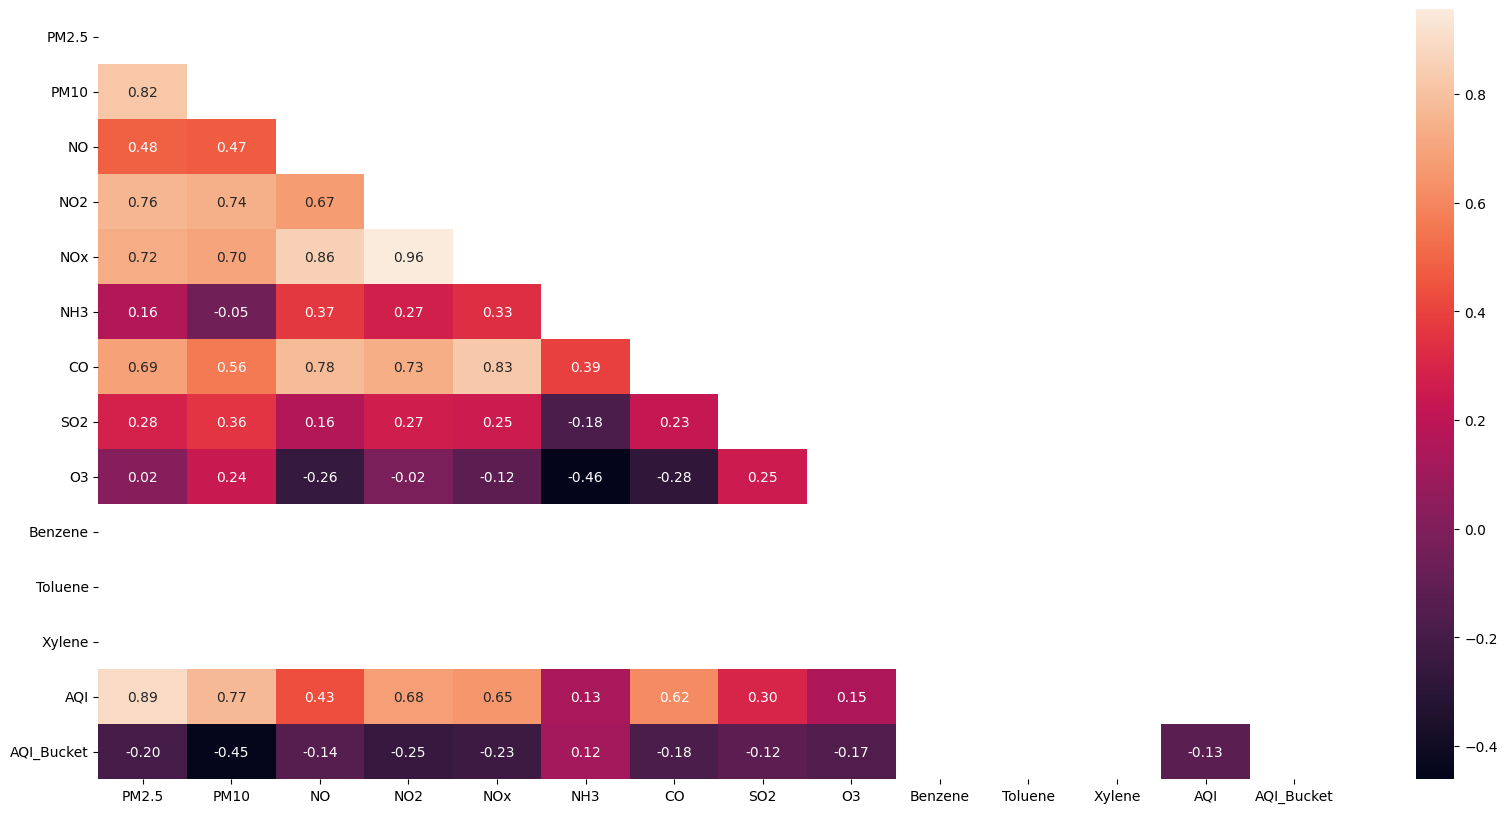

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Bhopalnew[columns_to_scale] = scaler.fit_transform(df_Bhopalnew[columns_to_scale])

Explained variance ratio by each principal component:
 [5.27513802e-01 2.13874151e-01 8.24749760e-02 6.16598365e-02
 5.38667527e-02 2.80413924e-02 2.02378303e-02 1.22498964e-02
 8.13627184e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.373329  0.347757  0.374961  0.422221  0.442324  0.188528  0.406714   
PC2   0.171619  0.362771 -0.186302  0.065024 -0.029162 -0.502470 -0.128245   
PC3  -0.278752 -0.282373  0.187694 -0.156167 -0.027469  0.107761  0.154052   
PC4  -0.544490 -0.188925  0.547513  0.113759  0.284523 -0.306193  0.015038   
PC5  -0.103707 -0.049458 -0.102250  0.113724  0.026200  0.758729 -0.165934   
PC6  -0.182330 -0.086849 -0.252816  0.615439  0.293994 -0.059108 -0.561300   
PC7   0.061665 -0.551555 -0.466205  0.310573  0.072823 -0.150887  0.563191   
PC8   0.639685 -0.563729  0.334594 -0.072415  0.062762 -0.068173 -0.364304   
PC9  -0.

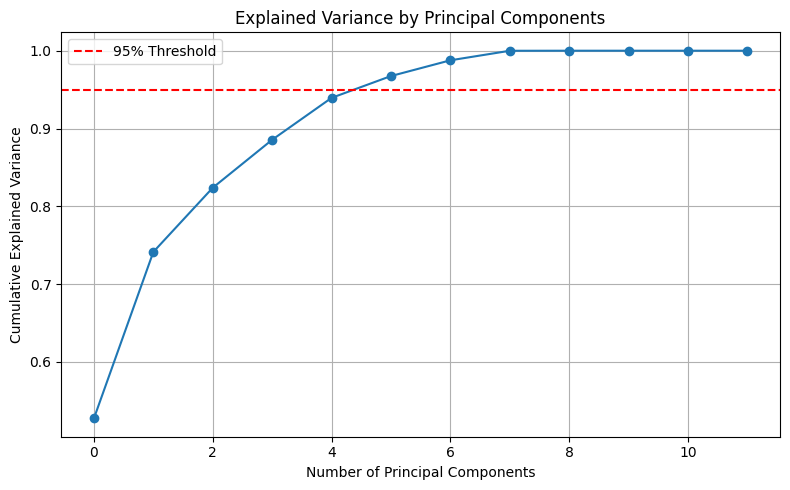

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Bhopalnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Bhopalnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Bhopalnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Bhopalnew:")
print(feature_importance)


Top Features by LDA Importance for df_Bhopalnew:
    Feature  LDA Importance
4       NOx           10.54
3       NO2            6.80
2        NO            4.01
0     PM2.5            2.99
1      PM10            2.05
8        O3            1.33
6        CO            1.25
7       SO2            0.26
5       NH3            0.20
9   Benzene            0.00
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Bhopalnew[["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]]
y1=df_Bhopalnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.1938
Root Mean Squared Error (RMSE): 0.4402
R-squared (R2): 0.8033

Test Set Performance:
Mean Squared Error (MSE): 0.1615
Root Mean Squared Error (RMSE): 0.4019
R-squared (R2): 0.8484


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")


Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.1617
RMSE: 0.4022
R²: 0.8337

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1777
RMSE: 0.4215
R²: 0.8333


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.1216
RMSE: 0.3486
R²: 0.8750

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1358
RMSE: 0.3685
R²: 0.8726


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1301
RMSE: 0.3607
R²: 0.8663

Random Forest Test Set Evaluation for Model3
MSE: 0.1129
RMSE: 0.3360
R²: 0.8941


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1331
RMSE: 0.3648
R²: 0.8632

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1285
RMSE: 0.3585
R²: 0.8794


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1120
RMSE: 0.3347
R²: 0.8849
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1154
RMSE: 0.3398
R²: 0.8917


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (173, 9)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.9176 - val_loss: 0.9176
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0510 - val_loss: 0.8628
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9796 - val_loss: 0.8023
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8138 - val_loss: 0.7313
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7194 - val_loss: 0.6524
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7504 - val_loss: 0.5665
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5837 - val_loss: 0.4835
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5663 - val_loss: 0.4052
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4725 - val_loss: 0.3461
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4265 - val_loss: 0.3096
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3769 - val_loss: 0.2908
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3070 - val_loss: 0.2784
Epoch 13/50

BRAJRANAGAR

In [ ]:
#for Brajrajnagar
df_Brajrajnagar=df[df["City"]=="Brajrajnagar"]
df_Brajrajnagarnew=df_Brajrajnagar.drop(["City","Date"],axis=1)
df_Brajrajnagarnew

PM2.5      PM10            NO       NO2       NOx       NH3  \
6592  2.086807  1.661910 -1.008888e-16  0.812717  0.177875 -1.236598   
6593  1.908163  1.661910 -1.008888e-16 -0.392394  0.177875 -1.218624   
6594  1.289934  1.131402 -1.008888e-16 -0.493828  0.177875 -1.201596   
6595  0.146955 -0.189356 -1.008888e-16 -0.677678  0.177875 -1.225246   
6596  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
...        ...       ...           ...       ...       ...       ...   
7525  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
7526  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
7527  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
7528  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
7529  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   

            CO       SO2        O3   Benzene  Toluene    Xylene           AQI  \
6592  2.180486 -0.835950 -1.642242 -1.029804  0.33505  0.389732  7.777662e-17   
6593  1.840699 -0.891122 -1.312989 -1.029804  0.33505  0.389732  1.065660e+00   
6594  1.723897 -0.936639 -1.323172 -1.029804  0.33505  0.389732  9.649336e-01   
6595  1.628332 -0.984915 -1.434055 -1.029804  0.33505  0.389732  1.746168e-01   
6596  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   
...        ...       ...       ...       ...      ...       ...           ...   
7525  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   
7526  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   
7527  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   
7528  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   
7529  1.106545  0.364316  0.043705  0.471525  0.33505  0.389732  7.777662e-17   

      AQI_Bucket  
6592           1  
6593           5  
6594           2  
6595           1  
6596           1  
...          ...  
7525           1  
7526           1  
7527           1  
7528           1  
7529           1  

[938 rows x 14 columns]

In [ ]:
corre=df_Brajrajnagarnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.867390  0.211537  0.525521  0.666225  0.054745   
PM10        0.867390  1.000000  0.177440  0.509590  0.580847  0.072951   
NO          0.211537  0.177440  1.000000  0.249926  0.382565  0.177080   
NO2         0.525521  0.509590  0.249926  1.000000  0.492467  0.088443   
NOx         0.666225  0.580847  0.382565  0.492467  1.000000  0.083783   
NH3         0.054745  0.072951  0.177080  0.088443  0.083783  1.000000   
CO          0.296538  0.235920 -0.130175  0.162473  0.439824 -0.149129   
SO2         0.340588  0.279352  0.012190  0.418047  0.380419 -0.361872   
O3          0.053486  0.149883  0.248933  0.456920  0.058294  0.003151   
Benzene     0.090592  0.029396 -0.033684  0.135225  0.192281  0.134693   
Toluene          NaN       NaN       NaN       NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.818349  0.715251  0.139574  0.481317  0.613573  0.087431   
AQI_Bucket  0.231435  0.051106 -0.042132  0.068307  0.092649 -0.021600   

                  CO       SO2        O3   Benzene  Toluene  Xylene       AQI  \
PM2.5       0.296538  0.340588  0.053486  0.090592      NaN     NaN  0.818349   
PM10        0.235920  0.279352  0.149883  0.029396      NaN     NaN  0.715251   
NO         -0.130175  0.012190  0.248933 -0.033684      NaN     NaN  0.139574   
NO2         0.162473  0.418047  0.456920  0.135225      NaN     NaN  0.481317   
NOx         0.439824  0.380419  0.058294  0.192281      NaN     NaN  0.613573   
NH3        -0.149129 -0.361872  0.003151  0.134693      NaN     NaN  0.087431   
CO          1.000000  0.296675 -0.251036  0.067052      NaN     NaN  0.428443   
SO2         0.296675  1.000000  0.007170  0.121999      NaN     NaN  0.318711   
O3         -0.251036  0.007170  1.000000  0.008024      NaN     NaN  0.017325   
Benzene     0.067052  0.121999  0.008024  1.000000      NaN     NaN  0.129220   
Toluene          NaN       NaN       NaN       NaN      NaN     NaN       NaN   
Xylene           NaN       NaN       NaN       NaN      NaN     NaN       NaN   
AQI         0.428443  0.318711  0.017325  0.129220      NaN     NaN  1.000000   
AQI_Bucket  0.019185  0.014272 -0.186692  0.038987      NaN     NaN  0.336784   

            AQI_Bucket  
PM2.5         0.231435  
PM10          0.051106  
NO           -0.042132  
NO2           0.068307  
NOx           0.092649  
NH3          -0.021600  
CO            0.019185  
SO2           0.014272  
O3           -0.186692  
Benzene       0.038987  
Toluene            NaN  
Xylene             NaN  
AQI           0.336784  
AQI_Bucket    1.000000

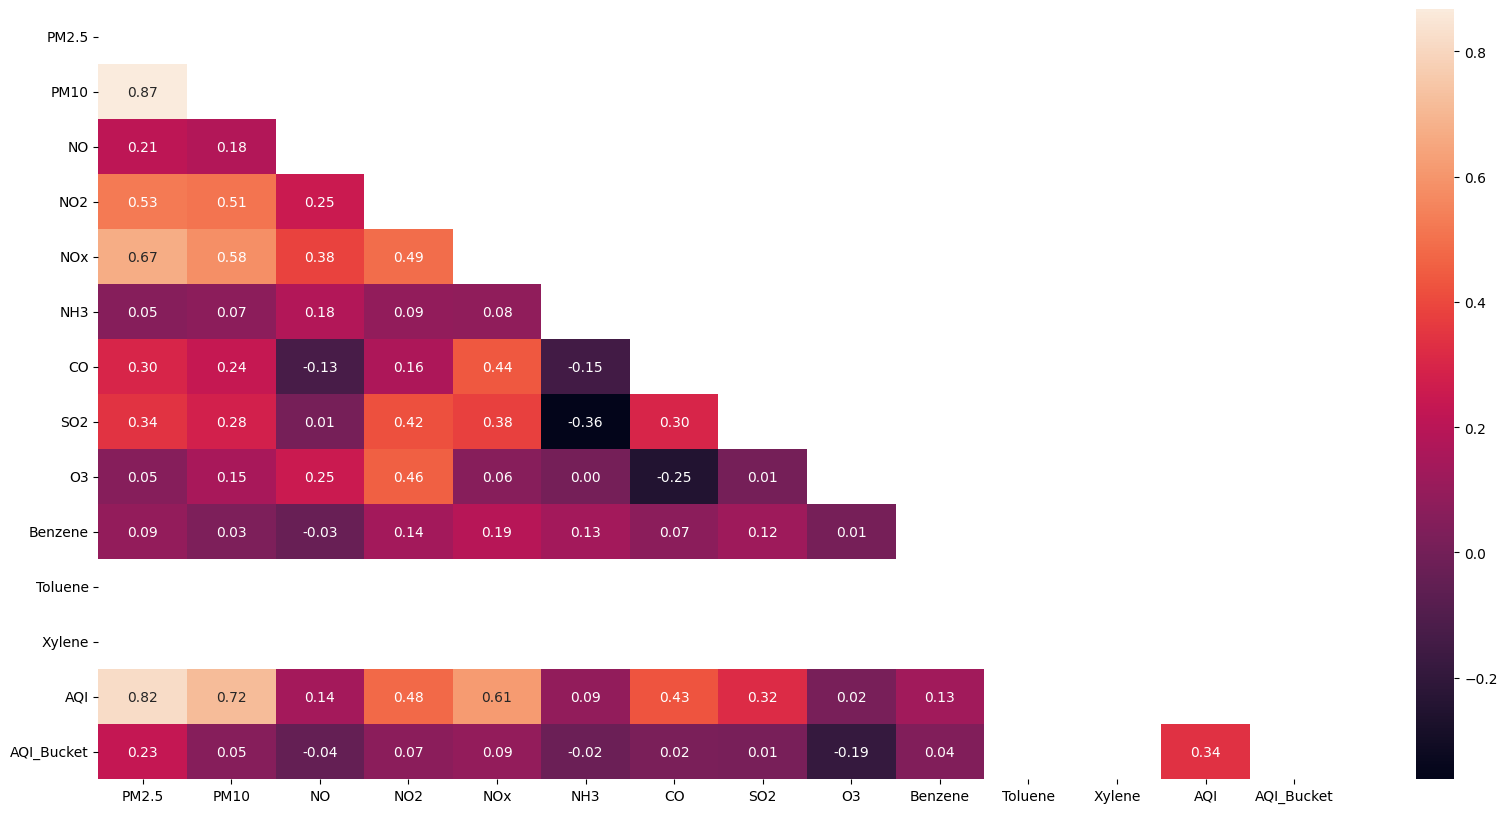

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Brajrajnagarnew, col))

df_Brajrajnagarnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Brajrajnagarnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Brajrajnagarnew[columns_to_scale] = scaler.fit_transform(df_Brajrajnagarnew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.38818859 0.16528649 0.12597855 0.10295739 0.0709242  0.05703482
 0.03728364 0.02576883 0.01697609 0.00960139 0.         0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.445452  0.430718  0.389510  0.393689  0.431827  0.069771  0.175727   
PC2  -0.053272  0.021112  0.326914  0.088363 -0.114368  0.540385 -0.507310   
PC3  -0.131525 -0.082626 -0.016774  0.310314 -0.170600 -0.484502 -0.291264   
PC4  -0.218350 -0.289740 -0.041616  0.110906  0.078224 -0.014356  0.063580   
PC5  -0.052330 -0.012102 -0.331113  0.204557  0.002911  0.135381  0.646824   
PC6  -0.386965 -0.423236  0.183654  0.330467  0.122897  0.452146  0.168403   
PC7  -0.193006 -0.289337  0.401229 -0.353681  0.612217 -0.320249  0.051707   
PC8   0.032781 -0.194793  0.127027  0.646236 -0.073044 -0.350400 -0.066201   
PC9  -0.083453  0.059482  0.646965 -0.160409 -0.596967 -0

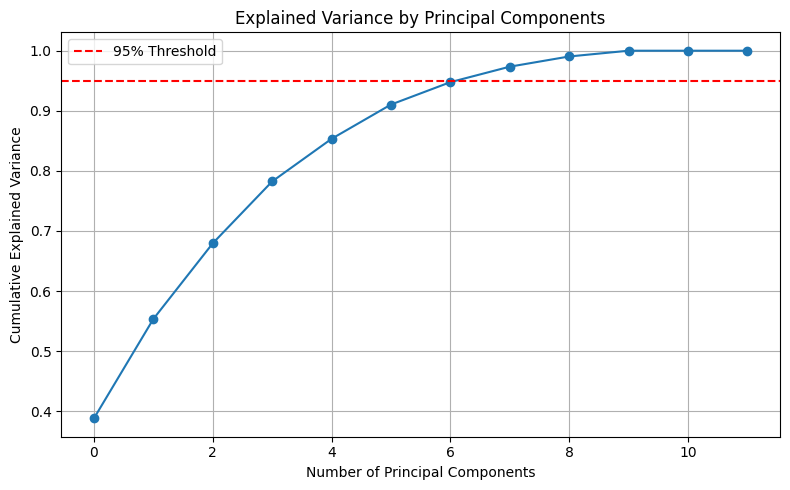

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Brajrajnagarnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y =df_Brajrajnagarnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Brajrajnagarnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Brajrajnagarnew:")
print(feature_importance)


Top Features by LDA Importance for df_Brajrajnagarnew:
    Feature  LDA Importance
0     PM2.5            2.19
1      PM10            1.73
6        CO            1.54
3       NO2            0.67
8        O3            0.67
5       NH3            0.58
2        NO            0.57
4       NOx            0.50
7       SO2            0.37
9   Benzene            0.28
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Brajrajnagarnew[["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]]
y1=df_Brajrajnagarnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2846
Root Mean Squared Error (RMSE): 0.5335
R-squared (R2): 0.7308

Test Set Performance:
Mean Squared Error (MSE): 0.2228
Root Mean Squared Error (RMSE): 0.4720
R-squared (R2): 0.7022


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.3051
RMSE: 0.5524
R²: 0.7156

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2220
RMSE: 0.4711
R²: 0.7033


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2675
RMSE: 0.5172
R²: 0.7506

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1681
RMSE: 0.4100
R²: 0.7753


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2536
RMSE: 0.5036
R²: 0.7636

Random Forest Test Set Evaluation for Model3
MSE: 0.1676
RMSE: 0.4095
R²: 0.7759


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.2358
RMSE: 0.4856
R²: 0.7802

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1483
RMSE: 0.3851
R²: 0.8018


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.2605
RMSE: 0.5104
R²: 0.7572
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1762
RMSE: 0.4197
R²: 0.7646


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (547, 9)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 1.0004 - val_loss: 0.8733
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8669 - val_loss: 0.6315
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5298 - val_loss: 0.4124
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3768 - val_loss: 0.3582
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3111 - val_loss: 0.3248
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2975 - val_loss: 0.3108
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2691 - val_loss: 0.2996
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2385 - val_loss: 0.3011
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2605 - val_loss: 0.2883
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2455 - val_loss: 0.2823
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2304 - val_loss: 0.2794
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2207 - val_loss: 0.2745

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Validation - MSE: 0.2587, RMSE: 0.5087, R²: 0.7588
Test - MSE: 0.1806, RMSE: 0.4249, R²: 0.7587


CHANDIGARH

In [ ]:
#for Chandigarh
df_Chandigarh=df[df["City"]=="Chandigarh"]
df_Chandigarhnew=df_Chandigarh.drop(["City","Date"],axis=1)
df_Chandigarhnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
7530 -1.333526 -0.487287 -0.441256 -1.307609 -0.890098 -1.898809 -0.697086   
7531 -0.923190 -0.287217 -0.367750 -1.282827 -0.782024 -1.889348 -0.442246   
7532 -0.747700 -0.408032 -0.048913 -0.987745 -0.163781 -1.813667 -0.293589   
7533  0.210056 -1.149599 -0.306418 -1.271877 -0.682957 -1.867590 -0.665231   
7534  0.210056 -1.007761 -0.481052 -1.399246 -1.010356 -1.842048 -0.325444   
...        ...       ...       ...       ...       ...       ...       ...   
7829 -0.704687 -0.936239 -0.795208 -1.162950 -1.320802  1.872828 -0.962545   
7830 -0.593716 -0.611969 -0.791462 -1.138744 -1.305439  1.872828 -0.973163   
7831 -0.608913 -0.466265 -0.764307 -1.060363 -1.243455  1.872828 -0.962545   
7832 -1.142552 -1.498273 -0.776012 -1.130099 -1.289016  1.872828 -0.962545   
7833 -0.780676 -0.850218 -0.796612 -0.985440 -1.220145  1.492654 -0.930690   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
7530 -0.244229  0.686856  0.535205 -1.078499  1.283877  7.777662e-17   
7531 -0.349056 -0.200204  0.521477 -1.127469  1.010633 -5.692108e-01   
7532 -1.051121 -0.932821  1.381774 -0.983936  1.718847 -5.459662e-01   
7533  0.304733 -0.390854  1.152972 -0.828582  1.718847 -6.931821e-01   
7534 -0.362849 -1.378048  0.256066 -0.774545  1.718847  7.777662e-17   
...        ...       ...       ...       ...       ...           ...   
7829 -0.616641  0.543727  0.384195 -1.085254 -1.556198 -6.776857e-01   
7830  0.164044  0.668753  0.580965 -1.068367 -1.498237 -7.241749e-01   
7831  0.437146  0.125655  0.709095 -1.081876 -1.514797 -6.466929e-01   
7832  0.056459  0.111512  0.091328  0.242011 -0.976591 -7.396713e-01   
7833  0.416457  0.034573  0.484868 -1.078499 -1.771480 -7.784124e-01   

      AQI_Bucket  
7530           1  
7531           3  
7532           3  
7533           3  
7534           1  
...          ...  
7829           3  
7830           3  
7831           3  
7832           3  
7833           3  

[304 rows x 14 columns]

In [ ]:
corre=df_Chandigarhnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.905524  0.518175  0.156584  0.452649 -0.348146   
PM10        0.905524  1.000000  0.547444  0.185596  0.495638 -0.294617   
NO          0.518175  0.547444  1.000000  0.243661  0.861051 -0.079294   
NO2         0.156584  0.185596  0.243661  1.000000  0.626702  0.290023   
NOx         0.452649  0.495638  0.861051  0.626702  1.000000 -0.063539   
NH3        -0.348146 -0.294617 -0.079294  0.290023 -0.063539  1.000000   
CO          0.701029  0.735282  0.785345  0.328324  0.733007 -0.185935   
SO2        -0.180828 -0.131511 -0.128800 -0.171474 -0.137780 -0.180539   
O3         -0.344991 -0.284551 -0.459336 -0.436823 -0.482344 -0.135346   
Benzene     0.434966  0.474809  0.574326  0.233925  0.547795 -0.154759   
Toluene     0.398096  0.318118  0.109742  0.004294  0.089441 -0.289392   
Xylene      0.173915  0.129303  0.132942 -0.009754  0.112782 -0.357110   
AQI         0.887434  0.849594  0.446577  0.154440  0.397551 -0.283705   
AQI_Bucket  0.035462  0.057542 -0.024719  0.012461  0.003035 -0.074187   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.701029 -0.180828 -0.344991  0.434966  0.398096  0.173915   
PM10        0.735282 -0.131511 -0.284551  0.474809  0.318118  0.129303   
NO          0.785345 -0.128800 -0.459336  0.574326  0.109742  0.132942   
NO2         0.328324 -0.171474 -0.436823  0.233925  0.004294 -0.009754   
NOx         0.733007 -0.137780 -0.482344  0.547795  0.089441  0.112782   
NH3        -0.185935 -0.180539 -0.135346 -0.154759 -0.289392 -0.357110   
CO          1.000000 -0.153768 -0.526648  0.574954  0.226752  0.220975   
SO2        -0.153768  1.000000  0.438733 -0.165564  0.135140  0.088213   
O3         -0.526648  0.438733  1.000000 -0.428875  0.031458 -0.133131   
Benzene     0.574954 -0.165564 -0.428875  1.000000 -0.050113  0.169432   
Toluene     0.226752  0.135140  0.031458 -0.050113  1.000000  0.184209   
Xylene      0.220975  0.088213 -0.133131  0.169432  0.184209  1.000000   
AQI         0.631159 -0.105060 -0.215830  0.302392  0.403918  0.132846   
AQI_Bucket -0.057799  0.068324  0.181697 -0.017382  0.057178 -0.089890   

                 AQI  AQI_Bucket  
PM2.5       0.887434    0.035462  
PM10        0.849594    0.057542  
NO          0.446577   -0.024719  
NO2         0.154440    0.012461  
NOx         0.397551    0.003035  
NH3        -0.283705   -0.074187  
CO          0.631159   -0.057799  
SO2        -0.105060    0.068324  
O3         -0.215830    0.181697  
Benzene     0.302392   -0.017382  
Toluene     0.403918    0.057178  
Xylene      0.132846   -0.089890  
AQI         1.000000    0.082302  
AQI_Bucket  0.082302    1.000000

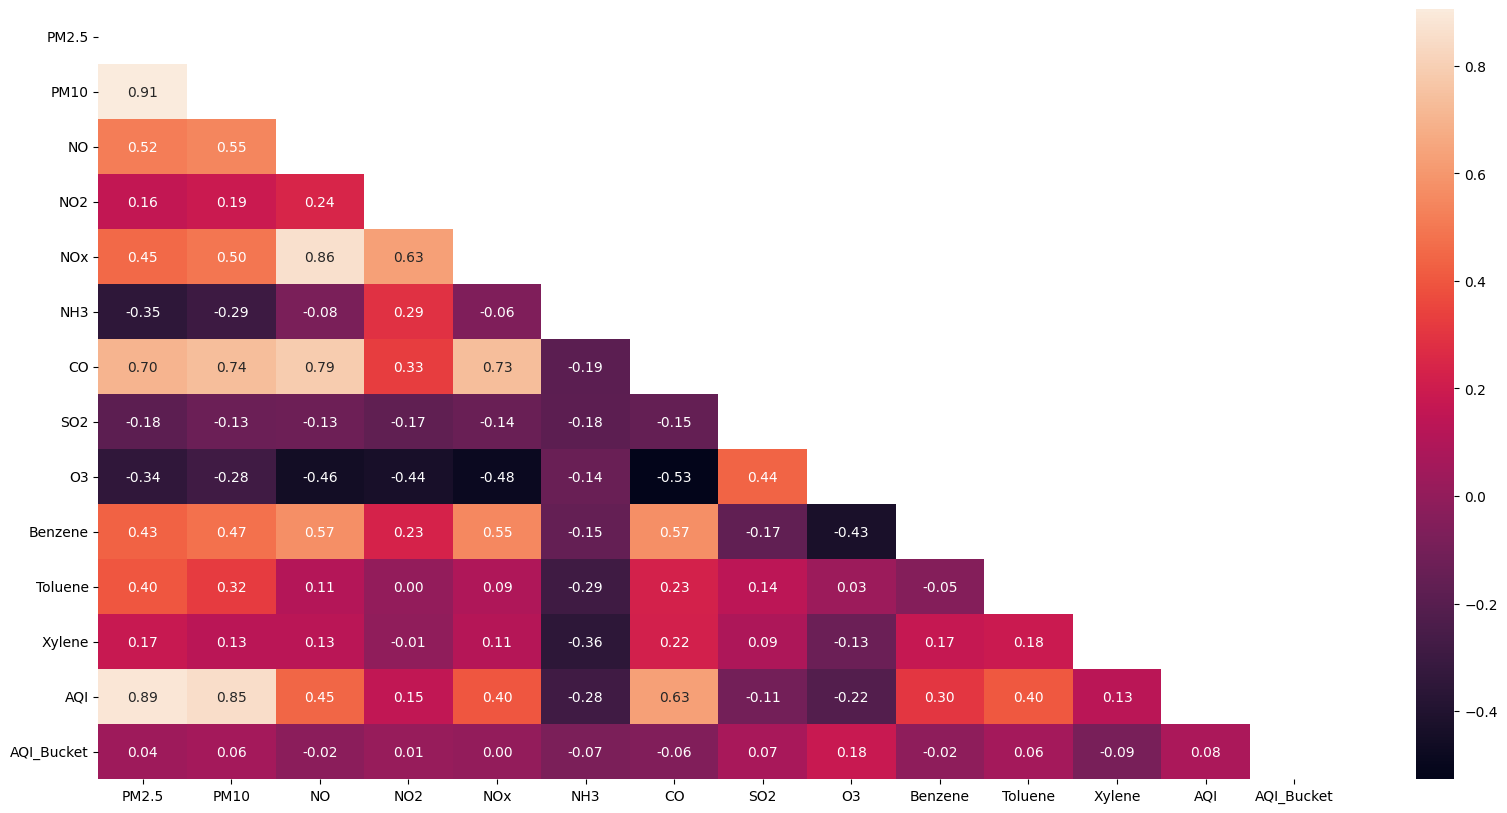

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Chandigarhnew, col))

df_Chandigarhnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Chandigarhnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Chandigarhnew[columns_to_scale] = scaler.fit_transform(df_Chandigarhnew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.39177751 0.22335288 0.10756173 0.06916511 0.0522907  0.04329445
 0.0309935  0.0272522  0.02530061 0.01721864 0.00920841 0.00258425]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.364843  0.358447  0.371344  0.127760  0.383596 -0.091089  0.380600   
PC2  -0.183236 -0.145000 -0.011799  0.470918  0.091544  0.527394 -0.032928   
PC3  -0.374042 -0.357652  0.376819  0.175848  0.372740  0.144657  0.124015   
PC4   0.033064  0.243908  0.046988  0.054176  0.082626 -0.011867  0.210952   
PC5   0.009693 -0.019410 -0.135040 -0.186112 -0.263658  0.025661  0.167887   
PC6   0.170078  0.234757 -0.499638  0.572525 -0.177818  0.062554  0.031770   
PC7  -0.117641  0.029141 -0.114132  0.233441 -0.062120  0.045727  0.615336   
PC8   0.040789 -0.206071 -0.022727  0.299060  0.074819 -0.059867 -0.411204   
PC9  -0.094787  0.097931 -0.008895 -0.373728 -0.227494  0

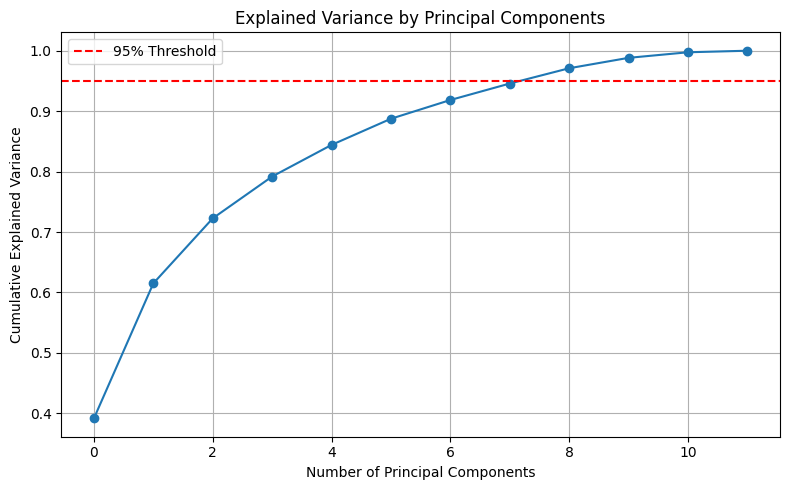

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Chandigarhnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Chandigarhnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Chandigarhnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Chandigarhnew:")
print(feature_importance)


Top Features by LDA Importance for df_Chandigarhnew:
    Feature  LDA Importance
2        NO            4.23
4       NOx            4.00
0     PM2.5            3.38
1      PM10            1.92
8        O3            0.88
7       SO2            0.84
5       NH3            0.79
3       NO2            0.78
6        CO            0.39
9   Benzene            0.29
10  Toluene            0.24
11   Xylene            0.22


In [ ]:
x1=df_Chandigarhnew[["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO","SO2",  "O3"]]
y1=df_Chandigarhnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3454
Root Mean Squared Error (RMSE): 0.5877
R-squared (R2): 0.6824

Test Set Performance:
Mean Squared Error (MSE): 0.1719
Root Mean Squared Error (RMSE): 0.4146
R-squared (R2): 0.8103


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2185
RMSE: 0.4674
R²: 0.7379

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1502
RMSE: 0.3875
R²: 0.8342


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.3024
RMSE: 0.5499
R²: 0.6372

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1700
RMSE: 0.4123
R²: 0.8123


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.3492
RMSE: 0.5910
R²: 0.5810

Random Forest Test Set Evaluation for Model3
MSE: 0.1336
RMSE: 0.3655
R²: 0.8525


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.2024
RMSE: 0.4499
R²: 0.7572

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1536
RMSE: 0.3919
R²: 0.8304


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 731ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1975
RMSE: 0.4445
R²: 0.7630
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.1807
RMSE: 0.4251
R²: 0.8005


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (126, 1, 9)
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step - loss: 0.8560 - val_loss: 0.7650
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0061 - val_loss: 0.7068
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.6923 - val_loss: 0.6391
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8083 - val_loss: 0.5594
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7912 - val_loss: 0.4774
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.5559 - val_loss: 0.4061
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6335 - val_loss: 0.3587
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.4285 - val_loss: 0.3330
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.3011 - val_loss: 0.3074
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5119 - val_loss: 0.2883
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.3434 - val_loss: 0.2707
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - lo

CHENNAI

In [ ]:
#for Chennai
df_Chennai=df[df["City"]=="Chennai"]
df_Chennainew=df_Chennai.drop(["City","Date"],axis=1)
df_Chennainew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
7834  0.210056  0.255176 -0.059682 -0.667304 -0.332249 -1.538377 -0.038748   
7835  0.210056  0.255176 -0.050786 -0.780842 -0.310528 -1.231868  0.024962   
7836  0.210056  0.255176 -0.367750 -0.426974 -1.004528 -1.534593 -0.463482   
7837  0.210056  0.255176 -0.373369 -0.620621 -0.913408 -1.477832 -0.219260   
7838  0.210056  0.255176 -0.393969 -0.614858 -0.848246 -1.452290 -0.325444   
...        ...       ...       ...       ...       ...       ...       ...   
9838 -0.966489 -1.649535 -0.483393 -0.807353 -0.495948  1.168171 -0.113077   
9839 -0.980539 -1.498757 -0.457175 -0.977947 -0.665475  1.431163 -0.474101   
9840 -1.113304 -2.062483 -0.464666 -0.995814 -0.646933  1.250474 -0.261734   
9841 -1.031867 -1.858304 -0.428615 -0.840780 -0.458864  1.259934 -0.166169   
9842 -1.266714 -2.089380 -0.531617 -0.936452 -0.662826  1.198443 -0.198024   

           SO2        O3   Benzene   Toluene    Xylene           AQI  \
7834 -0.371125 -1.265468 -0.952011  0.335050  0.389732  7.777662e-17   
7835 -0.452504 -1.389362 -0.970316  0.335050  0.389732  7.777662e-17   
7836  2.110922 -1.146665 -1.016076  0.335050  0.389732  7.777662e-17   
7837  2.110922 -1.323172  0.471525  0.335050  0.389732  7.777662e-17   
7838  0.649559 -1.378048  0.471525  0.335050  0.389732  7.777662e-17   
...        ...       ...       ...       ...       ...           ...   
9838 -0.634572  1.968228 -0.984044 -1.122404  0.389732 -5.537144e-01   
9839 -0.746295  2.375834 -0.988620 -1.134224  0.389732 -5.304698e-01   
9840 -0.726985  1.632186 -0.988620 -1.132535  0.389732 -4.839806e-01   
9841 -0.605606  1.981805 -0.952011 -1.107206  0.389732 -4.374914e-01   
9842 -0.366987  0.828853 -0.988620 -1.134224  0.389732 -5.769590e-01   

      AQI_Bucket  
7834           1  
7835           1  
7836           1  
7837           1  
7838           1  
...          ...  
9838           3  
9839           3  
9840           1  
9841           1  
9842           3  

[2009 rows x 14 columns]

In [ ]:
corre=df_Chennainew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.303277  0.178868  0.273145  0.046117 -0.084184   
PM10        0.303277  1.000000  0.057745  0.096106 -0.165605 -0.123125   
NO          0.178868  0.057745  1.000000  0.694481  0.450731 -0.141309   
NO2         0.273145  0.096106  0.694481  1.000000  0.486412 -0.113291   
NOx         0.046117 -0.165605  0.450731  0.486412  1.000000  0.166657   
NH3        -0.084184 -0.123125 -0.141309 -0.113291  0.166657  1.000000   
CO          0.097452  0.075225  0.221942  0.131482  0.147293  0.049671   
SO2         0.163132 -0.017436  0.248424  0.199360  0.250036  0.137570   
O3          0.133974 -0.155957 -0.107468 -0.031207 -0.082375  0.070933   
Benzene     0.192595  0.072983  0.185613  0.086942 -0.051050 -0.003193   
Toluene     0.193551  0.183743  0.248683  0.156083  0.050979 -0.046851   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.687109  0.241596  0.172319  0.223212  0.021340 -0.125911   
AQI_Bucket -0.406991 -0.143852 -0.078398 -0.090631  0.017123  0.028974   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.097452  0.163132  0.133974  0.192595  0.193551     NaN   
PM10        0.075225 -0.017436 -0.155957  0.072983  0.183743     NaN   
NO          0.221942  0.248424 -0.107468  0.185613  0.248683     NaN   
NO2         0.131482  0.199360 -0.031207  0.086942  0.156083     NaN   
NOx         0.147293  0.250036 -0.082375 -0.051050  0.050979     NaN   
NH3         0.049671  0.137570  0.070933 -0.003193 -0.046851     NaN   
CO          1.000000  0.110188 -0.038022  0.474994  0.451756     NaN   
SO2         0.110188  1.000000 -0.019188  0.030118  0.048612     NaN   
O3         -0.038022 -0.019188  1.000000  0.012660 -0.057130     NaN   
Benzene     0.474994  0.030118  0.012660  1.000000  0.644522     NaN   
Toluene     0.451756  0.048612 -0.057130  0.644522  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.393721  0.120848  0.165591  0.264369  0.275441     NaN   
AQI_Bucket -0.232253 -0.066059 -0.249429 -0.255968 -0.246431     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.687109   -0.406991  
PM10        0.241596   -0.143852  
NO          0.172319   -0.078398  
NO2         0.223212   -0.090631  
NOx         0.021340    0.017123  
NH3        -0.125911    0.028974  
CO          0.393721   -0.232253  
SO2         0.120848   -0.066059  
O3          0.165591   -0.249429  
Benzene     0.264369   -0.255968  
Toluene     0.275441   -0.246431  
Xylene           NaN         NaN  
AQI         1.000000   -0.435111  
AQI_Bucket -0.435111    1.000000

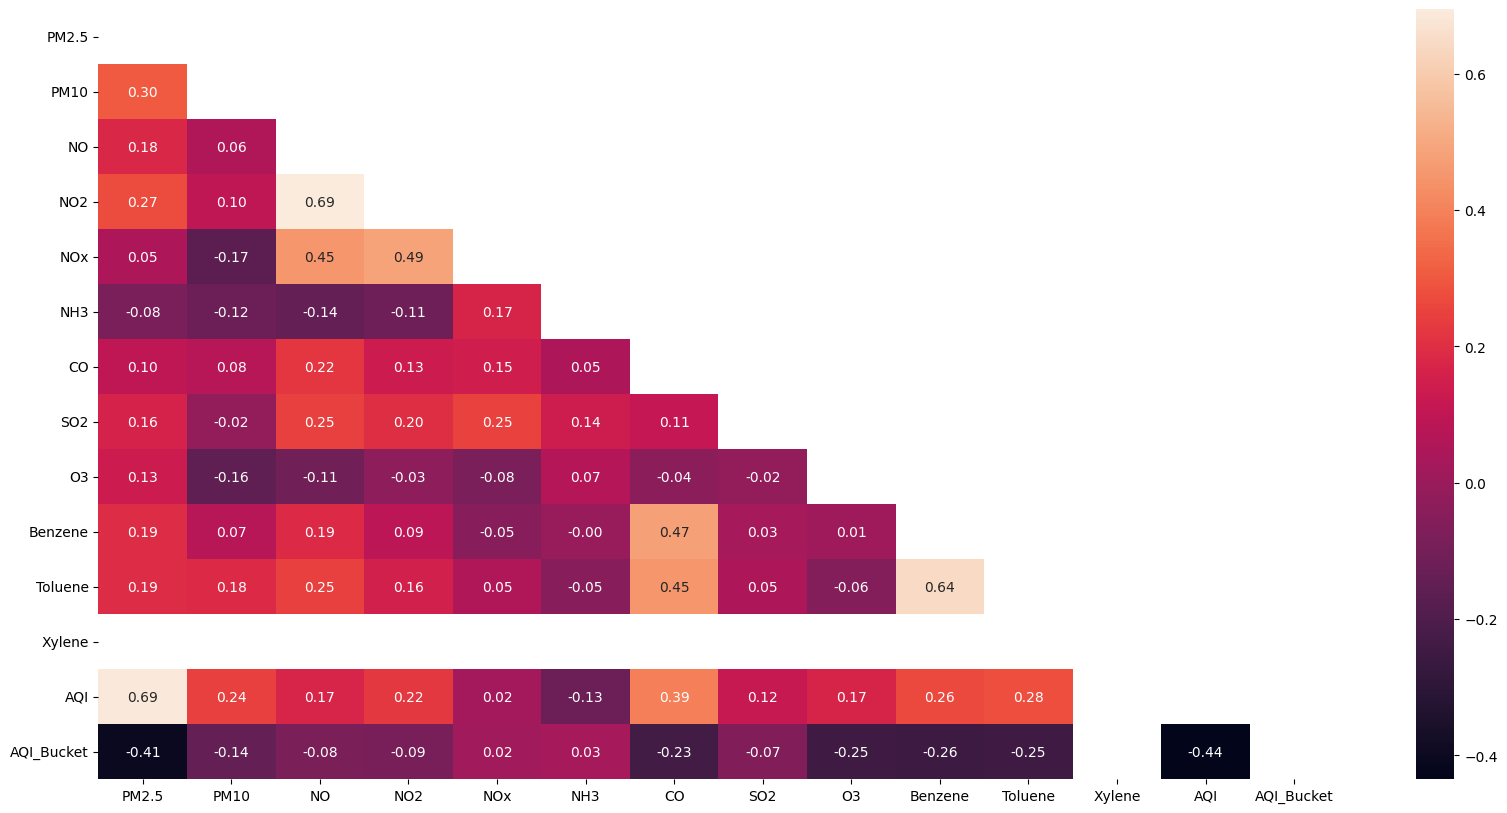

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
# def detect_outliers_iqr(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return df[(df[col] < lower) | (df[col] > upper)].index

# outlier_indices = set()
# for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
#     outlier_indices.update(detect_outliers_iqr(df_Chennainew, col))

# df_Chennainew.drop(index=outlier_indices, errors="ignore", inplace=True)
# df_Chennainew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Chennainew[columns_to_scale] = scaler.fit_transform(df_Chennainew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.25060928 0.16173809 0.12512044 0.10574487 0.0906328  0.0724535
 0.05107529 0.05000128 0.03933487 0.02963047 0.02365911 0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.268289  0.152905  0.450426  0.421566  0.273221 -0.073402  0.347719   
PC2  -0.087188 -0.240688  0.295330  0.360128  0.475191  0.099324 -0.269849   
PC3  -0.340113 -0.510370 -0.123955 -0.187707  0.233224  0.532868  0.338801   
PC4   0.552764  0.121227 -0.152911 -0.004551 -0.084188  0.299884 -0.108040   
PC5  -0.100450 -0.478234  0.155184  0.165875 -0.060191 -0.493121 -0.031430   
PC6  -0.049871 -0.259747  0.029564 -0.199055 -0.306119 -0.415436 -0.029110   
PC7  -0.465002  0.451392  0.077858  0.018479 -0.070715 -0.101658  0.536140   
PC8   0.474889 -0.215629 -0.262930 -0.198855  0.304349 -0.285150  0.549629   
PC9  -0.133365  0.183582 -0.356451 -0.186924  0.564779 -0.

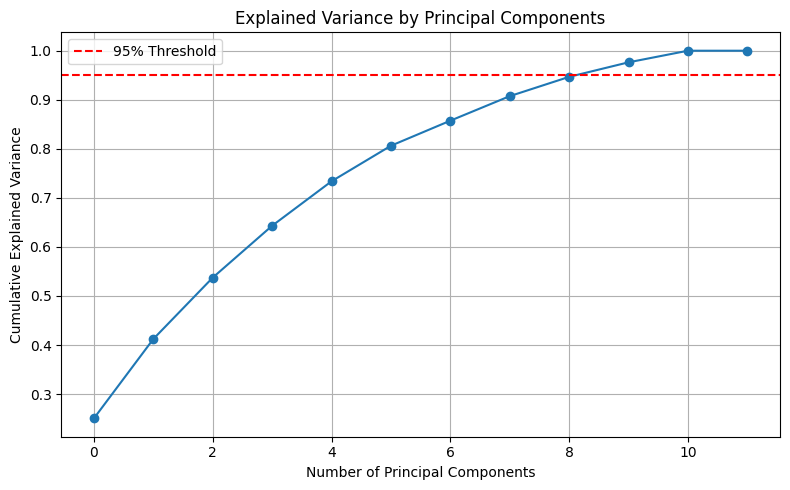

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Chennainew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Chennainew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean =df_Chennainew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Chennainew:")
print(feature_importance)


Top Features by LDA Importance for df_Chennainew:
    Feature  LDA Importance
0     PM2.5            1.98
6        CO            1.52
3       NO2            0.62
8        O3            0.48
9   Benzene            0.46
2        NO            0.37
7       SO2            0.30
5       NH3            0.30
10  Toluene            0.26
4       NOx            0.23
1      PM10            0.22
11   Xylene            0.00


In [ ]:
x1=df_Chennainew[['PM2.5', 'CO', 'NO', 'NO2', 'O3','NH3' ,'Benzene','SO2']]
y1=df_Chennainew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3653
Root Mean Squared Error (RMSE): 0.6044
R-squared (R2): 0.6381

Test Set Performance:
Mean Squared Error (MSE): 0.4662
Root Mean Squared Error (RMSE): 0.6828
R-squared (R2): 0.5429


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.4621
RMSE: 0.6798
R²: 0.5143

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.4660
RMSE: 0.6826
R²: 0.5431


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.3889
RMSE: 0.6236
R²: 0.5912

XGBoost Test Set Evaluation (Tuned):
MSE: 0.2795
RMSE: 0.5286
R²: 0.7260


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.3787
RMSE: 0.6154
R²: 0.6020

Random Forest Test Set Evaluation for Model3
MSE: 0.2651
RMSE: 0.5149
R²: 0.7401


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.4022
RMSE: 0.6342
R²: 0.5773
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.3289
RMSE: 0.5735
R²: 0.6775


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1205, 1, 8)
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.8719 - val_loss: 0.5655
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3837 - val_loss: 0.4555
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2763 - val_loss: 0.4310
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2878 - val_loss: 0.4238
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3127 - val_loss: 0.4220
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3133 - val_loss: 0.4149
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3253 - val_loss: 0.4150
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2993 - val_loss: 0.4167
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2592 - val_loss: 0.4131
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2982 - val_loss: 0.4121
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2980 - val_loss: 0.4126
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━

COIMBATORE

In [ ]:
#for Coimbatore
df_Coimbatore=df[df["City"]=="Coimbatore"]
df_Coimbatorenew=df_Coimbatore.drop(["City","Date"],axis=1)
df_Coimbatorenew

PM2.5      PM10            NO       NO2       NOx       NH3  \
9843  -0.621244 -1.548291 -5.100802e-01 -1.305880 -0.952081 -1.090912   
9844  -1.105562 -1.945533 -5.152302e-01 -1.268995 -0.923473 -1.140105   
9845  -0.999465 -1.823992 -5.016527e-01 -1.245942 -0.886919 -1.195920   
9846  -0.862686 -1.732897 -4.777751e-01 -1.195225 -0.813281 -1.277277   
9847  -1.020397 -1.840182 -5.311487e-01 -1.317983 -0.986516 -1.343498   
...         ...       ...           ...       ...       ...       ...   
10224 -1.385428 -2.089380 -1.008888e-16  0.799461 -0.292516 -1.737040   
10225 -1.321483 -2.089380 -1.008888e-16  1.025960 -0.116632 -1.723796   
10226 -1.257825 -2.089380 -1.008888e-16  1.282427  0.109581 -1.782449   
10227 -1.316608 -2.089380 -1.008888e-16  0.702061 -0.430256 -1.809883   
10228  0.210056  0.255176 -1.008888e-16  1.098577 -0.073190  0.248973   

             CO       SO2        O3   Benzene   Toluene    Xylene  \
9843  -0.049367 -0.226298 -0.221702 -1.011500 -1.061613  0.389732   
9844  -0.070603 -0.295263 -0.467227 -1.011500 -1.095385  0.389732   
9845  -0.028130 -0.133885 -0.580938 -1.011500 -1.081876  0.389732   
9846  -0.059985 -0.190436 -0.932255 -1.011500 -1.088631  0.389732   
9847  -0.102459 -0.398711 -0.608659 -1.020652 -1.119026  0.389732   
...         ...       ...       ...       ...       ...       ...   
10224 -0.675849 -0.806985 -1.035217 -1.029804 -1.134224  0.389732   
10225 -0.675849 -0.829054 -1.259811 -1.029804 -1.134224  0.389732   
10226 -0.633376 -0.786295 -1.336750 -1.029804 -1.134224  0.389732   
10227 -0.654613 -0.869053 -1.124036 -1.029804 -1.134224  0.389732   
10228 -0.675849 -0.849743 -1.308463 -1.029804 -1.134224  0.389732   

                AQI  AQI_Bucket  
9843   7.777662e-17           1  
9844  -7.861606e-01           3  
9845  -7.784124e-01           3  
9846  -8.249016e-01           3  
9847  -8.094052e-01           3  
...             ...         ...  
10224 -1.026355e+00           0  
10225 -1.041851e+00           0  
10226 -9.721175e-01           0  
10227 -1.034103e+00           0  
10228  7.777662e-17           1  

[386 rows x 14 columns]

In [ ]:
corre=df_Coimbatorenew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.796883 -0.107848  0.066516  0.132218  0.163703   
PM10        0.796883  1.000000 -0.063146  0.047932  0.096486  0.133402   
NO         -0.107848 -0.063146  1.000000 -0.160727 -0.438982 -0.073009   
NO2         0.066516  0.047932 -0.160727  1.000000  0.877826  0.201974   
NOx         0.132218  0.096486 -0.438982  0.877826  1.000000  0.260611   
NH3         0.163703  0.133402 -0.073009  0.201974  0.260611  1.000000   
CO         -0.163408 -0.078890  0.105704 -0.524727 -0.381085 -0.012151   
SO2         0.214519  0.233805 -0.228586 -0.368579 -0.092550 -0.062066   
O3          0.505449  0.415905 -0.341972  0.200982  0.254674  0.128911   
Benzene     0.274257  0.391348  0.079549 -0.019089 -0.005465  0.094631   
Toluene     0.265730  0.381167  0.074422 -0.032595 -0.010788  0.085033   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.234605  0.173318 -0.264288  0.104302  0.248348  0.188453   
AQI_Bucket  0.198544  0.154957 -0.147102 -0.236127 -0.053619  0.169526   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5      -0.163408  0.214519  0.505449  0.274257  0.265730     NaN   
PM10       -0.078890  0.233805  0.415905  0.391348  0.381167     NaN   
NO          0.105704 -0.228586 -0.341972  0.079549  0.074422     NaN   
NO2        -0.524727 -0.368579  0.200982 -0.019089 -0.032595     NaN   
NOx        -0.381085 -0.092550  0.254674 -0.005465 -0.010788     NaN   
NH3        -0.012151 -0.062066  0.128911  0.094631  0.085033     NaN   
CO          1.000000  0.244847 -0.375115  0.243520  0.263372     NaN   
SO2         0.244847  1.000000  0.221929  0.189408  0.200309     NaN   
O3         -0.375115  0.221929  1.000000  0.027157  0.011824     NaN   
Benzene     0.243520  0.189408  0.027157  1.000000  0.996526     NaN   
Toluene     0.263372  0.200309  0.011824  0.996526  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.207211  0.133715  0.254273  0.121457  0.127075     NaN   
AQI_Bucket  0.144268  0.165139  0.204821 -0.048341 -0.045225     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.234605    0.198544  
PM10        0.173318    0.154957  
NO         -0.264288   -0.147102  
NO2         0.104302   -0.236127  
NOx         0.248348   -0.053619  
NH3         0.188453    0.169526  
CO          0.207211    0.144268  
SO2         0.133715    0.165139  
O3          0.254273    0.204821  
Benzene     0.121457   -0.048341  
Toluene     0.127075   -0.045225  
Xylene           NaN         NaN  
AQI         1.000000   -0.142305  
AQI_Bucket -0.142305    1.000000

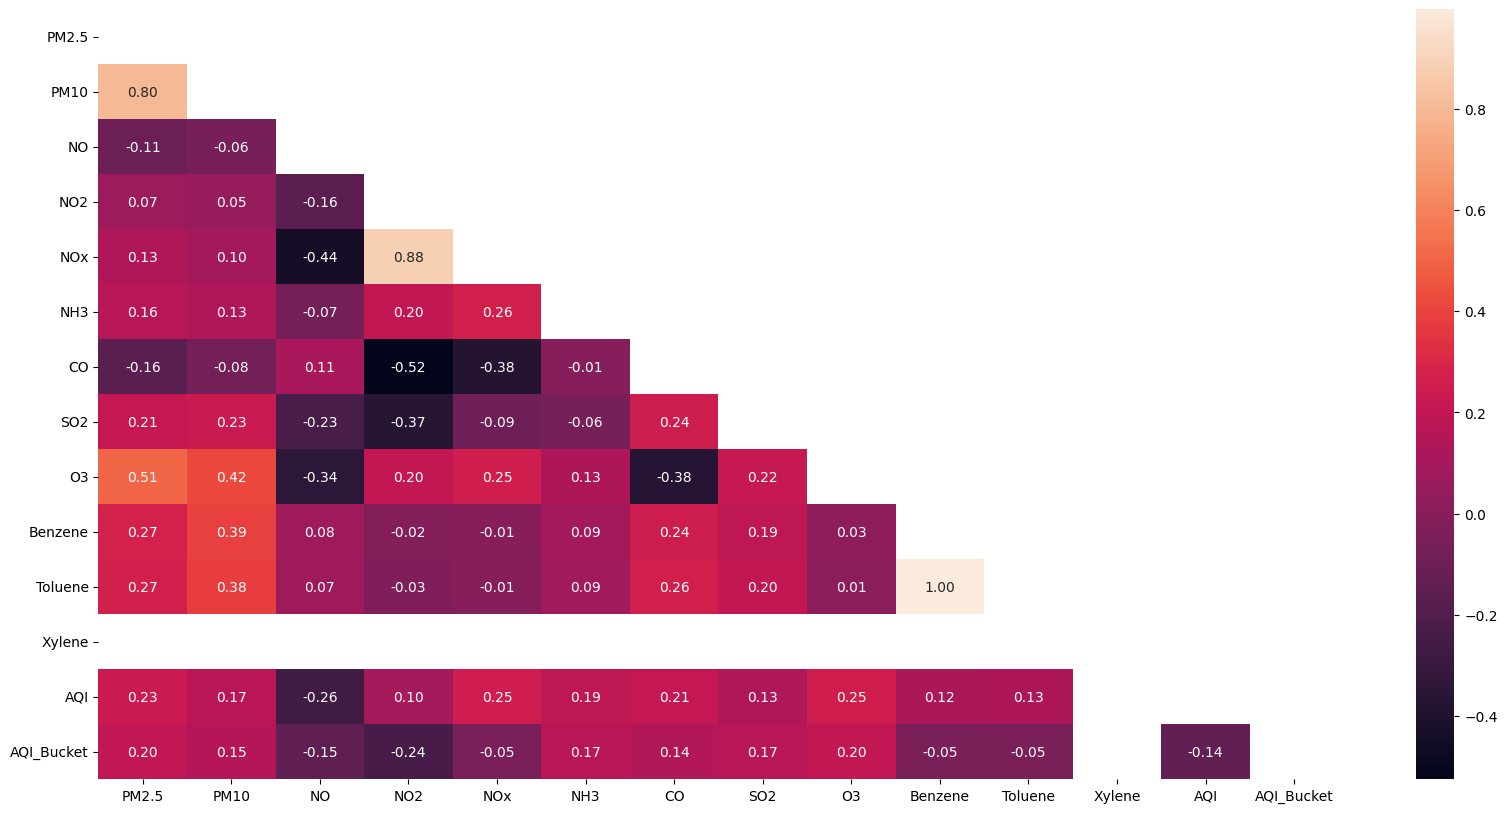

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Coimbatorenew, col))

df_Coimbatorenew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Coimbatorenew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Coimbatorenew[columns_to_scale] = scaler.fit_transform(df_Coimbatorenew[columns_to_scale])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Coimbatorenew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Coimbatorenew:")
print(feature_importance)


Top Features by LDA Importance for df_Coimbatorenew:
    Feature  LDA Importance
4       NOx            2.20
3       NO2            2.12
9   Benzene            1.79
10  Toluene            1.68
8        O3            0.95
6        CO            0.87
0     PM2.5            0.46
7       SO2            0.36
5       NH3            0.34
2        NO            0.24
1      PM10            0.10
11   Xylene            0.00


Explained variance ratio by each principal component:
 [0.26914238 0.2227494  0.1418175  0.12193593 0.0835688  0.05437599
 0.04611044 0.03303641 0.02240694 0.0043803  0.00047593 0.        ]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   3.830284e-01  3.504931e-01 -2.218943e-01  4.094216e-01  4.172308e-01   
PC2   2.439053e-01  3.066164e-01  7.553793e-02 -2.566030e-01 -2.140627e-01   
PC3   2.307714e-01  1.578644e-01 -2.751615e-01 -3.927280e-01 -2.513373e-01   
PC4   3.467061e-01  2.957526e-01  6.069259e-01 -7.394253e-02 -3.695539e-01   
PC5   1.669163e-02  3.006393e-02 -2.318989e-02 -1.318695e-01 -1.199496e-02   
PC6  -2.453370e-01 -4.608757e-01 -4.582027e-02 -1.735725e-01 -2.950101e-01   
PC7  -5.710626e-02 -1.709889e-01  6.366349e-01  1.929594e-01  1.349700e-01   
PC8  -6.598621e-02 -1.134127e-01  2.234103e-01  2.282796e-01  1.377258e-01   
PC9   7.430341e-01 -6.444626e-01 -5.103951e-02  8.365790e

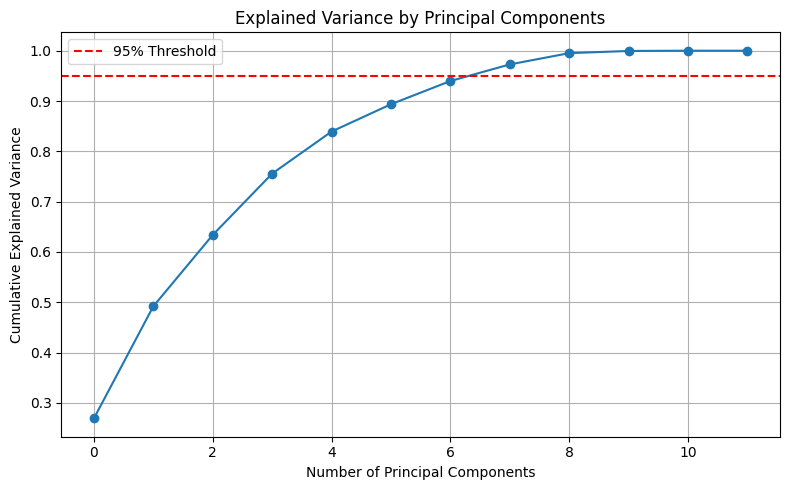

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Coimbatorenew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Coimbatorenew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


Top Features by LDA Importance for df_Coimbatorenew:
    Feature  LDA Importance
4       NOx            2.41
3       NO2            2.08
2        NO            1.05
6        CO            0.91
1      PM10            0.81
8        O3            0.74
0     PM2.5            0.47
9   Benzene            0.16
10  Toluene            0.15
5       NH3            0.15
7       SO2            0.03
11   Xylene            0.00

In [ ]:
x1=df_Coimbatorenew[["NO2","NOx","NO","CO","O3","PM10"]]
y1=df_Coimbatorenew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)"PM2.5","PM10","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene"
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.0467
Root Mean Squared Error (RMSE): 0.2161
R-squared (R2): 0.2618

Test Set Performance:
Mean Squared Error (MSE): 0.0615
Root Mean Squared Error (RMSE): 0.2480
R-squared (R2): 0.1484


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.0515
RMSE: 0.2269
R²: 0.3371

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.0619
RMSE: 0.2488
R²: 0.1429


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.0547
RMSE: 0.2340
R²: 0.2950

XGBoost Test Set Evaluation (Tuned):
MSE: 0.0608
RMSE: 0.2466
R²: 0.1584


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")

In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (172, 6)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.8633 - val_loss: 1.1614
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0238 - val_loss: 1.1430
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9452 - val_loss: 1.1222
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8629 - val_loss: 1.0984
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9434 - val_loss: 1.0729
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6814 - val_loss: 1.0410
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7777 - val_loss: 1.0059
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9458 - val_loss: 0.9665
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6302 - val_loss: 0.9267
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6590 - val_loss: 0.8815
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6319 - val_loss: 0.8403
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6679 - val_loss: 0.8044
Epoch 13/50

ERNAKULAM

In [ ]:
#for Ernakulam
df_Ernakulam=df[df["City"]=="Ernakulam"]
df_Ernakulamnew=df_Ernakulam.drop(["City","Date"],axis=1)
df_Ernakulamnew

PM2.5      PM10            NO       NO2       NOx       NH3  \
12238 -0.649345 -0.650389  5.161103e+00 -1.107046  2.070397  1.872828   
12239  0.210056  0.255176 -1.008888e-16  0.091763  0.177875  0.248973   
12240 -0.544682 -0.938897  5.065124e+00 -1.096096  2.070397  1.872828   
12241 -0.204312 -0.555427  5.086661e+00 -1.104741  2.070397  1.872828   
12242 -0.052048 -0.533922  5.036096e+00 -1.096096  2.070397  1.872828   
...         ...       ...           ...       ...       ...       ...   
12395 -1.375965 -1.924028 -5.798404e-01 -1.429792 -1.359475 -1.520403   
12396 -1.466864 -2.080363 -4.824570e-01 -1.439013 -1.288486 -1.280115   
12397 -1.373671 -1.995792 -5.681357e-01 -1.429216 -1.350999 -1.493914   
12398 -1.383707 -1.868453 -6.449188e-01 -1.418842 -1.407155 -1.689739   
12399 -1.555470 -2.089380 -7.020380e-01 -1.415960 -1.449007 -1.836372   

             CO       SO2        O3   Benzene   Toluene    Xylene  \
12238  0.778864 -1.179396  0.043705 -0.736937 -0.963672 -1.825460   
12239  1.106545  0.364316  0.043705  0.471525  0.335050  0.389732   
12240 -0.091840 -1.162845  0.043705 -0.718633 -0.818450 -1.825460   
12241 -0.038748 -1.160086  0.043705 -0.617960 -0.808318 -1.825460   
12242 -0.006893 -1.151810  0.043705 -0.503558 -0.825204 -1.825460   
...         ...       ...       ...       ...       ...       ...   
12395  1.299163 -1.269051  0.043705 -0.855914 -0.892750 -1.825460   
12396  1.012468 -1.273189  0.043705 -0.906251 -0.968738 -1.825460   
12397  1.277927 -1.262155  0.043705 -0.947435 -1.083565 -1.825460   
12398  1.288545 -1.274568  0.043705 -1.029804 -1.134224 -1.825460   
12399  0.948758 -1.264913  0.043705 -1.029804 -1.134224 -1.825460   

                AQI  AQI_Bucket  
12238  7.777662e-17           1  
12239  7.777662e-17           1  
12240  7.777662e-17           1  
12241 -9.657038e-02           1  
12242 -1.043186e-01           1  
...             ...         ...  
12395 -4.529878e-01           1  
12396 -4.684842e-01           1  
12397 -4.452396e-01           1  
12398 -4.452396e-01           1  
12399 -4.297432e-01           1  

[162 rows x 14 columns]

In [ ]:
df_Ernakulamnew.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
corre=df_Ernakulamnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.967542  0.629453 -0.258124  0.733391  0.129163   
PM10        0.967542  1.000000  0.533179 -0.184709  0.639758  0.134153   
NO          0.629453  0.533179  1.000000 -0.199191  0.917972  0.508340   
NO2        -0.258124 -0.184709 -0.199191  1.000000 -0.207084  0.591765   
NOx         0.733391  0.639758  0.917972 -0.207084  1.000000  0.424182   
NH3         0.129163  0.134153  0.508340  0.591765  0.424182  1.000000   
CO         -0.251905 -0.173740 -0.353950  0.304199 -0.392464 -0.005522   
SO2         0.551768  0.592212  0.075549  0.050811  0.191746  0.012682   
O3               NaN       NaN       NaN       NaN       NaN       NaN   
Benzene     0.663103  0.680214  0.429578 -0.015671  0.577815  0.228556   
Toluene     0.596497  0.629018  0.312353  0.034469  0.447664  0.194392   
Xylene      0.438320  0.488324  0.006883  0.160474  0.118795  0.093365   
AQI         0.344223  0.384378  0.370669  0.055593  0.247075  0.227201   
AQI_Bucket -0.108660 -0.133128 -0.145411 -0.004603 -0.052993 -0.072191   

                  CO       SO2  O3   Benzene   Toluene    Xylene       AQI  \
PM2.5      -0.251905  0.551768 NaN  0.663103  0.596497  0.438320  0.344223   
PM10       -0.173740  0.592212 NaN  0.680214  0.629018  0.488324  0.384378   
NO         -0.353950  0.075549 NaN  0.429578  0.312353  0.006883  0.370669   
NO2         0.304199  0.050811 NaN -0.015671  0.034469  0.160474  0.055593   
NOx        -0.392464  0.191746 NaN  0.577815  0.447664  0.118795  0.247075   
NH3        -0.005522  0.012682 NaN  0.228556  0.194392  0.093365  0.227201   
CO          1.000000  0.074400 NaN  0.002986  0.185634  0.280476  0.416159   
SO2         0.074400  1.000000 NaN  0.512484  0.624757  0.890217  0.255302   
O3               NaN       NaN NaN       NaN       NaN       NaN       NaN   
Benzene     0.002986  0.512484 NaN  1.000000  0.932342  0.636374  0.315221   
Toluene     0.185634  0.624757 NaN  0.932342  1.000000  0.781910  0.378103   
Xylene      0.280476  0.890217 NaN  0.636374  0.781910  1.000000  0.295407   
AQI         0.416159  0.255302 NaN  0.315221  0.378103  0.295407  1.000000   
AQI_Bucket -0.558629 -0.086605 NaN -0.176658 -0.282359 -0.192109 -0.695574   

            AQI_Bucket  
PM2.5        -0.108660  
PM10         -0.133128  
NO           -0.145411  
NO2          -0.004603  
NOx          -0.052993  
NH3          -0.072191  
CO           -0.558629  
SO2          -0.086605  
O3                 NaN  
Benzene      -0.176658  
Toluene      -0.282359  
Xylene       -0.192109  
AQI          -0.695574  
AQI_Bucket    1.000000

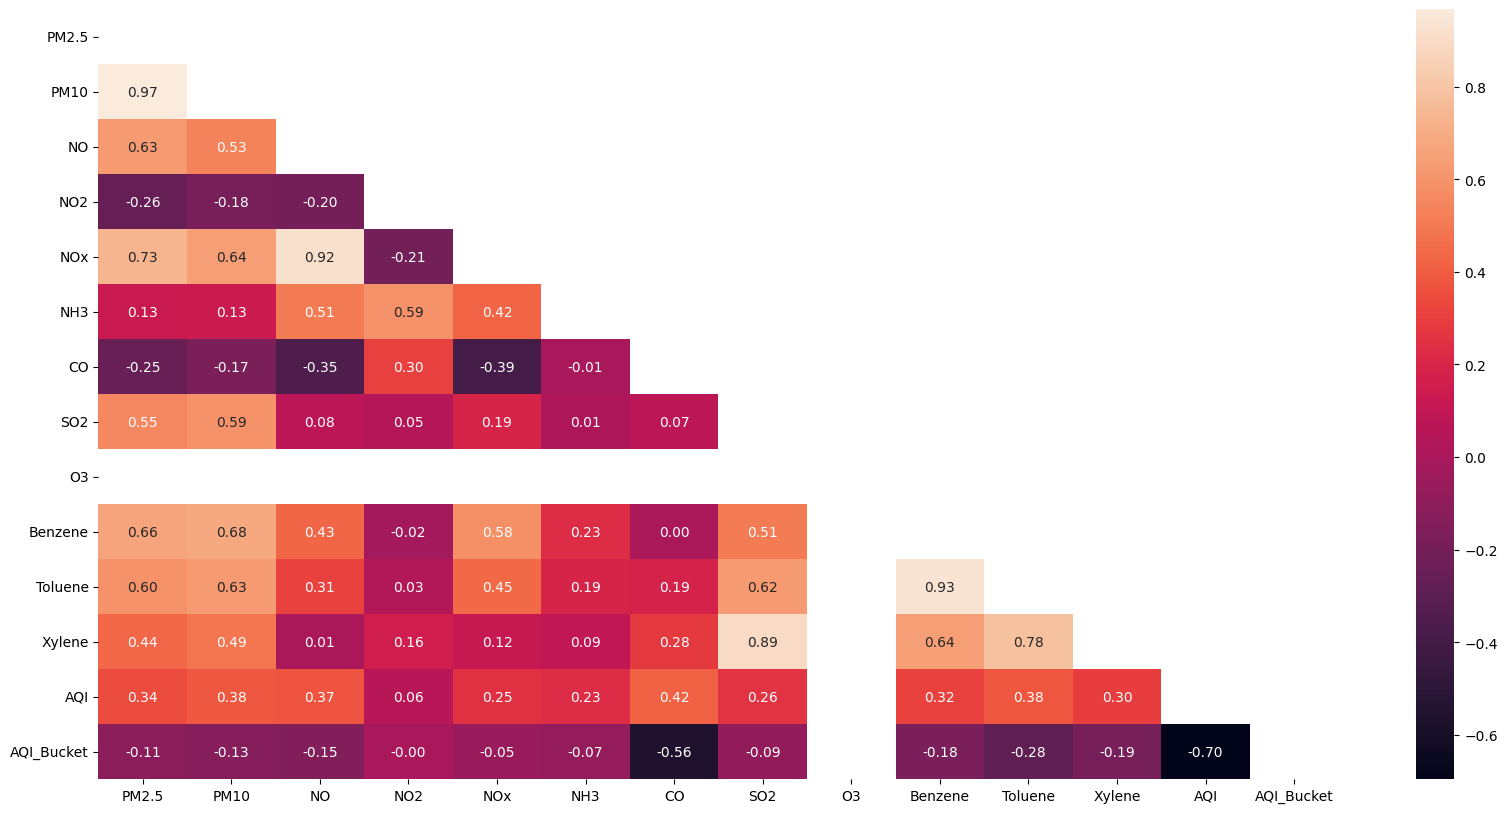

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Ernakulamnew, col))

df_Ernakulamnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Ernakulamnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Ernakulamnew[columns_to_scale] = scaler.fit_transform(df_Ernakulamnew[columns_to_scale])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Ernakulamnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Ernakulamnew:")
print(feature_importance)


Top Features by LDA Importance for df_Ernakulamnew:
    Feature  LDA Importance
2        NO            3.37
6        CO            3.04
10  Toluene            2.59
4       NOx            2.26
11   Xylene            2.18
9   Benzene            1.62
7       SO2            0.91
1      PM10            0.56
5       NH3            0.31
0     PM2.5            0.30
3       NO2            0.01
8        O3            0.00


Explained variance ratio by each principal component:
 [4.70937896e-01 2.03789907e-01 1.61661281e-01 6.74775096e-02
 4.46330675e-02 2.91173668e-02 1.05988408e-02 4.94474153e-03
 3.16513836e-03 2.10553133e-03 1.56871941e-03 2.48523366e-37]

Feature contribution to each principal component:
         PM2.5          PM10            NO           NO2           NOx  \
PC1   0.397004  3.936452e-01  2.722235e-01 -5.632544e-03  3.314595e-01   
PC2  -0.142459 -7.026064e-02 -4.290335e-01  2.872170e-01 -3.810584e-01   
PC3  -0.150418 -1.335316e-01  2.072055e-01  6.201861e-01  1.340008e-01   
PC4  -0.092820 -1.153865e-01  2.211489e-01 -3.075233e-01  1.377112e-01   
PC5  -0.281469 -2.954045e-01 -1.810009e-01  4.562797e-02 -3.871102e-02   
PC6   0.354035  5.273826e-01 -3.944340e-01  2.896992e-01 -1.848372e-01   
PC7   0.026139  1.933091e-01 -4.470299e-02 -4.910499e-01 -4.647749e-01   
PC8  -0.106677  1.499439e-01  6.677099e-01  2.090401e-01 -6.225276e-01   
PC9   0.248831 -6.023382e-02  9.919830e-02  

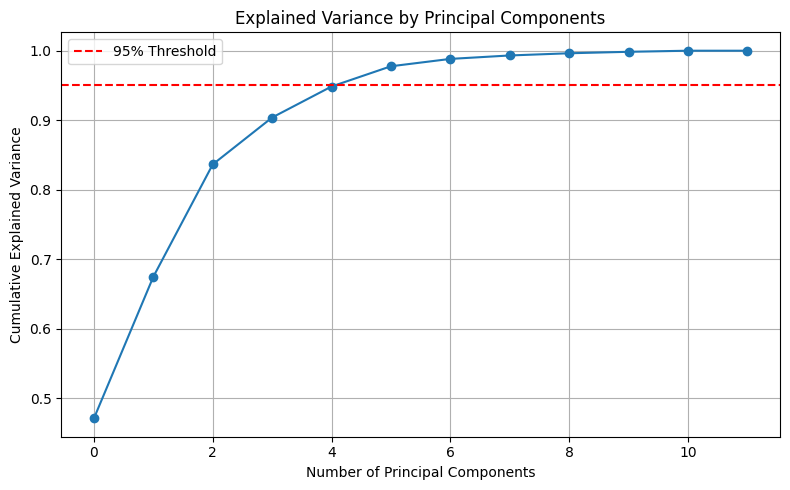

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X =df_Ernakulamnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y =df_Ernakulamnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
    Feature  LDA Importance
2        NO            3.37
6        CO            3.04
10  Toluene            2.59
4       NOx            2.26
11   Xylene            2.18
9   Benzene            1.62
7       SO2            0.91
1      PM10            0.56
5       NH3            0.31
0     PM2.5            0.30
3       NO2            0.01
8        O3            0.00

In [ ]:
x1=df_Ernakulamnew[['CO','NOx','NO','Toluene']]
y1=df_Ernakulamnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.4649
Root Mean Squared Error (RMSE): 0.6818
R-squared (R2): 0.5613

Test Set Performance:
Mean Squared Error (MSE): 0.2797
Root Mean Squared Error (RMSE): 0.5289
R-squared (R2): 0.6221


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.9405
RMSE: 0.9698
R²: 0.0697

XGBoost Test Set Evaluation (Tuned):
MSE: 0.3318
RMSE: 0.5760
R²: 0.5518


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.8282
RMSE: 0.9100
R²: 0.1809

Random Forest Test Set Evaluation for Model3
MSE: 0.1328
RMSE: 0.3644
R²: 0.8206


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 1.0389
RMSE: 1.0193
R²: -0.0276

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2622
RMSE: 0.5120
R²: 0.6458


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.8764
RMSE: 0.9362
R²: 0.1331

Random Forest Test Set Evaluation (Tuned):
MSE: 0.2117
RMSE: 0.4601
R²: 0.7140


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (76, 6)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - loss: 0.6513 - val_loss: 1.2045
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7084 - val_loss: 1.2005
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6329 - val_loss: 1.1960
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6192 - val_loss: 1.1920
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6048 - val_loss: 1.1881
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6112 - val_loss: 1.1841
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5495 - val_loss: 1.1804
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5909 - val_loss: 1.1765
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5379 - val_loss: 1.1723
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5679 - val_loss: 1.1683
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4719 - val_loss: 1.1644
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4677 - val_loss: 1.1617
Epoch 13/50

GURUGRAM

In [ ]:
#for Gurugram
df_Gurugram=df[df["City"]=="Gurugram"]
df_Gurugramnew=df_Gurugram.drop(["City","Date"],axis=1)
df_Gurugramnew

PM2.5          PM10        NO       NO2       NOx           NH3  \
12400  0.000000 -1.987539e-16 -0.575627 -0.880125 -0.775618 -1.715374e-16   
12401  0.000000 -1.987539e-16 -0.602314 -0.896254 -0.769819 -1.715374e-16   
12402  0.000000 -1.987539e-16 -0.677692 -0.894510 -0.805634 -1.715374e-16   
12403  0.000000 -1.987539e-16 -0.640237 -0.887100 -0.776641 -1.715374e-16   
12404  0.000000 -1.987539e-16 -0.665519 -0.890587 -0.799835 -1.715374e-16   
...         ...           ...       ...       ...       ...           ...   
14074 -0.330406  5.587838e-01 -0.676756 -0.894074 -0.855093 -9.730799e-01   
14075 -0.045959  8.142429e-01 -0.559708 -0.824329 -0.796083 -9.682515e-01   
14076 -0.346059  5.017206e-01 -0.635555 -0.853971 -0.772889 -9.865993e-01   
14077 -0.339663 -5.366597e-02 -0.528340 -0.792508 -0.690003 -9.793567e-01   
14078 -0.097799  7.825608e-01 -0.542385 -0.783790 -0.680111 -9.933589e-01   

             CO       SO2        O3       Benzene   Toluene        Xylene  \
12400  0.094020  0.082089 -1.415032 -3.121646e-17  0.000000  1.129320e-16   
12401 -0.264844 -0.517599 -1.307409 -3.121646e-17  0.000000  1.129320e-16   
12402 -0.086157 -0.548352 -0.891303 -3.121646e-17  0.000000  1.129320e-16   
12403 -0.118916 -0.415285 -1.398665 -3.121646e-17  0.000000  1.129320e-16   
12404 -0.118916 -0.639429 -1.189868 -3.121646e-17  0.000000  1.129320e-16   
...         ...       ...       ...           ...       ...           ...   
14074 -0.236552 -0.316520 -0.741524 -7.878748e-02 -0.230179  4.082007e-01   
14075 -0.235063 -0.396952 -0.853610 -4.434380e-02 -0.300037  4.082007e-01   
14076 -0.249954 -0.394586  0.099616 -6.613470e-02 -0.285361  4.082007e-01   
14077 -0.218683 -0.424156  1.169392 -6.191710e-02 -0.258357  4.082007e-01   
14078 -0.169544 -0.411737  0.478526 -4.293793e-02 -0.248964  4.082007e-01   

                AQI  AQI_Bucket  
12400  2.202172e-16           1  
12401  2.202172e-16           1  
12402  2.202172e-16           1  
12403  2.202172e-16           1  
12404  2.202172e-16           1  
...             ...         ...  
14074 -3.522611e-01           1  
14075 -1.043186e-01           1  
14076 -2.050452e-01           1  
14077 -2.747791e-01           1  
14078 -7.332576e-02           1  

[1679 rows x 14 columns]

In [ ]:
corre=df_Gurugramnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.466574  0.253822  0.225669  0.435542 -0.036944   
PM10        0.466574  1.000000  0.365997  0.397052  0.492471 -0.103459   
NO          0.253822  0.365997  1.000000  0.557544  0.683797  0.000762   
NO2         0.225669  0.397052  0.557544  1.000000  0.637609  0.029502   
NOx         0.435542  0.492471  0.683797  0.637609  1.000000  0.008453   
NH3        -0.036944 -0.103459  0.000762  0.029502  0.008453  1.000000   
CO          0.335210  0.142616  0.134055  0.126346  0.246768 -0.002100   
SO2         0.085071  0.083782  0.148528  0.179926  0.147807  0.145533   
O3         -0.107903  0.031300 -0.087429  0.104867 -0.058898 -0.025020   
Benzene    -0.152682 -0.067960  0.017623 -0.024202 -0.168433  0.003137   
Toluene     0.106067 -0.114146 -0.090105 -0.139997 -0.062338  0.025370   
Xylene     -0.006819 -0.006366  0.000937  0.015036  0.021293  0.404111   
AQI         0.840500  0.351322  0.211289  0.185136  0.373799 -0.036576   
AQI_Bucket  0.583297  0.098923  0.156427  0.074986  0.273323  0.031433   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.335210  0.085071 -0.107903 -0.152682  0.106067 -0.006819   
PM10        0.142616  0.083782  0.031300 -0.067960 -0.114146 -0.006366   
NO          0.134055  0.148528 -0.087429  0.017623 -0.090105  0.000937   
NO2         0.126346  0.179926  0.104867 -0.024202 -0.139997  0.015036   
NOx         0.246768  0.147807 -0.058898 -0.168433 -0.062338  0.021293   
NH3        -0.002100  0.145533 -0.025020  0.003137  0.025370  0.404111   
CO          1.000000  0.119451 -0.209117  0.171032  0.326864  0.013091   
SO2         0.119451  1.000000  0.133358  0.048848 -0.090818  0.100658   
O3         -0.209117  0.133358  1.000000  0.088010 -0.313809 -0.118794   
Benzene     0.171032  0.048848  0.088010  1.000000  0.515413 -0.061242   
Toluene     0.326864 -0.090818 -0.313809  0.515413  1.000000  0.060767   
Xylene      0.013091  0.100658 -0.118794 -0.061242  0.060767  1.000000   
AQI         0.343377  0.069783 -0.106690 -0.115161  0.118176 -0.024635   
AQI_Bucket  0.214108  0.054525 -0.176892 -0.144514  0.072415  0.015805   

                 AQI  AQI_Bucket  
PM2.5       0.840500    0.583297  
PM10        0.351322    0.098923  
NO          0.211289    0.156427  
NO2         0.185136    0.074986  
NOx         0.373799    0.273323  
NH3        -0.036576    0.031433  
CO          0.343377    0.214108  
SO2         0.069783    0.054525  
O3         -0.106690   -0.176892  
Benzene    -0.115161   -0.144514  
Toluene     0.118176    0.072415  
Xylene     -0.024635    0.015805  
AQI         1.000000    0.663317  
AQI_Bucket  0.663317    1.000000

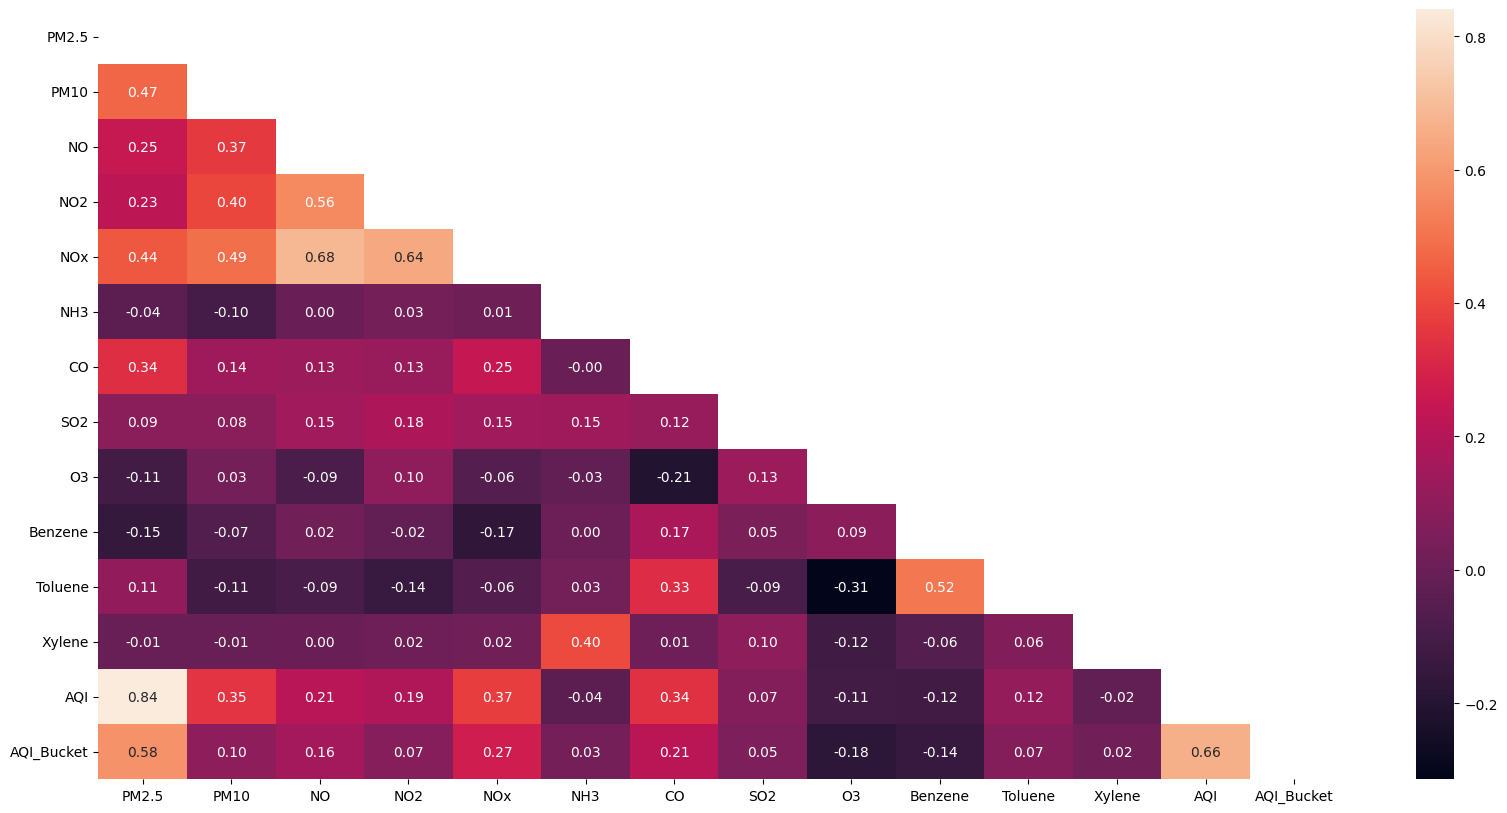

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [2.59263797e-01 1.99255211e-01 1.16236293e-01 9.95989045e-02
 9.22710414e-02 7.25545267e-02 6.20685914e-02 4.96583156e-02
 2.95275788e-02 1.95657408e-02 2.21729201e-17 7.84339251e-91]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   3.196277e-01  4.001607e-01  3.948768e-01  4.345479e-01  5.033612e-01   
PC2  -1.158817e-01 -3.558902e-02  2.710836e-01  2.196749e-01 -3.964688e-02   
PC3   2.786888e-01 -4.840057e-02 -2.740889e-01 -1.016255e-01 -2.127837e-01   
PC4   5.692009e-01  4.705281e-01 -8.133270e-02 -2.332694e-01 -2.628195e-01   
PC5   3.005211e-01 -2.551846e-01 -1.184079e-01 -1.412958e-01 -6.258384e-02   
PC6   2.747229e-03  4.303353e-01  3.067009e-01 -3.305811e-01 -2.215428e-01   
PC7  -4.520188e-01  1.225567e-01  4.253329e-01 -3.658360e-01 -1.572212e-01   
PC8  -3.841487e-01  5.100912e-01 -4.909136e-01  4.436688e-01 -2.750694e-01   
PC9  -2.

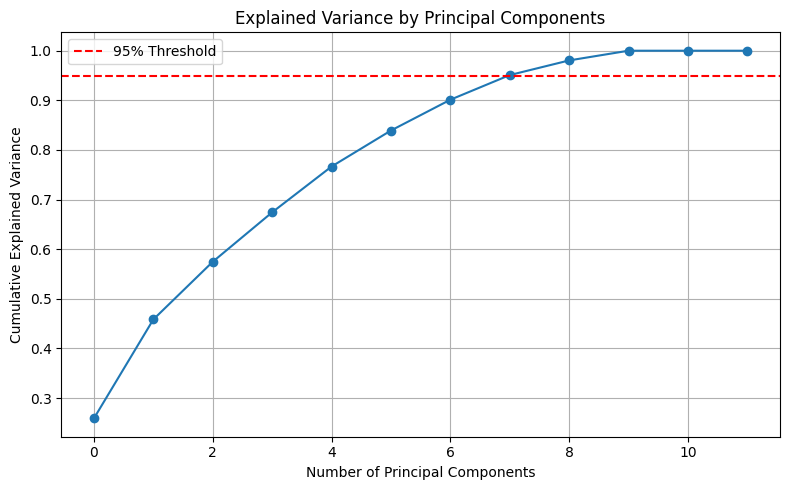

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Gurugramnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Gurugramnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean =df_Gurugramnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Gurugramnew:")
print(feature_importance)


Top Features by LDA Importance for df_Gurugramnew:
    Feature  LDA Importance
0     PM2.5            3.76
1      PM10            0.39
10  Toluene            0.27
3       NO2            0.22
4       NOx            0.21
9   Benzene            0.18
6        CO            0.17
8        O3            0.16
7       SO2            0.13
2        NO            0.12
5       NH3            0.00
11   Xylene            0.00


In [ ]:
x1=df_Gurugramnew[["PM2.5","PM10","SO2","NO","NH3","Xylene","NO2", "NOx","CO","O3", "Benzene","Toluene"]]
y1=df_Gurugramnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2084
Root Mean Squared Error (RMSE): 0.4565
R-squared (R2): 0.6974

Test Set Performance:
Mean Squared Error (MSE): 0.1529
Root Mean Squared Error (RMSE): 0.3910
R-squared (R2): 0.7341


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2143
RMSE: 0.4630
R²: 0.6840

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1483
RMSE: 0.3851
R²: 0.7421


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2085
RMSE: 0.4566
R²: 0.6927

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1877
RMSE: 0.4333
R²: 0.6735


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2149
RMSE: 0.4636
R²: 0.6832

Random Forest Test Set Evaluation for Model3
MSE: 0.1585
RMSE: 0.3982
R²: 0.7243


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.2040
RMSE: 0.4517
R²: 0.7269

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1377
RMSE: 0.3711
R²: 0.8098


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.2089
RMSE: 0.4571
R²: 0.7203
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.1418
RMSE: 0.3765
R²: 0.8042


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1007, 12)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0134 - val_loss: 0.7132
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7213 - val_loss: 0.5352
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4989 - val_loss: 0.4095
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3595 - val_loss: 0.2892
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2682 - val_loss: 0.2372
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2548 - val_loss: 0.2185
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2906 - val_loss: 0.2178
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2260 - val_loss: 0.2178
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1853 - val_loss: 0.2139
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1974 - val_loss: 0.2149
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2069 - val_loss: 0.2082
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2271 - val_loss: 0.2102

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation - MSE: 0.2044, RMSE: 0.4521, R²: 0.7264
Test - MSE: 0.1398, RMSE: 0.3739, R²: 0.8069


GUWAHATI

In [ ]:
#for Guwahati
df_Guwahati=df[df["City"]=="Guwahati"]
df_Guwahatinew=df_Guwahati.drop(["City","Date"],axis=1)
df_Guwahatinew

PM2.5      PM10            NO       NO2       NOx           NH3  \
14079  0.964755  0.814243 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
14080 -0.279913 -0.001638 -6.341505e-01 -0.839586 -0.537193  2.779450e-01   
14081 -0.153847 -0.457863 -6.510053e-01 -0.773328 -0.500696  5.626183e-03   
14082 -0.127422 -0.560661 -6.748830e-01 -0.824329 -0.573008 -2.150293e-01   
14083 -0.199291 -0.360380 -6.875241e-01 -0.734532 -0.511952 -3.284955e-01   
...         ...       ...           ...       ...       ...           ...   
14576 -0.835342 -1.292552 -7.151473e-01 -0.880125 -0.904892 -9.962560e-01   
14577 -0.816323 -1.249474 -7.614981e-01 -0.891023 -0.934226 -1.021846e+00   
14578 -0.775423 -1.188635 -7.263839e-01 -0.966871 -0.943436 -9.643889e-01   
14579 -0.793264 -1.197446 -7.394932e-01 -1.022231 -0.971747 -9.706657e-01   
14580 -0.462026 -0.910872 -7.970805e-01 -0.957717 -0.979592 -8.914808e-01   

                 CO       SO2            O3       Benzene  Toluene  \
14079 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
14080 -2.633552e-01 -0.029687 -8.342680e-01 -1.554071e-01      0.0   
14081 -2.648442e-01 -0.003665 -3.181209e-02 -1.687628e-01      0.0   
14082 -2.588880e-01  0.111659  3.342030e-01 -1.603276e-01      0.0   
14083 -2.618661e-01  0.741509  5.157227e-01 -1.617335e-01      0.0   
...             ...       ...           ...           ...      ...   
14576 -2.588880e-01  0.092143 -6.443171e-01 -2.306208e-01      0.0   
14577 -2.693114e-01  0.081497 -3.536872e-01 -2.306208e-01      0.0   
14578 -2.663333e-01  0.066712 -3.655901e-01 -2.306208e-01      0.0   
14579 -2.708005e-01  0.076766 -5.014819e-01 -2.306208e-01      0.0   
14580 -2.439974e-01  0.090960 -6.532443e-01 -2.306208e-01      0.0   

             Xylene           AQI  AQI_Bucket  
14079  1.129320e-16  2.202172e-16           1  
14080  1.129320e-16 -5.769590e-01           3  
14081  1.129320e-16 -3.445129e-01           1  
14082  1.129320e-16 -6.699375e-01           3  
14083  1.129320e-16 -4.762324e-01           1  
...             ...           ...         ...  
14576  1.129320e-16 -1.018607e+00           0  
14577  1.129320e-16 -1.010858e+00           0  
14578  1.129320e-16 -9.178800e-01           0  
14579  1.129320e-16 -9.876139e-01           0  
14580  1.129320e-16 -1.010858e+00           0  

[502 rows x 14 columns]

In [ ]:
corre=df_Guwahatinew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.901757  0.763726  0.556062  0.748761  0.720919   
PM10        0.901757  1.000000  0.708093  0.572855  0.720573  0.628332   
NO          0.763726  0.708093  1.000000  0.515115  0.881442  0.437688   
NO2         0.556062  0.572855  0.515115  1.000000  0.596202  0.418712   
NOx         0.748761  0.720573  0.881442  0.596202  1.000000  0.438796   
NH3         0.720919  0.628332  0.437688  0.418712  0.438796  1.000000   
CO          0.808138  0.691301  0.823867  0.429938  0.768180  0.530178   
SO2         0.095263  0.056420 -0.120066  0.205190 -0.072351  0.386077   
O3         -0.077477 -0.073308 -0.252017 -0.003526 -0.257519  0.112450   
Benzene     0.144840  0.150043  0.190547  0.051419  0.227692  0.177332   
Toluene          NaN       NaN       NaN       NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.789736  0.822439  0.650790  0.423496  0.617630  0.597447   
AQI_Bucket  0.518781  0.434404  0.439702  0.285071  0.431840  0.364917   

                  CO       SO2        O3   Benzene  Toluene  Xylene       AQI  \
PM2.5       0.808138  0.095263 -0.077477  0.144840      NaN     NaN  0.789736   
PM10        0.691301  0.056420 -0.073308  0.150043      NaN     NaN  0.822439   
NO          0.823867 -0.120066 -0.252017  0.190547      NaN     NaN  0.650790   
NO2         0.429938  0.205190 -0.003526  0.051419      NaN     NaN  0.423496   
NOx         0.768180 -0.072351 -0.257519  0.227692      NaN     NaN  0.617630   
NH3         0.530178  0.386077  0.112450  0.177332      NaN     NaN  0.597447   
CO          1.000000  0.011571 -0.164926  0.191378      NaN     NaN  0.700764   
SO2         0.011571  1.000000  0.678658 -0.016145      NaN     NaN  0.055060   
O3         -0.164926  0.678658  1.000000 -0.056893      NaN     NaN -0.054232   
Benzene     0.191378 -0.016145 -0.056893  1.000000      NaN     NaN  0.152407   
Toluene          NaN       NaN       NaN       NaN      NaN     NaN       NaN   
Xylene           NaN       NaN       NaN       NaN      NaN     NaN       NaN   
AQI         0.700764  0.055060 -0.054232  0.152407      NaN     NaN  1.000000   
AQI_Bucket  0.540440  0.085391  0.080904  0.014251      NaN     NaN  0.570216   

            AQI_Bucket  
PM2.5         0.518781  
PM10          0.434404  
NO            0.439702  
NO2           0.285071  
NOx           0.431840  
NH3           0.364917  
CO            0.540440  
SO2           0.085391  
O3            0.080904  
Benzene       0.014251  
Toluene            NaN  
Xylene             NaN  
AQI           0.570216  
AQI_Bucket    1.000000

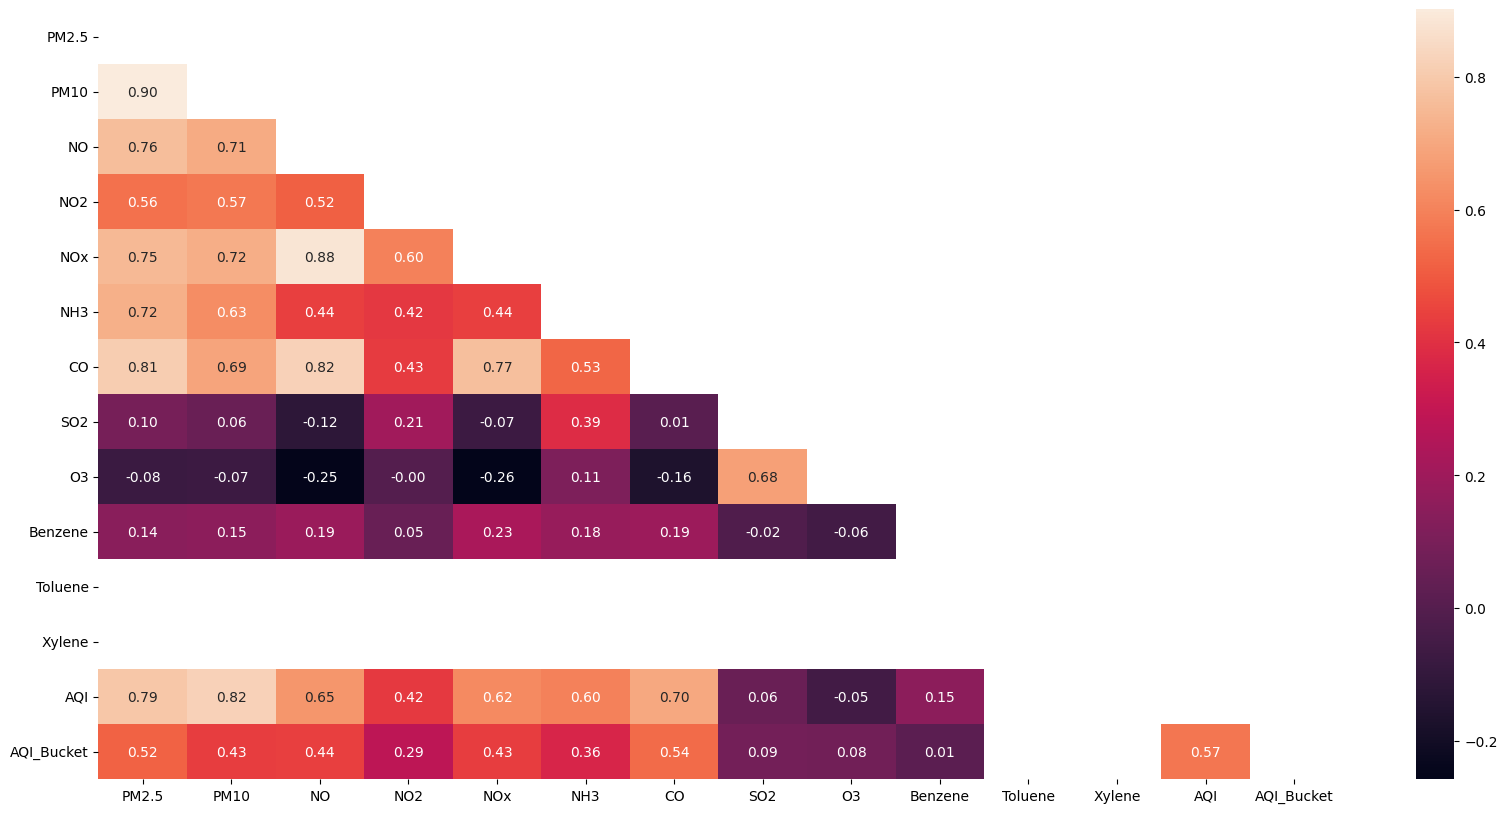

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Guwahatinew, col))

df_Guwahatinew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Guwahatinew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Guwahatinew[columns_to_scale] = scaler.fit_transform(df_Guwahatinew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.51292869 0.19352174 0.08338955 0.06981583 0.05069717 0.03701883
 0.02118701 0.01708853 0.00823854 0.0061141  0.         0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.401421  0.382166  0.390870  0.300495  0.392507  0.289958  0.399386   
PC2   0.102475  0.054253 -0.140441  0.177193 -0.148414  0.293509  0.003312   
PC3  -0.153823 -0.172389  0.014841 -0.249482 -0.010700  0.030321  0.035542   
PC4   0.292970  0.234187 -0.207875 -0.536626 -0.351376  0.592274 -0.018709   
PC5  -0.131225 -0.021476 -0.343153  0.620597 -0.122424  0.355083 -0.322766   
PC6   0.197754  0.584423 -0.240576  0.176654 -0.153184 -0.369657 -0.272699   
PC7   0.150672  0.286419 -0.219973 -0.111419 -0.228881 -0.432995  0.292648   
PC8   0.189674 -0.383053 -0.363359  0.253075 -0.268655 -0.044958  0.647484   
PC9  -0.336702  0.217604 -0.602995 -0.166621  0.624448  0

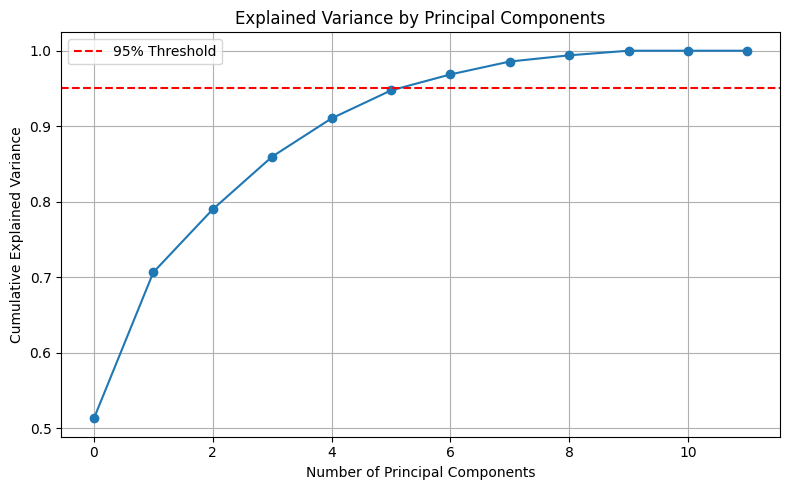

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Guwahatinew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Guwahatinew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean =df_Guwahatinew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for :")
print(feature_importance)


Top Features by LDA Importance for :
    Feature  LDA Importance
1      PM10            6.37
0     PM2.5            4.98
5       NH3            1.55
6        CO            1.42
4       NOx            1.16
8        O3            0.85
2        NO            0.82
7       SO2            0.47
9   Benzene            0.39
3       NO2            0.31
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Guwahatinew[["PM2.5", "PM10", "NO",  "NOx", "NH3", "CO", "SO2", "O3"]]
y1=df_Guwahatinew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3191
Root Mean Squared Error (RMSE): 0.5649
R-squared (R2): 0.7175

Test Set Performance:
Mean Squared Error (MSE): 0.1482
Root Mean Squared Error (RMSE): 0.3849
R-squared (R2): 0.8172


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2055
RMSE: 0.4533
R²: 0.7406

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1337
RMSE: 0.3656
R²: 0.8351


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2664
RMSE: 0.5161
R²: 0.6637

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1488
RMSE: 0.3857
R²: 0.8164


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2215
RMSE: 0.4706
R²: 0.7204

Random Forest Test Set Evaluation for Model3
MSE: 0.1344
RMSE: 0.3667
R²: 0.8341


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1993
RMSE: 0.4464
R²: 0.7484

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1098
RMSE: 0.3314
R²: 0.8645


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1622
RMSE: 0.4027
R²: 0.7953
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1037
RMSE: 0.3220
R²: 0.8721


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (224, 9)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.8398 - val_loss: 0.7262
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9371 - val_loss: 0.6695
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.8914 - val_loss: 0.6029
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8460 - val_loss: 0.5222
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5525 - val_loss: 0.4347
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8419 - val_loss: 0.3540
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5098 - val_loss: 0.2978
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6590 - val_loss: 0.2697
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4948 - val_loss: 0.2428
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5534 - val_loss: 0.2146
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3984 - val_loss: 0.1922
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3817 - val_loss: 0.1771
Epoch 13/50

hyderabad

In [ ]:
#for Hyderabad
df_Hyderabad=df[df["City"]=="Hyderabad"]
df_Hyderabadnew=df_Hyderabad.drop(["City","Date"],axis=1)
df_Hyderabadnew

PM2.5          PM10        NO       NO2       NOx           NH3  \
14581  0.000000 -1.987539e-16 -0.649601 -0.495655 -0.389499 -1.715374e-16   
14582  0.000000 -1.987539e-16 -0.653814 -0.822586 -0.648390 -1.715374e-16   
14583  0.000000 -1.987539e-16 -0.625723 -0.285112 -0.207355 -1.715374e-16   
14584  0.000000 -1.987539e-16  0.398208  0.502136  1.154292 -1.715374e-16   
14585  0.000000 -1.987539e-16 -0.340127  0.194386  0.375915 -1.715374e-16   
...         ...           ...       ...       ...       ...           ...   
16582 -0.743276 -1.033949e+00 -0.524126 -0.258086 -0.577101 -6.828962e-01   
16583 -0.869341 -1.202062e+00 -0.551749 -0.254163 -0.594156 -5.984001e-01   
16584 -0.794611 -1.026397e+00 -0.637428 -0.042312 -0.519115 -5.018332e-01   
16585 -0.809086 -1.065418e+00 -0.699697 -0.173520 -0.604388 -6.124023e-01   
16586 -0.683693 -7.220600e-01 -0.685183 -0.060184 -0.551860 -6.838619e-01   

             CO       SO2        O3   Benzene   Toluene    Xylene  \
14581 -0.290158 -0.706849 -0.205892 -0.201801 -0.149753 -0.498461   
14582 -0.300582 -0.552492 -0.159273 -0.203206 -0.086940 -0.640869   
14583 -0.288669 -0.321843 -0.294173 -0.194068 -0.209045 -0.645955   
14584 -0.255910 -0.325391 -0.169192 -0.095658  0.449032 -0.236532   
14585 -0.269311 -0.358510  0.060932 -0.097767  0.326927 -0.378940   
...         ...       ...       ...       ...       ...       ...   
16582 -0.281224 -0.540664 -0.509417 -0.168763 -0.116292 -0.539149   
16583 -0.281224 -0.483297 -0.607120 -0.172980 -0.130381 -0.498461   
16584 -0.278246 -0.487437 -0.719702 -0.138537  0.124983 -0.091581   
16585 -0.276757 -0.545986 -0.847659 -0.128696  0.256481 -0.142441   
16586 -0.270800 -0.500448 -1.055960 -0.138537  0.458425 -0.114468   

                AQI  AQI_Bucket  
14581  2.202172e-16           1  
14582  2.202172e-16           1  
14583  2.202172e-16           1  
14584  2.202172e-16           1  
14585  2.202172e-16           1  
...             ...         ...  
16582 -8.403980e-01           3  
16583 -9.101318e-01           0  
16584 -9.256282e-01           0  
16585 -9.333764e-01           0  
16586 -9.178800e-01           0  

[2006 rows x 14 columns]

In [ ]:
corre=df_Hyderabadnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.679721  0.256535  0.292537  0.364736  0.231456   
PM10        0.679721  1.000000  0.259541  0.409567  0.437681  0.420395   
NO          0.256535  0.259541  1.000000  0.289450  0.495201  0.310781   
NO2         0.292537  0.409567  0.289450  1.000000  0.476239  0.373648   
NOx         0.364736  0.437681  0.495201  0.476239  1.000000  0.277699   
NH3         0.231456  0.420395  0.310781  0.373648  0.277699  1.000000   
CO          0.300384  0.305918  0.098165 -0.056039  0.467831  0.066838   
SO2         0.333511  0.414274  0.316205  0.517893  0.114206  0.380413   
O3          0.340343  0.300196  0.016251  0.357279  0.001141  0.078957   
Benzene     0.288505  0.411166  0.134362  0.260352  0.529012 -0.021448   
Toluene     0.328850  0.403056  0.106361  0.361141  0.600118 -0.075863   
Xylene      0.214607  0.356977  0.157681  0.339173  0.466970  0.023193   
AQI         0.761989  0.588434  0.242235  0.103035  0.246301  0.281489   
AQI_Bucket -0.253586 -0.334695 -0.077954 -0.160311 -0.159820 -0.174883   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.300384  0.333511  0.340343  0.288505  0.328850  0.214607   
PM10        0.305918  0.414274  0.300196  0.411166  0.403056  0.356977   
NO          0.098165  0.316205  0.016251  0.134362  0.106361  0.157681   
NO2        -0.056039  0.517893  0.357279  0.260352  0.361141  0.339173   
NOx         0.467831  0.114206  0.001141  0.529012  0.600118  0.466970   
NH3         0.066838  0.380413  0.078957 -0.021448 -0.075863  0.023193   
CO          1.000000  0.010973 -0.047551  0.386750  0.339453  0.271464   
SO2         0.010973  1.000000  0.367699  0.173124  0.135697  0.201664   
O3         -0.047551  0.367699  1.000000  0.067107  0.055551  0.051120   
Benzene     0.386750  0.173124  0.067107  1.000000  0.865566  0.775544   
Toluene     0.339453  0.135697  0.055551  0.865566  1.000000  0.764322   
Xylene      0.271464  0.201664  0.051120  0.775544  0.764322  1.000000   
AQI         0.356159  0.217009  0.260709  0.164221  0.163003  0.115019   
AQI_Bucket -0.107035 -0.230991 -0.165827 -0.143287 -0.121446 -0.133577   

                 AQI  AQI_Bucket  
PM2.5       0.761989   -0.253586  
PM10        0.588434   -0.334695  
NO          0.242235   -0.077954  
NO2         0.103035   -0.160311  
NOx         0.246301   -0.159820  
NH3         0.281489   -0.174883  
CO          0.356159   -0.107035  
SO2         0.217009   -0.230991  
O3          0.260709   -0.165827  
Benzene     0.164221   -0.143287  
Toluene     0.163003   -0.121446  
Xylene      0.115019   -0.133577  
AQI         1.000000   -0.141339  
AQI_Bucket -0.141339    1.000000

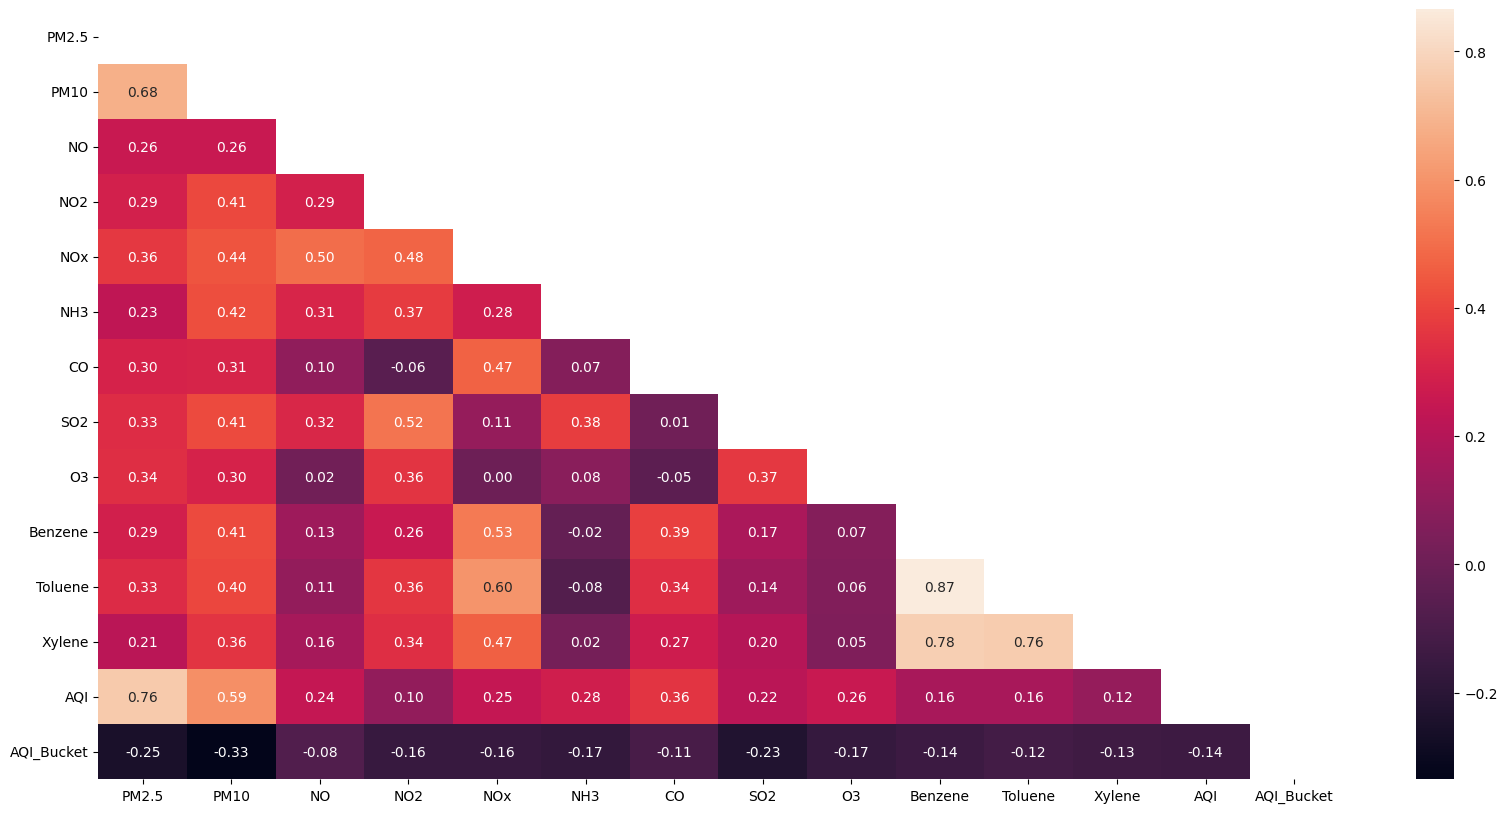

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Hyderabadnew, col))

df_Hyderabadnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Hyderabadnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Hyderabadnew[columns_to_scale] = scaler.fit_transform(df_Hyderabadnew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.34235858 0.14538699 0.10597629 0.09446513 0.08563491 0.05779572
 0.05292141 0.04119672 0.02726754 0.01952532 0.01631724 0.01115416]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.343708  0.386153  0.109286  0.216354  0.365557  0.198259  0.296465   
PC2  -0.193650 -0.192213 -0.372445 -0.336746 -0.095708 -0.361741  0.205433   
PC3   0.184880  0.021390 -0.454737  0.310752 -0.122006 -0.336797 -0.101495   
PC4   0.303190  0.221209 -0.304544 -0.304762  0.189596  0.149955  0.460484   
PC5   0.248227  0.210162  0.161787 -0.493809 -0.414748 -0.303403  0.179714   
PC6  -0.194574  0.115165 -0.573817 -0.073439 -0.276645  0.626493 -0.033581   
PC7  -0.296278 -0.299292 -0.191929  0.262639  0.289477 -0.190268  0.521606   
PC8  -0.353825 -0.200448  0.329425 -0.236274  0.085882  0.196124  0.331064   
PC9   0.170182  0.136474 -0.031808  0.120646 -0.060774 -0

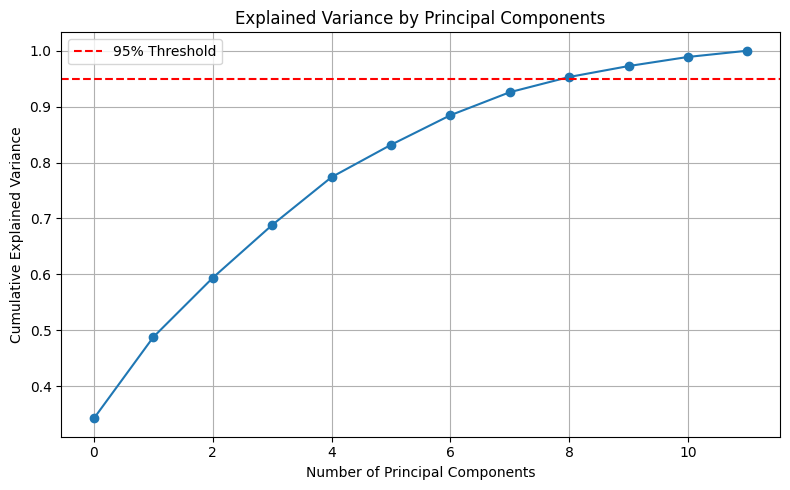

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Hyderabadnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Hyderabadnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Hyderabadnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Hyderabadnew:")
print(feature_importance)


Top Features by LDA Importance for df_Hyderabadnew:
    Feature  LDA Importance
0     PM2.5            2.34
1      PM10            0.86
9   Benzene            0.82
4       NOx            0.81
8        O3            0.80
6        CO            0.78
5       NH3            0.61
3       NO2            0.60
10  Toluene            0.44
2        NO            0.39
7       SO2            0.23
11   Xylene            0.12


In [ ]:
x1=df_Hyderabadnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y1=df_Hyderabadnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2854
Root Mean Squared Error (RMSE): 0.5342
R-squared (R2): 0.7076

Test Set Performance:
Mean Squared Error (MSE): 0.2508
Root Mean Squared Error (RMSE): 0.5008
R-squared (R2): 0.7546


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.3122
RMSE: 0.5588
R²: 0.7026

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2517
RMSE: 0.5017
R²: 0.7536


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2828
RMSE: 0.5318
R²: 0.7306

XGBoost Test Set Evaluation (Tuned):
MSE: 0.2534
RMSE: 0.5034
R²: 0.7520


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2728
RMSE: 0.5224
R²: 0.7401

Random Forest Test Set Evaluation for Model3
MSE: 0.2814
RMSE: 0.5304
R²: 0.7246


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.2734
RMSE: 0.5228
R²: 0.7396

Random Forest Test Set Evaluation (Tuned):
MSE: 0.2435
RMSE: 0.4935
R²: 0.7617


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.2640
RMSE: 0.5138
R²: 0.7485
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.2340
RMSE: 0.4837
R²: 0.7710


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (925, 12)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.8228 - val_loss: 0.7813
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6751 - val_loss: 0.5087
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3630 - val_loss: 0.3803
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2873 - val_loss: 0.3301
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2925 - val_loss: 0.3113
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2191 - val_loss: 0.3000
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2752 - val_loss: 0.2953
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2317 - val_loss: 0.2911
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1977 - val_loss: 0.2846
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2109 - val_loss: 0.2833
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2184 - val_loss: 0.2828
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2048 - val_loss: 0.2792

JAIPUR

In [ ]:
#for Jaipur
df_Jaipur=df[df["City"]=="Jaipur"]
df_Jaipurnew=df_Jaipur.drop(["City","Date"],axis=1)
df_Jaipurnew

PM2.5          PM10            NO       NO2       NOx           NH3  \
16587  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
16588  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
16589  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
16590  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
16591  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
...         ...           ...           ...       ...       ...           ...   
17696 -0.658446 -5.799616e-01 -5.348942e-01 -0.603324 -0.483300 -8.031841e-02   
17697 -0.735365 -7.089131e-01 -5.606447e-01 -0.632530 -0.515363 -1.483981e-01   
17698 -0.620576 -5.710105e-01 -5.320851e-01 -0.520066 -0.436911 -3.782895e-02   
17699 -0.629833 -7.533888e-01 -5.662629e-01 -0.644735 -0.524231 -1.783339e-01   
17700 -0.145768 -2.020581e-01 -5.798404e-01 -0.770713 -0.619056 -2.932485e-01   

                 CO       SO2            O3       Benzene   Toluene  \
16587 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
16588 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
16589 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
16590 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
16591 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
...             ...       ...           ...           ...       ...   
17696 -2.469755e-01 -0.270390  2.295564e-01 -2.144534e-01 -0.476150   
17697 -2.603770e-01 -0.331305 -4.534544e-03 -2.193739e-01 -0.487891   
17698 -2.529317e-01 -0.233132  2.340200e-01 -2.151563e-01 -0.483195   
17699 -2.350630e-01 -0.246734  8.043688e-01 -1.968801e-01 -0.423903   
17700 -2.544208e-01 -0.552492  9.516675e-01 -2.151563e-01 -0.483782   

             Xylene           AQI  AQI_Bucket  
16587  1.129320e-16  2.202172e-16           1  
16588  1.129320e-16  2.202172e-16           1  
16589  1.129320e-16  2.202172e-16           1  
16590  1.129320e-16  2.202172e-16           1  
16591  1.129320e-16  2.202172e-16           1  
...             ...           ...         ...  
17696  1.129320e-16 -6.002037e-01           3  
17697  1.129320e-16 -7.086785e-01           3  
17698  1.129320e-16 -7.551677e-01           3  
17699  1.129320e-16 -6.776857e-01           3  
17700  1.129320e-16 -7.474195e-01           3  

[1114 rows x 14 columns]

In [ ]:
corre=df_Jaipurnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.799506  0.486053  0.461445  0.454704  0.164545   
PM10        0.799506  1.000000  0.425825  0.473762  0.458261  0.105789   
NO          0.486053  0.425825  1.000000  0.578833  0.716755  0.240274   
NO2         0.461445  0.473762  0.578833  1.000000  0.842258  0.514053   
NOx         0.454704  0.458261  0.716755  0.842258  1.000000  0.366026   
NH3         0.164545  0.105789  0.240274  0.514053  0.366026  1.000000   
CO          0.160661  0.189982  0.385878  0.292426  0.520378  0.096629   
SO2         0.101142  0.134851  0.185327  0.164558  0.211740  0.184830   
O3          0.183685  0.271767 -0.118697  0.122356 -0.010778  0.097481   
Benzene     0.468794  0.400645  0.532146  0.591789  0.497359  0.364920   
Toluene     0.183335  0.174012  0.332427  0.430865  0.408858  0.284405   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.866668  0.782266  0.437943  0.422741  0.415329  0.117824   
AQI_Bucket -0.223835 -0.470389 -0.106653 -0.269579 -0.250670 -0.051529   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.160661  0.101142  0.183685  0.468794  0.183335     NaN   
PM10        0.189982  0.134851  0.271767  0.400645  0.174012     NaN   
NO          0.385878  0.185327 -0.118697  0.532146  0.332427     NaN   
NO2         0.292426  0.164558  0.122356  0.591789  0.430865     NaN   
NOx         0.520378  0.211740 -0.010778  0.497359  0.408858     NaN   
NH3         0.096629  0.184830  0.097481  0.364920  0.284405     NaN   
CO          1.000000  0.319268  0.033089  0.135254  0.271932     NaN   
SO2         0.319268  1.000000  0.144440  0.155590  0.188297     NaN   
O3          0.033089  0.144440  1.000000  0.116997  0.123797     NaN   
Benzene     0.135254  0.155590  0.116997  1.000000  0.551492     NaN   
Toluene     0.271932  0.188297  0.123797  0.551492  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.144715  0.091517  0.267297  0.387723  0.164153     NaN   
AQI_Bucket -0.174058 -0.145420 -0.233425 -0.130112 -0.042024     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.866668   -0.223835  
PM10        0.782266   -0.470389  
NO          0.437943   -0.106653  
NO2         0.422741   -0.269579  
NOx         0.415329   -0.250670  
NH3         0.117824   -0.051529  
CO          0.144715   -0.174058  
SO2         0.091517   -0.145420  
O3          0.267297   -0.233425  
Benzene     0.387723   -0.130112  
Toluene     0.164153   -0.042024  
Xylene           NaN         NaN  
AQI         1.000000   -0.216838  
AQI_Bucket -0.216838    1.000000

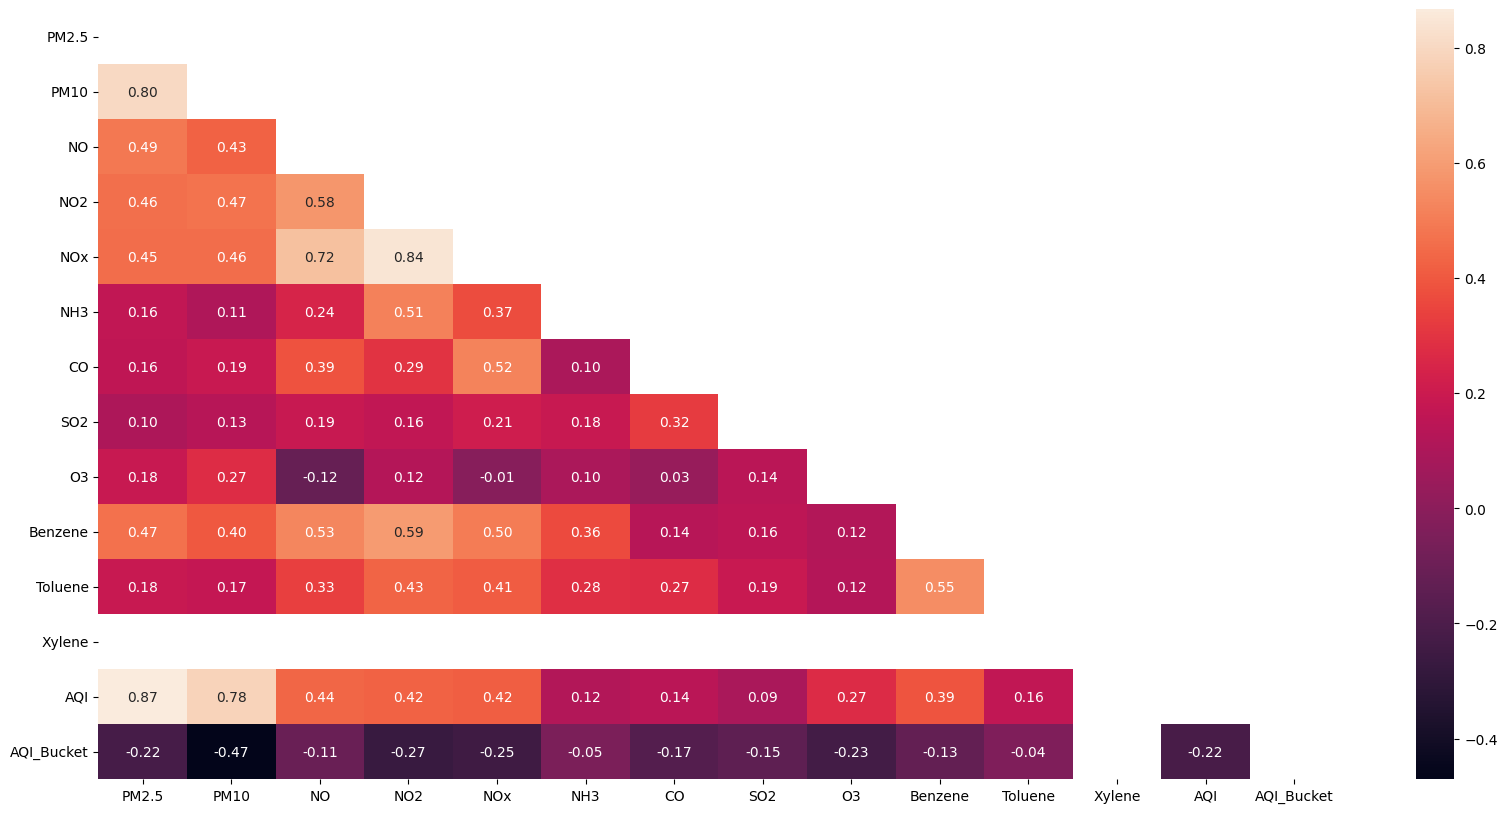

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Jaipurnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Jaipurnew:")
print(feature_importance)


Top Features by LDA Importance for df_Jaipurnew:
    Feature  LDA Importance
0     PM2.5            4.15
1      PM10            1.54
4       NOx            1.13
3       NO2            1.12
8        O3            0.77
9   Benzene            0.66
2        NO            0.53
6        CO            0.40
10  Toluene            0.34
5       NH3            0.34
7       SO2            0.32
11   Xylene            0.00


Explained variance ratio by each principal component:
 [0.40969248 0.12768019 0.10744919 0.09922534 0.07046932 0.06237832
 0.04004292 0.03342199 0.02702004 0.01460135 0.00801885 0.        ]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   3.305705e-01  3.172275e-01  3.628513e-01  4.095411e-01  4.072249e-01   
PC2   4.765108e-01  4.913754e-01 -1.015566e-01 -3.560307e-02 -1.713404e-01   
PC3  -1.386476e-01 -6.491187e-02 -3.375568e-01 -8.889321e-03 -1.792718e-01   
PC4   1.252628e-01  2.674201e-01  7.310597e-02 -1.662238e-01  5.373531e-02   
PC5   1.874746e-02  2.947489e-02 -2.321771e-02  2.113771e-01  1.337488e-01   
PC6   1.735465e-01  8.725510e-02  4.772322e-02 -1.642933e-01 -2.418221e-01   
PC7   3.368609e-01  2.268037e-01 -2.733595e-01 -3.631586e-01 -2.982405e-01   
PC8   7.653131e-03 -2.338823e-01  6.029067e-01 -3.901967e-01 -2.848980e-01   
PC9  -2.048460e-02 -7.097002e-02 -5.188627e-01  1.583971e

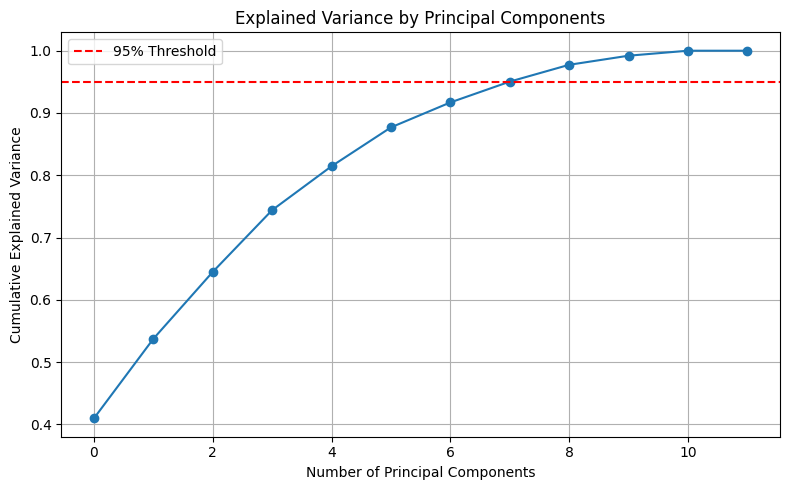

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Jaipurnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Jaipurnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
x1=df_Jaipurnew[["PM2.5","PM10","NO2","NOx","NO","NH3","O3","Benzene"]]
y1=df_Jaipurnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.0431
Root Mean Squared Error (RMSE): 0.2077
R-squared (R2): 0.7715

Test Set Performance:
Mean Squared Error (MSE): 0.0278
Root Mean Squared Error (RMSE): 0.1669
R-squared (R2): 0.8120


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.0326
RMSE: 0.1807
R²: 0.7926

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.0277
RMSE: 0.1665
R²: 0.8128


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.0321
RMSE: 0.1790
R²: 0.7963

XGBoost Test Set Evaluation (Tuned):
MSE: 0.0272
RMSE: 0.1648
R²: 0.8167


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0332
RMSE: 0.1822
R²: 0.7891

Random Forest Test Set Evaluation for Model3
MSE: 0.0301
RMSE: 0.1734
R²: 0.7969


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0342
RMSE: 0.1849
R²: 0.7826

Random Forest Test Set Evaluation (Tuned):
MSE: 0.0259
RMSE: 0.1611
R²: 0.8248


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.0320
RMSE: 0.1788
R²: 0.7968
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.0265
RMSE: 0.1627
R²: 0.8212


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (668, 8)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2098 - val_loss: 0.0966
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0713 - val_loss: 0.0556
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0479 - val_loss: 0.0425
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0489 - val_loss: 0.0373
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0480 - val_loss: 0.0352
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0386 - val_loss: 0.0342
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0469 - val_loss: 0.0344
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0401 - val_loss: 0.0331
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0392 - val_loss: 0.0329
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0304 - val_loss: 0.0329
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0337 - val_loss: 0.0327
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0352 - val_loss: 0.0334

JORAPOKHAR

In [ ]:
#for Jorapokhar
df_Jorapokhar=df[df["City"]=="Jorapokhar"]
df_Jorapokharnew=df_Jorapokhar.drop(["City","Date"],axis=1)
df_Jorapokharnew

PM2.5      PM10        NO       NO2  NOx           NH3        CO  \
17701    0.0  0.019062 -0.459984 -0.841330  0.0 -1.715374e-16 -0.287180   
17702    0.0  0.734029 -0.448279 -0.800354  0.0 -1.715374e-16 -0.294625   
17703    0.0  0.091090 -0.452025 -0.833047  0.0 -1.715374e-16 -0.291647   
17704    0.0 -0.150589 -0.460452 -0.835663  0.0 -1.715374e-16 -0.288669   
17705    0.0  0.814243 -0.472157 -0.777687  0.0 -1.715374e-16 -0.285691   
...      ...       ...       ...       ...  ...           ...       ...   
18865    0.0 -0.625416  0.295206 -0.751533  0.0 -7.104178e-01 -0.077222   
18866    0.0 -0.609892  0.368244 -0.781610  0.0 -7.118663e-01 -0.056376   
18867    0.0 -0.600102  0.335002 -0.723635  0.0 -7.147633e-01 -0.089135   
18868    0.0 -0.526115  0.352325 -0.774200  0.0 -6.930357e-01 -0.084668   
18869    0.0 -0.220240  0.155686 -0.629915  0.0 -7.775318e-01 -0.086157   

            SO2        O3       Benzene  Toluene        Xylene           AQI  \
17701  0.748898 -0.774257 -3.121646e-17      0.0  1.129320e-16  2.202172e-16   
17702  0.748898 -0.924532 -3.121646e-17      0.0  1.129320e-16 -1.430596e-01   
17703  0.748898 -0.829804 -3.121646e-17      0.0  1.129320e-16 -2.437863e-01   
17704  0.748898 -0.633902 -3.121646e-17      0.0  1.129320e-16 -4.607360e-01   
17705  0.748898 -0.820877 -3.121646e-17      0.0  1.129320e-16 -3.290165e-01   
...         ...       ...           ...      ...           ...           ...   
18865  0.668765  2.044505 -3.121646e-17      0.0  1.129320e-16  2.830916e-01   
18866  0.507311  1.758587 -3.121646e-17      0.0  1.129320e-16 -8.107397e-02   
18867  0.562903  1.154017 -3.121646e-17      0.0  1.129320e-16 -2.437863e-01   
18868  0.748898 -0.216803 -3.121646e-17      0.0  1.129320e-16 -4.607360e-01   
18869 -0.234314 -0.806494 -3.121646e-17      0.0  1.129320e-16 -6.234483e-01   

       AQI_Bucket  
17701           1  
17702           1  
17703           1  
17704           1  
17705           1  
...           ...  
18865           2  
18866           1  
18867           1  
18868           1  
18869           3  

[1169 rows x 14 columns]

In [ ]:
corre=df_Jorapokharnew.corr()
corre

PM2.5      PM10        NO       NO2  NOx       NH3        CO  \
PM2.5       1.000000  0.469874 -0.104592  0.038251  NaN  0.030568 -0.008877   
PM10        0.469874  1.000000 -0.007729 -0.032575  NaN -0.111172 -0.123737   
NO         -0.104592 -0.007729  1.000000  0.516264  NaN  0.339655  0.352781   
NO2         0.038251 -0.032575  0.516264  1.000000  NaN  0.775786  0.366112   
NOx              NaN       NaN       NaN       NaN  NaN       NaN       NaN   
NH3         0.030568 -0.111172  0.339655  0.775786  NaN  1.000000  0.174182   
CO         -0.008877 -0.123737  0.352781  0.366112  NaN  0.174182  1.000000   
SO2         0.321298  0.523551  0.106191 -0.225275  NaN -0.124405 -0.228194   
O3          0.122572  0.183737  0.246279  0.054258  NaN -0.033707  0.273187   
Benzene          NaN       NaN       NaN       NaN  NaN       NaN       NaN   
Toluene          NaN       NaN       NaN       NaN  NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN  NaN       NaN       NaN   
AQI         0.407540  0.550449 -0.070248  0.008402  NaN -0.062147  0.030968   
AQI_Bucket  0.138345  0.086019 -0.243412 -0.262983  NaN -0.282755 -0.114104   

                 SO2        O3  Benzene  Toluene  Xylene       AQI  AQI_Bucket  
PM2.5       0.321298  0.122572      NaN      NaN     NaN  0.407540    0.138345  
PM10        0.523551  0.183737      NaN      NaN     NaN  0.550449    0.086019  
NO          0.106191  0.246279      NaN      NaN     NaN -0.070248   -0.243412  
NO2        -0.225275  0.054258      NaN      NaN     NaN  0.008402   -0.262983  
NOx              NaN       NaN      NaN      NaN     NaN       NaN         NaN  
NH3        -0.124405 -0.033707      NaN      NaN     NaN -0.062147   -0.282755  
CO         -0.228194  0.273187      NaN      NaN     NaN  0.030968   -0.114104  
SO2         1.000000  0.090266      NaN      NaN     NaN  0.255129    0.056724  
O3          0.090266  1.000000      NaN      NaN     NaN  0.146571   -0.155824  
Benzene          NaN       NaN      NaN      NaN     NaN       NaN         NaN  
Toluene          NaN       NaN      NaN      NaN     NaN       NaN         NaN  
Xylene           NaN       NaN      NaN      NaN     NaN       NaN         NaN  
AQI         0.255129  0.146571      NaN      NaN     NaN  1.000000    0.405248  
AQI_Bucket  0.056724 -0.155824      NaN      NaN     NaN  0.405248    1.000000

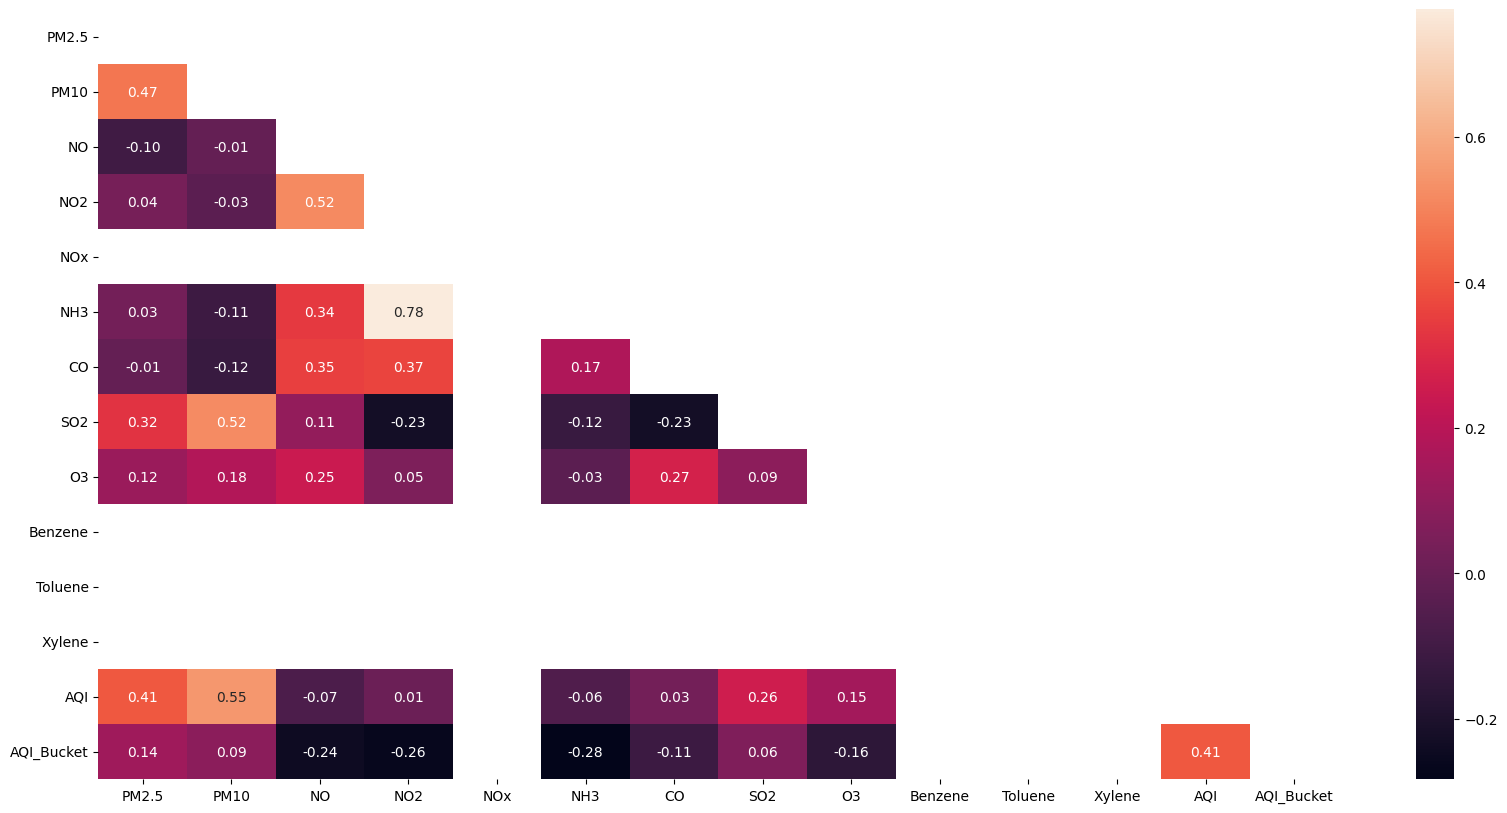

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Jorapokharnew, col))

df_Jorapokharnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Jorapokharnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Jorapokharnew[columns_to_scale] = scaler.fit_transform(df_Jorapokharnew[columns_to_scale])

Explained variance ratio by each principal component:
 [2.46196739e-01 2.29308217e-01 1.67125890e-01 1.38237521e-01
 9.23814894e-02 7.47081475e-02 5.20419952e-02 3.16120255e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Feature contribution to each principal component:
      PM2.5          PM10            NO           NO2           NOx  \
PC1    -0.0  5.193485e-01  4.227332e-01  4.431506e-01 -5.551115e-17   
PC2    -0.0 -3.555029e-01  5.234377e-01  4.537771e-01 -2.220446e-16   
PC3     0.0 -1.957971e-01 -1.531000e-01  2.858219e-01  1.110223e-16   
PC4     0.0  3.659011e-02 -1.534022e-01 -2.007961e-02 -1.370432e-16   
PC5     0.0  1.434777e-01 -1.398905e-01 -3.529708e-01 -1.387779e-16   
PC6    -0.0  6.866275e-01 -2.996413e-01  2.756908e-01  5.551115e-17   
PC7     0.0  2.686565e-01  6.252867e-01 -5.612599e-01  0.000000e+00   
PC8     0.0 -6.297621e-18  2.231924e-16 -8.986671e-17  1.000000e+00   
PC9     0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   


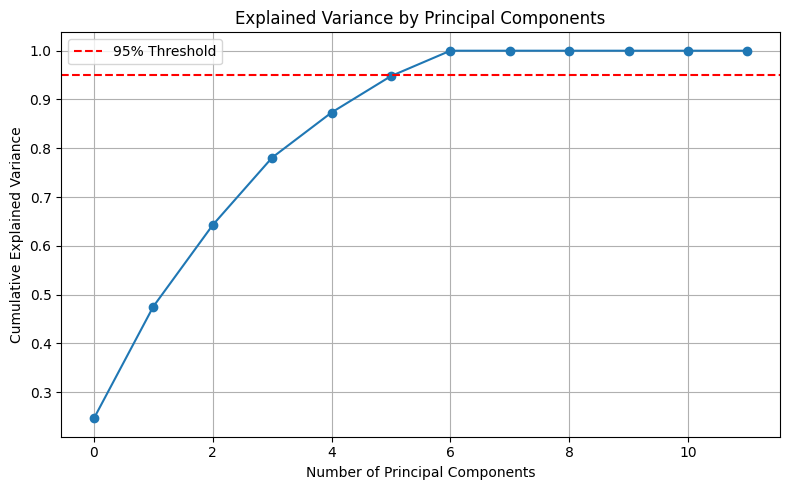

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Jorapokharnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Jorapokharnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Jorapokharnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Jorapokharnew:")
print(feature_importance)


Top Features by LDA Importance for df_Jorapokharnew:
    Feature  LDA Importance
1      PM10            2.17
6        CO            0.99
3       NO2            0.58
8        O3            0.54
7       SO2            0.48
5       NH3            0.40
2        NO            0.34
0     PM2.5            0.00
4       NOx            0.00
9   Benzene            0.00
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Jorapokharnew[[ 'PM10', 'NH3', 'O3', 'CO', 'NO', 'NO2', 'SO2']]
y1=df_Jorapokharnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.6924
Root Mean Squared Error (RMSE): 0.8321
R-squared (R2): 0.3629

Test Set Performance:
Mean Squared Error (MSE): 0.5469
Root Mean Squared Error (RMSE): 0.7395
R-squared (R2): 0.4876


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.4096
RMSE: 0.6400
R²: 0.3777

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.5484
RMSE: 0.7405
R²: 0.4861


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2503
RMSE: 0.5003
R²: 0.6198

XGBoost Test Set Evaluation (Tuned):
MSE: 0.3952
RMSE: 0.6286
R²: 0.6297


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1352
RMSE: 0.3677
R²: 0.5558

Random Forest Test Set Evaluation for Model3
MSE: 0.1961
RMSE: 0.4428
R²: 0.6026


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0849
RMSE: 0.2913
R²: 0.7212

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1692
RMSE: 0.4113
R²: 0.6571


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (292, 7)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.4914 - val_loss: 0.3069
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5327 - val_loss: 0.2988
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4698 - val_loss: 0.2886
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4256 - val_loss: 0.2772
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4431 - val_loss: 0.2638
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4660 - val_loss: 0.2448
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4729 - val_loss: 0.2233
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4173 - val_loss: 0.2039
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3141 - val_loss: 0.1910
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3715 - val_loss: 0.1882
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2909 - val_loss: 0.1858
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3226 - val_l

KOCHI

In [ ]:
#for Kochi
df_Kochi=df[df["City"]=="Kochi"]
df_Kochinew=df_Kochi.drop(["City","Date"],axis=1)
df_Kochinew

PM2.5      PM10        NO       NO2       NOx           NH3  \
18870 -0.351950 -0.059540  0.200632  1.683990  1.218503  2.127623e-01   
18871 -0.083661 -0.108911  0.210932  1.181716  1.218503  9.012227e-02   
18872 -0.077097 -0.045694  0.930072  1.391823  1.218503  1.021931e-01   
18873 -0.095779 -0.061918  3.521034  1.683990  1.218503 -6.631620e-02   
18874 -0.011623 -0.068351  4.176968  1.313360  1.218503 -1.343959e-01   
...         ...       ...       ...       ...       ...           ...   
19027 -0.861094 -1.287377  0.205782 -1.155183 -0.348568 -1.715374e-16   
19028 -0.909399 -1.357071  0.328448 -1.148644 -0.258178 -1.715374e-16   
19029 -0.799492 -1.108635  0.476396 -1.142106 -0.149710 -1.715374e-16   
19030 -0.809422 -1.068355  0.142576 -1.139490 -0.393251 -1.715374e-16   
19031 -1.034792 -1.357071 -0.178602 -1.136003 -0.627583 -1.715374e-16   

             CO       SO2        O3       Benzene   Toluene        Xylene  \
18870 -0.148697 -0.444856 -0.734085 -3.121646e-17 -0.510786  1.129320e-16   
18871 -0.136785 -0.476200 -1.237480 -3.121646e-17 -0.510786  1.129320e-16   
18872 -0.120405 -0.450770 -1.261286 -3.121646e-17 -0.510786  1.129320e-16   
18873 -0.135296 -0.464372 -1.150688 -3.121646e-17 -0.510786  1.129320e-16   
18874 -0.132318 -0.460232 -1.143744 -3.121646e-17 -0.507851  1.129320e-16   
...         ...       ...       ...           ...       ...           ...   
19027 -0.090624  0.393761 -1.631764 -3.121646e-17 -0.510786  1.129320e-16   
19028 -0.114449  0.396126 -1.678384 -3.121646e-17 -0.508438  1.129320e-16   
19029 -0.090624  0.308007 -1.673921 -3.121646e-17 -0.510786  1.129320e-16   
19030 -0.086157  0.363599 -1.647635 -3.121646e-17 -0.510786  1.129320e-16   
19031 -0.048930  0.368922 -1.656066 -3.121646e-17 -0.510786  1.129320e-16   

                AQI  AQI_Bucket  
18870  2.202172e-16           1  
18871 -4.374914e-01           1  
18872 -4.297432e-01           1  
18873 -1.740524e-01           1  
18874  2.366024e-01           1  
...             ...         ...  
19027 -6.002037e-01           3  
19028 -6.544411e-01           3  
19029 -6.389447e-01           3  
19030 -5.924554e-01           3  
19031 -4.994770e-01           1  

[162 rows x 14 columns]

In [ ]:
df_Kochinew.isnull().sum()
df_Kochinew.dropna(inplace=True)
# or: df_Kochinew.fillna(method='ffill', inplace=True)

In [ ]:
corre=df_Kochinew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.824807  0.442113 -0.188415  0.260294 -0.362048   
PM10        0.824807  1.000000  0.545443 -0.249964  0.312613 -0.269143   
NO          0.442113  0.545443  1.000000  0.184999  0.814801 -0.486003   
NO2        -0.188415 -0.249964  0.184999  1.000000  0.337113  0.177654   
NOx         0.260294  0.312613  0.814801  0.337113  1.000000 -0.474517   
NH3        -0.362048 -0.269143 -0.486003  0.177654 -0.474517  1.000000   
CO          0.034320  0.119339 -0.305476  0.187044 -0.278635  0.786499   
SO2         0.509472  0.393413  0.346293 -0.132508 -0.139777 -0.120185   
O3          0.565791  0.392540  0.179094 -0.102834  0.190611 -0.266720   
Benzene          NaN       NaN       NaN       NaN       NaN       NaN   
Toluene          NaN       NaN       NaN       NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.409523  0.602893  0.729545  0.250098  0.470629 -0.042622   
AQI_Bucket -0.478001 -0.576781 -0.656694 -0.251643 -0.413030  0.138881   

                  CO       SO2        O3  Benzene  Toluene  Xylene       AQI  \
PM2.5       0.034320  0.509472  0.565791      NaN      NaN     NaN  0.409523   
PM10        0.119339  0.393413  0.392540      NaN      NaN     NaN  0.602893   
NO         -0.305476  0.346293  0.179094      NaN      NaN     NaN  0.729545   
NO2         0.187044 -0.132508 -0.102834      NaN      NaN     NaN  0.250098   
NOx        -0.278635 -0.139777  0.190611      NaN      NaN     NaN  0.470629   
NH3         0.786499 -0.120185 -0.266720      NaN      NaN     NaN -0.042622   
CO          1.000000 -0.043477  0.001051      NaN      NaN     NaN  0.159519   
SO2        -0.043477  1.000000  0.297531      NaN      NaN     NaN  0.454033   
O3          0.001051  0.297531  1.000000      NaN      NaN     NaN  0.194201   
Benzene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Toluene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Xylene           NaN       NaN       NaN      NaN      NaN     NaN       NaN   
AQI         0.159519  0.454033  0.194201      NaN      NaN     NaN  1.000000   
AQI_Bucket -0.124829 -0.434114 -0.381196      NaN      NaN     NaN -0.784670   

            AQI_Bucket  
PM2.5        -0.478001  
PM10         -0.576781  
NO           -0.656694  
NO2          -0.251643  
NOx          -0.413030  
NH3           0.138881  
CO           -0.124829  
SO2          -0.434114  
O3           -0.381196  
Benzene            NaN  
Toluene            NaN  
Xylene             NaN  
AQI          -0.784670  
AQI_Bucket    1.000000

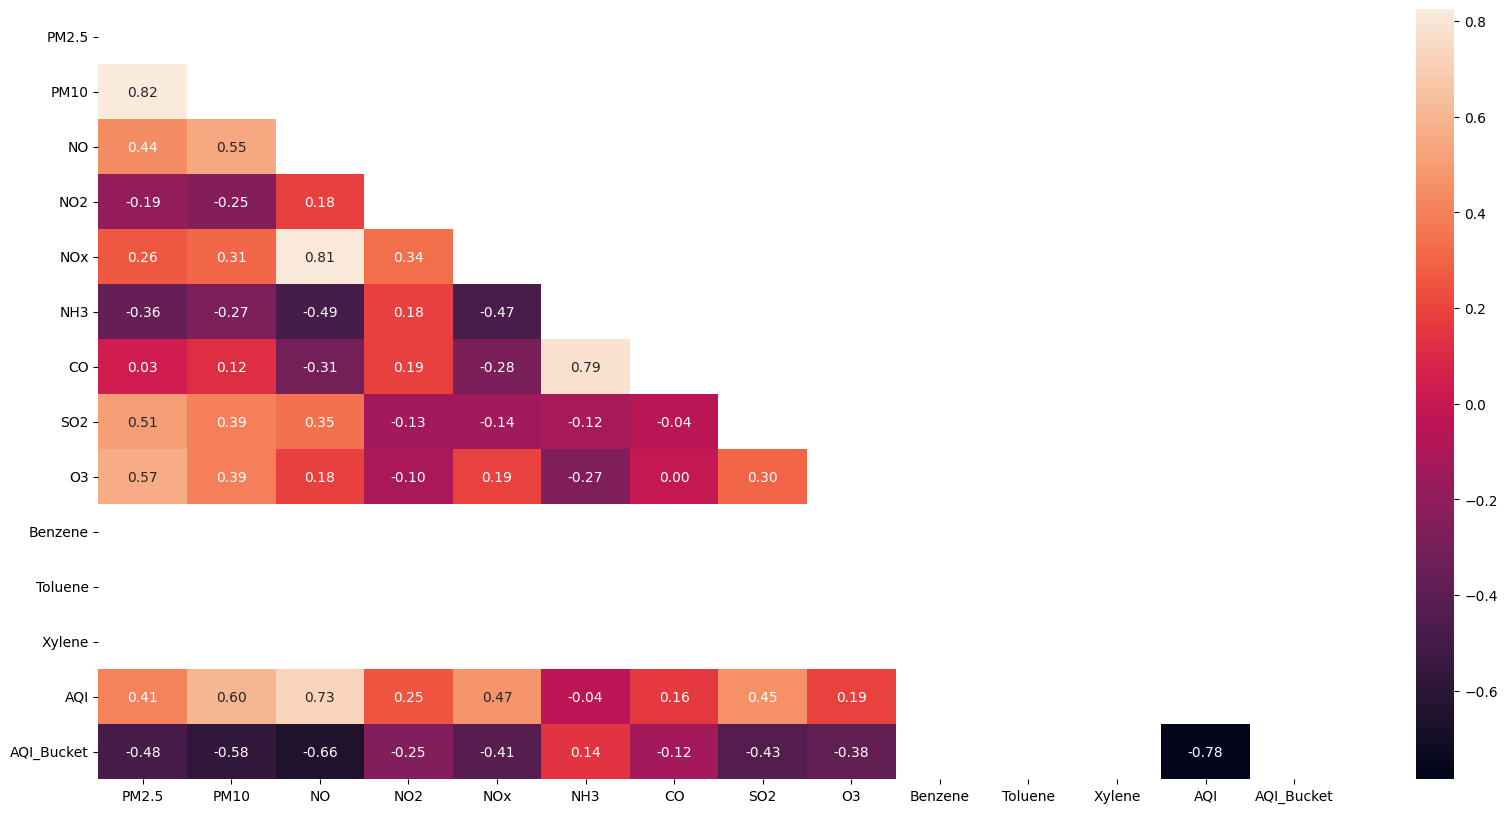

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Kochinew[columns_to_scale] = scaler.fit_transform(df_Kochinew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.39055922 0.23059821 0.15817649 0.08370864 0.07617274 0.03692995
 0.01221711 0.00849742 0.00314022 0.         0.         0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.412286  0.408116  0.437366 -0.014567  0.378380 -0.401834 -0.236340   
PC2   0.357309  0.324233 -0.212521 -0.336269 -0.398708  0.257625  0.351620   
PC3   0.079016  0.147504  0.264097  0.624850  0.248150  0.372132  0.554218   
PC4  -0.155579 -0.256135  0.216244  0.254510 -0.172620 -0.016453 -0.278750   
PC5  -0.149590 -0.336045 -0.157510  0.270030  0.016017  0.011090 -0.040096   
PC6   0.423624  0.096819 -0.457687  0.567144 -0.324930 -0.356561 -0.132060   
PC7   0.252745  0.103505  0.047287  0.085997 -0.039203  0.704252 -0.625704   
PC8  -0.592706  0.642377  0.134933  0.171085 -0.385719 -0.059741 -0.112289   
PC9   0.234281 -0.308691  0.626344 -0.016278 -0.591888 -0

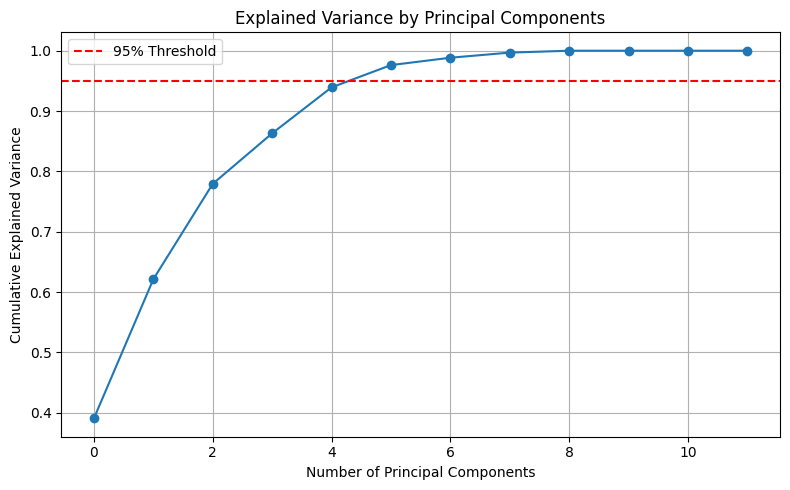

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Kochinew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Kochinew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# def detect_outliers_iqr(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return df[(df[col] < lower) | (df[col] > upper)].index

# outlier_indices = set()
# for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
#     outlier_indices.update(detect_outliers_iqr(df_Kochinew, col))

# df_Kochinew.drop(index=outlier_indices, errors="ignore", inplace=True)
# df_Kochinew.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Kochinew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Kochinew:")
print(feature_importance)


Top Features by LDA Importance for df_Kochinew:
    Feature  LDA Importance
2        NO            6.27
4       NOx            3.82
8        O3            2.32
1      PM10            2.11
6        CO            1.97
3       NO2            1.95
0     PM2.5            1.65
5       NH3            1.08
7       SO2            0.49
9   Benzene            0.00
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Kochinew[["NO", "NOx", "O3", "PM10", "CO", "NO2", "PM2.5","NH3"]]
y1=df_Kochinew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.2864
Root Mean Squared Error (RMSE): 0.5351
R-squared (R2): 0.6809

Test Set Performance:
Mean Squared Error (MSE): 0.1760
Root Mean Squared Error (RMSE): 0.4196
R-squared (R2): 0.8459


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2631
RMSE: 0.5129
R²: 0.7608

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2501
RMSE: 0.5001
R²: 0.7811


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train with early stopping
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)

# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)

print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")

# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)

print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


XGBoost Validation Set Evaluation (Tuned):
MSE: 0.3528
RMSE: 0.5939
R²: 0.6793

XGBoost Test Set Evaluation (Tuned):
MSE: 0.2793
RMSE: 0.5284
R²: 0.7556


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.3737
RMSE: 0.6113
R²: 0.6602

Random Forest Test Set Evaluation for Model3
MSE: 0.2482
RMSE: 0.4982
R²: 0.7828


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.3877
RMSE: 0.6227
R²: 0.6475

Random Forest Test Set Evaluation (Tuned):
MSE: 0.2425
RMSE: 0.4925
R²: 0.7877


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (66, 8)
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - loss: 0.8573 - val_loss: 1.1191
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.8474 - val_loss: 1.0882
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.8094 - val_loss: 1.0543
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.8076 - val_loss: 1.0207
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.7424 - val_loss: 0.9853
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7343 - val_loss: 0.9461
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7929 - val_loss: 0.9013
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6199 - val_loss: 0.8516
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5962 - val_loss: 0.7946
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5957 - val_loss: 0.7314
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.5829 - val_loss: 0.6813
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0

LUCKNOW

In [ ]:
#for Lucknow
df_Lucknow=df[df["City"]=="Lucknow"]
df_Lucknownew=df_Lucknow.drop(["City","Date"],axis=1)
df_Lucknownew

PM2.5          PM10        NO       NO2       NOx           NH3  \
19846  0.000000 -1.987539e-16 -0.724043 -0.658249 -0.946165 -1.715374e-16   
19847  0.000000 -1.987539e-16 -0.711870 -0.775944 -0.972429 -1.715374e-16   
19848  0.000000 -1.987539e-16 -0.716552 -0.703147 -0.958103 -1.715374e-16   
19849  0.000000 -1.987539e-16 -0.717956 -0.701839 -0.958103 -1.715374e-16   
19850  0.000000 -1.987539e-16 -0.714211 -0.710122 -0.958103 -1.715374e-16   
...         ...           ...       ...       ...       ...           ...   
21850 -0.592805 -1.987539e-16 -0.379455 -0.407166 -0.495580 -5.723270e-01   
21851 -0.553251 -1.987539e-16 -0.336382 -0.474732 -0.501719 -5.699129e-01   
21852 -0.627140 -1.987539e-16 -0.254449 -0.439859 -0.458400 -5.723270e-01   
21853 -0.491144 -1.987539e-16 -0.535362 -0.724507 -0.694437 -5.646017e-01   
21854 -0.546687 -1.987539e-16 -0.424870 -0.615530 -0.872488 -5.665330e-01   

             CO       SO2        O3   Benzene   Toluene        Xylene  \
19846  0.181130  0.748898 -0.425105 -0.135725 -0.280077  1.129320e-16   
19847  0.181130  0.748898 -0.636382 -0.092143 -0.173822  1.129320e-16   
19848  0.181130  0.748898 -0.599681 -0.101984 -0.231353  1.129320e-16   
19849  0.181130  0.748898 -0.648781 -0.071055 -0.230766  1.129320e-16   
19850  0.181130  0.748898 -0.688953 -0.055591 -0.230179  1.129320e-16   
...         ...       ...       ...       ...       ...           ...   
21850 -0.215705 -0.636472  1.084584  0.320626  0.653466  1.129320e-16   
21851 -0.214216 -0.690881  1.086567  0.320626  0.298162  1.129320e-16   
21852 -0.215705 -0.660720  0.452240  0.320626  0.169012  1.129320e-16   
21853 -0.227618 -0.604536  0.331227  0.320626 -0.071089  1.129320e-16   
21854 -0.226129 -0.503405  0.078290  0.316963 -0.356980  1.129320e-16   

                AQI  AQI_Bucket  
19846  2.202172e-16           1  
19847  2.202172e-16           1  
19848  2.202172e-16           1  
19849  2.202172e-16           1  
19850  2.202172e-16           1  
...             ...         ...  
21850 -7.164267e-01           3  
21851 -6.931821e-01           3  
21852 -7.861606e-01           3  
21853 -7.551677e-01           3  
21854 -7.009303e-01           3  

[2009 rows x 14 columns]

In [ ]:
corre=df_Lucknownew.corr()
corre

PM2.5  PM10        NO       NO2       NOx       NH3        CO  \
PM2.5       1.000000   NaN  0.473120  0.605353  0.415113  0.286664  0.058647   
PM10             NaN   NaN       NaN       NaN       NaN       NaN       NaN   
NO          0.473120   NaN  1.000000  0.642735  0.586739  0.268538  0.121057   
NO2         0.605353   NaN  0.642735  1.000000  0.683457  0.270834 -0.109684   
NOx         0.415113   NaN  0.586739  0.683457  1.000000  0.347309 -0.264433   
NH3         0.286664   NaN  0.268538  0.270834  0.347309  1.000000 -0.089938   
CO          0.058647   NaN  0.121057 -0.109684 -0.264433 -0.089938  1.000000   
SO2         0.177887   NaN  0.190786  0.180909  0.136926  0.110790  0.249919   
O3          0.313080   NaN -0.028994  0.107708 -0.101100 -0.004310  0.053827   
Benzene     0.114525   NaN  0.104819 -0.041371 -0.072415 -0.154872  0.104516   
Toluene     0.246779   NaN  0.177485  0.116294  0.074598 -0.227937  0.107221   
Xylene           NaN   NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.893512   NaN  0.516742  0.551800  0.365665  0.284584  0.189053   
AQI_Bucket  0.587843   NaN  0.415303  0.395781  0.364214  0.231278  0.022095   

                 SO2        O3   Benzene   Toluene  Xylene       AQI  \
PM2.5       0.177887  0.313080  0.114525  0.246779     NaN  0.893512   
PM10             NaN       NaN       NaN       NaN     NaN       NaN   
NO          0.190786 -0.028994  0.104819  0.177485     NaN  0.516742   
NO2         0.180909  0.107708 -0.041371  0.116294     NaN  0.551800   
NOx         0.136926 -0.101100 -0.072415  0.074598     NaN  0.365665   
NH3         0.110790 -0.004310 -0.154872 -0.227937     NaN  0.284584   
CO          0.249919  0.053827  0.104516  0.107221     NaN  0.189053   
SO2         1.000000 -0.066306  0.063962  0.019684     NaN  0.201605   
O3         -0.066306  1.000000  0.087932  0.119239     NaN  0.290288   
Benzene     0.063962  0.087932  1.000000  0.673886     NaN  0.134782   
Toluene     0.019684  0.119239  0.673886  1.000000     NaN  0.255489   
Xylene           NaN       NaN       NaN       NaN     NaN       NaN   
AQI         0.201605  0.290288  0.134782  0.255489     NaN  1.000000   
AQI_Bucket -0.003240  0.095512  0.126343  0.190146     NaN  0.656838   

            AQI_Bucket  
PM2.5         0.587843  
PM10               NaN  
NO            0.415303  
NO2           0.395781  
NOx           0.364214  
NH3           0.231278  
CO            0.022095  
SO2          -0.003240  
O3            0.095512  
Benzene       0.126343  
Toluene       0.190146  
Xylene             NaN  
AQI           0.656838  
AQI_Bucket    1.000000

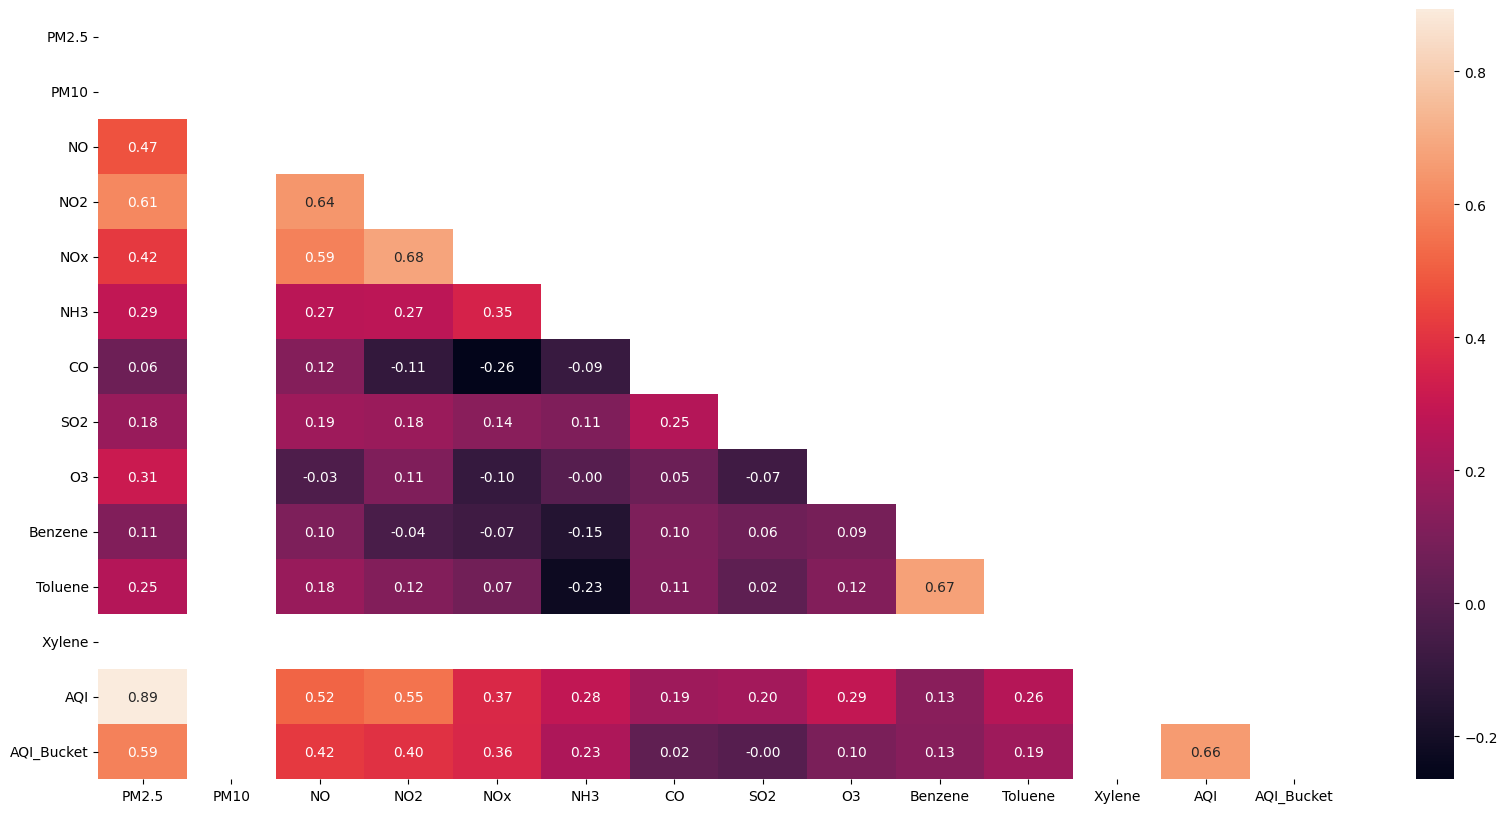

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [0.29678671 0.1916516  0.12920373 0.11042584 0.0762219  0.07057745
 0.04323848 0.03383661 0.02417302 0.02388466 0.         0.        ]

Feature contribution to each principal component:
             PM2.5          PM10            NO           NO2           NOx  \
PC1   4.507975e-01 -3.330669e-16  4.590748e-01  5.067825e-01  4.612403e-01   
PC2   1.239157e-01 -2.220446e-16  2.288058e-02 -7.226573e-02 -1.882729e-01   
PC3  -5.303821e-04 -2.545436e-16  1.300996e-01 -5.728108e-02 -1.573843e-01   
PC4   2.944597e-01  1.144917e-16 -1.590937e-01 -3.058164e-03 -2.400785e-01   
PC5  -3.470386e-02 -1.266348e-16 -1.489360e-01 -2.931998e-01 -4.867869e-02   
PC6   7.129905e-02  2.185752e-16 -4.256837e-01  3.069051e-02  1.066848e-01   
PC7   7.107832e-01  1.110223e-15 -4.295484e-01  4.085316e-02 -1.988956e-01   
PC8  -2.200659e-01 -4.996004e-16 -3.591259e-01 -1.008518e-01  5.574067e-01   
PC9  -2.405188e-01  3.053113e-16 -4.708688e-01  6.638368e

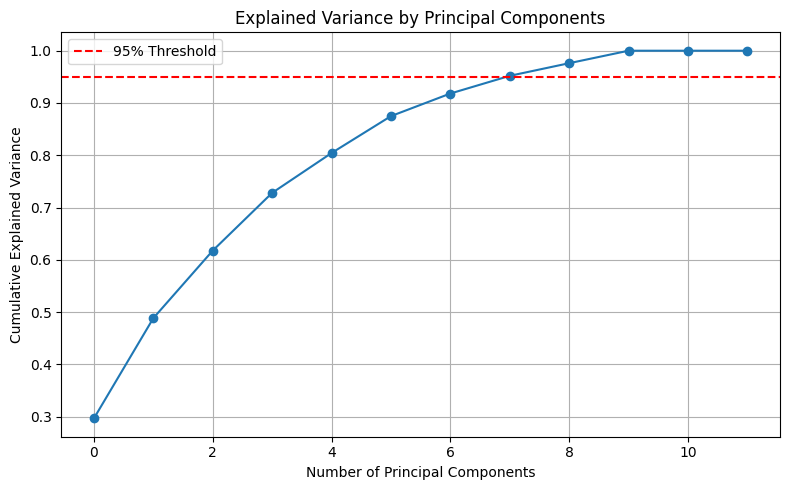

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Lucknownew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Lucknownew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Lucknownew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Lucknownew:")
print(feature_importance)


Top Features by LDA Importance for df_Lucknownew:
    Feature  LDA Importance
0     PM2.5            5.85
6        CO            0.59
2        NO            0.43
8        O3            0.39
7       SO2            0.36
4       NOx            0.28
10  Toluene            0.23
3       NO2            0.20
5       NH3            0.20
9   Benzene            0.18
1      PM10            0.00
11   Xylene            0.00


In [ ]:
x1=df_Lucknownew[["PM2.5","NO","NO2","NOx","CO","SO2","O3","Toluene"]]
y1=df_Lucknownew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.1236
Root Mean Squared Error (RMSE): 0.3516
R-squared (R2): 0.8410

Test Set Performance:
Mean Squared Error (MSE): 0.1252
Root Mean Squared Error (RMSE): 0.3539
R-squared (R2): 0.8457


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.1864
RMSE: 0.4318
R²: 0.7569

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1252
RMSE: 0.3538
R²: 0.8458


In [ ]:
#XGBOOSTS
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train1, y_train1)
xgb_predictions1 = xgboost_model.predict(x_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)
print("XGBoost Model validation Evaluation For Model3")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")
xgb_test_predictions1 = xgboost_model.predict(x_test1)
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test_predictions1)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test_predictions1)
print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")

XGBoost Model validation Evaluation For Model3
MSE: 0.1907
RMSE: 0.4367
R²: 0.7512

XGBoost Test Set Evaluation:
MSE: 0.1314
RMSE: 0.3624
R²: 0.8381


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1784
RMSE: 0.4223
R²: 0.7674

Random Forest Test Set Evaluation for Model3
MSE: 0.1171
RMSE: 0.3422
R²: 0.8557


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1636
RMSE: 0.4045
R²: 0.7866

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1067
RMSE: 0.3266
R²: 0.8686


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1753
RMSE: 0.4187
R²: 0.7714
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1161
RMSE: 0.3407
R²: 0.8570


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1205, 8)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.8655 - val_loss: 0.6659
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5510 - val_loss: 0.3340
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2785 - val_loss: 0.2492
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2023 - val_loss: 0.1902
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1292 - val_loss: 0.1740
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1130 - val_loss: 0.1752
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1038 - val_loss: 0.1747
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1086 - val_loss: 0.1756
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1173 - val_loss: 0.1776
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0998 - val_loss: 0.1772
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1048 - val_loss: 0.1758
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1075 - val_loss: 0.176

MUMBAI

In [ ]:
#for Mumbai
df_Mumbai=df[df["City"]=="Mumbai"]
df_Mumbainew=df_Mumbai.drop(["City","Date"],axis=1)
df_Mumbainew

In [ ]:
corre=df_Mumbainew.corr()
corre

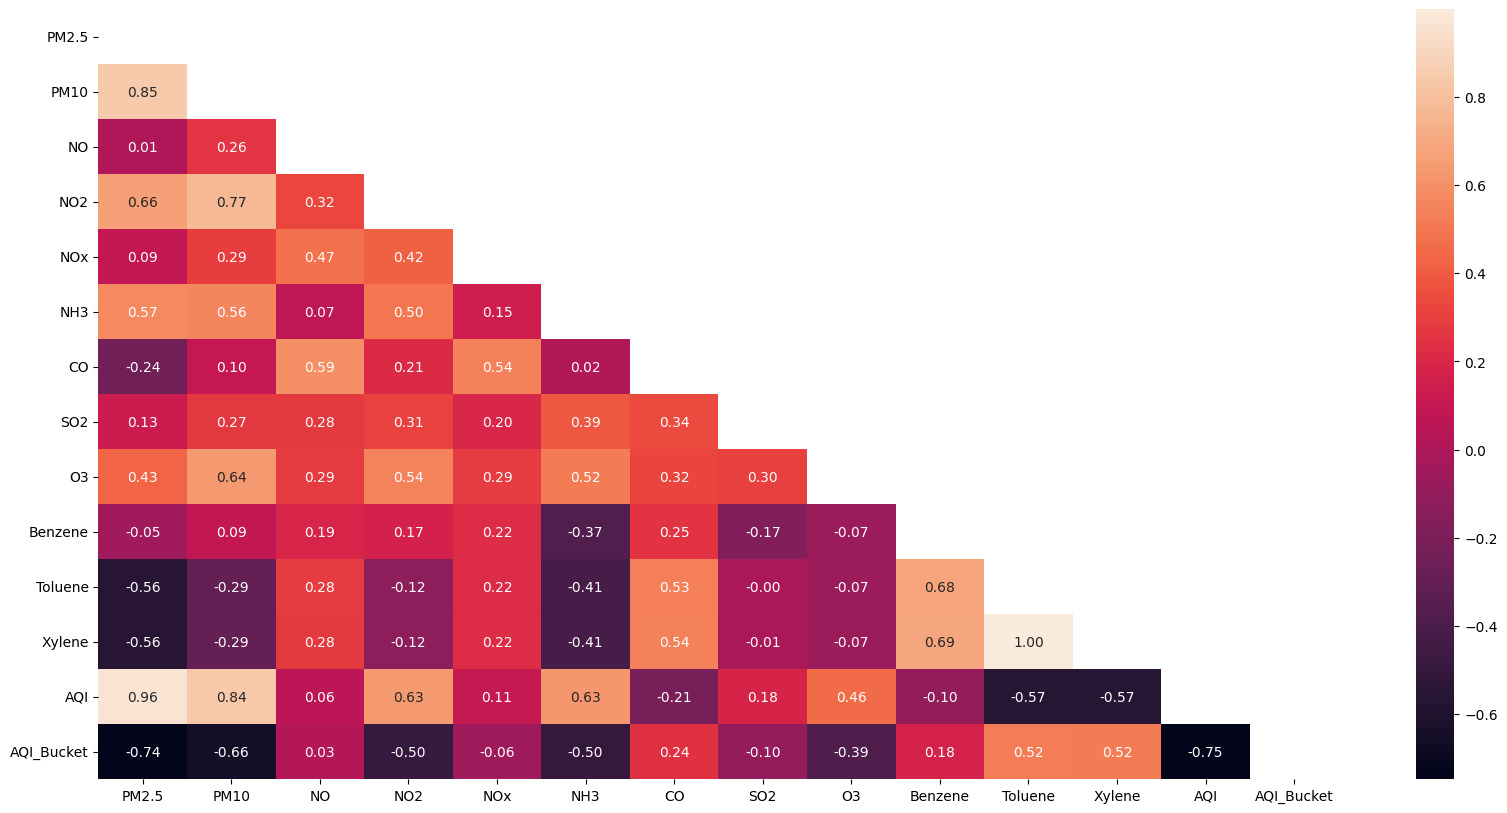

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [3.44738802e-01 2.98326450e-01 1.09632650e-01 6.28040991e-02
 5.48639720e-02 4.27109423e-02 3.02813832e-02 2.19922181e-02
 1.90207248e-02 9.40056431e-03 6.05148665e-03 1.76707277e-04]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.423982  0.421406  0.085893  0.362457  0.110013  0.386956 -0.006750   
PC2  -0.043216  0.150719  0.376454  0.230848  0.356869 -0.020933  0.432106   
PC3   0.359889  0.265329 -0.200382  0.233974 -0.060805 -0.183890 -0.315101   
PC4  -0.010050 -0.077706  0.315411 -0.017426  0.609772 -0.217515  0.129013   
PC5  -0.144846 -0.005707 -0.179035 -0.192266 -0.046547  0.194484  0.147002   
PC6   0.047912  0.114381  0.697179 -0.072603 -0.562110 -0.347599 -0.032555   
PC7   0.007642 -0.154028  0.366966  0.014516 -0.144913  0.751581 -0.096125   
PC8   0.048561  0.015680 -0.237343  0.335413 -0.377008 -0.044112  0.740598   
PC9  -0.

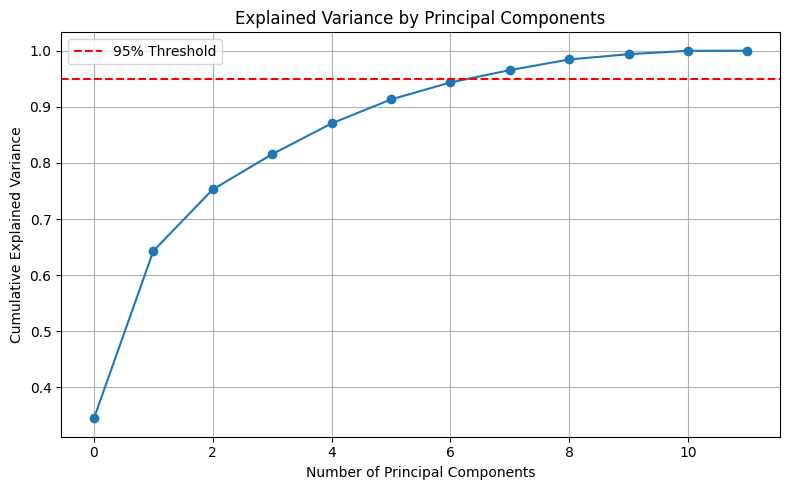

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Mumbainew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Mumbainew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Mumbainew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Mumbainew:")
print(feature_importance)


Top Features by LDA Importance for df_Mumbainew:
    Feature  LDA Importance
0     PM2.5            6.34
1      PM10            2.90
11   Xylene            2.57
10  Toluene            1.60
5       NH3            1.43
9   Benzene            1.06
6        CO            1.05
3       NO2            0.77
8        O3            0.67
4       NOx            0.57
2        NO            0.33
7       SO2            0.09


In [ ]:
x1=df_Mumbainew[["PM2.5","PM10","NO","NO2","NOx","NH3","SO2","O3"]]
y1=df_Mumbainew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.0070
Root Mean Squared Error (RMSE): 0.0839
R-squared (R2): 0.9309

Test Set Performance:
Mean Squared Error (MSE): 0.0075
Root Mean Squared Error (RMSE): 0.0864
R-squared (R2): 0.9349


In [ ]:
#XGBOOSTS
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train1, y_train1)
xgb_predictions1 = xgboost_model.predict(x_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)
print("XGBoost Model validation Evaluation For Model3")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")
xgb_test_predictions1 = xgboost_model.predict(x_test1)
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test_predictions1)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test_predictions1)
print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")

XGBoost Model validation Evaluation For Model3
MSE: 0.0069
RMSE: 0.0832
R²: 0.9338

XGBoost Test Set Evaluation:
MSE: 0.0065
RMSE: 0.0809
R²: 0.9430


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0059
RMSE: 0.0769
R²: 0.9435

Random Forest Test Set Evaluation for Model3
MSE: 0.0055
RMSE: 0.0738
R²: 0.9525


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1205, 8)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1124 - val_loss: 0.0594
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0399 - val_loss: 0.0264
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - val_loss: 0.0164
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - val_loss: 0.0119
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - val_loss: 0.0075
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - val_loss: 0.0070

PATNA

In [ ]:
#for Patna
df_Patna=df[df["City"]=="Patna"]
df_Patnanew=df_Patna.drop(["City","Date"],axis=1)
df_Patnanew

PM2.5          PM10        NO       NO2       NOx           NH3  \
23864  0.000000 -1.987539e-16 -0.148169 -0.152596  0.239137 -1.715374e-16   
23865  0.000000 -1.987539e-16  0.347644 -0.265060  0.518152 -1.715374e-16   
23866  0.000000 -1.987539e-16 -0.153788 -0.496963 -0.085244 -1.715374e-16   
23867  0.000000 -1.987539e-16 -0.212780 -0.564093 -0.125493 -1.715374e-16   
23868  0.000000 -1.987539e-16 -0.335914 -0.793380 -0.415081 -1.715374e-16   
...         ...           ...       ...       ...       ...           ...   
25717 -0.837194 -7.608014e-01 -0.379455 -0.241957 -0.342087 -1.041642e+00   
25718 -0.810937 -8.490534e-01  0.590634 -0.454680  0.151817 -1.034883e+00   
25719 -0.845104 -1.053110e+00  1.162294 -0.350934  0.524632 -1.024743e+00   
25720 -0.634378 -8.034589e-01  1.149185 -0.046235  0.673008 -1.057093e+00   
25721 -0.539113 -8.434590e-01  1.260614  0.112871  0.866750 -1.078821e+00   

             CO       SO2        O3   Benzene   Toluene    Xylene  \
23864 -0.102537 -0.752979 -1.269717 -0.230621 -0.493762 -0.680335   
23865  0.015099 -0.286358 -1.219625 -0.224997 -0.462061 -0.680335   
23866 -0.083179  0.359459 -1.084230 -0.230621 -0.491413 -0.680335   
23867 -0.156143 -0.602170 -1.226073 -0.229918 -0.494349 -0.680335   
23868 -0.142741 -0.432436 -1.120434 -0.230621 -0.501980 -0.680335   
...         ...       ...       ...       ...       ...       ...   
25717 -0.205282 -0.644752 -0.550581 -0.154001 -0.330563 -0.534063   
25718 -0.227618 -0.627601 -0.849147 -0.147675 -0.340543 -0.465402   
25719 -0.203793 -0.646526 -0.842699 -0.124478 -0.222547 -0.338252   
25720 -0.211238 -0.628192 -0.634398 -0.119558 -0.006515 -0.267048   
25721 -0.212727 -0.623461 -0.433040 -0.109014 -0.187911 -0.236532   

                AQI  AQI_Bucket  
23864  2.202172e-16           1  
23865  2.202172e-16           1  
23866  2.202172e-16           1  
23867  2.202172e-16           1  
23868  2.202172e-16           1  
...             ...         ...  
25717 -7.861606e-01           3  
25718 -6.544411e-01           3  
25719 -6.079519e-01           3  
25720 -5.692108e-01           3  
25721 -5.304698e-01           3  

[1858 rows x 14 columns]

In [ ]:
corre=df_Patnanew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.272450  0.278220  0.070719  0.261024  0.328073   
PM10        0.272450  1.000000  0.032920  0.162834  0.128271  0.660408   
NO          0.278220  0.032920  1.000000  0.306411  0.744340 -0.103599   
NO2         0.070719  0.162834  0.306411  1.000000  0.411912  0.126271   
NOx         0.261024  0.128271  0.744340  0.411912  1.000000  0.005703   
NH3         0.328073  0.660408 -0.103599  0.126271  0.005703  1.000000   
CO          0.510989  0.147535  0.354745  0.051350  0.246217  0.194923   
SO2         0.001077  0.032739 -0.275864  0.285256 -0.494926  0.126487   
O3         -0.131732 -0.046098 -0.326249  0.243751 -0.519584 -0.008989   
Benzene     0.007448  0.102201 -0.080808  0.249559 -0.175028  0.054305   
Toluene    -0.039252  0.046707 -0.197666  0.286444 -0.366686  0.071942   
Xylene     -0.047381  0.121018 -0.159382  0.292441 -0.336974  0.153969   
AQI         0.878327  0.168571  0.367304  0.034340  0.275813  0.213659   
AQI_Bucket  0.703912  0.025926  0.260515  0.111947  0.195709  0.077949   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.510989  0.001077 -0.131732  0.007448 -0.039252 -0.047381   
PM10        0.147535  0.032739 -0.046098  0.102201  0.046707  0.121018   
NO          0.354745 -0.275864 -0.326249 -0.080808 -0.197666 -0.159382   
NO2         0.051350  0.285256  0.243751  0.249559  0.286444  0.292441   
NOx         0.246217 -0.494926 -0.519584 -0.175028 -0.366686 -0.336974   
NH3         0.194923  0.126487 -0.008989  0.054305  0.071942  0.153969   
CO          1.000000  0.076199 -0.145095  0.153055  0.035760  0.139676   
SO2         0.076199  1.000000  0.791235  0.464344  0.694819  0.710914   
O3         -0.145095  0.791235  1.000000  0.413328  0.645195  0.641895   
Benzene     0.153055  0.464344  0.413328  1.000000  0.782158  0.733248   
Toluene     0.035760  0.694819  0.645195  0.782158  1.000000  0.880269   
Xylene      0.139676  0.710914  0.641895  0.733248  0.880269  1.000000   
AQI         0.573186  0.012984 -0.119660  0.004963 -0.040352 -0.016760   
AQI_Bucket  0.364198  0.067813 -0.082828  0.015923  0.027522  0.048077   

                 AQI  AQI_Bucket  
PM2.5       0.878327    0.703912  
PM10        0.168571    0.025926  
NO          0.367304    0.260515  
NO2         0.034340    0.111947  
NOx         0.275813    0.195709  
NH3         0.213659    0.077949  
CO          0.573186    0.364198  
SO2         0.012984    0.067813  
O3         -0.119660   -0.082828  
Benzene     0.004963    0.015923  
Toluene    -0.040352    0.027522  
Xylene     -0.016760    0.048077  
AQI         1.000000    0.750302  
AQI_Bucket  0.750302    1.000000

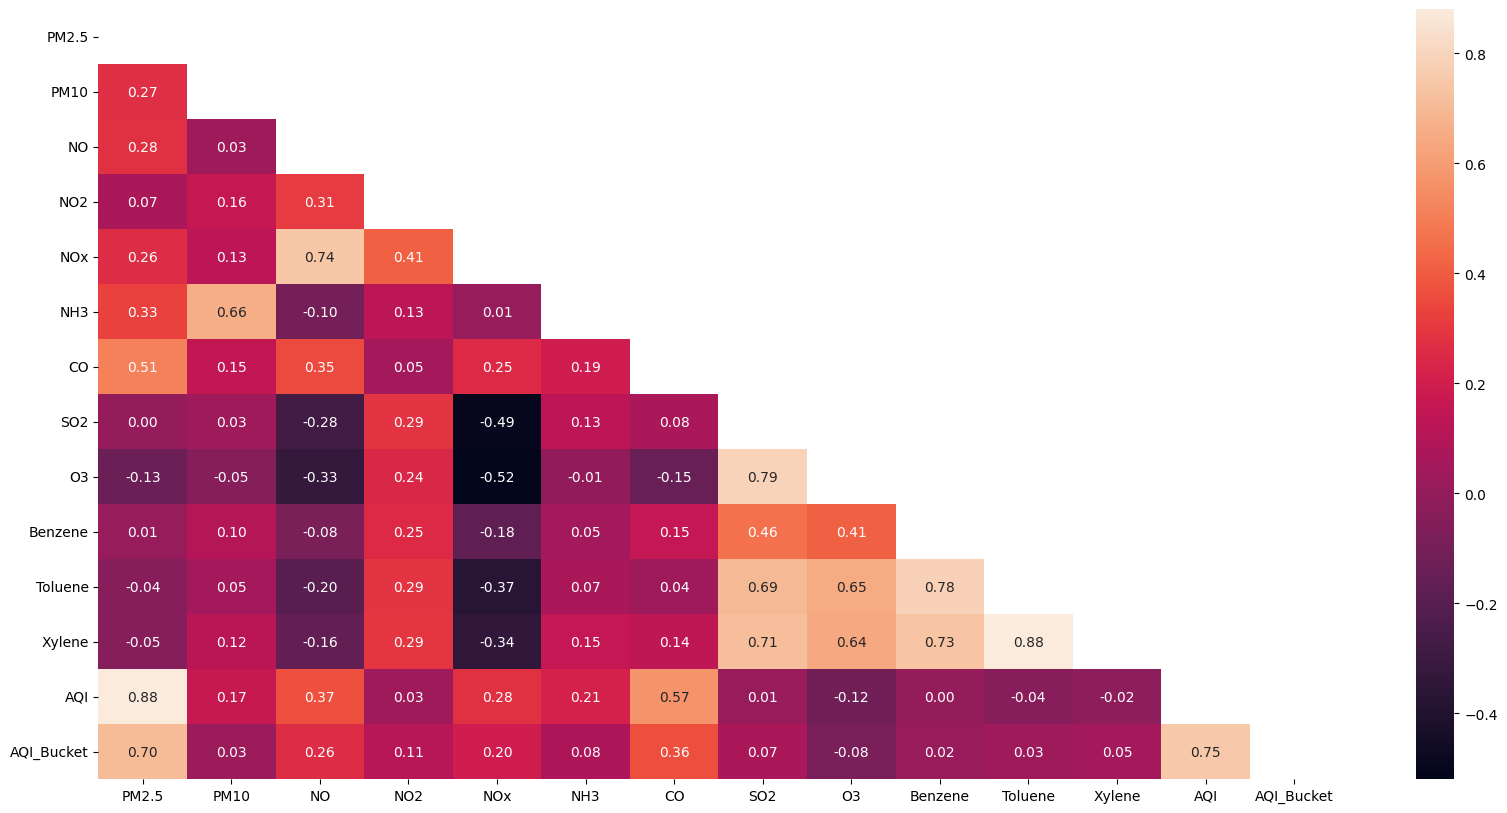

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [0.34951149 0.21090801 0.12740675 0.09879426 0.0654877  0.03964114
 0.03222987 0.02629997 0.016547   0.01398176 0.01099345 0.00819861]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1  -0.094547 -0.000803 -0.222314  0.115272 -0.294571  0.037245 -0.039633   
PC2   0.388067  0.338174  0.389630  0.331454  0.372895  0.293374  0.389415   
PC3   0.179766  0.488097 -0.381551 -0.323818 -0.293129  0.602769 -0.006106   
PC4   0.404275 -0.336981  0.005218 -0.528606 -0.216239 -0.200769  0.576326   
PC5  -0.366903  0.201317 -0.006329 -0.289519  0.088049 -0.065942 -0.053387   
PC6   0.688780 -0.016828 -0.053721 -0.043803  0.052777 -0.176175 -0.613264   
PC7  -0.051889  0.623226  0.388979 -0.317878 -0.106972 -0.463712 -0.035402   
PC8  -0.069288 -0.275193  0.550527 -0.384618  0.029009  0.420770 -0.297588   
PC9  -0.109223 -0.162910  0.128996 -0.144168  0.106059  0

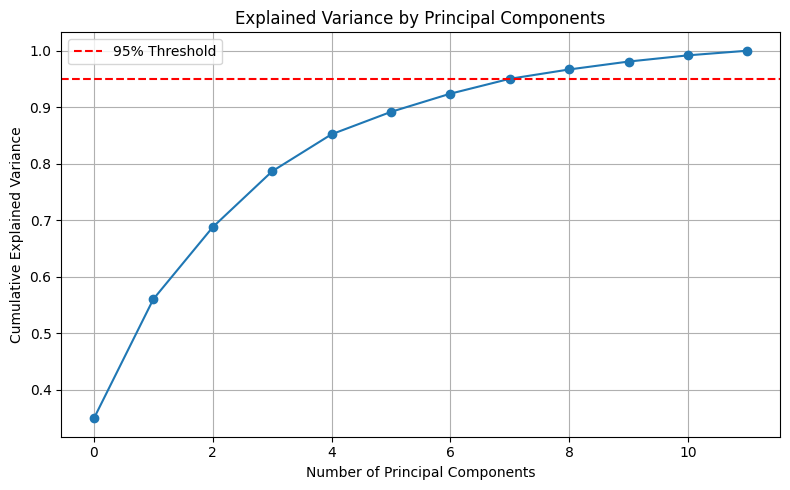

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Patnanew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Patnanew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Patnanew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Patnanew:")
print(feature_importance)


Top Features by LDA Importance for df_Patnanew:
    Feature  LDA Importance
0     PM2.5            4.67
11   Xylene            0.77
3       NO2            0.58
4       NOx            0.55
8        O3            0.50
6        CO            0.44
10  Toluene            0.44
1      PM10            0.43
2        NO            0.41
5       NH3            0.37
7       SO2            0.37
9   Benzene            0.26


In [ ]:
x1=df_Patnanew[["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO",  "O3",  "Toluene", "Xylene"]]
y1=df_Patnanew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.1349
Root Mean Squared Error (RMSE): 0.3673
R-squared (R2): 0.8108

Test Set Performance:
Mean Squared Error (MSE): 0.1483
Root Mean Squared Error (RMSE): 0.3851
R-squared (R2): 0.8232


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.1581
RMSE: 0.3977
R²: 0.8073

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.1486
RMSE: 0.3855
R²: 0.8228


In [ ]:
#XGBOOSTS
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train1, y_train1)
xgb_predictions1 = xgboost_model.predict(x_val1)
mse_xgb1 = mean_squared_error(y_val1, xgb_predictions1)
rmse_xgb1 = np.sqrt(mse_xgb1)
r2_xgb1 = r2_score(y_val1, xgb_predictions1)
print("XGBoost Model validation Evaluation For Model3")
print(f"MSE: {mse_xgb1:.4f}")
print(f"RMSE: {rmse_xgb1:.4f}")
print(f"R²: {r2_xgb1:.4f}")
xgb_test_predictions1 = xgboost_model.predict(x_test1)
mse_xgb_test1 = mean_squared_error(y_test1, xgb_test_predictions1)
rmse_xgb_test1 = np.sqrt(mse_xgb_test1)
r2_xgb_test1 = r2_score(y_test1, xgb_test_predictions1)
print("\nXGBoost Test Set Evaluation:")
print(f"MSE: {mse_xgb_test1:.4f}")
print(f"RMSE: {rmse_xgb_test1:.4f}")
print(f"R²: {r2_xgb_test1:.4f}")

XGBoost Model validation Evaluation For Model3
MSE: 0.1435
RMSE: 0.3788
R²: 0.8252

XGBoost Test Set Evaluation:
MSE: 0.1341
RMSE: 0.3662
R²: 0.8401


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.1331
RMSE: 0.3649
R²: 0.8378

Random Forest Test Set Evaluation for Model3
MSE: 0.1245
RMSE: 0.3528
R²: 0.8516


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1249
RMSE: 0.3534
R²: 0.8479

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1164
RMSE: 0.3411
R²: 0.8613


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.1285
RMSE: 0.3585
R²: 0.8434
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

LSTM Test Set Evaluation (Tuned):
MSE: 0.1182
RMSE: 0.3438
R²: 0.8590


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (1114, 10)
Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - loss: 0.8516 - val_loss: 0.7792
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5683 - val_loss: 0.5125
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3793 - val_loss: 0.3233
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2458 - val_loss: 0.1927
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1620 - val_loss: 0.1549
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1183 - val_loss: 0.1462
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1359 - val_loss: 0.1422
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0997 - val_loss: 0.1560
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1101 - val_loss: 0.1435
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1168 - val_loss: 0.1437
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1370 - val_loss: 0.1416
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━

Shillong

In [ ]:
#for Shillong
df_Shillong=df[df["City"]=="Shillong"]
df_Shillongnew=df_Shillong.drop(["City","Date"],axis=1)
df_Shillongnew

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
25722 -0.656763 -1.122341 -0.763371 -1.089797 -1.054632 -0.957146 -0.282713   
25723 -0.825243 -1.279405 -0.762903 -1.092412 -1.056679 -0.958112 -0.291647   
25724 -0.826253 -1.286957 -0.760562 -1.091104 -1.058384 -0.958595 -0.288669   
25725 -0.841570 -1.300244 -0.761498 -1.092848 -1.058726 -0.957629 -0.284202   
25726 -0.849817 -1.298146 -0.761030 -1.090669 -1.058043 -0.957629 -0.291647   
...         ...       ...       ...       ...       ...       ...       ...   
26027 -0.976893 -1.357071 -0.776480 -1.119003 -1.062478 -0.992393 -0.311005   
26028 -0.907211 -1.357071 -0.772735 -1.109848 -1.059408 -0.980805 -0.309516   
26029 -0.974873 -1.357071 -0.772735 -1.112028 -1.060431 -0.982254 -0.308027   
26030 -0.887182 -1.357071 -0.775544 -1.120746 -1.063842 -0.990945 -0.305049   
26031 -0.854193 -1.240943 -0.777417 -1.127285 -1.066571 -1.005430 -0.319940   

            SO2        O3   Benzene   Toluene        Xylene           AQI  \
25722 -0.564320 -0.077440 -0.208830  0.000000  1.129320e-16  2.202172e-16   
25723 -0.554858 -0.299132 -0.215156 -0.468519  1.129320e-16 -1.003110e+00   
25724 -0.513459 -0.049171 -0.222186 -0.478498  1.129320e-16 -9.798657e-01   
25725 -0.506362 -0.329385 -0.224294 -0.500806  1.129320e-16 -1.018607e+00   
25726 -0.512868 -0.611088 -0.217968 -0.502567  1.129320e-16 -1.041851e+00   
...         ...       ...       ...       ...           ...           ...   
26027 -0.577923 -0.472221 -0.229918 -0.507851  1.129320e-16 -1.018607e+00   
26028 -0.563729  0.020759 -0.229918 -0.508438  1.129320e-16 -8.791390e-01   
26029 -0.544212 -1.172510 -0.229215 -0.503154  1.129320e-16 -1.088341e+00   
26030 -0.560772 -1.403129 -0.229215 -0.502567  1.129320e-16 -1.127082e+00   
26031 -0.605719 -0.832284 -0.230621 -0.509612  1.129320e-16 -1.103837e+00   

       AQI_Bucket  
25722           1  
25723           0  
25724           0  
25725           0  
25726           0  
...           ...  
26027           0  
26028           3  
26029           0  
26030           0  
26031           0  

[310 rows x 14 columns]

In [ ]:
corre=df_Shillongnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.839946  0.655749  0.658348  0.454102  0.657259   
PM10        0.839946  1.000000  0.653525  0.653152  0.520404  0.651767   
NO          0.655749  0.653525  1.000000  0.999227  0.689340  0.998951   
NO2         0.658348  0.653152  0.999227  1.000000  0.689007  0.999119   
NOx         0.454102  0.520404  0.689340  0.689007  1.000000  0.688921   
NH3         0.657259  0.651767  0.998951  0.999119  0.688921  1.000000   
CO          0.476742  0.505449  0.641421  0.642675  0.983901  0.642743   
SO2         0.578804  0.628915  0.782508  0.782628  0.614845  0.787424   
O3          0.308902  0.280375  0.211553  0.222417  0.139451  0.226179   
Benzene     0.120942  0.085350  0.079269  0.083971  0.263595  0.077998   
Toluene     0.129953  0.096307  0.112214  0.117368  0.297026  0.111698   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.539068  0.711220  0.528283  0.523870  0.425105  0.514689   
AQI_Bucket  0.258635  0.155095 -0.052518 -0.050236 -0.050669 -0.051378   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.476742  0.578804  0.308902  0.120942  0.129953     NaN   
PM10        0.505449  0.628915  0.280375  0.085350  0.096307     NaN   
NO          0.641421  0.782508  0.211553  0.079269  0.112214     NaN   
NO2         0.642675  0.782628  0.222417  0.083971  0.117368     NaN   
NOx         0.983901  0.614845  0.139451  0.263595  0.297026     NaN   
NH3         0.642743  0.787424  0.226179  0.077998  0.111698     NaN   
CO          1.000000  0.570693  0.179069  0.283263  0.312925     NaN   
SO2         0.570693  1.000000  0.162690 -0.013959  0.004826     NaN   
O3          0.179069  0.162690  1.000000  0.255162  0.264070     NaN   
Benzene     0.283263 -0.013959  0.255162  1.000000  0.983689     NaN   
Toluene     0.312925  0.004826  0.264070  0.983689  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.404392  0.380699  0.233850  0.010395  0.025223     NaN   
AQI_Bucket  0.012896 -0.066284  0.498340  0.273271  0.259588     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.539068    0.258635  
PM10        0.711220    0.155095  
NO          0.528283   -0.052518  
NO2         0.523870   -0.050236  
NOx         0.425105   -0.050669  
NH3         0.514689   -0.051378  
CO          0.404392    0.012896  
SO2         0.380699   -0.066284  
O3          0.233850    0.498340  
Benzene     0.010395    0.273271  
Toluene     0.025223    0.259588  
Xylene           NaN         NaN  
AQI         1.000000    0.124412  
AQI_Bucket  0.124412    1.000000

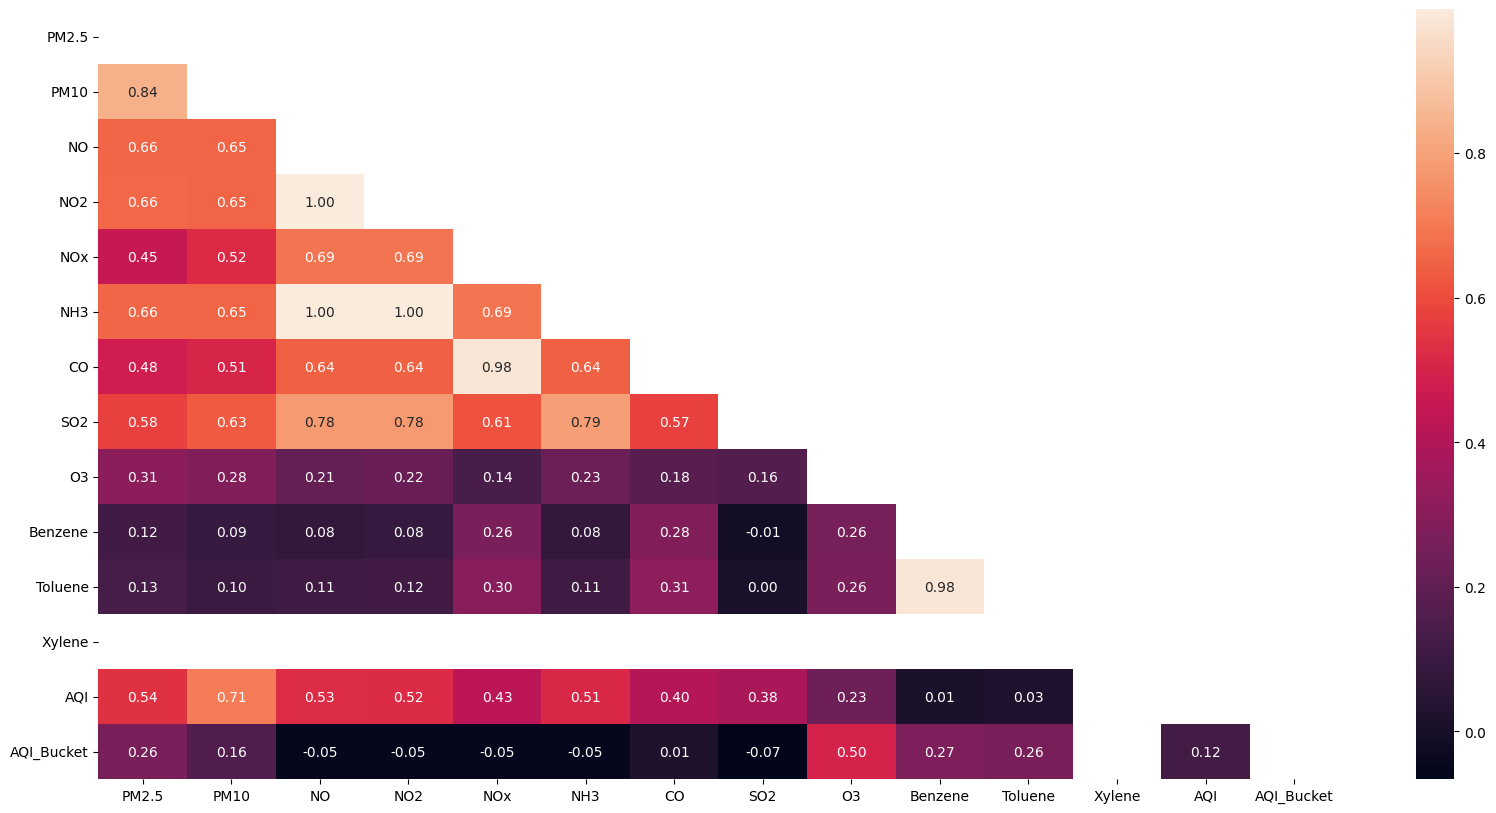

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Shillongnew, col))

df_Shillongnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Shillongnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Shillongnew[columns_to_scale] = scaler.fit_transform(df_Shillongnew[columns_to_scale])

Explained variance ratio by each principal component:
 [4.23275370e-01 2.28815075e-01 1.45199466e-01 7.12975272e-02
 5.60606821e-02 3.84349526e-02 1.41366336e-02 1.24406326e-02
 8.99751370e-03 1.26606971e-03 7.60779628e-05 0.00000000e+00]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.112874  0.007133  0.404298  0.436352  0.432070  0.436240  0.309884   
PC2   0.471516  0.485327 -0.267412 -0.176049 -0.064124 -0.178545  0.387463   
PC3  -0.318891 -0.214948 -0.128338 -0.078385 -0.016810 -0.077133  0.078075   
PC4  -0.286898  0.220472 -0.017408  0.057633  0.054232  0.056593 -0.248005   
PC5  -0.299252 -0.305146 -0.123131 -0.141892 -0.134785 -0.132453 -0.002413   
PC6  -0.322559  0.745330  0.054767  0.006018 -0.009963  0.018623 -0.273541   
PC7  -0.485814  0.083569 -0.198955 -0.114297  0.615114 -0.126585  0.322378   
PC8  -0.291919  0.084746  0.068066  0.024516 -0.446637  0.029363  0.710374   
PC9  -0.

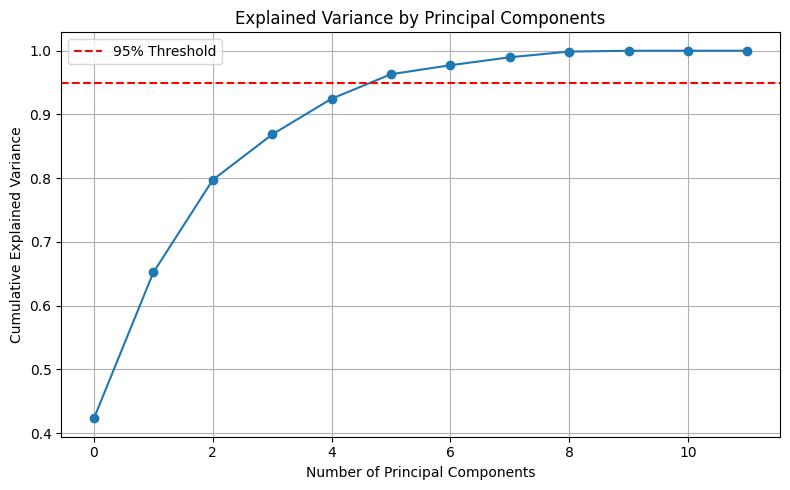

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Shillongnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Shillongnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Shillongnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Shillongnew:")
print(feature_importance)


Top Features by LDA Importance for df_Shillongnew:
    Feature  LDA Importance
5       NH3            3.26
8        O3            1.01
1      PM10            0.84
2        NO            0.82
3       NO2            0.76
0     PM2.5            0.70
4       NOx            0.67
6        CO            0.63
9   Benzene            0.60
7       SO2            0.41
10  Toluene            0.20
11   Xylene            0.00


In [ ]:
selected_features = ["NO", "NO2", "NH3","O3","PM2.5","NOx","CO","SO2","Benzene", "PM10"]
x1=df_Shillongnew[selected_features]
y1=df_Shillongnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3817
Root Mean Squared Error (RMSE): 0.6178
R-squared (R2): 0.6393

Test Set Performance:
Mean Squared Error (MSE): 0.3357
Root Mean Squared Error (RMSE): 0.5794
R-squared (R2): 0.6711


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.3249
RMSE: 0.5700
R²: 0.5746

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.3388
RMSE: 0.5821
R²: 0.6680


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.3609
RMSE: 0.6007
R²: 0.5275

XGBoost Test Set Evaluation (Tuned):
MSE: 0.2355
RMSE: 0.4853
R²: 0.7692


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2913
RMSE: 0.5397
R²: 0.6185

Random Forest Test Set Evaluation for Model3
MSE: 0.2928
RMSE: 0.5411
R²: 0.7131


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.3913
RMSE: 0.6255
R²: 0.4877

Random Forest Test Set Evaluation (Tuned):
MSE: 0.2614
RMSE: 0.5113
R²: 0.7438


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.3134
RMSE: 0.5598
R²: 0.5896
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.2381
RMSE: 0.4880
R²: 0.7667


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(30, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=32)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (116, 10)
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - loss: 1.1520 - val_loss: 0.7569
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.0769 - val_loss: 0.7383
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9796 - val_loss: 0.7192
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.9374 - val_loss: 0.6990
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.9438 - val_loss: 0.6773
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8789 - val_loss: 0.6536
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.8800 - val_loss: 0.6279
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.8977 - val_loss: 0.6000
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.8570 - val_loss: 0.5701
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.7612 - val_loss: 0.5390
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.6435 - val_loss: 0.5070
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - los

TALCHER


In [ ]:
#for Talcher
df_Talcher=df[df["City"]=="Talcher"]
df_Talchernew=df_Talcher.drop(["City","Date"],axis=1)
df_Talchernew

PM2.5          PM10            NO       NO2       NOx           NH3  \
26032  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26033  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26034  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26035  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26036  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
...         ...           ...           ...       ...       ...           ...   
26952 -0.786027 -1.289335e+00 -4.403199e-01 -0.288163 -0.560046 -8.089161e-01   
26953 -0.716514 -1.217586e+00 -1.663344e-16  0.000000 -1.102044 -1.715374e-16   
26954 -0.792423 -1.296048e+00  2.455782e-01 -0.388858 -0.455330 -6.399239e-01   
26955 -0.821877 -1.326817e+00  1.716042e-01 -0.088518  0.521562 -9.190024e-01   
26956 -0.717019 -1.217726e+00  4.754594e-01  0.034844  0.845261 -1.067716e+00   

                 CO       SO2            O3       Benzene  Toluene  \
26032  1.811297e-01  0.000000 -1.709629e+00 -3.121646e-17      0.0   
26033  1.729399e-01  0.000000 -1.709133e+00 -3.121646e-17      0.0   
26034  1.811297e-01  0.000000 -1.709629e+00 -3.121646e-17      0.0   
26035 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
26036 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
...             ...       ...           ...           ...      ...   
26952 -1.591209e-01  0.241769  7.131130e-01 -2.306208e-01      0.0   
26953 -1.040256e-01  0.402040  6.972424e-01 -2.306208e-01      0.0   
26954 -9.806933e-02  0.370104  6.124340e-01 -2.306208e-01      0.0   
26955 -1.412521e-01 -0.011354 -2.837575e-01 -2.306208e-01      0.0   
26956 -1.084928e-01 -0.006622 -9.716476e-01 -2.306208e-01      0.0   

             Xylene           AQI  AQI_Bucket  
26032  1.129320e-16  2.202172e-16           1  
26033  1.129320e-16  2.202172e-16           1  
26034  1.129320e-16  2.202172e-16           1  
26035  1.129320e-16  2.202172e-16           1  
26036  1.129320e-16  2.202172e-16           1  
...             ...           ...         ...  
26952  1.129320e-16 -5.924554e-01           3  
26953  1.129320e-16 -5.304698e-01           3  
26954  1.129320e-16 -5.227216e-01           3  
26955  1.129320e-16 -6.234483e-01           3  
26956  1.129320e-16 -5.072252e-01           1  

[925 rows x 14 columns]

In [ ]:
corre=df_Talchernew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.656079  0.055022  0.285943  0.132020 -0.048610   
PM10        0.656079  1.000000 -0.010450  0.130996  0.030121 -0.133430   
NO          0.055022 -0.010450  1.000000  0.079651  0.642692  0.287884   
NO2         0.285943  0.130996  0.079651  1.000000  0.257417  0.456704   
NOx         0.132020  0.030121  0.642692  0.257417  1.000000  0.261776   
NH3        -0.048610 -0.133430  0.287884  0.456704  0.261776  1.000000   
CO          0.338449  0.165356  0.140397  0.157494  0.138699  0.144895   
SO2        -0.071740  0.128281  0.081201 -0.295673  0.076212 -0.242792   
O3          0.079254 -0.125380 -0.135241  0.185700 -0.276790  0.317620   
Benzene     0.218497  0.007326  0.031136  0.271535  0.160046  0.350065   
Toluene     0.007579 -0.069114 -0.101362 -0.107461 -0.022180 -0.355438   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.774232  0.701591  0.090092  0.132088  0.108799 -0.177724   
AQI_Bucket  0.416367  0.238543  0.059441 -0.041326  0.079018 -0.323121   

                  CO       SO2        O3   Benzene   Toluene  Xylene  \
PM2.5       0.338449 -0.071740  0.079254  0.218497  0.007579     NaN   
PM10        0.165356  0.128281 -0.125380  0.007326 -0.069114     NaN   
NO          0.140397  0.081201 -0.135241  0.031136 -0.101362     NaN   
NO2         0.157494 -0.295673  0.185700  0.271535 -0.107461     NaN   
NOx         0.138699  0.076212 -0.276790  0.160046 -0.022180     NaN   
NH3         0.144895 -0.242792  0.317620  0.350065 -0.355438     NaN   
CO          1.000000 -0.082657  0.065121  0.285836 -0.019902     NaN   
SO2        -0.082657  1.000000 -0.238159 -0.438540 -0.258057     NaN   
O3          0.065121 -0.238159  1.000000  0.039641 -0.143279     NaN   
Benzene     0.285836 -0.438540  0.039641  1.000000  0.288427     NaN   
Toluene    -0.019902 -0.258057 -0.143279  0.288427  1.000000     NaN   
Xylene           NaN       NaN       NaN       NaN       NaN     NaN   
AQI         0.263595  0.095362 -0.051207  0.079688  0.003890     NaN   
AQI_Bucket -0.057085  0.201099 -0.182685 -0.163366  0.003981     NaN   

                 AQI  AQI_Bucket  
PM2.5       0.774232    0.416367  
PM10        0.701591    0.238543  
NO          0.090092    0.059441  
NO2         0.132088   -0.041326  
NOx         0.108799    0.079018  
NH3        -0.177724   -0.323121  
CO          0.263595   -0.057085  
SO2         0.095362    0.201099  
O3         -0.051207   -0.182685  
Benzene     0.079688   -0.163366  
Toluene     0.003890    0.003981  
Xylene           NaN         NaN  
AQI         1.000000    0.594162  
AQI_Bucket  0.594162    1.000000

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Talchernew, col))

df_Talchernew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Talchernew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Talchernew[columns_to_scale] = scaler.fit_transform(df_Talchernew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.29177258 0.20194502 0.17107465 0.08185046 0.07970541 0.05854226
 0.04923278 0.02585852 0.0234951  0.01652321 0.         0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.278108  0.145827 -0.159802  0.444138  0.042447  0.452546  0.316063   
PC2  -0.422199 -0.352608  0.437655  0.223752  0.555448  0.304134 -0.095749   
PC3   0.382494  0.549393  0.350453  0.022524  0.341605 -0.138511  0.238400   
PC4  -0.149311 -0.206855  0.389561 -0.229582 -0.177880 -0.071580  0.762795   
PC5  -0.009717  0.130771 -0.112324  0.384057  0.139353  0.252219  0.029030   
PC6  -0.039087 -0.036787 -0.147937 -0.230358  0.007117  0.185311 -0.167764   
PC7   0.262862  0.164312  0.511974 -0.268967  0.092143  0.051627 -0.424354   
PC8   0.374201 -0.380065 -0.373141 -0.281085  0.638411 -0.185352  0.157658   
PC9  -0.453053  0.501972 -0.252883 -0.497234  0.227288  0

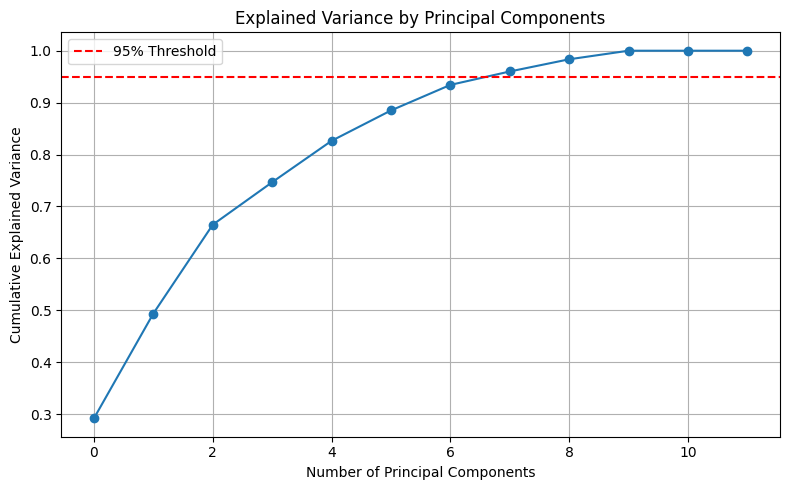

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Talchernew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Talchernew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Talchernew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Talchernew:")
print(feature_importance)


Top Features by LDA Importance for df_Talchernew:
    Feature  LDA Importance
1      PM10            2.76
0     PM2.5            2.46
8        O3            0.95
3       NO2            0.59
5       NH3            0.58
6        CO            0.57
7       SO2            0.47
2        NO            0.43
4       NOx            0.43
9   Benzene            0.43
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Talchernew[["PM2.5", "PM10", "NO", "NO2","NOx", "NH3", "CO", "SO2","O3", "Benzene"]]
y1=df_Talchernew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
model = LinearRegression()
model.fit(x_train1, y_train1)
# Predictions on validation and test sets
y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)
# Performance metrics for validation set
print("Validation Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train1, y_train_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train1, y_train_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_train1, y_train_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_train1, y_train_pred):.4f}")
# Performance metrics for test set
print("\nTest Set Performance:")
#print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test1, y_test_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test1, y_test_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test1, y_test_pred)):.4f}")
print(f"R-squared (R2): {r2_score(y_test1, y_test_pred):.4f}")

Validation Set Performance:
Mean Squared Error (MSE): 0.3177
Root Mean Squared Error (RMSE): 0.5636
R-squared (R2): 0.7052

Test Set Performance:
Mean Squared Error (MSE): 0.2778
Root Mean Squared Error (RMSE): 0.5271
R-squared (R2): 0.6889


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.2901
RMSE: 0.5386
R²: 0.6592

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.2769
RMSE: 0.5262
R²: 0.6898


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2022
RMSE: 0.4497
R²: 0.7625

XGBoost Test Set Evaluation (Tuned):
MSE: 0.1240
RMSE: 0.3521
R²: 0.8612


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.2006
RMSE: 0.4478
R²: 0.7644

Random Forest Test Set Evaluation for Model3
MSE: 0.1502
RMSE: 0.3875
R²: 0.8318


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.1937
RMSE: 0.4402
R²: 0.7724

Random Forest Test Set Evaluation (Tuned):
MSE: 0.1447
RMSE: 0.3804
R²: 0.8379


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.2215
RMSE: 0.4706
R²: 0.7398
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.1989
RMSE: 0.4459
R²: 0.7773


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=100, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (333, 10)
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 1.2290 - val_loss: 0.7071
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9365 - val_loss: 0.5520
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7616 - val_loss: 0.3443
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4958 - val_loss: 0.2092
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3770 - val_loss: 0.1792
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3862 - val_loss: 0.1621
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4285 - val_loss: 0.1579
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3390 - val_loss: 0.1526
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3410 - val_loss: 0.1562
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3357 - val_loss: 0.1565
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3665 - val_loss: 0.1565
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2388 - v

Thiruvananthapuram

In [ ]:
#for Thiruvananthapuram
df_Thiruvananthapuram=df[df["City"]=="Thiruvananthapuram"]
df_Thiruvananthapuramnew=df_Thiruvananthapuram.drop(["City","Date"],axis=1)
df_Thiruvananthapuramnew

PM2.5          PM10            NO       NO2       NOx           NH3  \
26957 -0.495689 -1.357071e+00 -6.964197e-01 -0.935486 -0.890566 -1.715374e-16   
26958  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26959  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
26960 -0.731325 -1.148635e+00 -7.900577e-01 -1.018308 -0.989484 -1.715374e-16   
26961  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
...         ...           ...           ...       ...       ...           ...   
28064 -0.831303 -1.148076e+00 -4.393835e-01 -0.830868 -0.677041 -8.166414e-01   
28065 -0.756404 -1.037166e+00 -4.950981e-01 -0.923280 -0.775618 -8.398175e-01   
28066 -0.745295 -9.988442e-01 -4.075466e-01 -0.776379 -0.662716 -8.610622e-01   
28067 -0.787542 -1.071292e+00 -4.178468e-01 -0.812124 -0.678747 -8.499570e-01   
28068 -1.101612 -1.162621e+00 -7.441751e-01 -1.144721 -1.014042 -8.625107e-01   

                 CO       SO2            O3       Benzene  Toluene  \
26957 -2.291068e-01 -0.616955 -8.030228e-01 -3.121646e-17      0.0   
26958 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
26959 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
26960 -2.261286e-01 -0.593299 -7.633464e-01 -3.121646e-17      0.0   
26961 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17      0.0   
...             ...       ...           ...           ...      ...   
28064 -2.439974e-01 -0.363833 -2.282104e-01 -3.121646e-17      0.0   
28065 -2.439974e-01 -0.367381 -3.353368e-01 -3.121646e-17      0.0   
28066 -2.335739e-01 -0.382166 -4.404794e-01 -3.121646e-17      0.0   
28067 -2.559099e-01 -0.362650 -4.211371e-01 -3.121646e-17      0.0   
28068 -2.722895e-01 -0.495717 -6.145597e-01 -3.121646e-17      0.0   

             Xylene           AQI  AQI_Bucket  
26957  1.129320e-16  2.202172e-16           1  
26958  1.129320e-16  2.202172e-16           1  
26959  1.129320e-16  2.202172e-16           1  
26960  1.129320e-16  2.202172e-16           1  
26961  1.129320e-16  2.202172e-16           1  
...             ...           ...         ...  
28064  1.129320e-16 -9.643693e-01           0  
28065  1.129320e-16 -9.566211e-01           0  
28066  1.129320e-16 -9.101318e-01           0  
28067  1.129320e-16 -9.798657e-01           0  
28068  1.129320e-16 -9.721175e-01           0  

[1112 rows x 14 columns]

In [ ]:
corre=df_Thiruvananthapuramnew.corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.894336  0.193805  0.447119  0.187887  0.071841   
PM10        0.894336  1.000000  0.235760  0.452461  0.198896  0.091869   
NO          0.193805  0.235760  1.000000  0.702005  0.766908  0.344461   
NO2         0.447119  0.452461  0.702005  1.000000  0.748513  0.256139   
NOx         0.187887  0.198896  0.766908  0.748513  1.000000  0.373470   
NH3         0.071841  0.091869  0.344461  0.256139  0.373470  1.000000   
CO          0.331142  0.263847  0.075873  0.197816  0.225481  0.078681   
SO2         0.513786  0.512013  0.418454  0.498256  0.323165  0.129404   
O3          0.483508  0.512743  0.033449  0.246828  0.130821 -0.194077   
Benzene          NaN       NaN       NaN       NaN       NaN       NaN   
Toluene          NaN       NaN       NaN       NaN       NaN       NaN   
Xylene           NaN       NaN       NaN       NaN       NaN       NaN   
AQI         0.711137  0.677904  0.156420  0.343135  0.069120  0.034572   
AQI_Bucket -0.173713 -0.170667 -0.039262  0.013969  0.031968 -0.048960   

                  CO       SO2        O3  Benzene  Toluene  Xylene       AQI  \
PM2.5       0.331142  0.513786  0.483508      NaN      NaN     NaN  0.711137   
PM10        0.263847  0.512013  0.512743      NaN      NaN     NaN  0.677904   
NO          0.075873  0.418454  0.033449      NaN      NaN     NaN  0.156420   
NO2         0.197816  0.498256  0.246828      NaN      NaN     NaN  0.343135   
NOx         0.225481  0.323165  0.130821      NaN      NaN     NaN  0.069120   
NH3         0.078681  0.129404 -0.194077      NaN      NaN     NaN  0.034572   
CO          1.000000  0.228957  0.100398      NaN      NaN     NaN  0.336661   
SO2         0.228957  1.000000  0.415549      NaN      NaN     NaN  0.438671   
O3          0.100398  0.415549  1.000000      NaN      NaN     NaN  0.347465   
Benzene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Toluene          NaN       NaN       NaN      NaN      NaN     NaN       NaN   
Xylene           NaN       NaN       NaN      NaN      NaN     NaN       NaN   
AQI         0.336661  0.438671  0.347465      NaN      NaN     NaN  1.000000   
AQI_Bucket  0.006189 -0.155421  0.008493      NaN      NaN     NaN -0.267056   

            AQI_Bucket  
PM2.5        -0.173713  
PM10         -0.170667  
NO           -0.039262  
NO2           0.013969  
NOx           0.031968  
NH3          -0.048960  
CO            0.006189  
SO2          -0.155421  
O3            0.008493  
Benzene            NaN  
Toluene            NaN  
Xylene             NaN  
AQI          -0.267056  
AQI_Bucket    1.000000

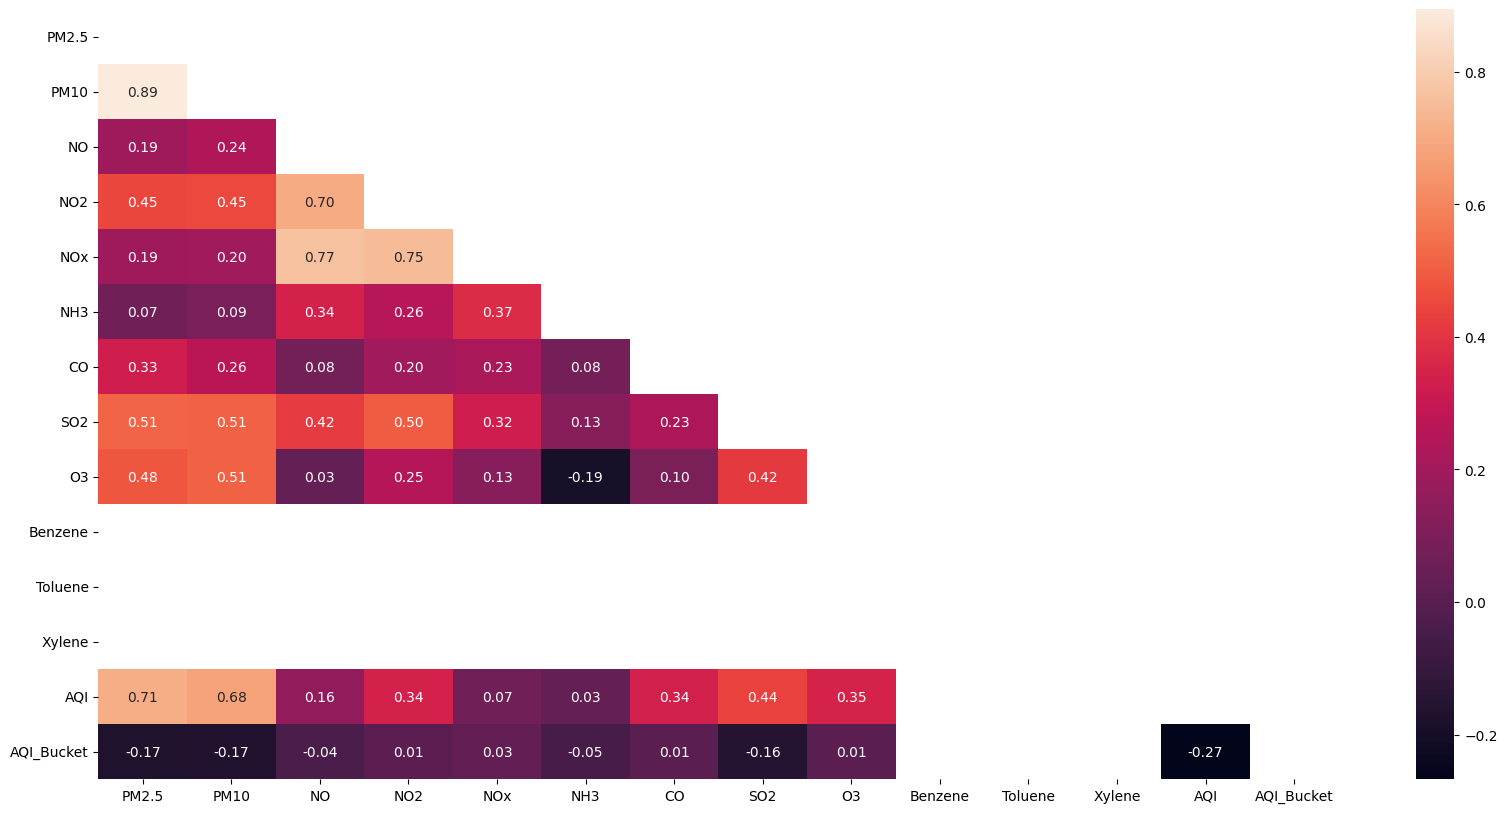

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index

outlier_indices = set()
for col in ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]:
    outlier_indices.update(detect_outliers_iqr(df_Thiruvananthapuramnew, col))

df_Thiruvananthapuramnew.drop(index=outlier_indices, errors="ignore", inplace=True)
df_Thiruvananthapuramnew.reset_index(drop=True, inplace=True)

In [ ]:
##SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame
scaler = StandardScaler()
# Select the columns you want to scale
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene','AQI']
df_Thiruvananthapuramnew[columns_to_scale] = scaler.fit_transform(df_Thiruvananthapuramnew[columns_to_scale])

Explained variance ratio by each principal component:
 [0.42918751 0.20417784 0.10530548 0.08892957 0.06361606 0.05642454
 0.02391171 0.01754692 0.01090038 0.         0.         0.        ]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.359429  0.374202  0.367650  0.437669  0.369146  0.199491  0.197515   
PC2   0.405230  0.391197 -0.387708 -0.184950 -0.394384 -0.374628  0.064040   
PC3   0.157253  0.065445 -0.217784 -0.140807 -0.035761  0.295460  0.822586   
PC4   0.291579  0.313911 -0.091802 -0.113980 -0.259377  0.639180 -0.481383   
PC5  -0.303098 -0.231510 -0.217646 -0.218755  0.019535  0.547477  0.083983   
PC6  -0.090838 -0.133644  0.038678 -0.098138 -0.301657 -0.096519  0.109127   
PC7  -0.011015 -0.158379 -0.683062  0.696039  0.046742  0.026195 -0.075266   
PC8   0.192239  0.020403 -0.357240 -0.446432  0.734692 -0.112936 -0.150976   
PC9  -0.677979  0.712150 -0.124899  0.012858  0.079377 -0

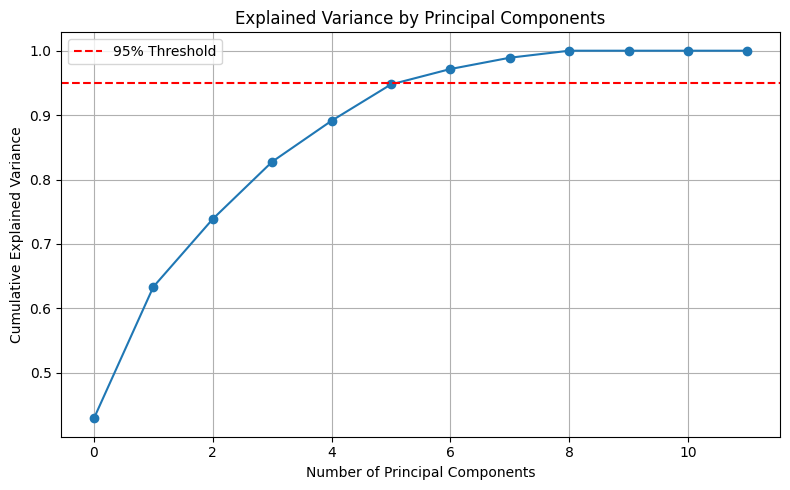

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X =df_Thiruvananthapuramnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y =df_Thiruvananthapuramnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Thiruvananthapuramnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Thiruvananthapuramnew:")
print(feature_importance)


Top Features by LDA Importance for df_Thiruvananthapuramnew:
    Feature  LDA Importance
0     PM2.5            2.48
6        CO            0.71
3       NO2            0.65
4       NOx            0.53
8        O3            0.50
7       SO2            0.49
2        NO            0.41
1      PM10            0.29
5       NH3            0.03
9   Benzene            0.00
10  Toluene            0.00
11   Xylene            0.00


In [ ]:
x1=df_Thiruvananthapuramnew[["PM2.5",  "NO2", "NOx",  "CO",  "O3","SO2"]]
y1=df_Thiruvananthapuramnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV with alpha tuning
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print("Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\nRidge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.3556
RMSE: 0.5964
R²: 0.6200

Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.4810
RMSE: 0.6936
R²: 0.5548


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.2777
RMSE: 0.5269
R²: 0.7034

XGBoost Test Set Evaluation (Tuned):
MSE: 0.3119
RMSE: 0.5585
R²: 0.7113


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.3000
RMSE: 0.5478
R²: 0.6794

Random Forest Test Set Evaluation (Tuned):
MSE: 0.3214
RMSE: 0.5669
R²: 0.7025


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reshape input to 3D [samples, timesteps, features]
x_train_lstm = np.reshape(x_train1, (x_train1.shape[0], 1, x_train1.shape[1]))
x_val_lstm = np.reshape(x_val1, (x_val1.shape[0], 1, x_val1.shape[1]))
x_test_lstm = np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))

# Define model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(1, x_train1.shape[1])))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(optimizer='adam', loss='mse')

# Fit
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(x_train_lstm, y_train1, epochs=100, batch_size=32,
               validation_data=(x_val_lstm, y_val1), callbacks=[early_stop], verbose=0)

# --- Validation set evaluation ---
val_pred_lstm = lstm_model.predict(x_val_lstm).flatten()
mse_val_lstm = mean_squared_error(y_val1, val_pred_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
r2_val_lstm = r2_score(y_val1, val_pred_lstm)
print("LSTM Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_lstm:.4f}")
print(f"RMSE: {rmse_val_lstm:.4f}")
print(f"R²: {r2_val_lstm:.4f}")

# --- Test set evaluation ---
test_pred_lstm = lstm_model.predict(np.reshape(x_test1, (x_test1.shape[0], 1, x_test1.shape[1]))).flatten()
mse_test_lstm = mean_squared_error(y_test1, test_pred_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
r2_test_lstm = r2_score(y_test1, test_pred_lstm)
print("\nLSTM Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_lstm:.4f}")
print(f"RMSE: {rmse_test_lstm:.4f}")
print(f"R²: {r2_test_lstm:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
LSTM Validation Set Evaluation (Tuned):
MSE: 0.2715
RMSE: 0.5210
R²: 0.7100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

LSTM Test Set Evaluation (Tuned):
MSE: 0.3426
RMSE: 0.5854
R²: 0.6829


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (667, 6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.9362 - val_loss: 0.7214
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7412 - val_loss: 0.4059
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4488 - val_loss: 0.3311
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4761 - val_loss: 0.3166
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3557 - val_loss: 0.3296
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4122 - val_loss: 0.3055
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2877 - val_loss: 0.3165
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3658 - val_loss: 0.3045
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4336 - val_loss: 0.3008
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3137 - val_loss: 0.3037
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3645 - val_loss: 0.3046
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.

Visakhapatnam

In [ ]:
df_Visakhapatnam=df[df["City"]=="Visakhapatnam"]
df_Visakhapatnamnew=df_Visakhapatnam.drop(["City","Date"],axis=1)
df_Visakhapatnamnew

PM2.5          PM10            NO       NO2       NOx           NH3  \
28069 -0.379217 -4.982830e-01 -3.861300e-02  1.237948  0.270517  8.287962e-01   
28070  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
28071  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
28072  0.000000 -1.987539e-16 -1.663344e-16  0.000000  0.000000 -1.715374e-16   
28073 -0.849144 -7.010809e-01 -4.801160e-01 -0.151724 -0.499673 -3.709849e-01   
...         ...           ...           ...       ...       ...           ...   
29526 -0.882470 -9.396831e-01 -4.632612e-01 -0.152596 -0.435547 -5.317689e-01   
29527 -0.724930 -6.159058e-01 -6.627100e-01 -0.109006 -0.538216 -5.549450e-01   
29528 -0.749671 -7.328293e-01 -6.613055e-01  0.042254 -0.476819 -6.167478e-01   
29529 -0.855203 -9.532496e-01 -6.332141e-01  0.030485 -0.460788 -6.495806e-01   
29530 -0.882806 -7.290530e-01 -8.041034e-01 -0.074569 -0.622808 -8.827898e-01   

                 CO       SO2            O3       Benzene   Toluene  \
28069 -1.859240e-01  0.748898 -1.192348e+00  2.213646e-01  0.223020   
28070 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
28071 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
28072 -6.612762e-17  0.000000  3.523975e-16 -3.121646e-17  0.000000   
28073 -2.365521e-01  0.328114 -1.959733e-01 -2.255290e-02 -0.052891   
...             ...       ...           ...           ...       ...   
29526 -2.648442e-01 -0.353779 -5.550451e-01 -7.316402e-02  0.197777   
29527 -2.573989e-01 -0.107162 -2.158116e-01 -1.786039e-01 -0.381049   
29528 -2.633552e-01 -0.361467 -1.751432e-01 -2.299179e-01 -0.510199   
29529 -2.573989e-01 -0.277487 -3.070674e-01 -2.306208e-01 -0.510786   
29530 -2.469755e-01 -0.735237 -8.650172e-01 -3.121646e-17  0.000000   

             Xylene           AQI  AQI_Bucket  
28069  8.897259e-02  2.202172e-16           1  
28070  1.129320e-16  2.202172e-16           1  
28071  1.129320e-16  2.202172e-16           1  
28072  1.129320e-16  2.202172e-16           1  
28073  1.268251e-02  2.202172e-16           1  
...             ...           ...         ...  
29526 -5.950952e-01 -9.721175e-01           0  
29527 -6.803345e-01 -7.474195e-01           3  
29528 -6.803345e-01 -7.629159e-01           3  
29529 -6.803345e-01 -8.713908e-01           3  
29530  1.129320e-16 -9.023836e-01           0  

[1462 rows x 14 columns]

In [ ]:
corre = df_Visakhapatnamnew.select_dtypes(include='number').corr()
corre

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5       1.000000  0.828786  0.336712  0.440105  0.226158  0.410962   
PM10        0.828786  1.000000  0.328894  0.507255  0.323583  0.324346   
NO          0.336712  0.328894  1.000000  0.516710  0.584630  0.238292   
NO2         0.440105  0.507255  0.516710  1.000000  0.796413  0.101285   
NOx         0.226158  0.323583  0.584630  0.796413  1.000000 -0.088991   
NH3         0.410962  0.324346  0.238292  0.101285 -0.088991  1.000000   
CO          0.262142  0.252873  0.278696  0.392312  0.665031 -0.008233   
SO2         0.178700  0.151917  0.366608  0.326855  0.238923  0.137185   
O3          0.565335  0.357966 -0.123843  0.138283  0.005760  0.132891   
Benzene     0.076090  0.189351  0.251256  0.548456  0.740633 -0.201652   
Toluene    -0.082822  0.048324  0.197557  0.436219  0.651521 -0.223715   
Xylene      0.022706  0.097365  0.346156  0.508209  0.676902 -0.118542   
AQI         0.838936  0.744250  0.332574  0.374197  0.164187  0.364704   
AQI_Bucket -0.184993 -0.239267 -0.024851  0.020329  0.164164 -0.202323   

                  CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5       0.262142  0.178700  0.565335  0.076090 -0.082822  0.022706   
PM10        0.252873  0.151917  0.357966  0.189351  0.048324  0.097365   
NO          0.278696  0.366608 -0.123843  0.251256  0.197557  0.346156   
NO2         0.392312  0.326855  0.138283  0.548456  0.436219  0.508209   
NOx         0.665031  0.238923  0.005760  0.740633  0.651521  0.676902   
NH3        -0.008233  0.137185  0.132891 -0.201652 -0.223715 -0.118542   
CO          1.000000  0.131788  0.205546  0.600763  0.477774  0.535275   
SO2         0.131788  1.000000 -0.002757  0.170324  0.076341  0.237673   
O3          0.205546 -0.002757  1.000000  0.056330 -0.152477 -0.060463   
Benzene     0.600763  0.170324  0.056330  1.000000  0.870036  0.867240   
Toluene     0.477774  0.076341 -0.152477  0.870036  1.000000  0.799994   
Xylene      0.535275  0.237673 -0.060463  0.867240  0.799994  1.000000   
AQI         0.173801  0.205271  0.419351 -0.017880 -0.147501 -0.025365   
AQI_Bucket  0.028210  0.036834 -0.128088  0.129723  0.157223  0.133429   

                 AQI  AQI_Bucket  
PM2.5       0.838936   -0.184993  
PM10        0.744250   -0.239267  
NO          0.332574   -0.024851  
NO2         0.374197    0.020329  
NOx         0.164187    0.164164  
NH3         0.364704   -0.202323  
CO          0.173801    0.028210  
SO2         0.205271    0.036834  
O3          0.419351   -0.128088  
Benzene    -0.017880    0.129723  
Toluene    -0.147501    0.157223  
Xylene     -0.025365    0.133429  
AQI         1.000000   -0.186056  
AQI_Bucket -0.186056    1.000000

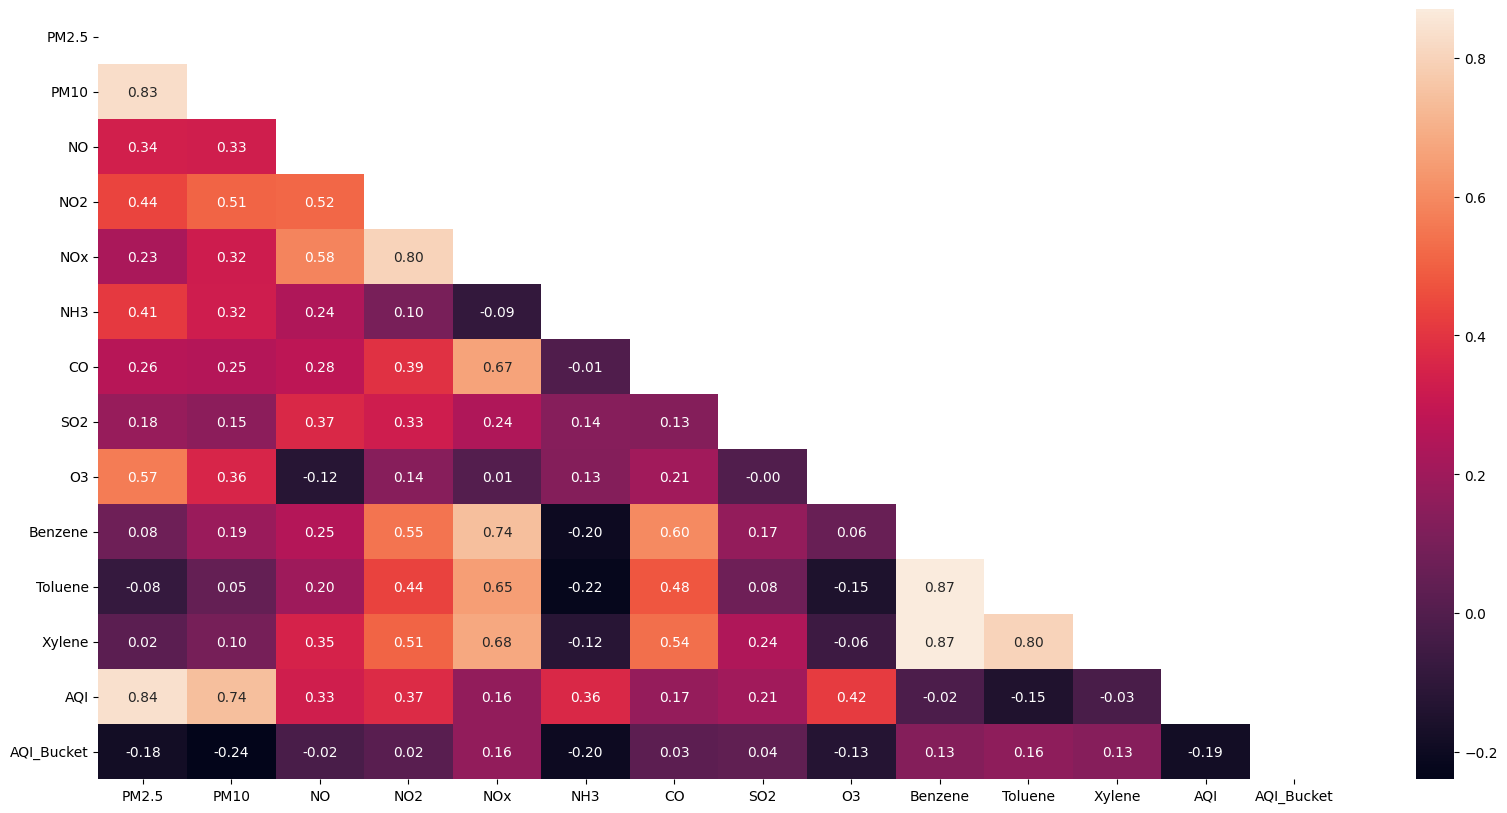

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,fmt=".2f",annot=True)
plt.show()

Explained variance ratio by each principal component:
 [0.39468953 0.20936514 0.10446117 0.06742152 0.06243674 0.05201153
 0.03869131 0.03254704 0.01499095 0.01104539 0.00649636 0.00584332]

Feature contribution to each principal component:
         PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PC1   0.185035  0.212059  0.279242  0.363512  0.414169  0.033009  0.317091   
PC2   0.528440  0.446949  0.098546  0.125467 -0.069540  0.374511 -0.000177   
PC3   0.130609  0.075959 -0.488368 -0.105172 -0.042783 -0.282447  0.254070   
PC4  -0.076215 -0.276643 -0.287656 -0.193683 -0.233626  0.236365  0.155833   
PC5  -0.026233 -0.055588 -0.015821 -0.267393 -0.105670  0.769065  0.229757   
PC6  -0.114947 -0.337775  0.363140 -0.147915  0.239574 -0.090758  0.666941   
PC7  -0.226156 -0.456204  0.029094  0.519293  0.204263  0.295410 -0.349533   
PC8   0.125021 -0.091401  0.623065 -0.439612 -0.205557 -0.120353 -0.331261   
PC9   0.097947 -0.047245 -0.086859  0.162778 -0.170327 -0

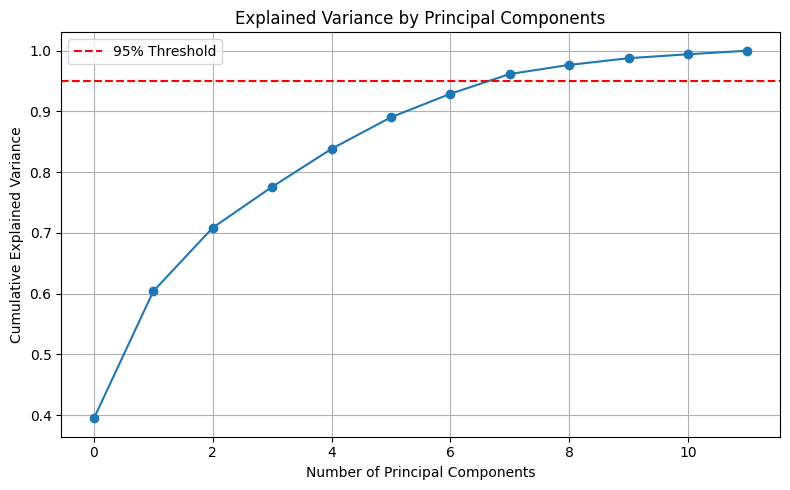

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Features and target
X = df_Visakhapatnamnew[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_Visakhapatnamnew["AQI"]
# Data splitting: 60% train, 20% val, 20% test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
# PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratio by each principal component:\n", explained_variance_ratios)
# Feature contribution to each component
feature_importance = pd.DataFrame(
    pca.components_,
    columns=x_train.columns,
    index=[f'PC{i+1}' for i in range(len(explained_variance_ratios))]
)
print("\nFeature contribution to each principal component:")
print(feature_importance)
# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratios), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. Define pollutant features and categorical target
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
# 2. Drop rows with any NaN in the critical columns (features + target)
df_clean = df_Visakhapatnamnew.dropna(subset=features + ["AQI_Bucket"])
# Now, select X and y from the cleaned DataFrame
X = df_clean[features]
y = df_clean["AQI_Bucket"]
# --- FIX START ---
# Filter out classes with fewer than 2 members for stratified split
class_counts = y.value_counts()
# Identify classes with count less than 2 (or any threshold you deem too small)
classes_to_remove = class_counts[class_counts < 2].index
if not classes_to_remove.empty:
    print(f"Warning: Removing classes from y with less than 2 members for stratified split: {list(classes_to_remove)}")
    # Filter both X and y to exclude these rows
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]
# --- Robustness Checks AFTER potential filtering ---
if X.empty or y.empty:
    print("Error: No data remaining after NaN removal and filtering. Cannot perform LDA.")
    # You might want to skip to the next city if this was part of a loop
    # For a standalone script, you could exit or raise an exception
    exit()
    if y.nunique() < 2:
     print("Error: Less than 2 unique AQI_Bucket classes after NaN removal and filtering. Cannot perform LDA.")
    exit()
# --- FIX END ---
# 3. Split dataset into training and (unused) test sets
x_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y helps ensure that the class distribution in y_train is similar to y.
# Robustness check for split data
if x_train.empty or y_train.empty:
    print("Error: Training set became empty after splitting. Cannot perform LDA.")
    exit()
    # This check becomes less critical after the filtering step above, but good to keep
if y_train.nunique() < 2:
    print("Error: Not enough unique classes in training data for LDA after splitting. This should ideally be caught by previous checks.")
    exit()
# 4. Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Fit and transform on training data
# 5. Fit LDA model
lda = LDA()
# Use x_train_scaled here!
lda.fit(x_train_scaled, y_train)
# 6. Compute average absolute LDA coefficients
lda_importance = np.abs(lda.coef_).mean(axis=0)
# 7. Feature importance as DataFrame
feature_importance = pd.DataFrame({
    "Feature": features, # Assuming 'features' list order matches lda.coef_ order
    "LDA Importance": np.round(lda_importance, 2)
}).sort_values(by="LDA Importance", ascending=False)
# 8. Show result
print("\nTop Features by LDA Importance for df_Visakhapatnamnew:")
print(feature_importance)


Top Features by LDA Importance for df_Visakhapatnamnew:
    Feature  LDA Importance
0     PM2.5            4.29
4       NOx            4.00
1      PM10            1.92
3       NO2            1.45
6        CO            1.23
2        NO            1.20
10  Toluene            0.81
8        O3            0.65
11   Xylene            0.39
5       NH3            0.37
7       SO2            0.34
9   Benzene            0.21


In [ ]:
x1=df_Visakhapatnamnew[["PM2.5", "PM10", "NO", "NO2", "NOx","CO","Toluene","O3","Benzene","NH3","Xylene"]]
y1=df_Visakhapatnamnew["AQI"]
#xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)
x_train1, x_temp1, y_train1, y_temp1= train_test_split(x1, y1, test_size=0.4, random_state=42)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_temp1, y_temp1, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize RidgeCV (cross-validated linear regression)
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
ridge_val_pred = ridge_model.predict(x_val1)
mse_val_ridge = mean_squared_error(y_val1, ridge_val_pred)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_val_ridge = r2_score(y_val1, ridge_val_pred)
print(" Ridge Regression Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_ridge:.4f}")
print(f"RMSE: {rmse_val_ridge:.4f}")
print(f"R²: {r2_val_ridge:.4f}")

# --- Test set evaluation ---
ridge_test_pred = ridge_model.predict(x_test1)
mse_test_ridge = mean_squared_error(y_test1, ridge_test_pred)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test1, ridge_test_pred)
print("\n Ridge Regression Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

 Ridge Regression Validation Set Evaluation (Tuned):
MSE: 0.0463
RMSE: 0.2151
R²: 0.7510

 Ridge Regression Test Set Evaluation (Tuned):
MSE: 0.0506
RMSE: 0.2249
R²: 0.7078


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize tuned XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgboost_model.fit(
    x_train1, y_train1,
    eval_set=[(x_val1, y_val1)],
    verbose=False
)
# --- Validation set evaluation ---
xgb_val_predictions = xgboost_model.predict(x_val1)
mse_val = mean_squared_error(y_val1, xgb_val_predictions)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, xgb_val_predictions)
print("XGBoost Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")
# --- Test set evaluation ---
xgb_test_predictions = xgboost_model.predict(x_test1)
mse_test = mean_squared_error(y_test1, xgb_test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, xgb_test_predictions)
print("\nXGBoost Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

XGBoost Validation Set Evaluation (Tuned):
MSE: 0.0308
RMSE: 0.1756
R²: 0.8341

XGBoost Test Set Evaluation (Tuned):
MSE: 0.0453
RMSE: 0.2128
R²: 0.7383


In [ ]:
#RANDOM FOREST
# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(x_train1, y_train1)
rf_predictions1 = rf_model.predict(x_val1)
mse_rf1 = mean_squared_error(y_val1, rf_predictions1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_val1, rf_predictions1)
print("\nRandom Forest Validation set Evaluation for Model3")
print(f"MSE: {mse_rf1:.4f}")
print(f"RMSE: {rmse_rf1:.4f}")
print(f"R²: {r2_rf1:.4f}")
rf_test_predictions1 = rf_model.predict(x_test1)
mse_rf_test1 = mean_squared_error(y_test1, rf_test_predictions1)
rmse_rf_test1 = np.sqrt(mse_rf_test1)
r2_rf_test1 = r2_score(y_test1, rf_test_predictions1)
print("\nRandom Forest Test Set Evaluation for Model3")
print(f"MSE: {mse_rf_test1:.4f}")
print(f"RMSE: {rmse_rf_test1:.4f}")
print(f"R²: {r2_rf_test1:.4f}")


Random Forest Validation set Evaluation for Model3
MSE: 0.0289
RMSE: 0.1701
R²: 0.8443

Random Forest Test Set Evaluation for Model3
MSE: 0.0427
RMSE: 0.2066
R²: 0.7532


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train1, y_train1)

# --- Validation set evaluation ---
rf_val_predictions = rf_model.predict(x_val1)
mse_val_rf = mean_squared_error(y_val1, rf_val_predictions)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val1, rf_val_predictions)
print("Random Forest Validation Set Evaluation (Tuned):")
print(f"MSE: {mse_val_rf:.4f}")
print(f"RMSE: {rmse_val_rf:.4f}")
print(f"R²: {r2_val_rf:.4f}")

# --- Test set evaluation ---
rf_test_predictions = rf_model.predict(x_test1)
mse_test_rf = mean_squared_error(y_test1, rf_test_predictions)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test1, rf_test_predictions)
print("\nRandom Forest Test Set Evaluation (Tuned):")
print(f"MSE: {mse_test_rf:.4f}")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"R²: {r2_test_rf:.4f}")

Random Forest Validation Set Evaluation (Tuned):
MSE: 0.0309
RMSE: 0.1757
R²: 0.8339

Random Forest Test Set Evaluation (Tuned):
MSE: 0.0448
RMSE: 0.2117
R²: 0.7411


In [ ]:
#LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Ensure the input shape is correct
print(f"x_train1 shape: {x_train1.shape}")  # Expecting (samples, timesteps, features)
x_train1 = np.array(x_train1)
x_val1 = np.array(x_val1)
x_test1 = np.array(x_test1)
# Reshape if necessary
if len(x_train1.shape) == 2:
    x_train1 = x_train1.reshape((x_train1.shape[0], 1, x_train1.shape[1]))
    x_val1 = x_val1.reshape((x_val1.shape[0], 1, x_val1.shape[1]))
    x_test1 = x_test1.reshape((x_test1.shape[0], 1, x_test1.shape[1]))
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train1.shape[1], x_train1.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(x_train1, y_train1, validation_data=(x_val1, y_val1), epochs=50, batch_size=16)
# Predictions
y_val_pred = model.predict(x_val1)
y_test_pred = model.predict(x_test1)
# Compute metrics
mse_val = mean_squared_error(y_val1, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val1, y_val_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test1, y_test_pred)
# Print evaluation results
print(f"Validation - MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

x_train1 shape: (877, 11)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.2276 - val_loss: 0.0837
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0628 - val_loss: 0.0540
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0476 - val_loss: 0.0437
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0410 - val_loss: 0.0399
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0388 - val_loss: 0.0384
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - val_loss: 0.0383
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0443 - val_loss: 0.0375
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0406 - val_loss: 0.0379
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0402 - val_loss: 0.0388
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0355 - val_loss: 0.0364
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0346 - val_loss: 0.0358
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 